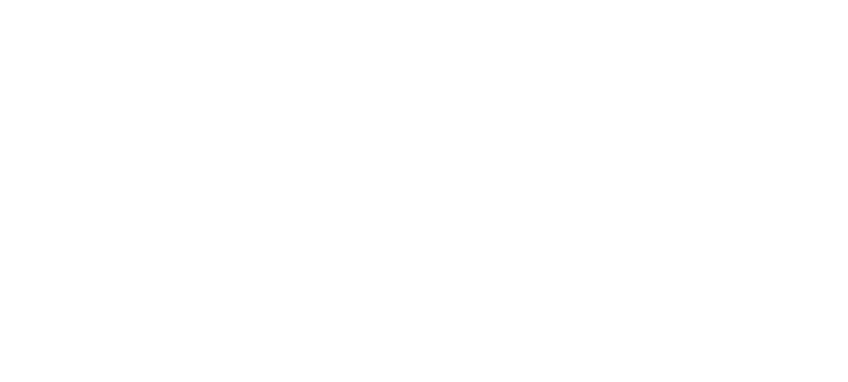

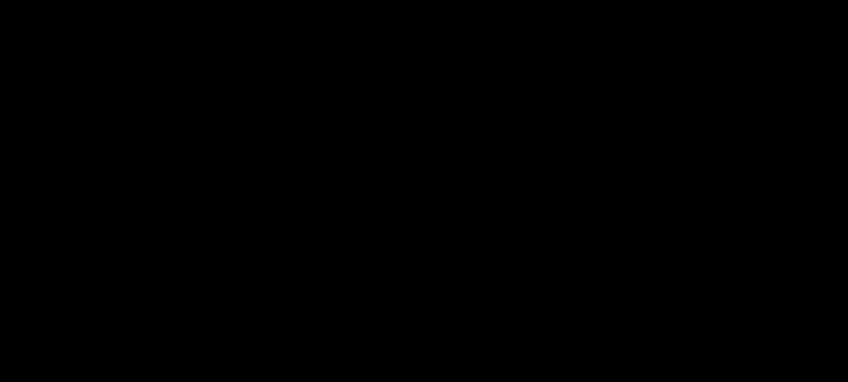

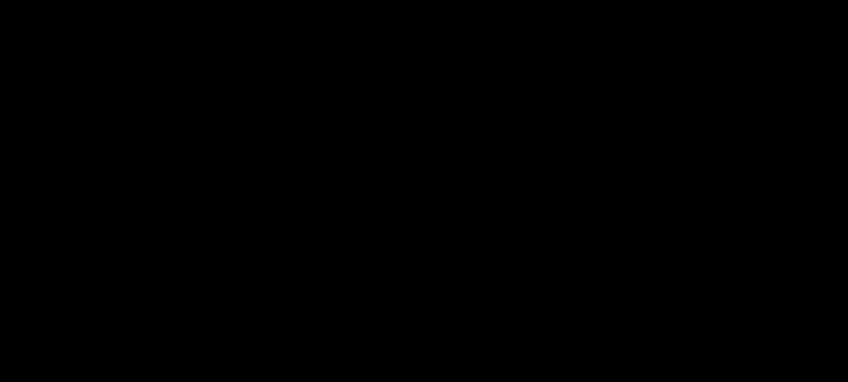

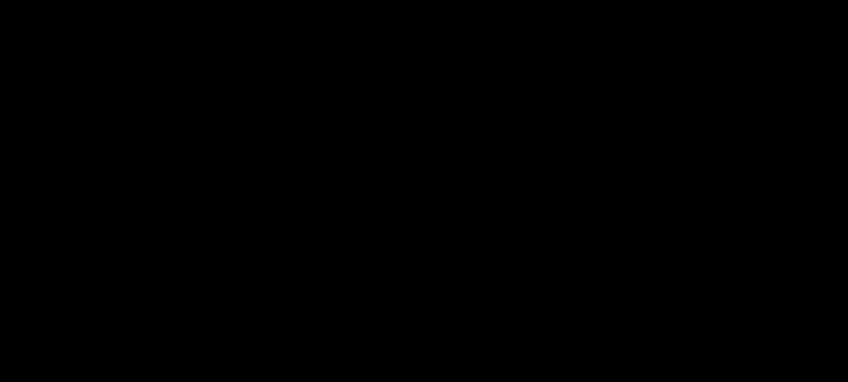

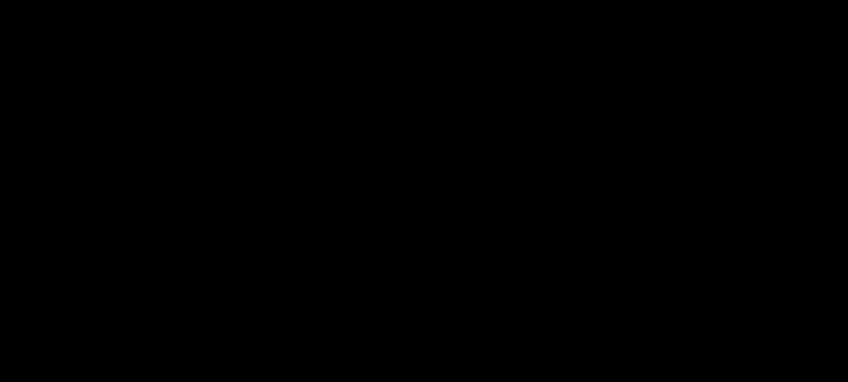

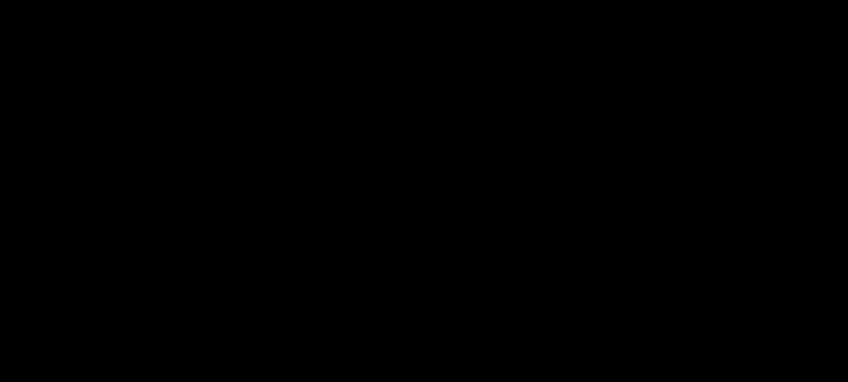

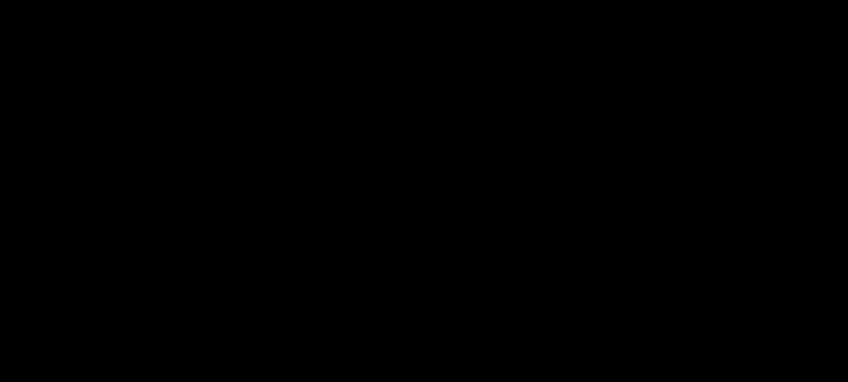

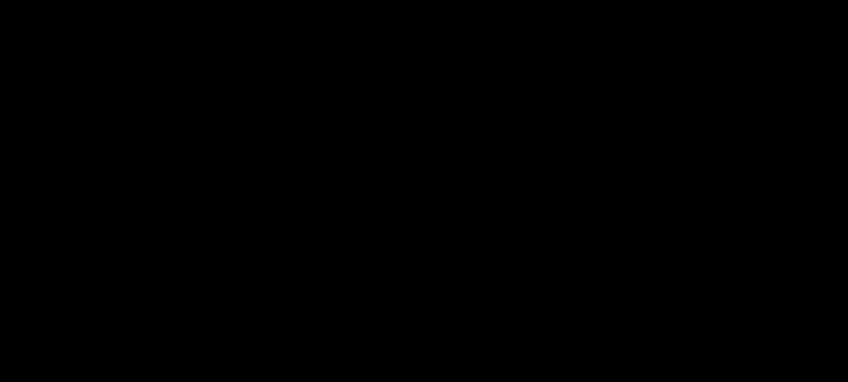

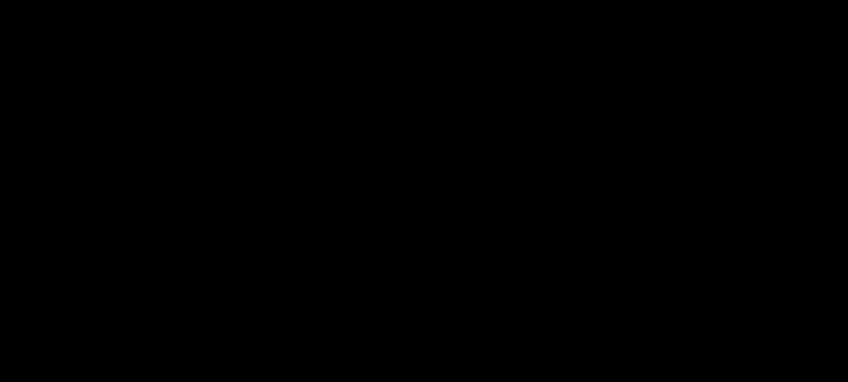

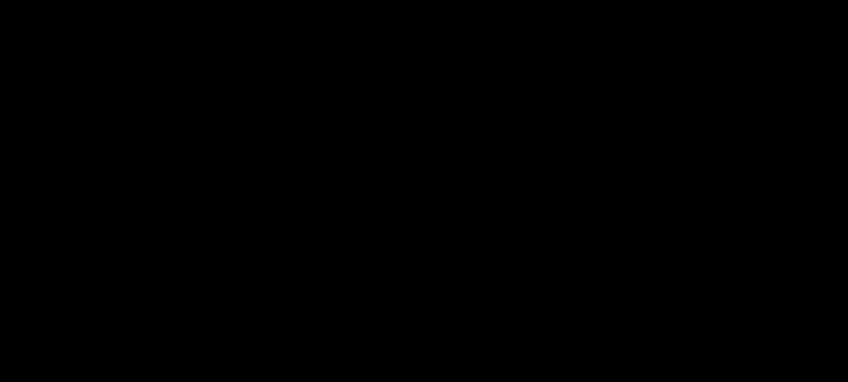

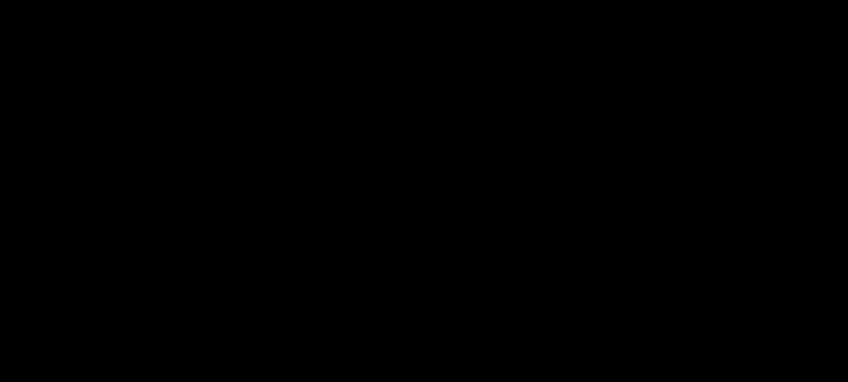

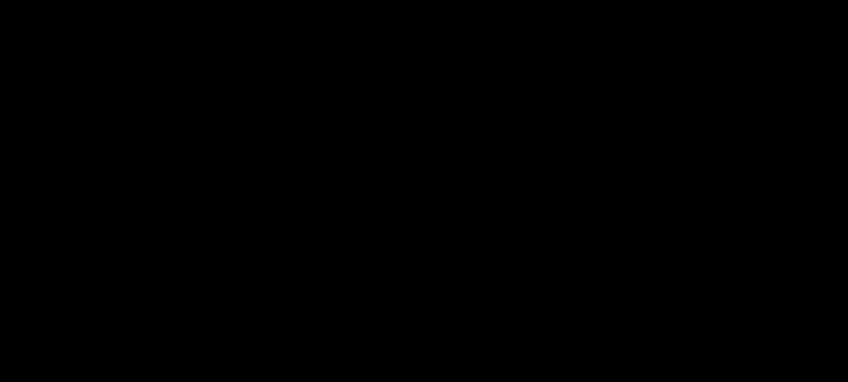

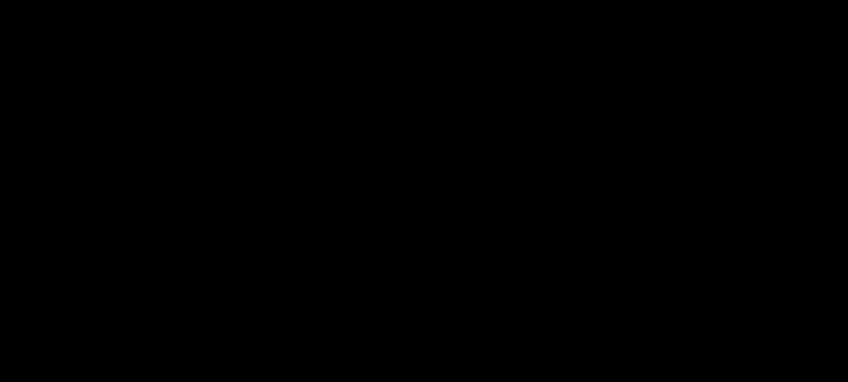

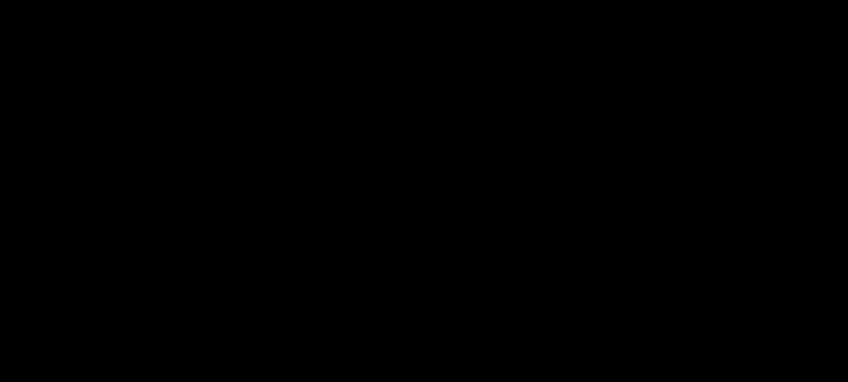

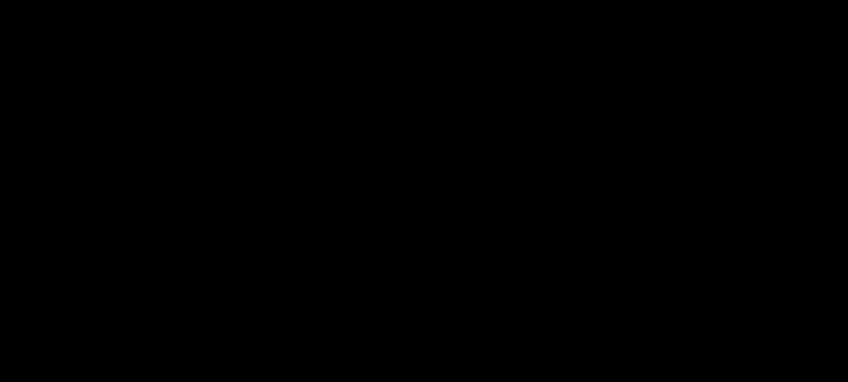

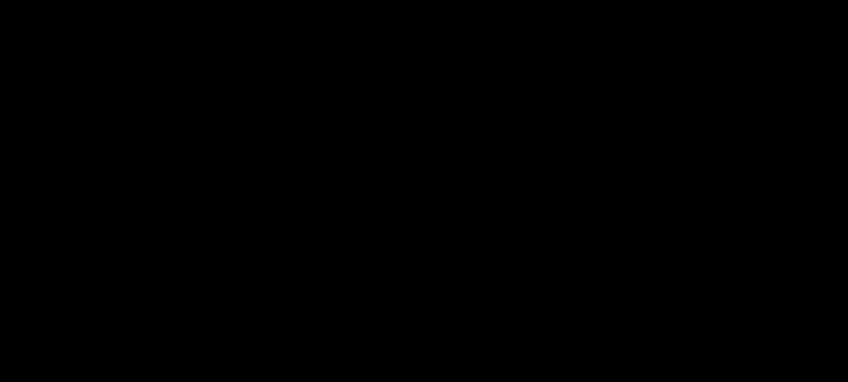

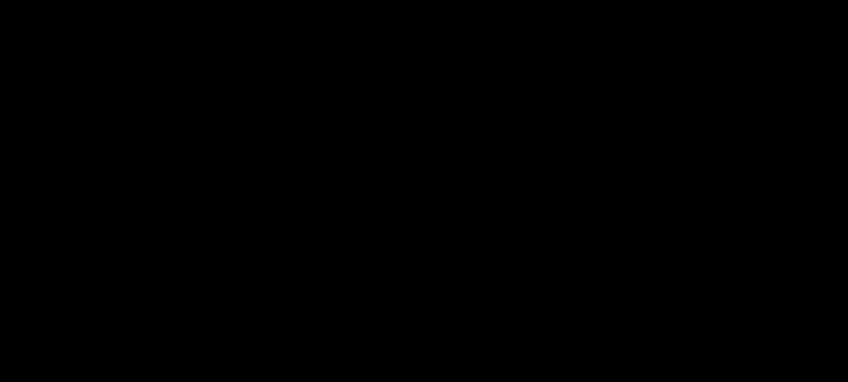

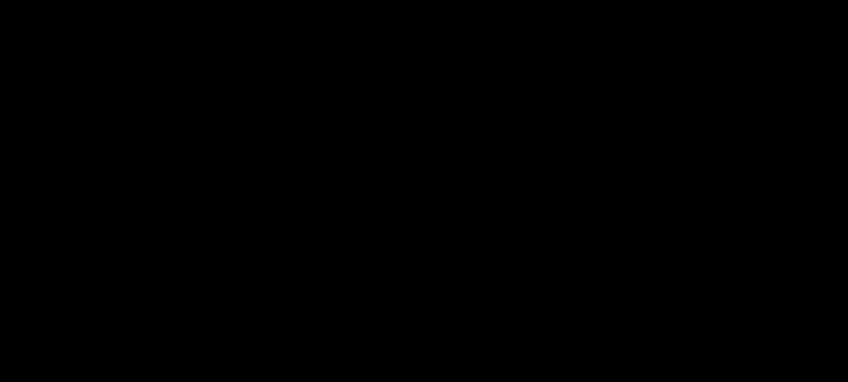

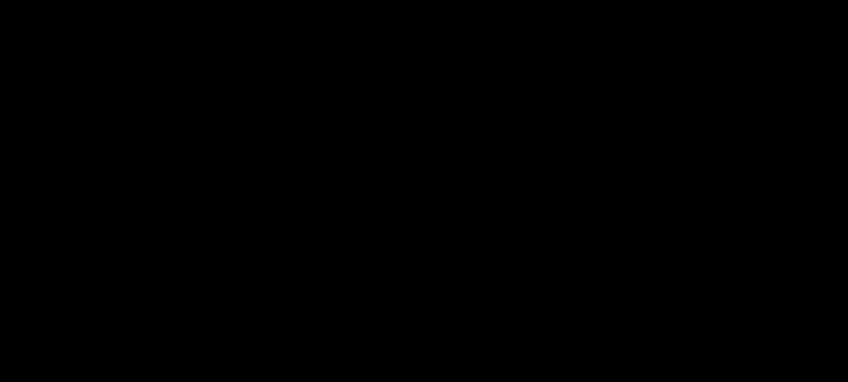

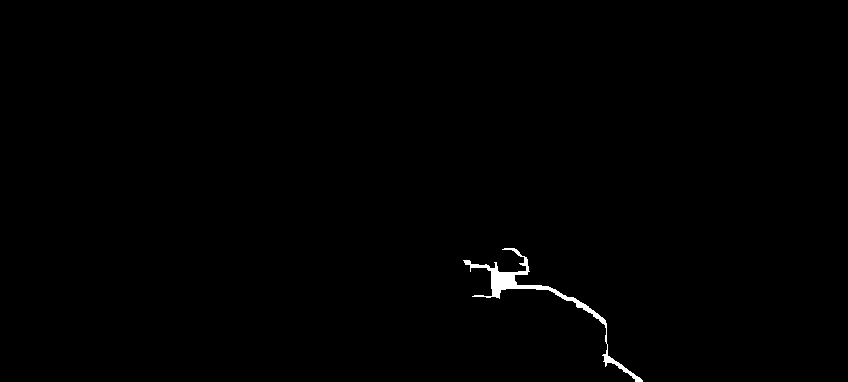

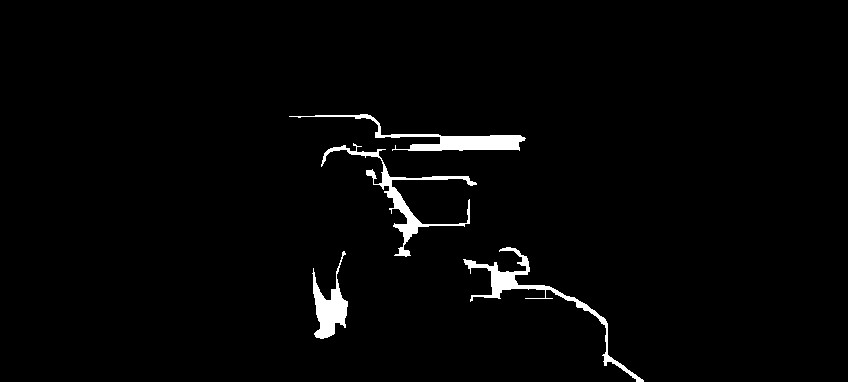

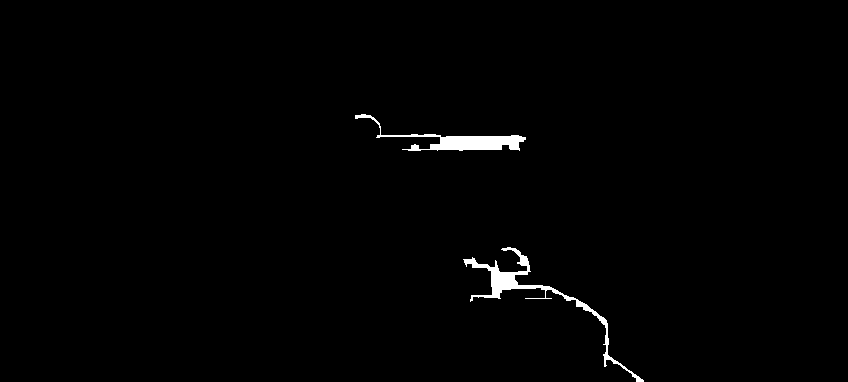

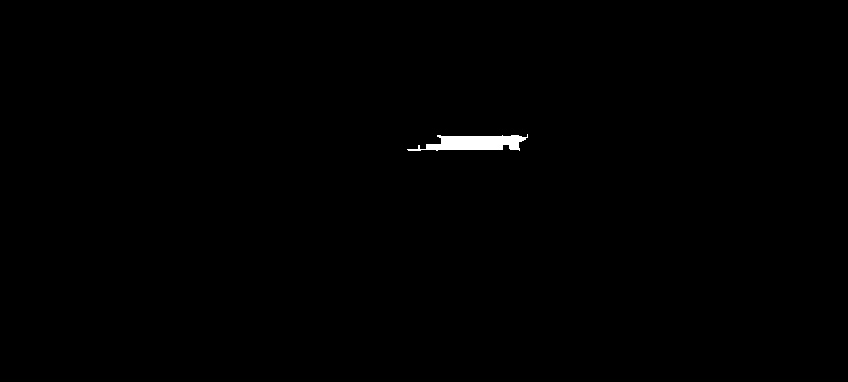

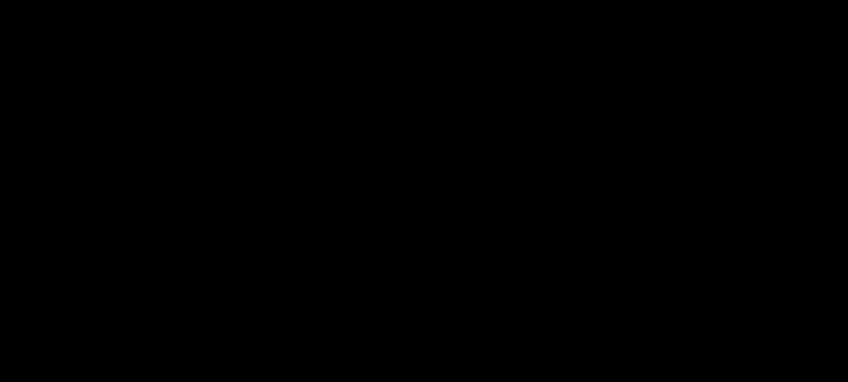

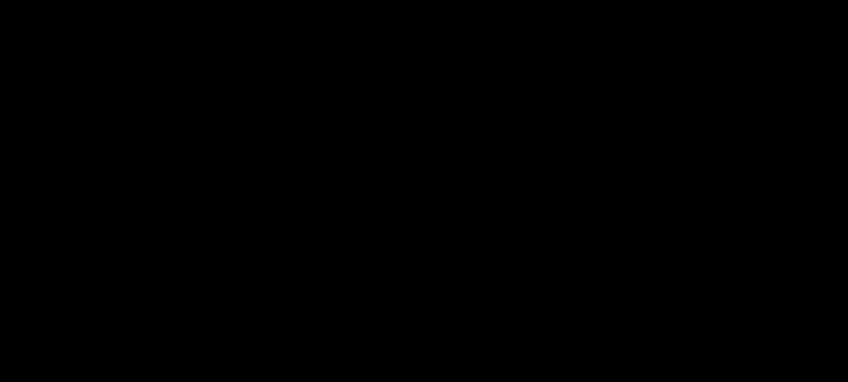

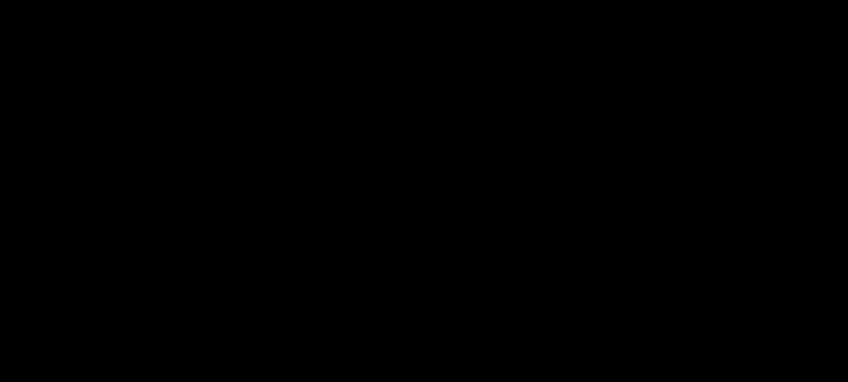

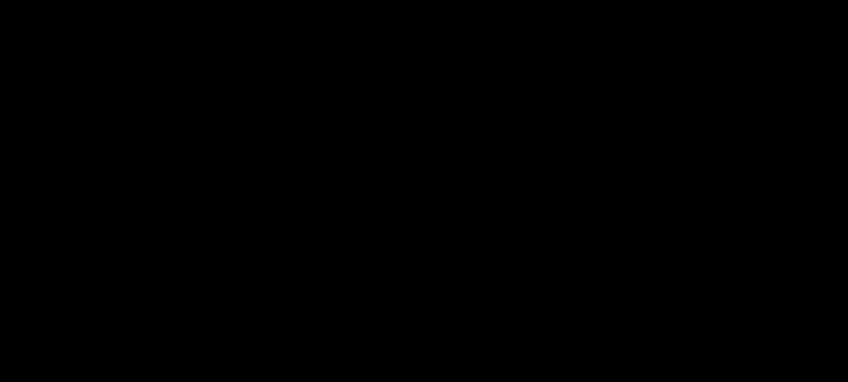

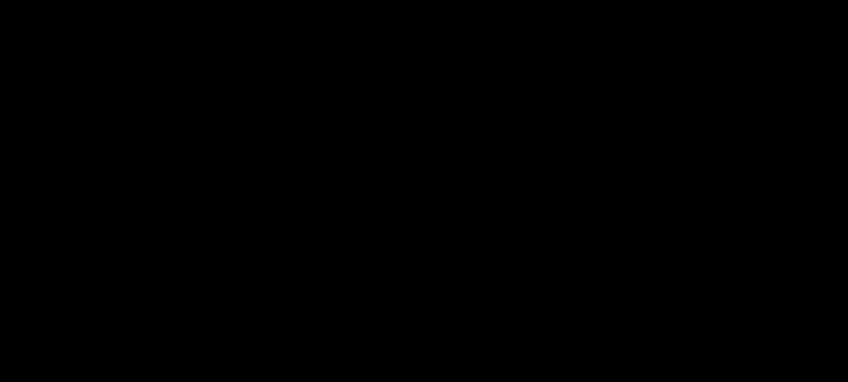

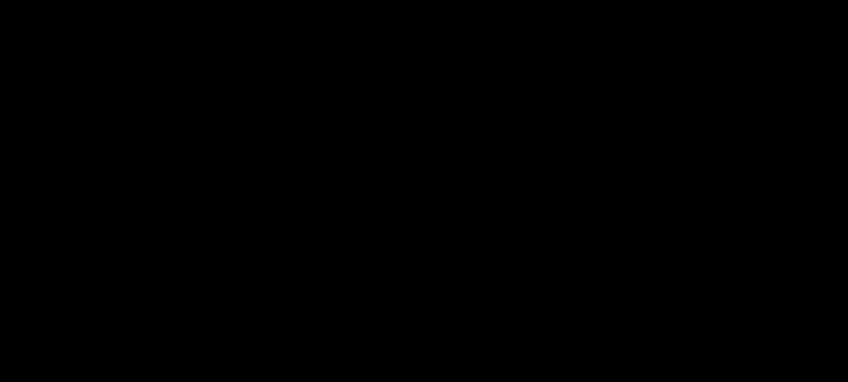

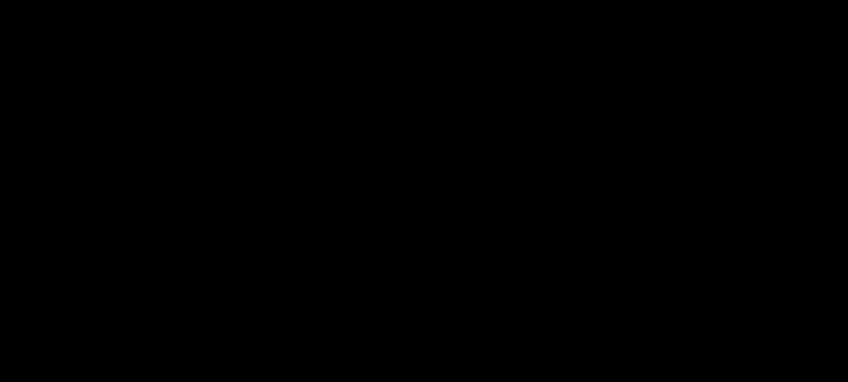

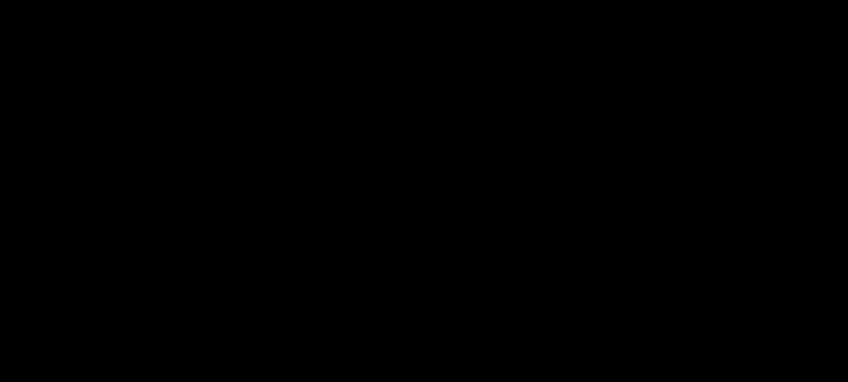

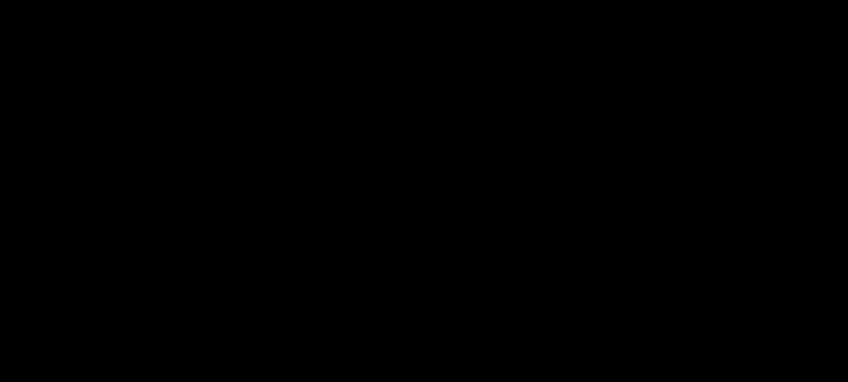

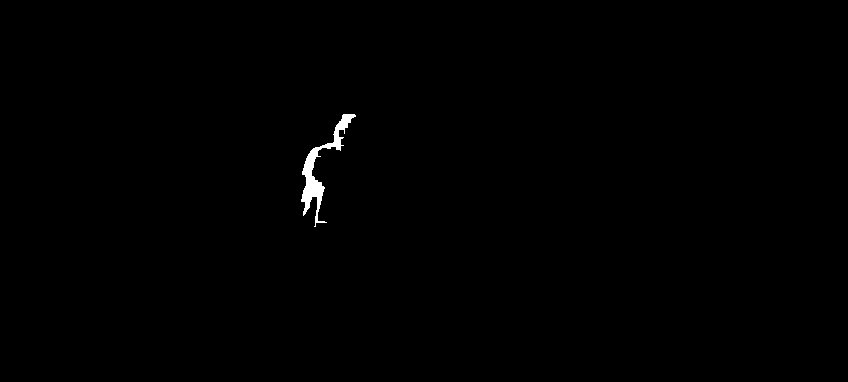

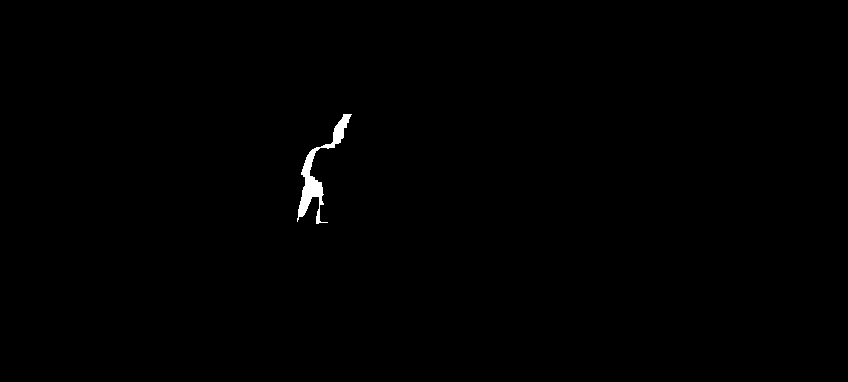

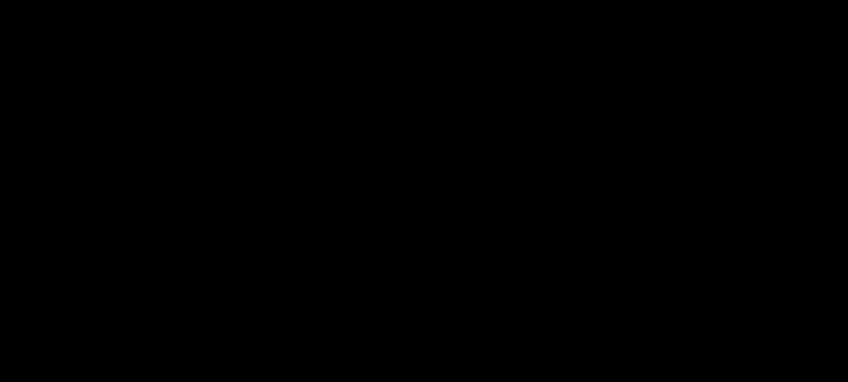

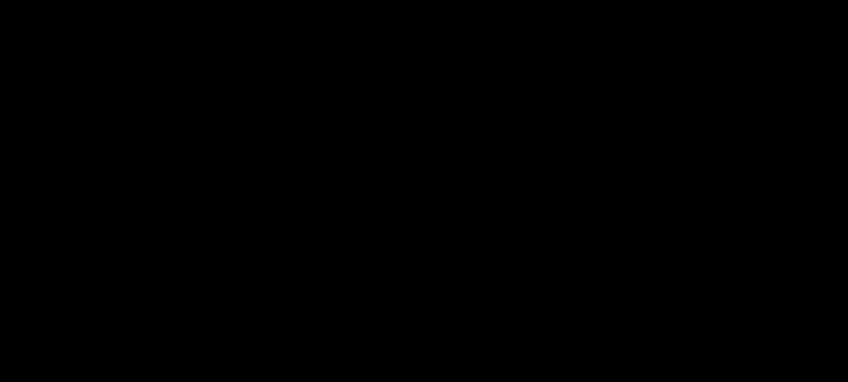

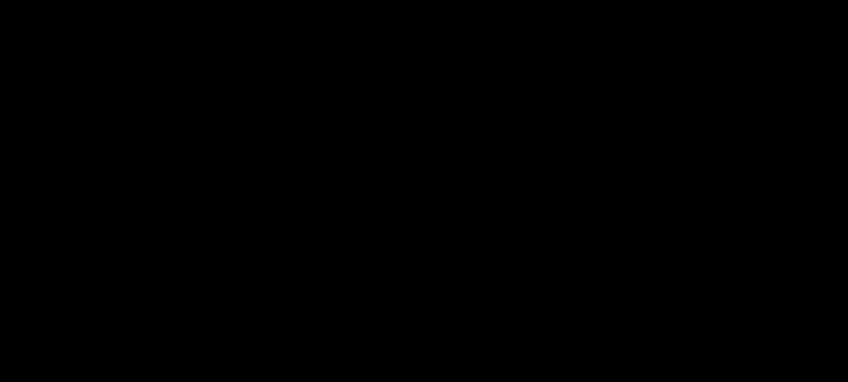

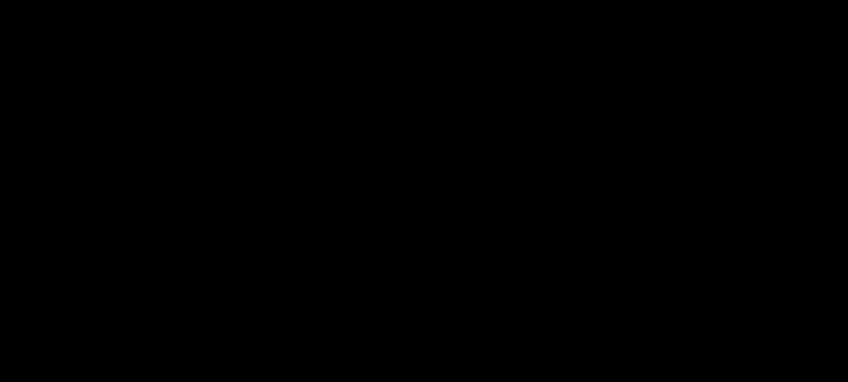

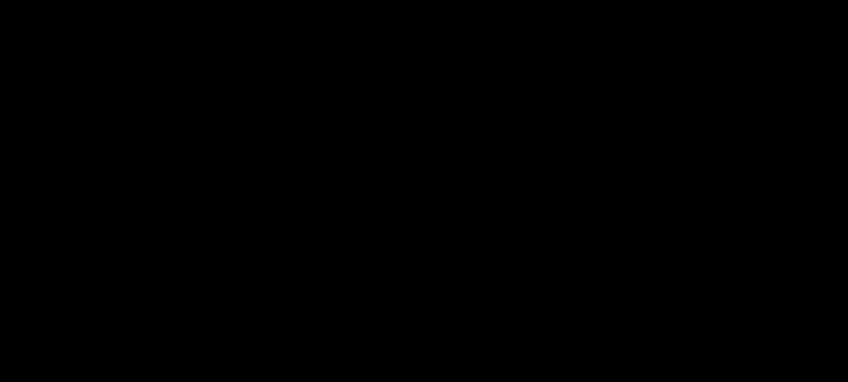

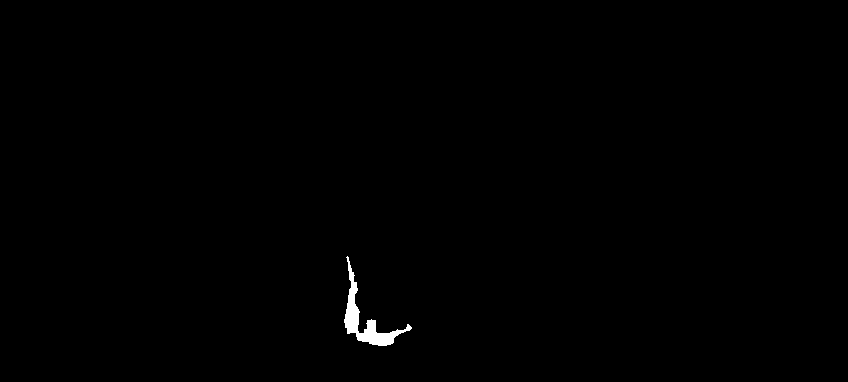

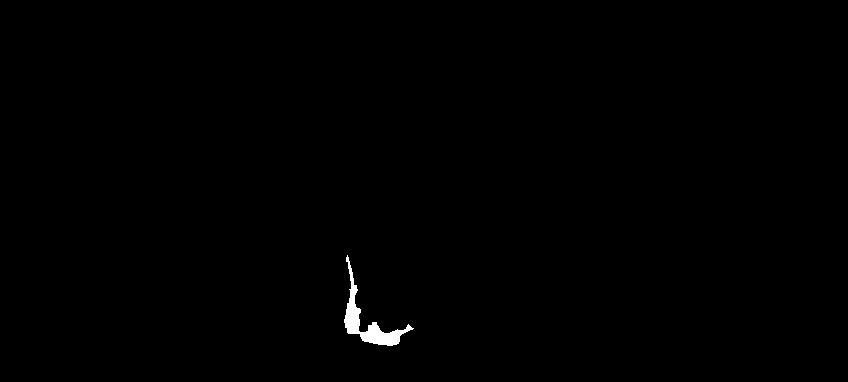

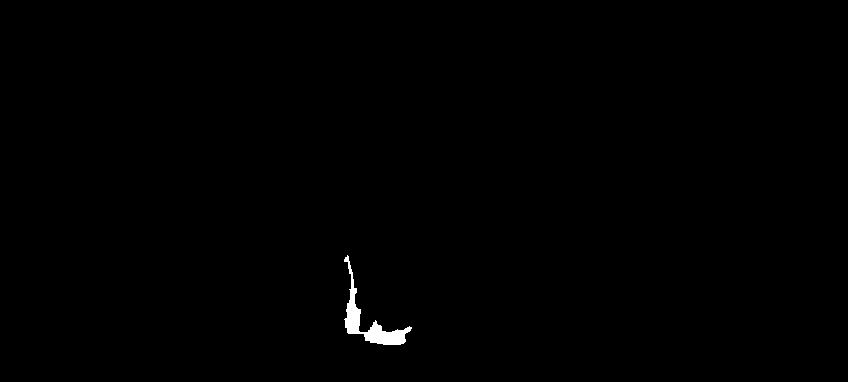

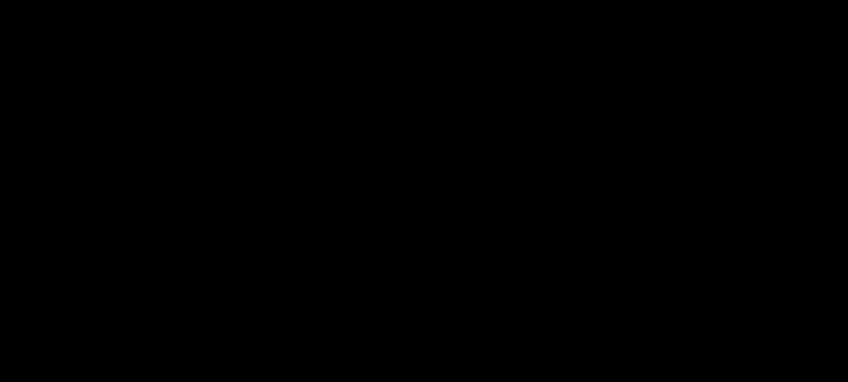

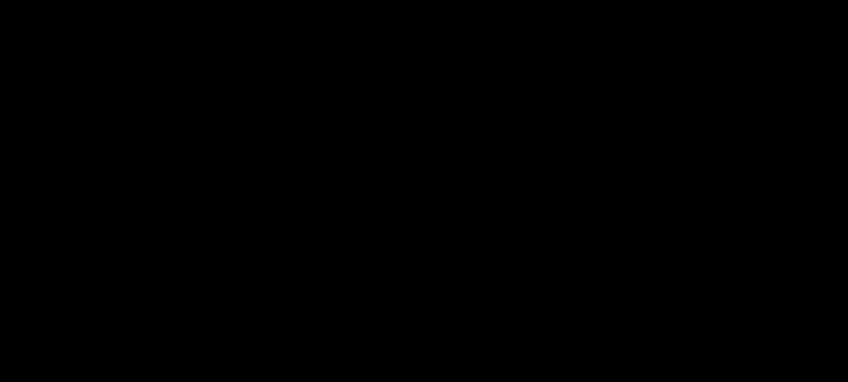

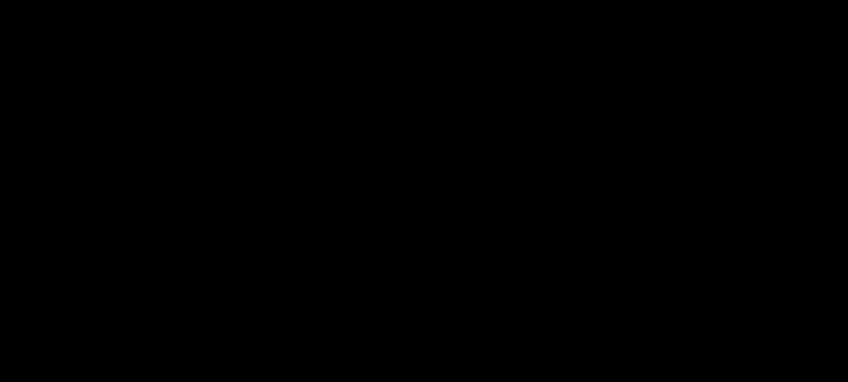

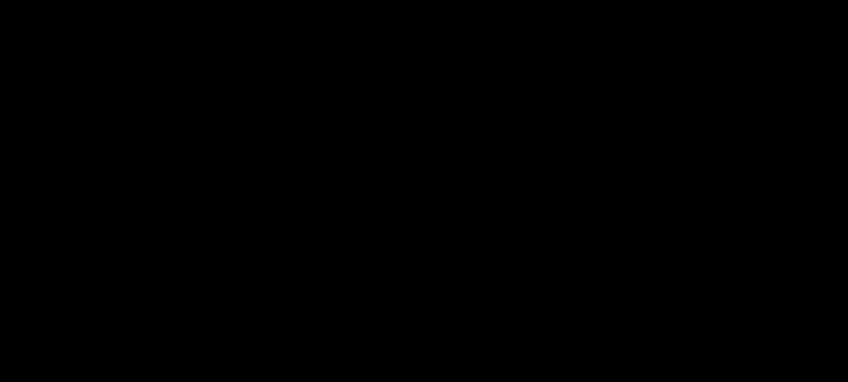

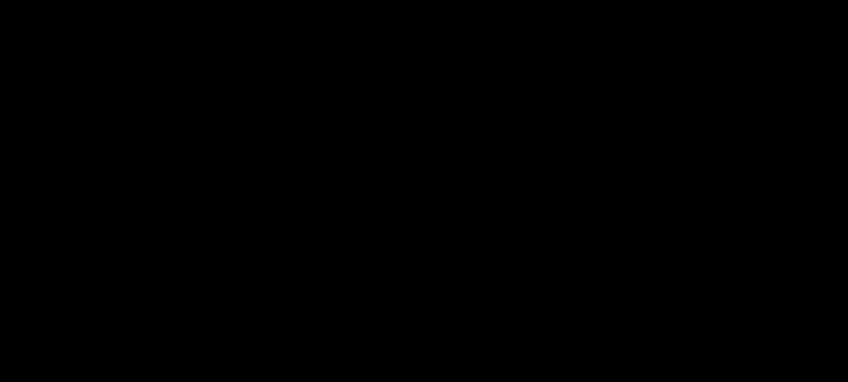

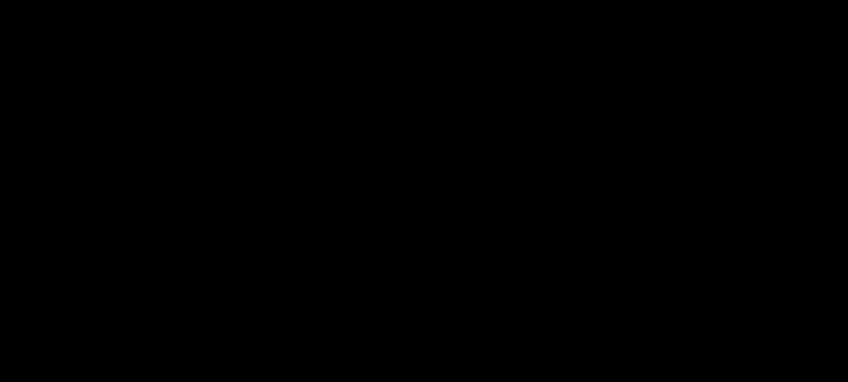

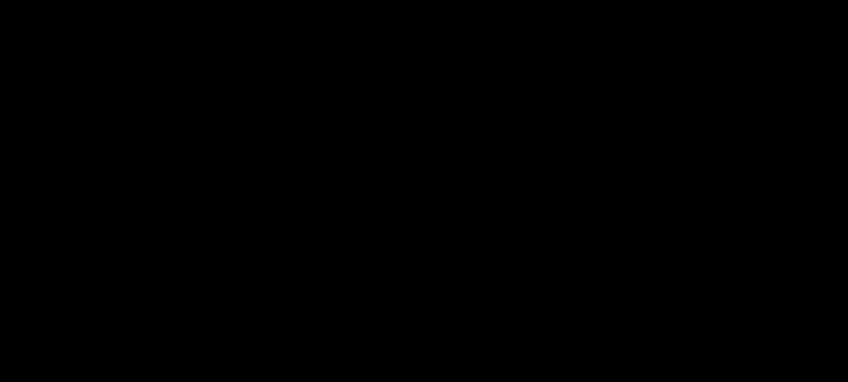

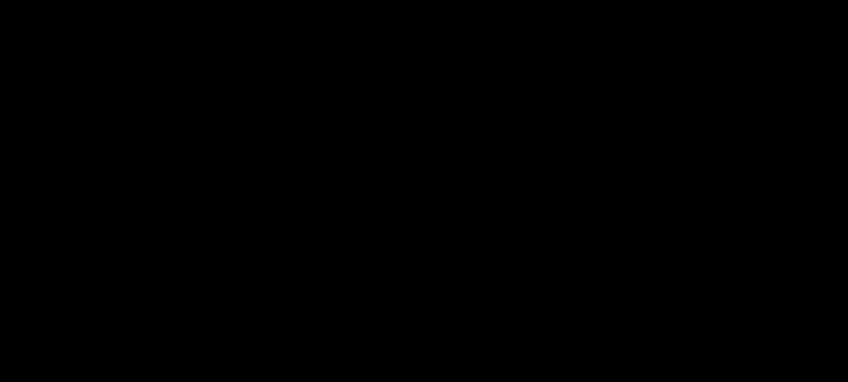

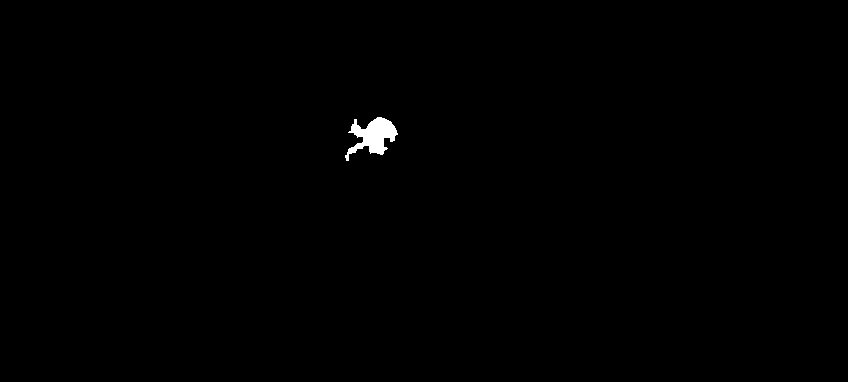

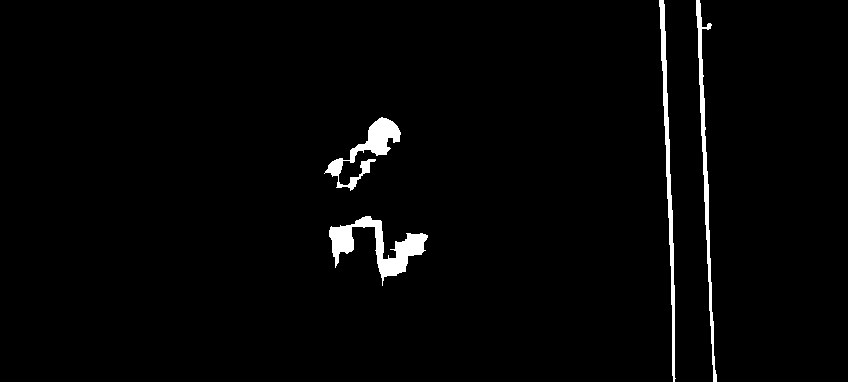

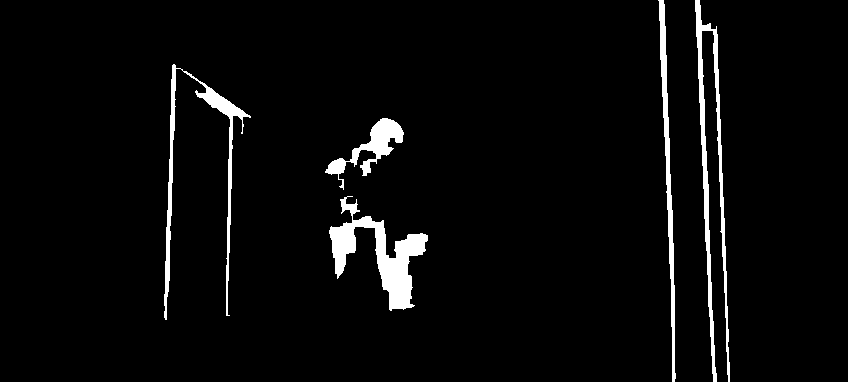

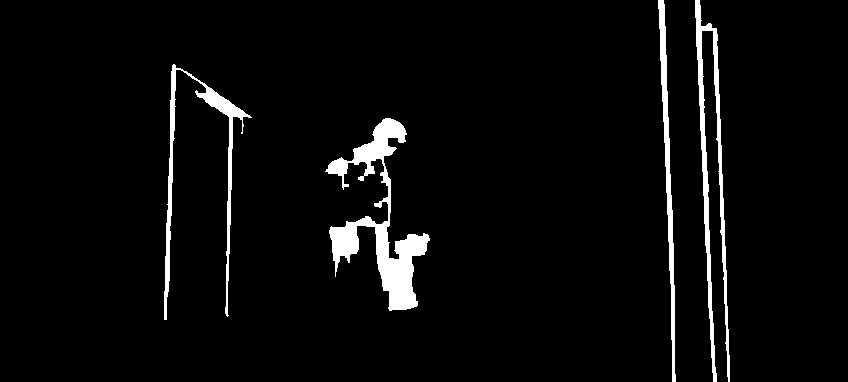

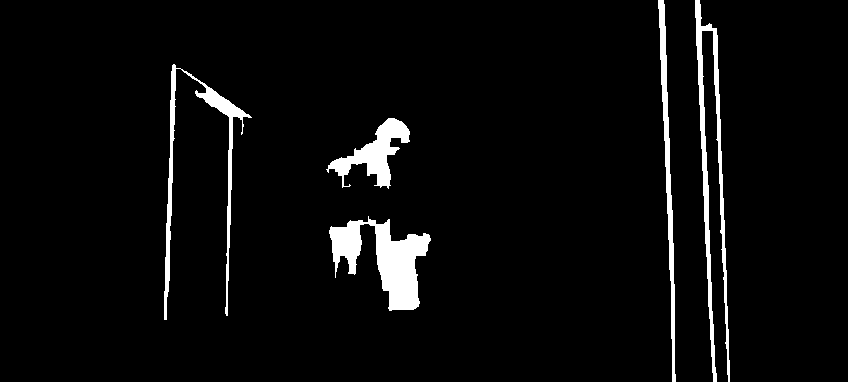

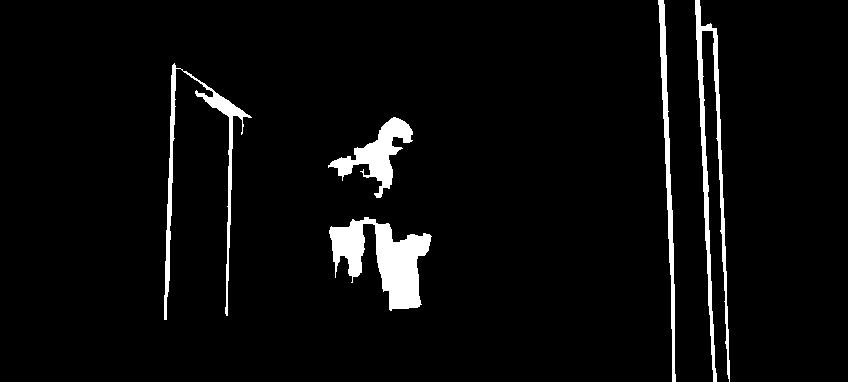

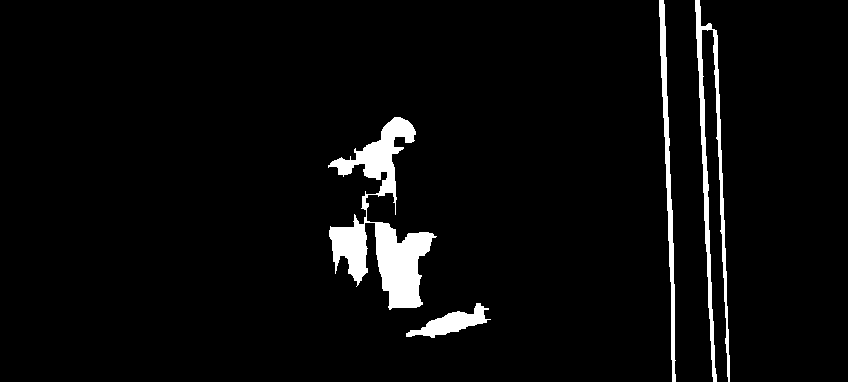

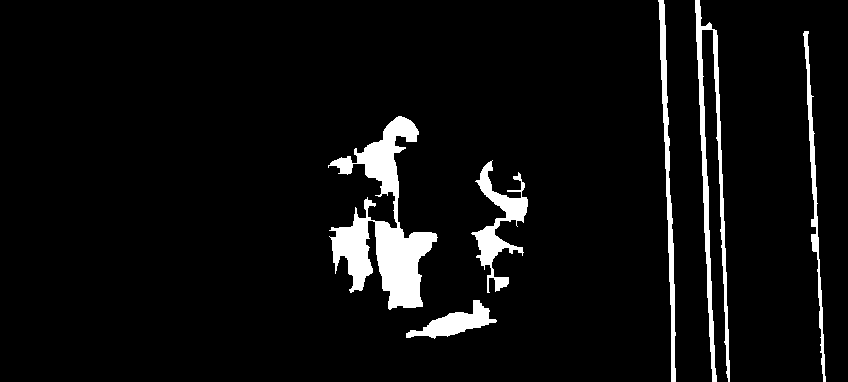

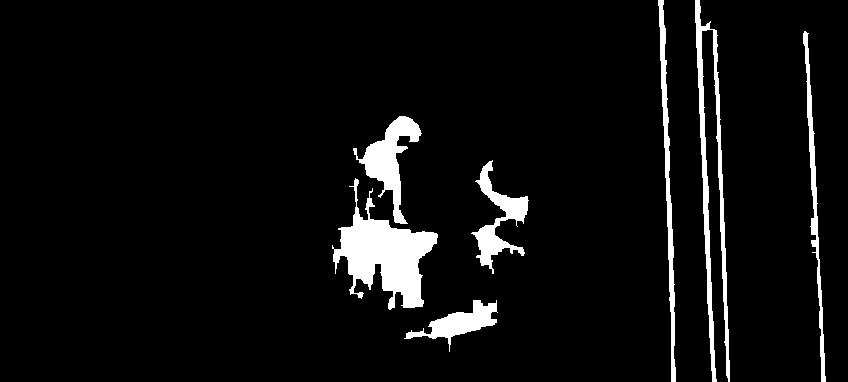

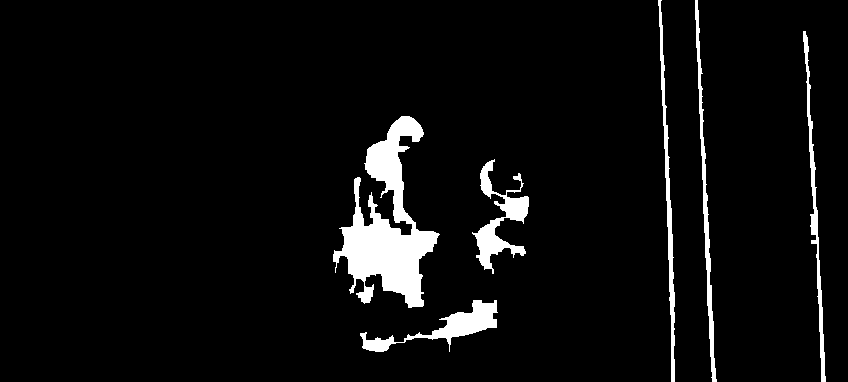

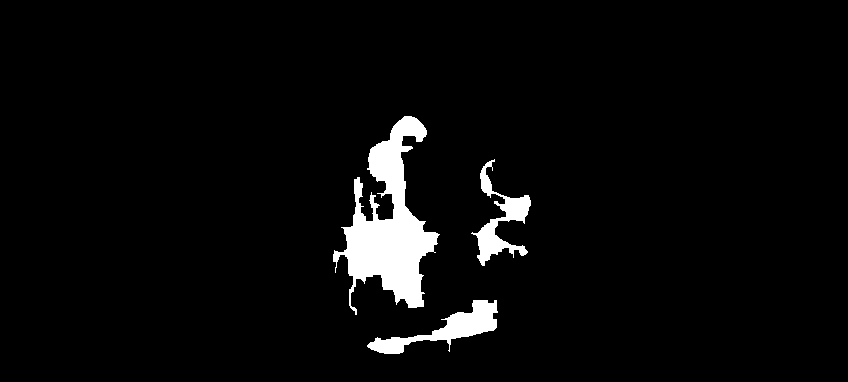

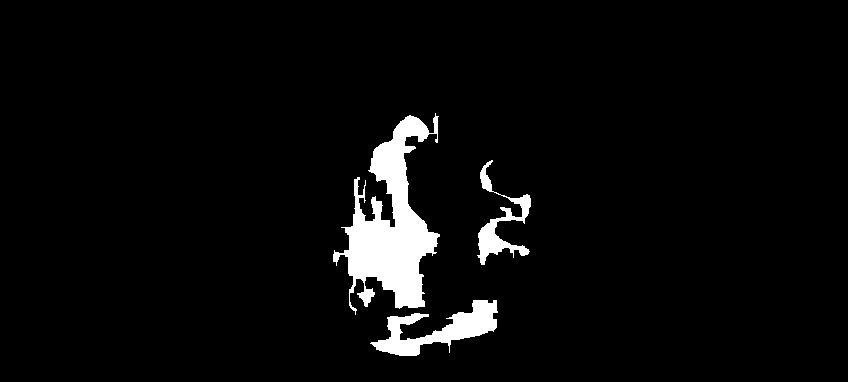

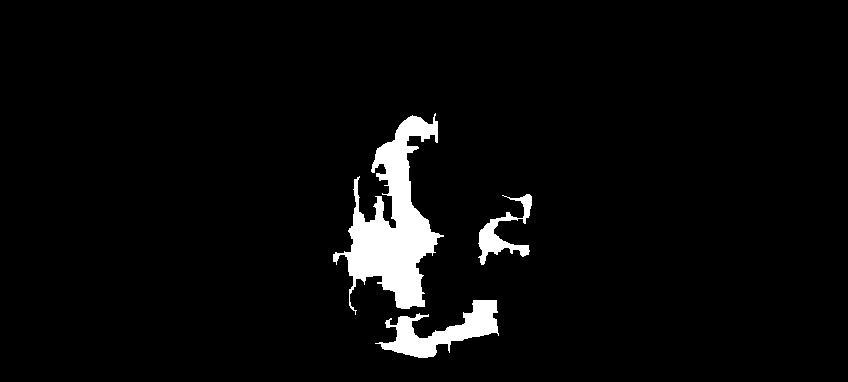

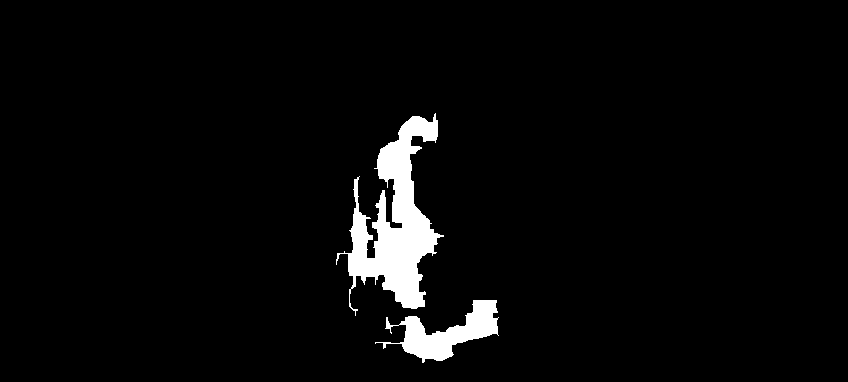

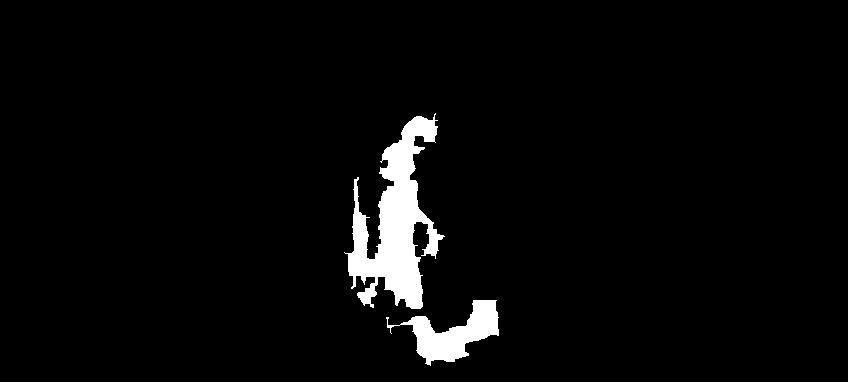

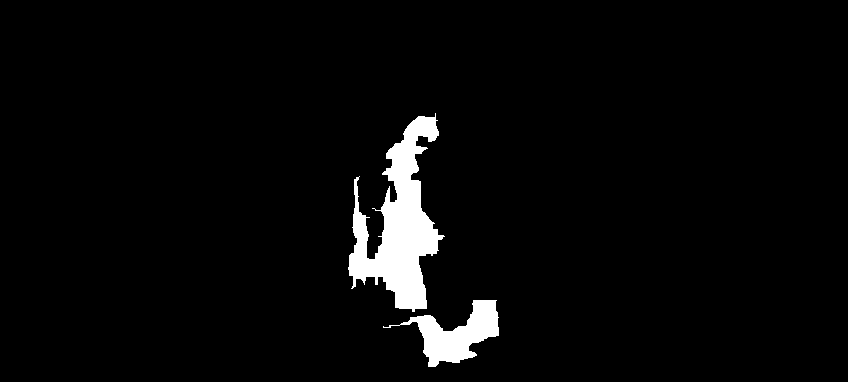

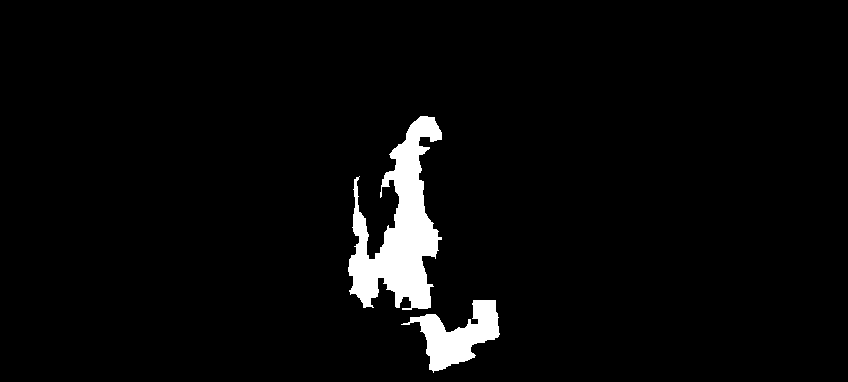

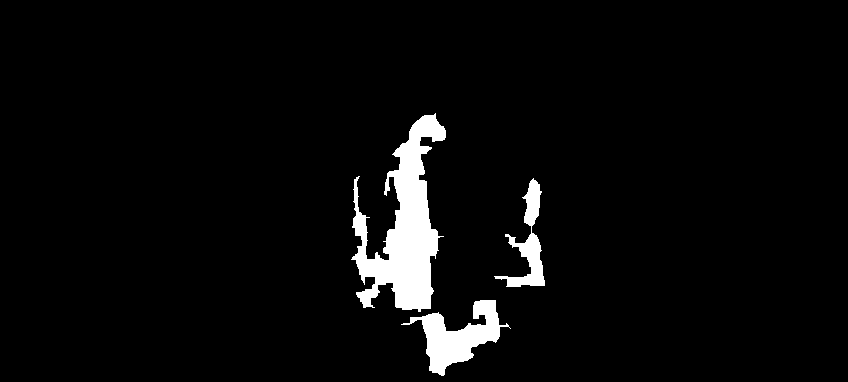

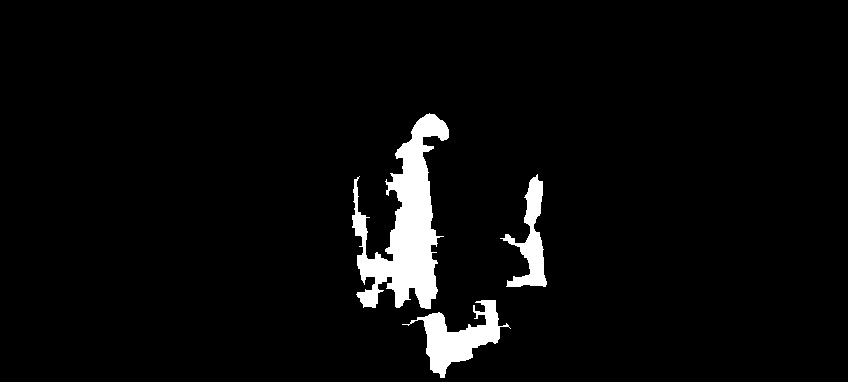

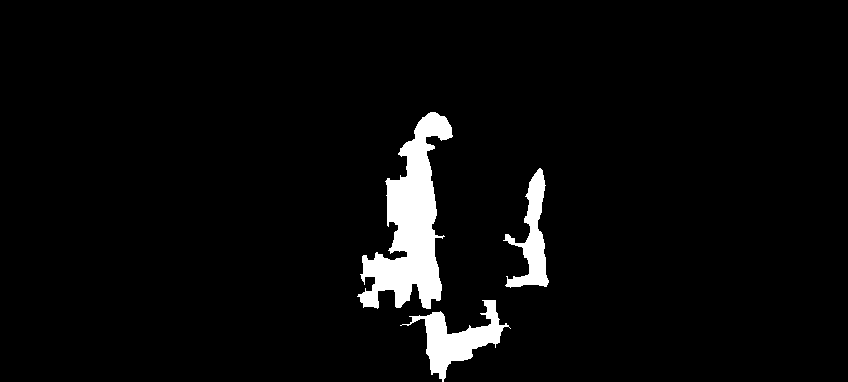

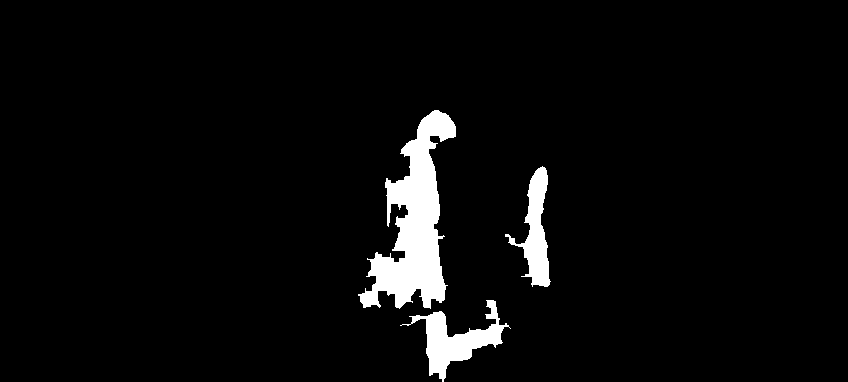

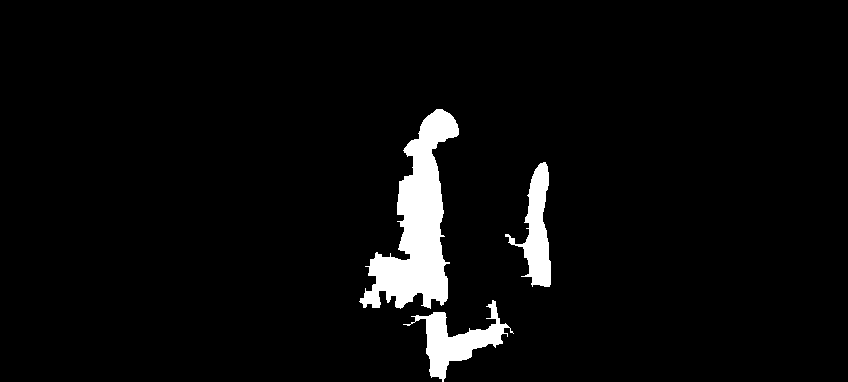

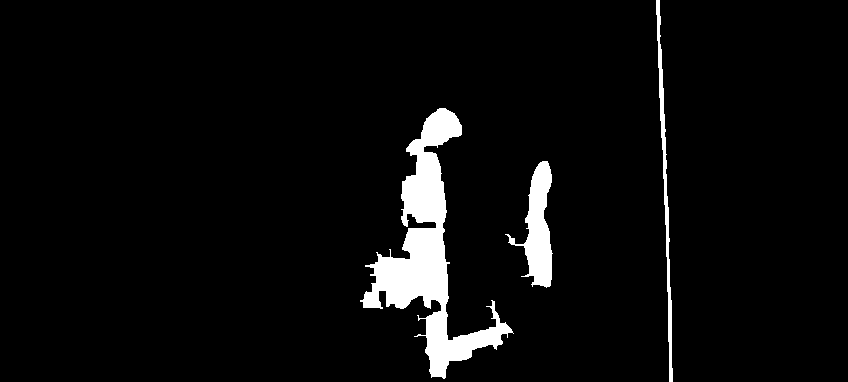

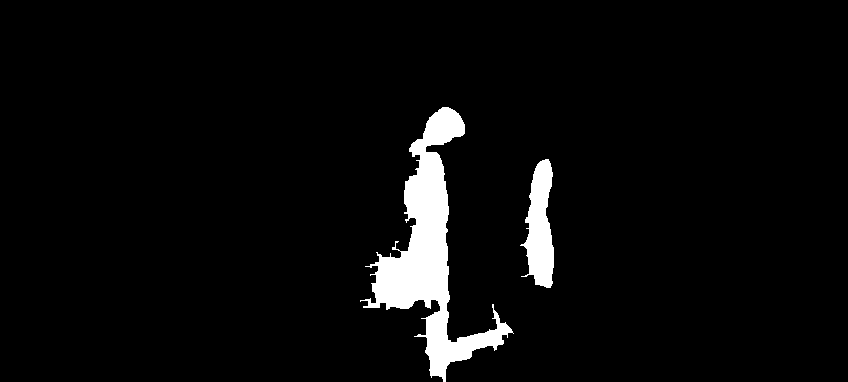

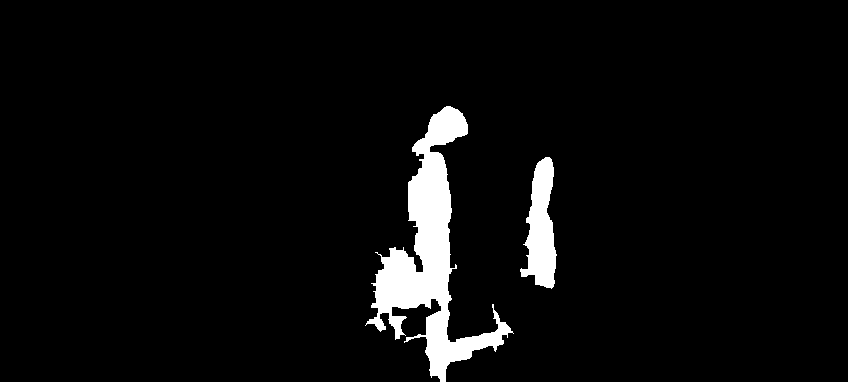

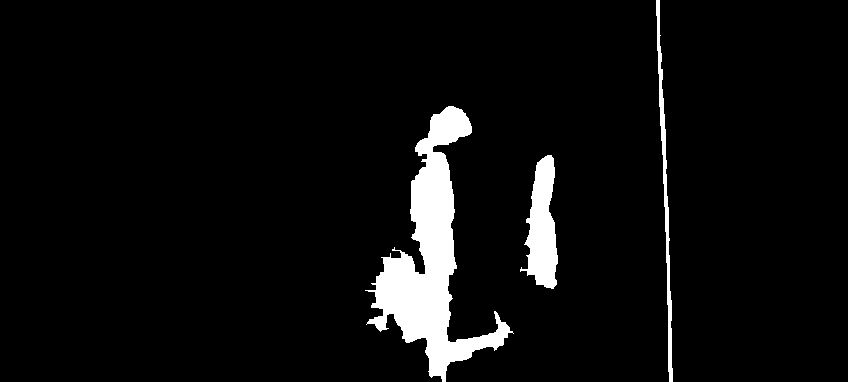

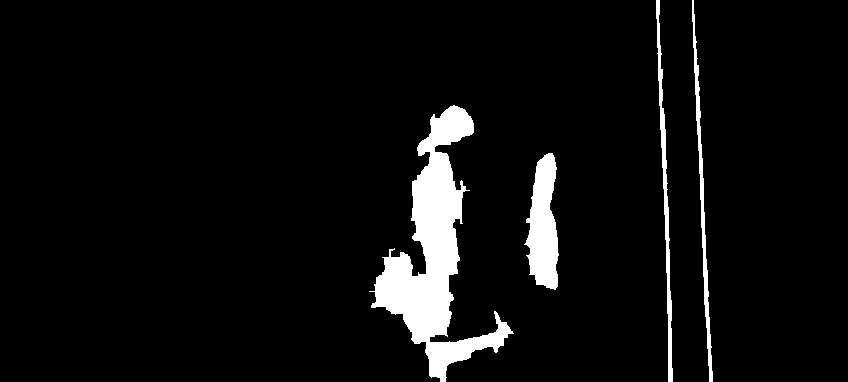

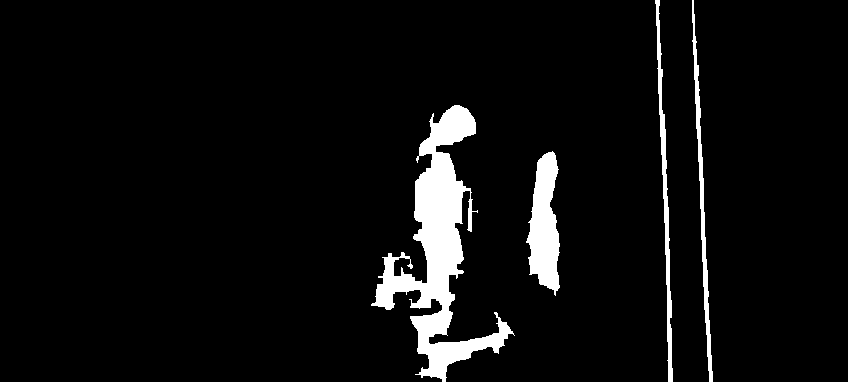

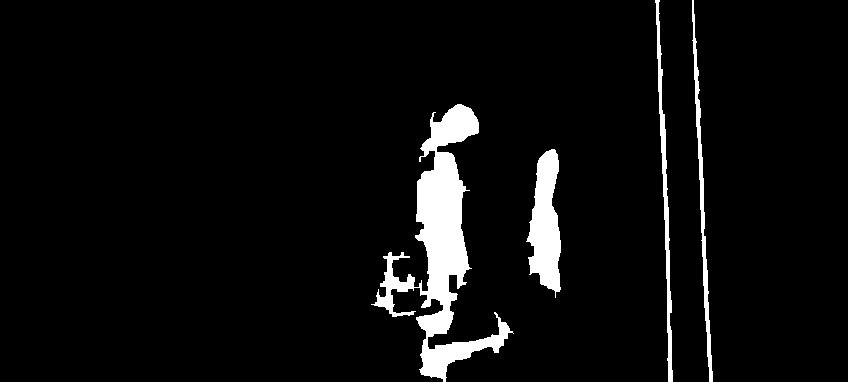

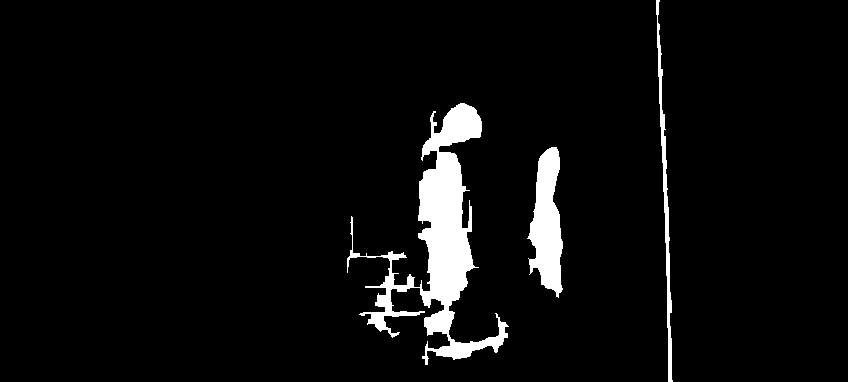

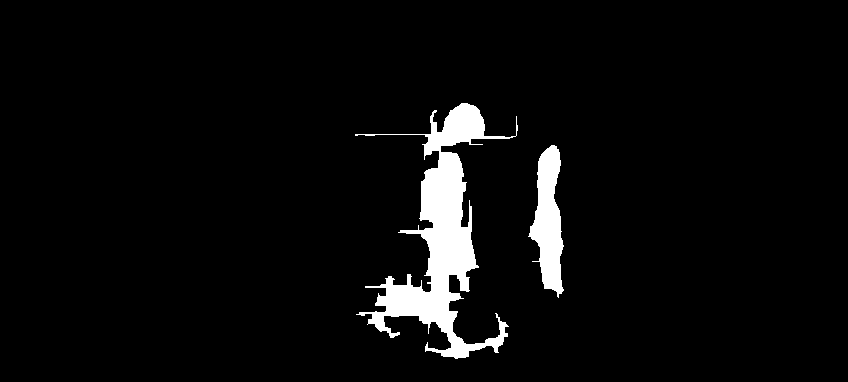

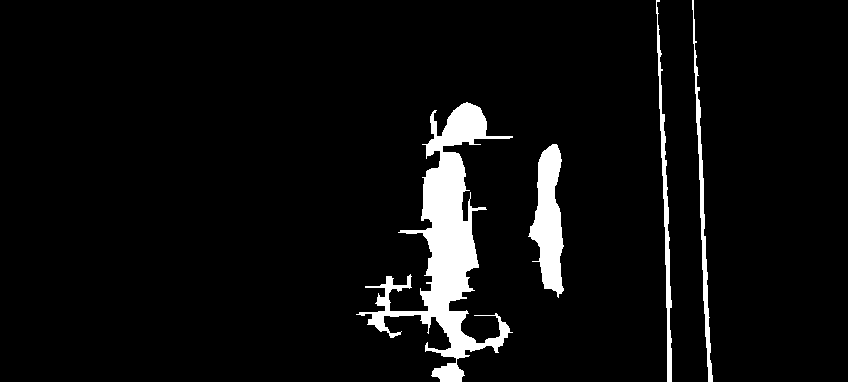

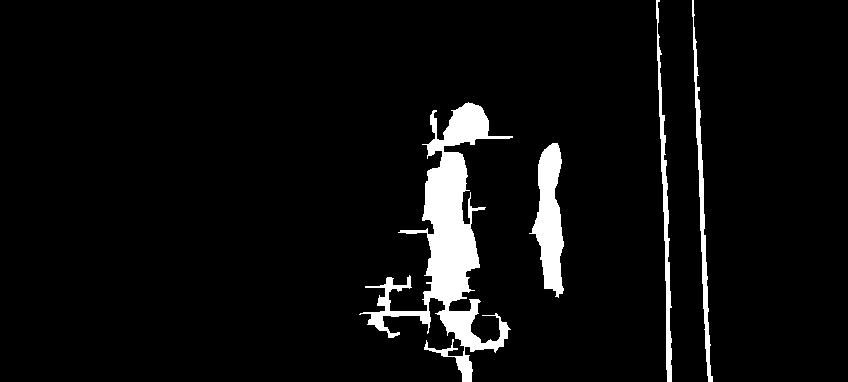

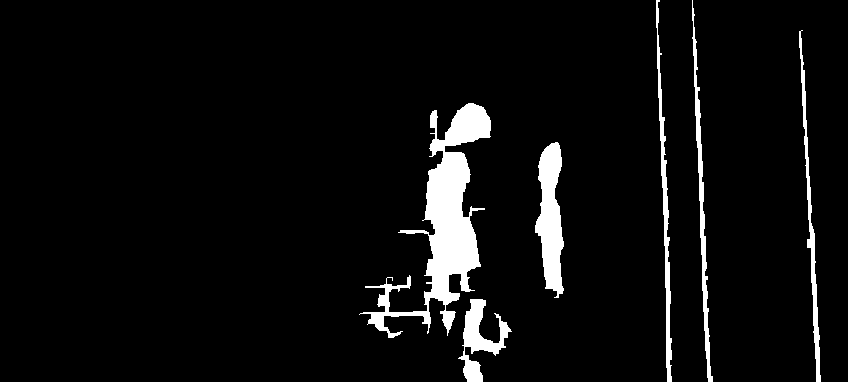

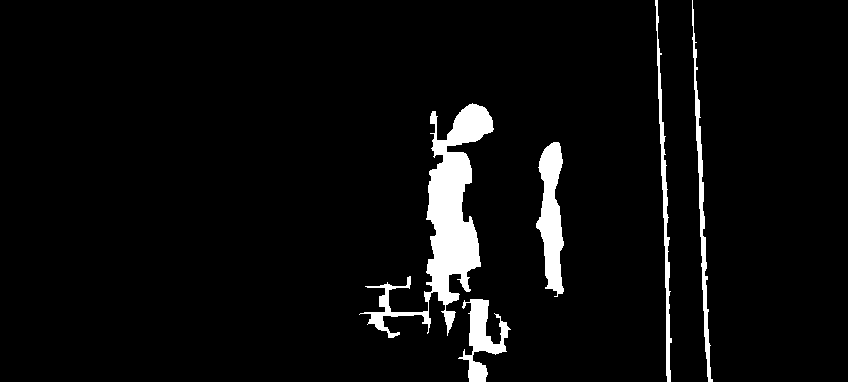

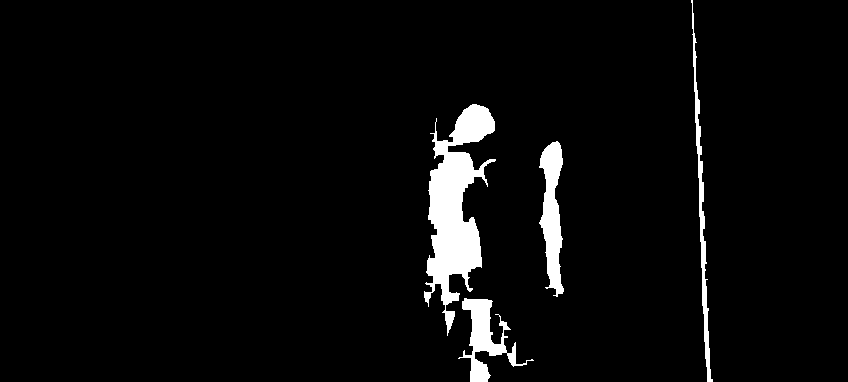

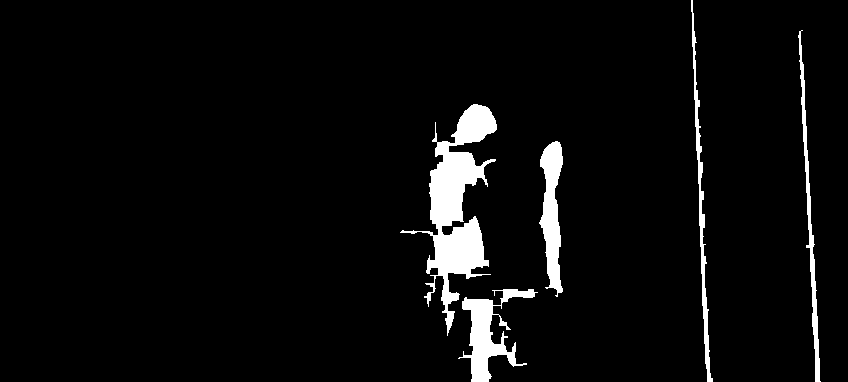

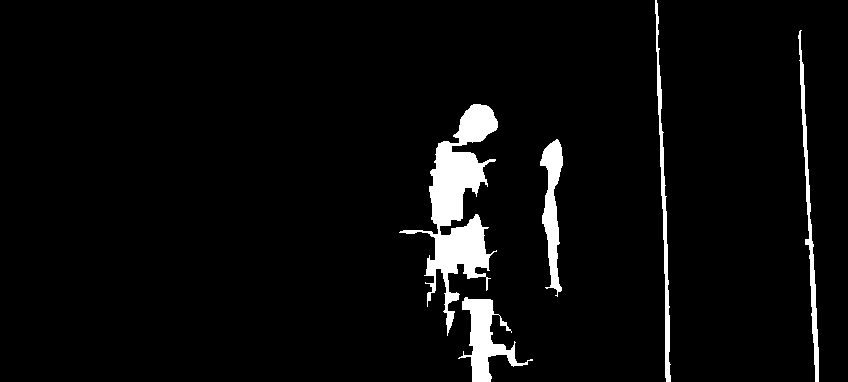

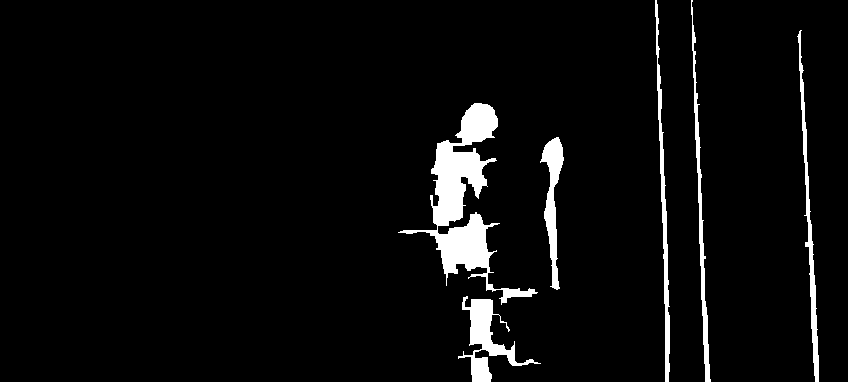

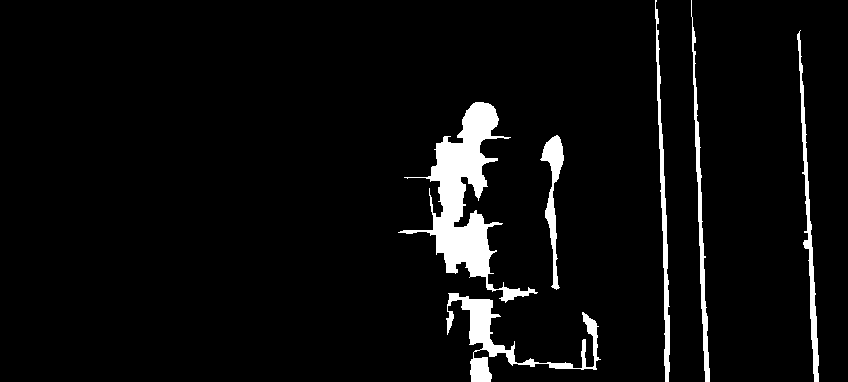

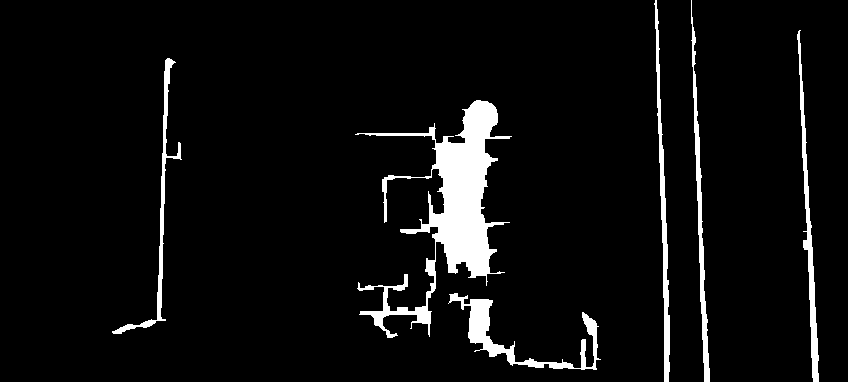

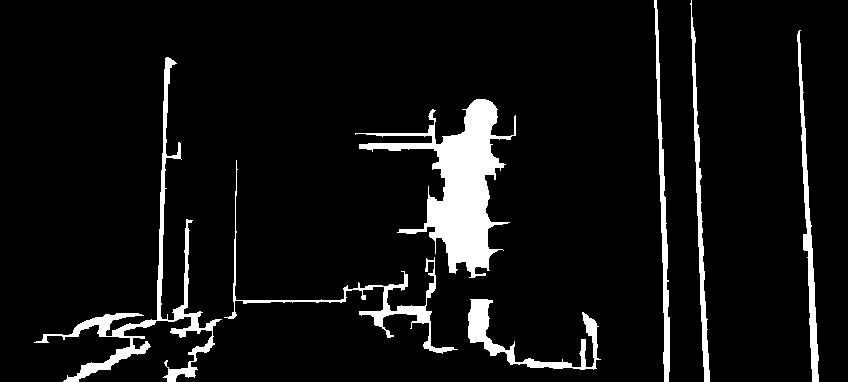

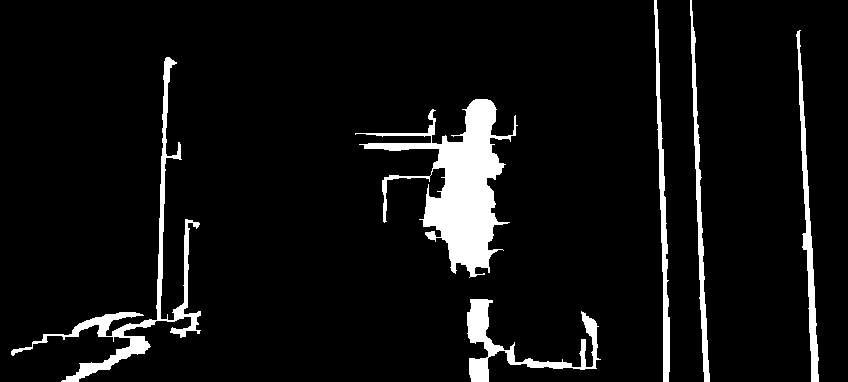

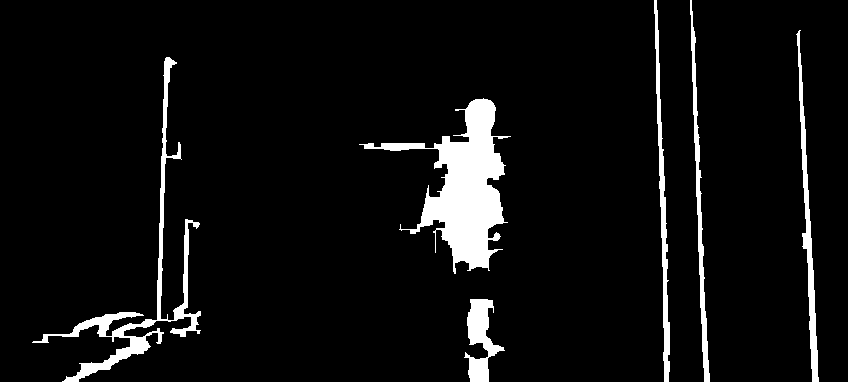

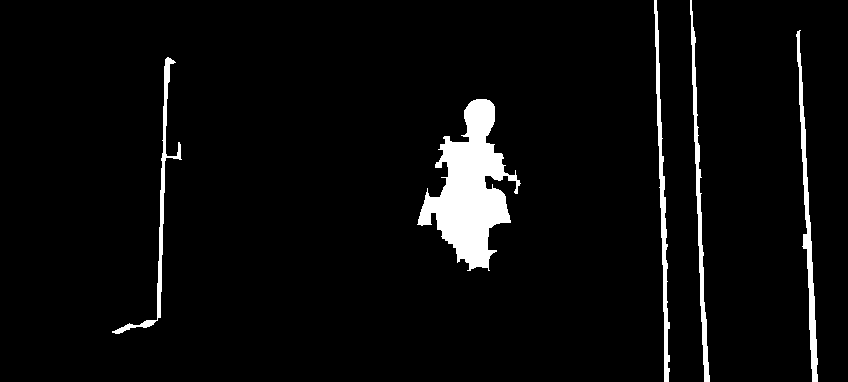

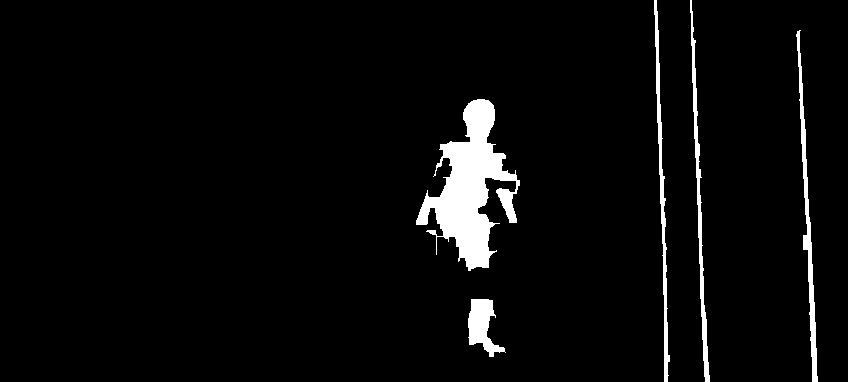

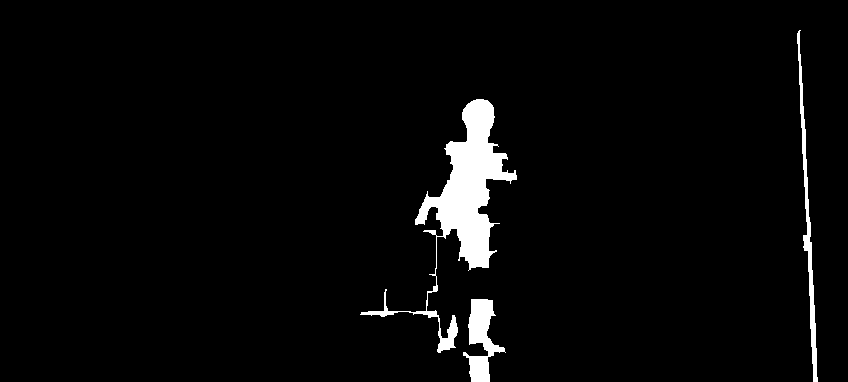

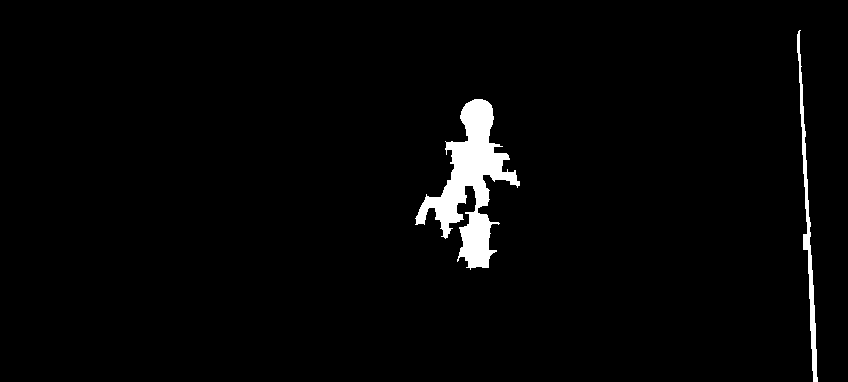

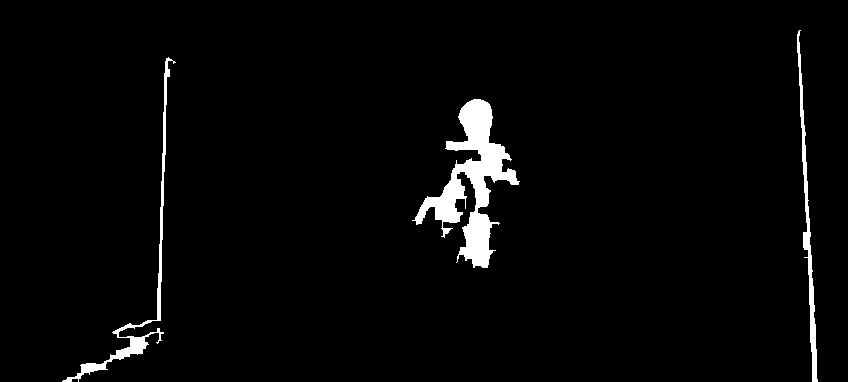

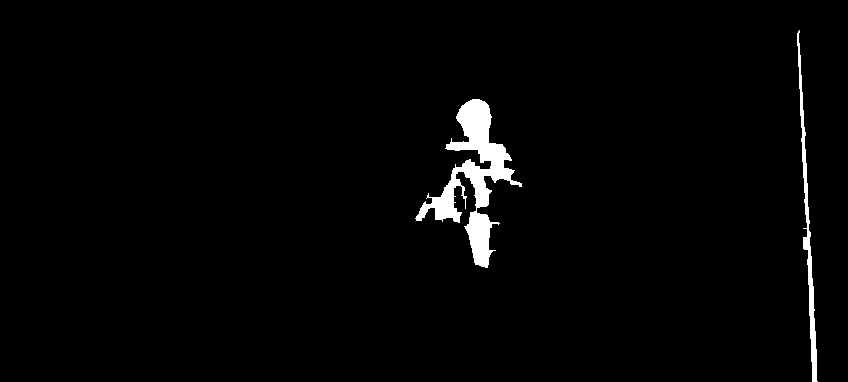

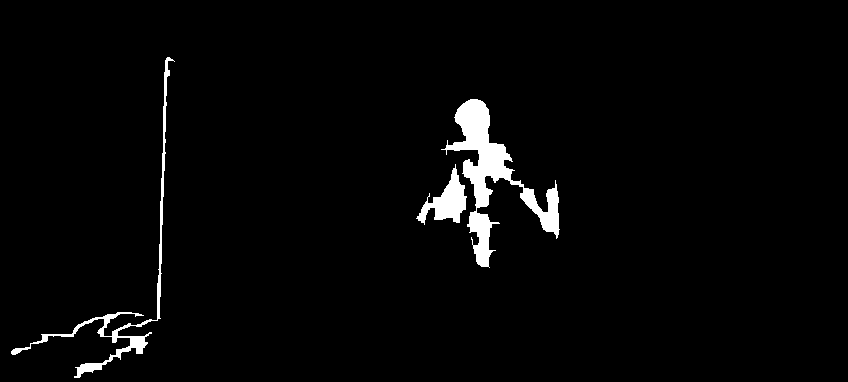

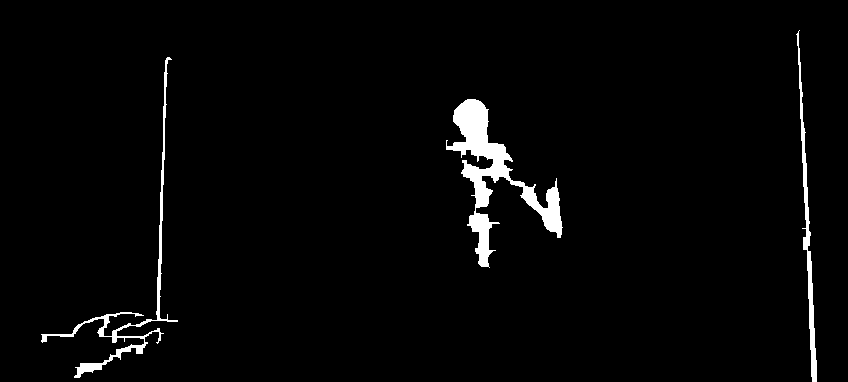

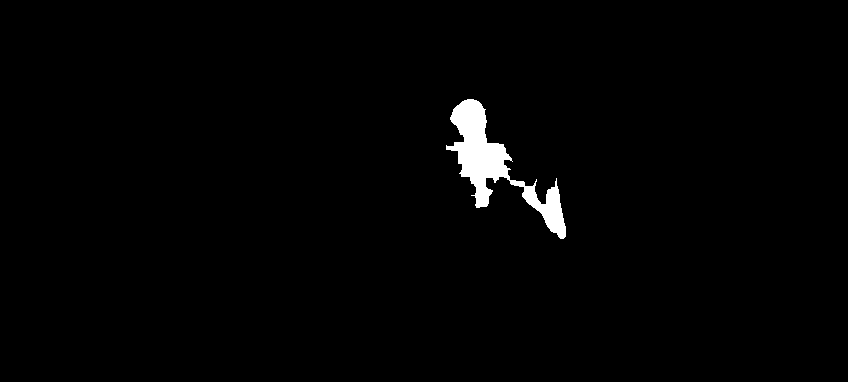

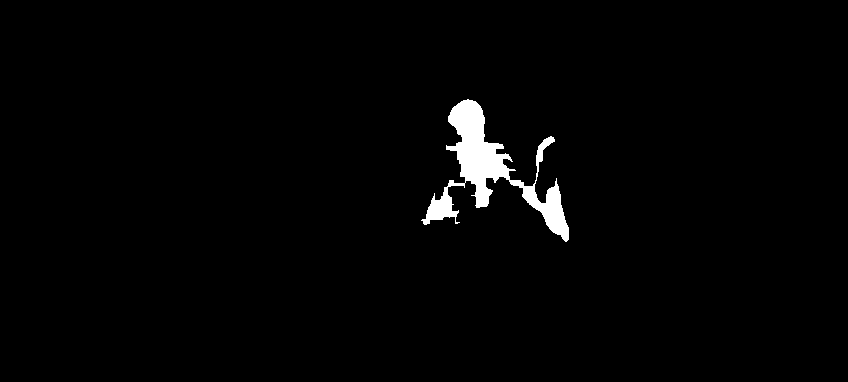

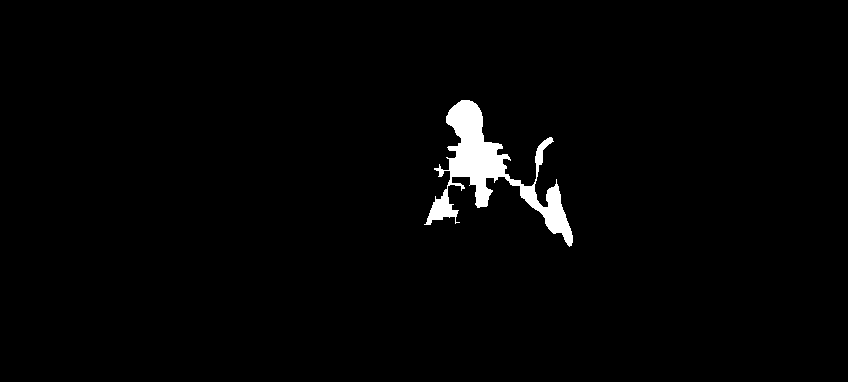

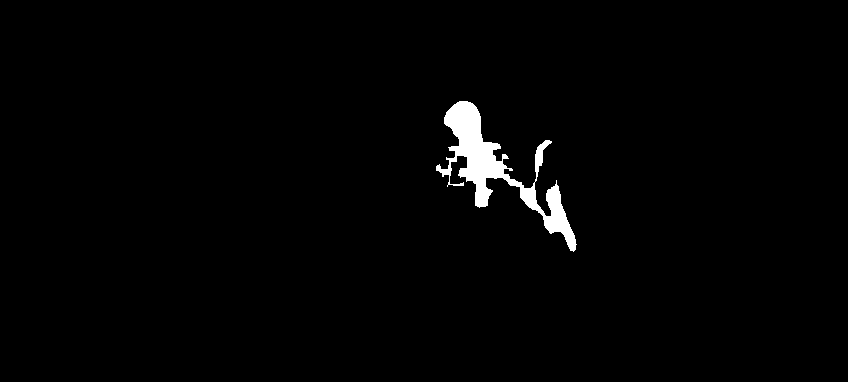

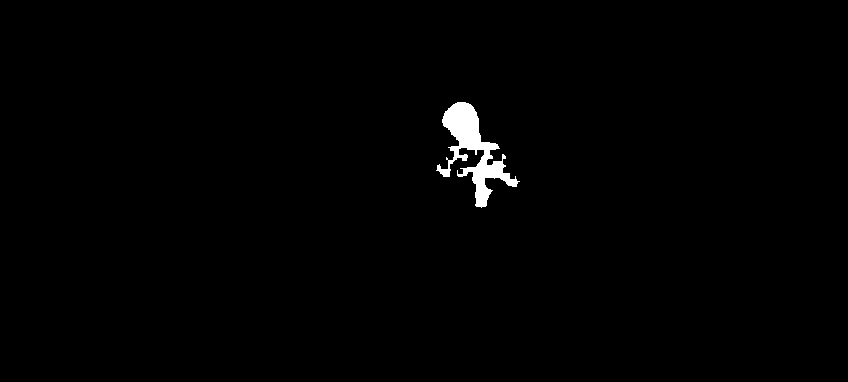

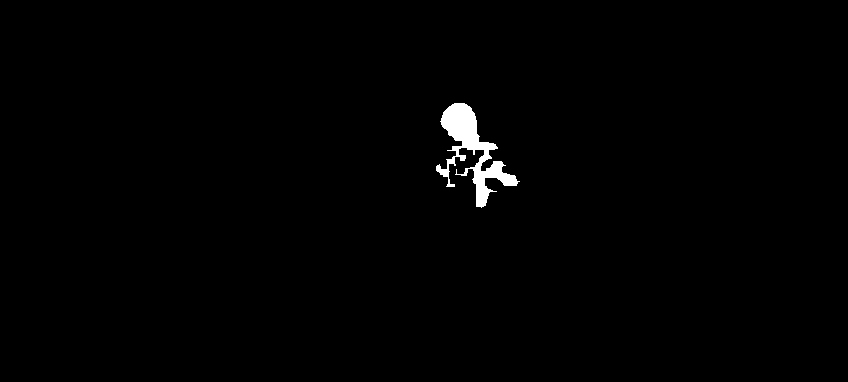

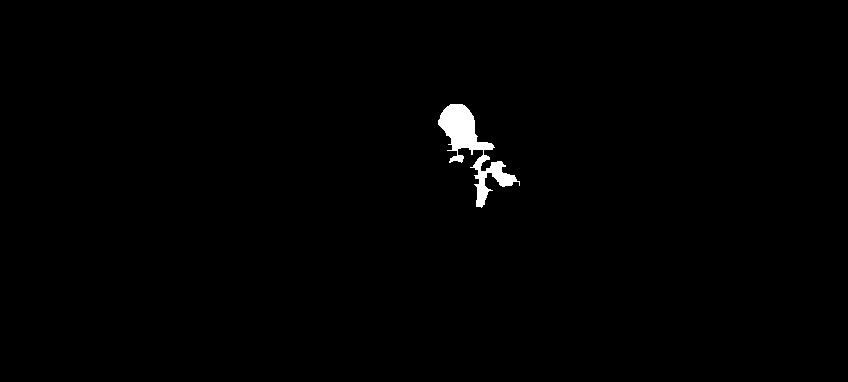

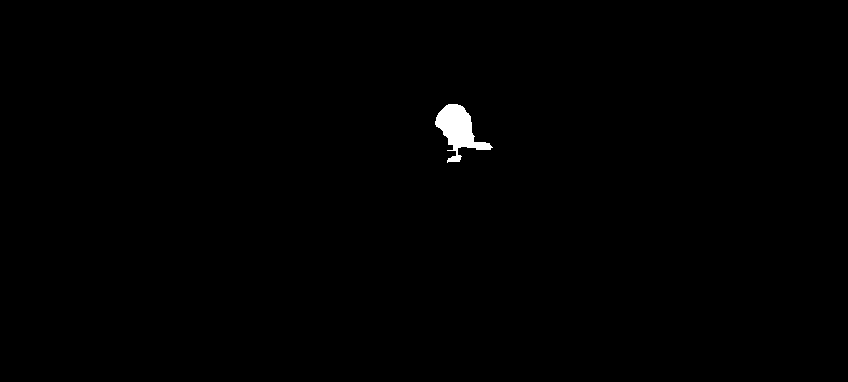

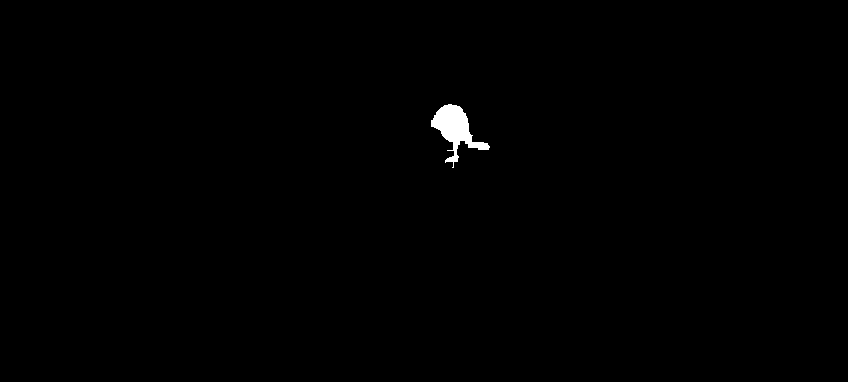

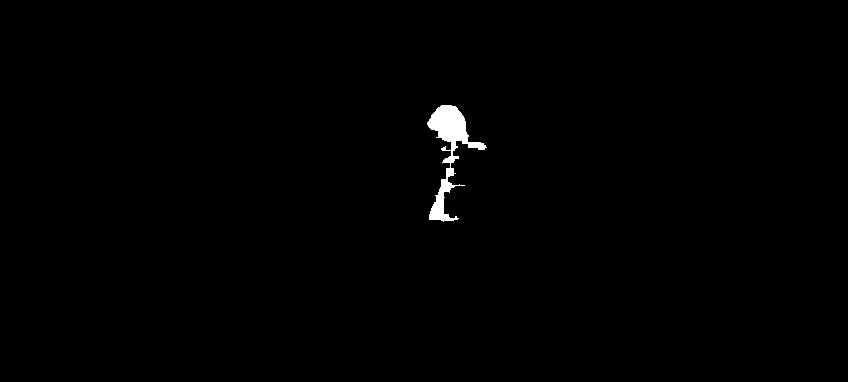

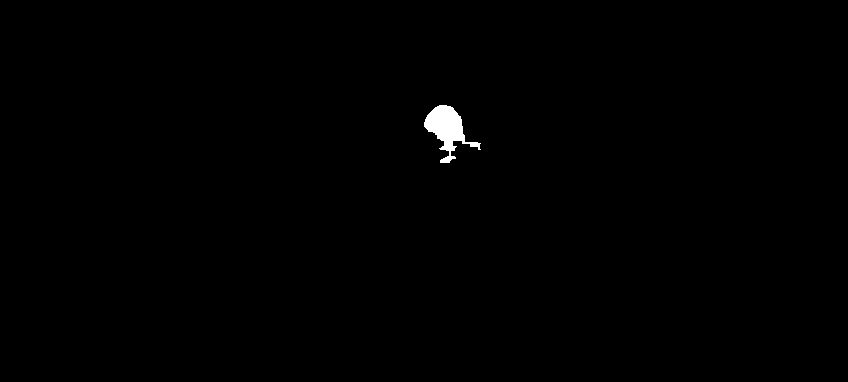

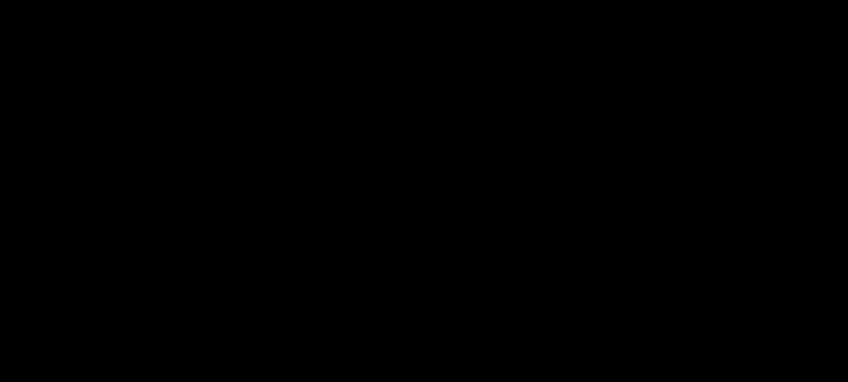

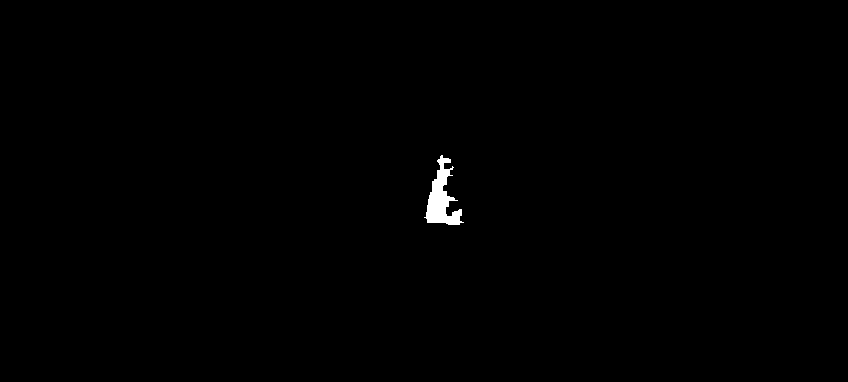

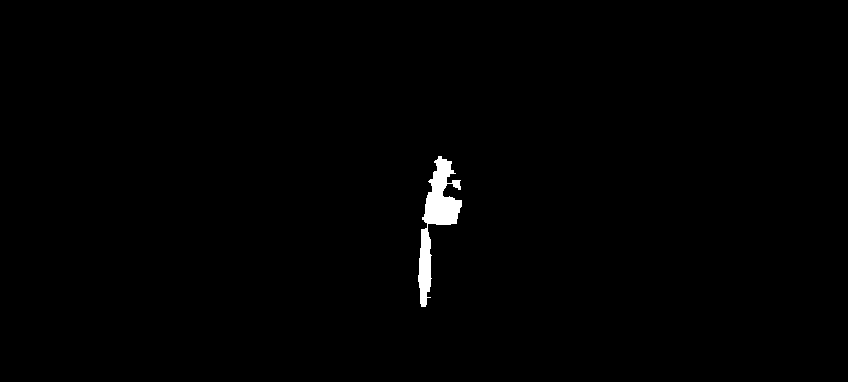

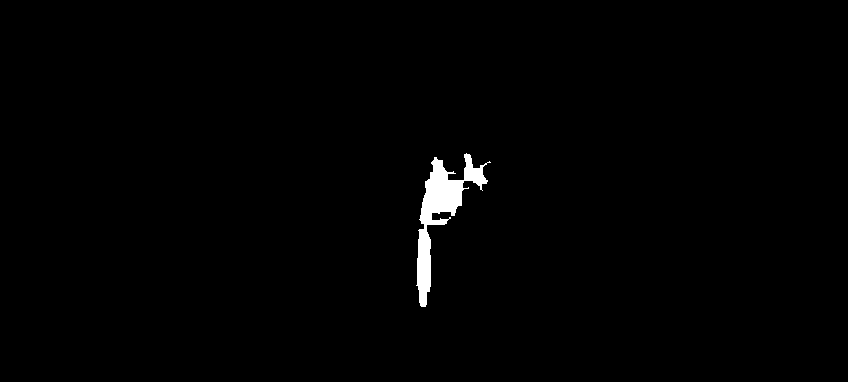

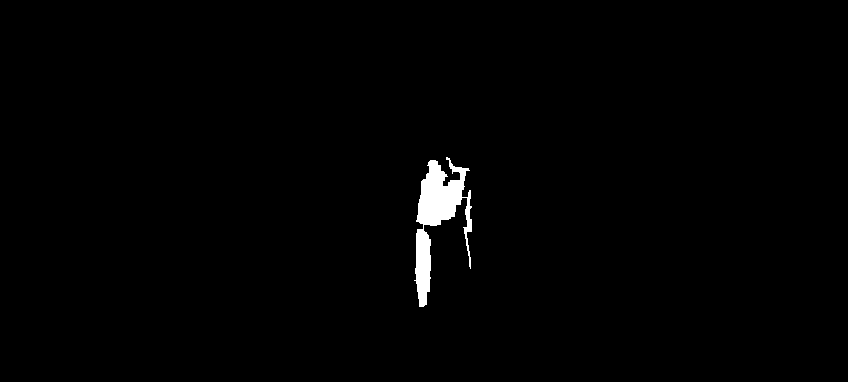

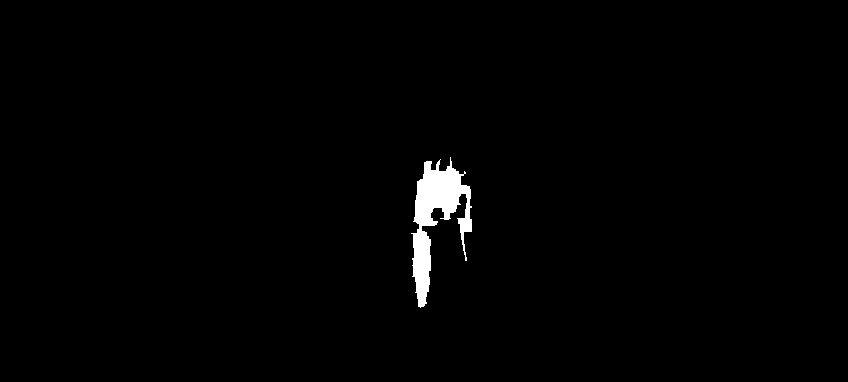

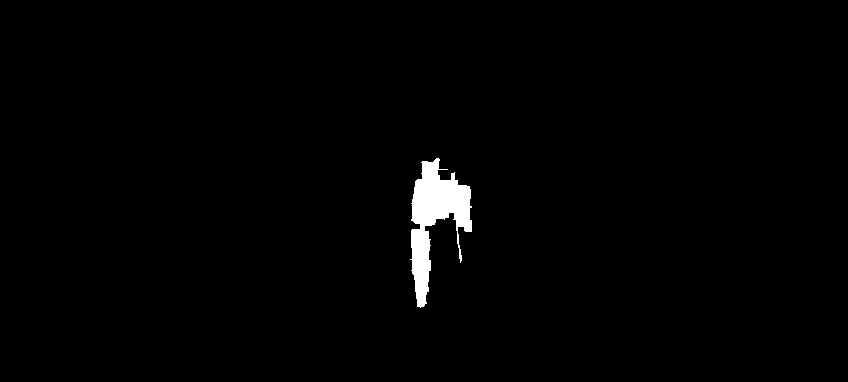

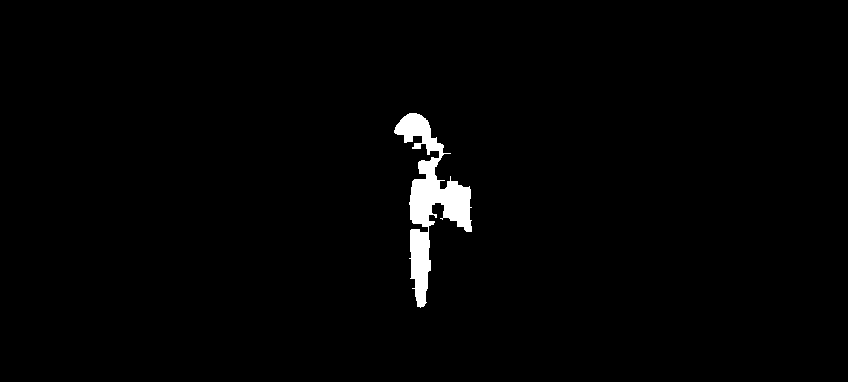

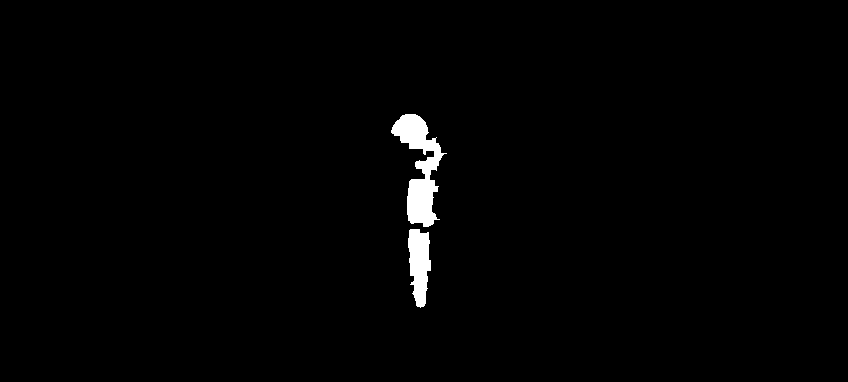

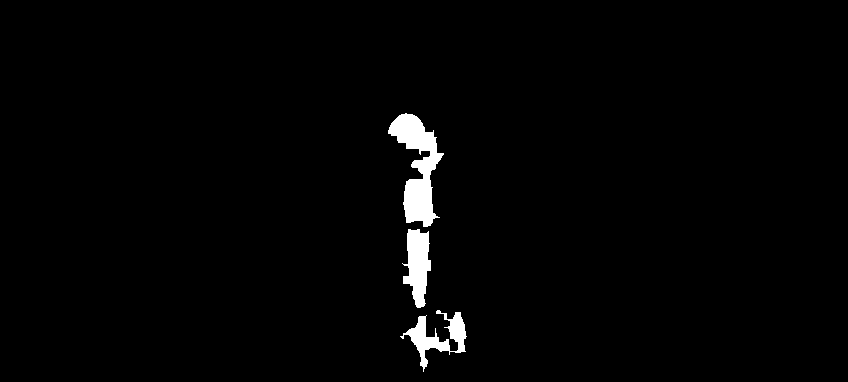

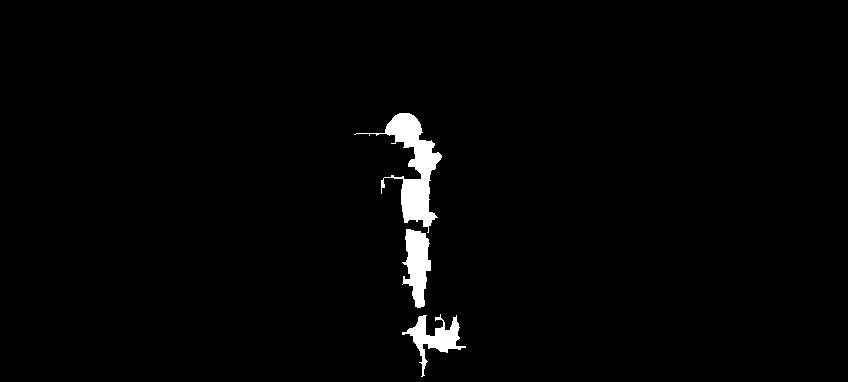

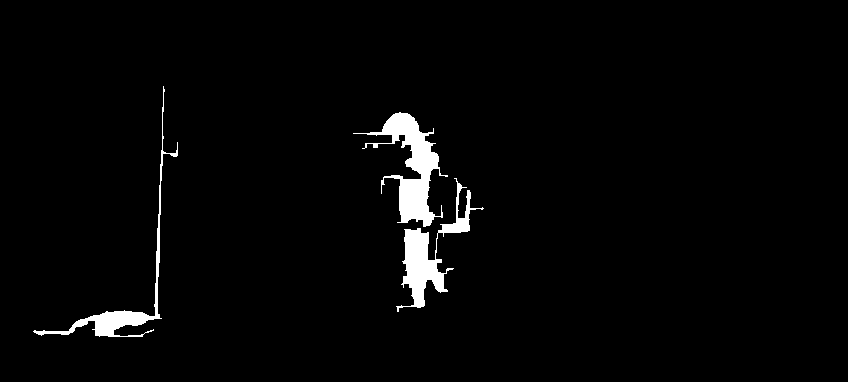

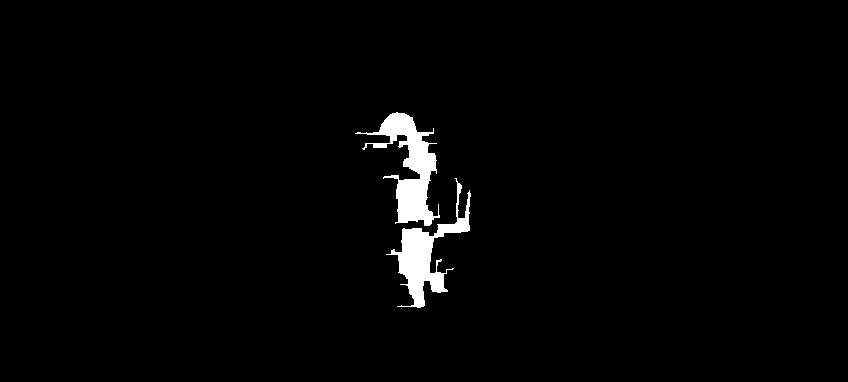

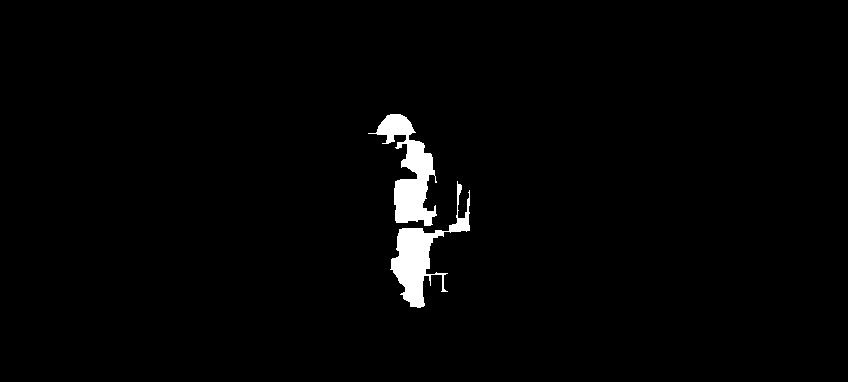

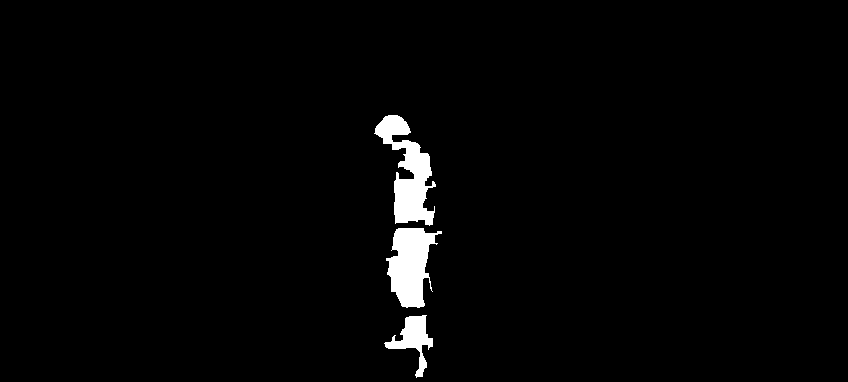

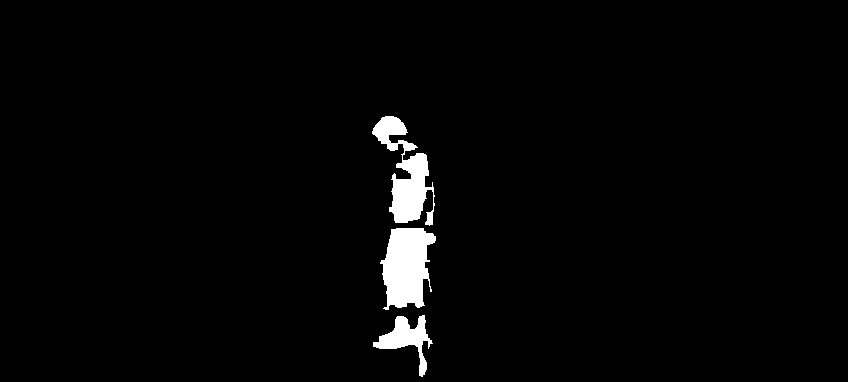

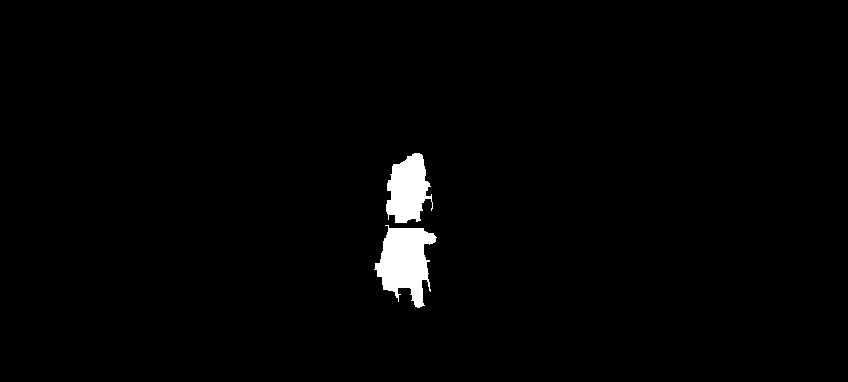

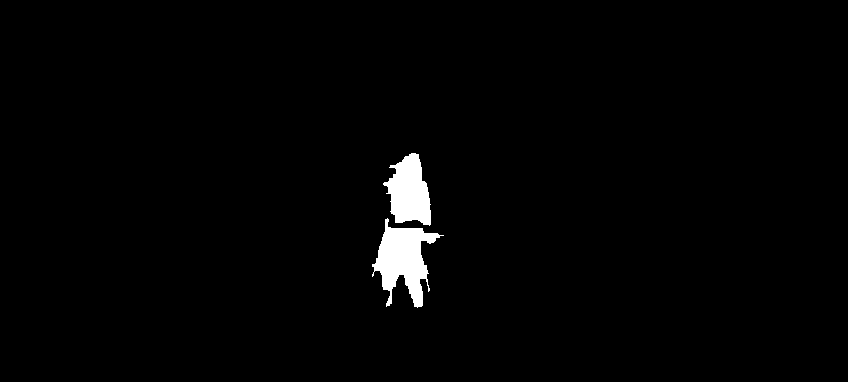

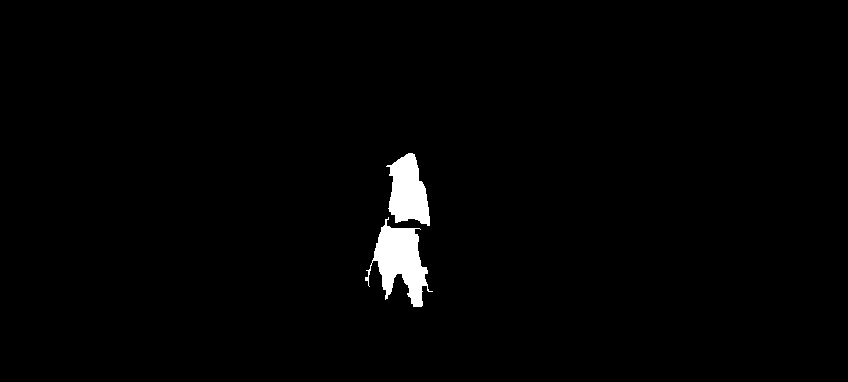

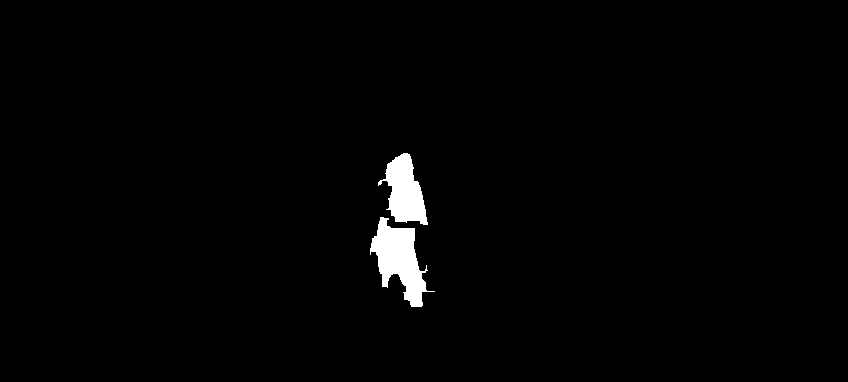

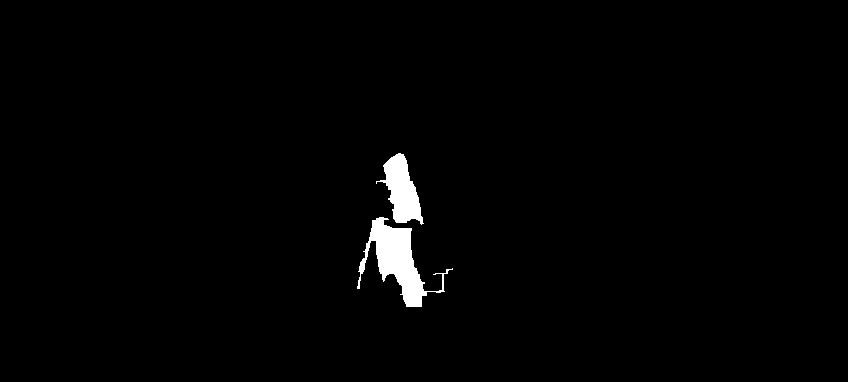

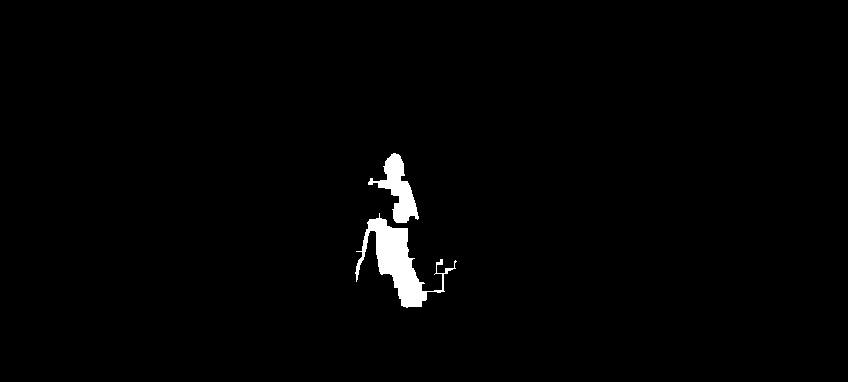

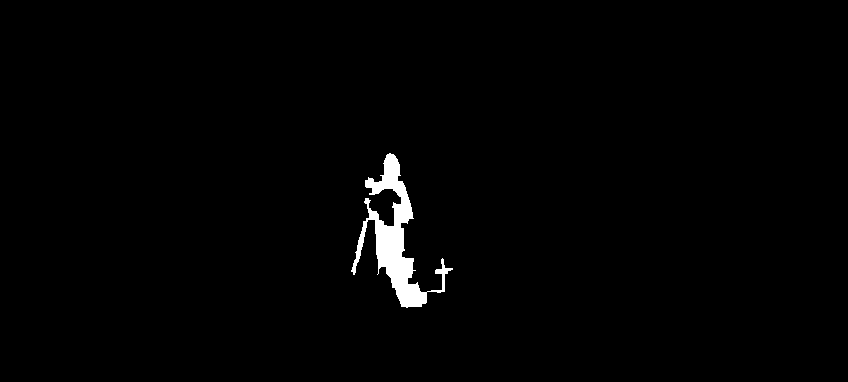

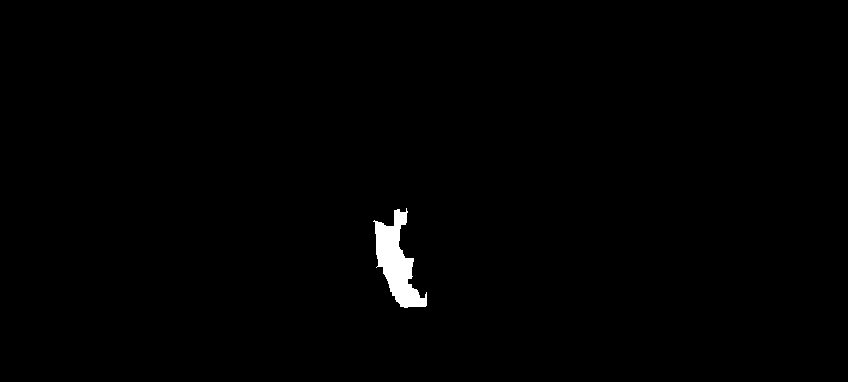

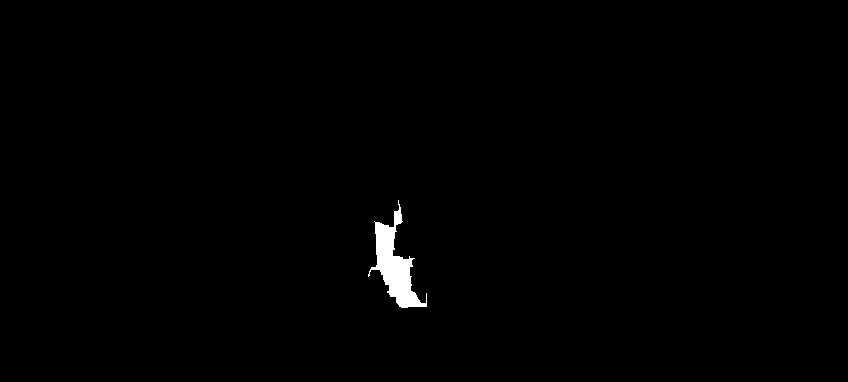

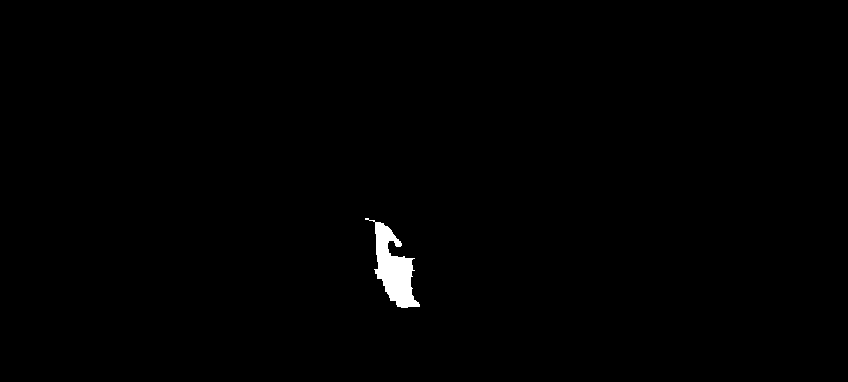

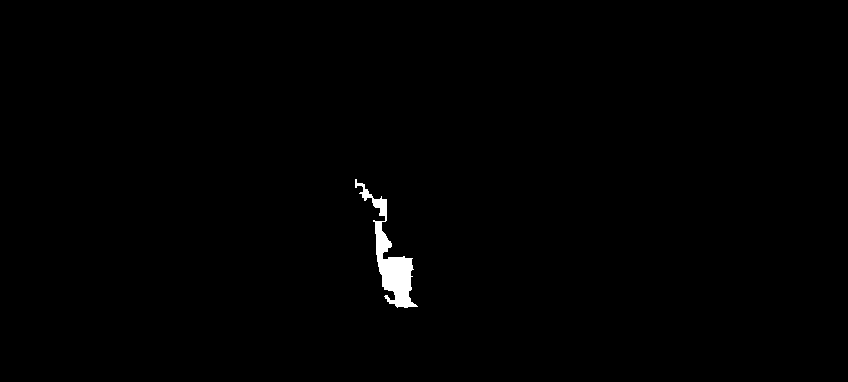

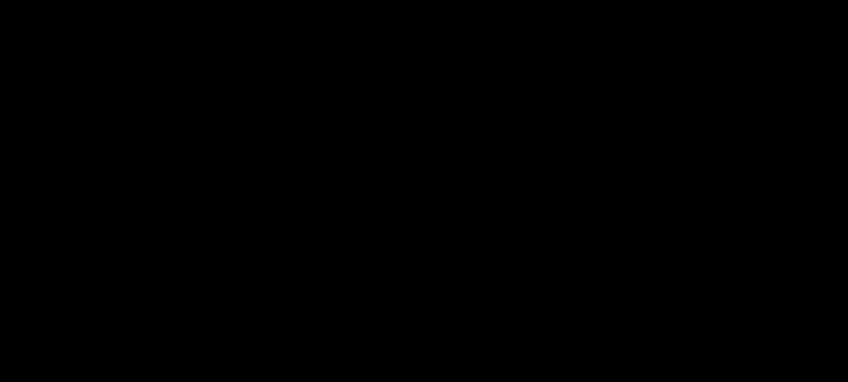

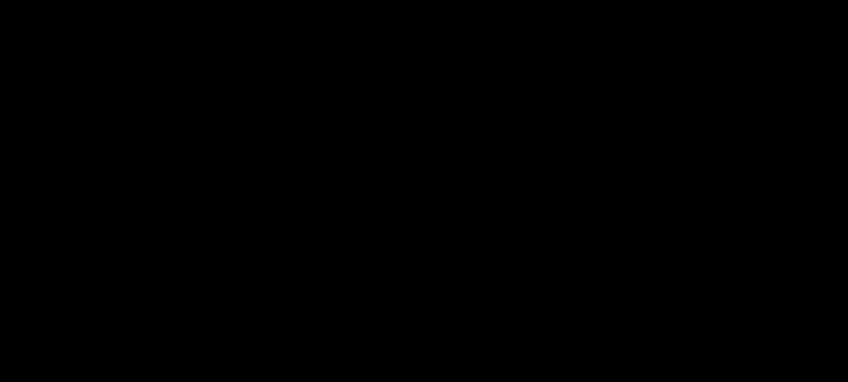

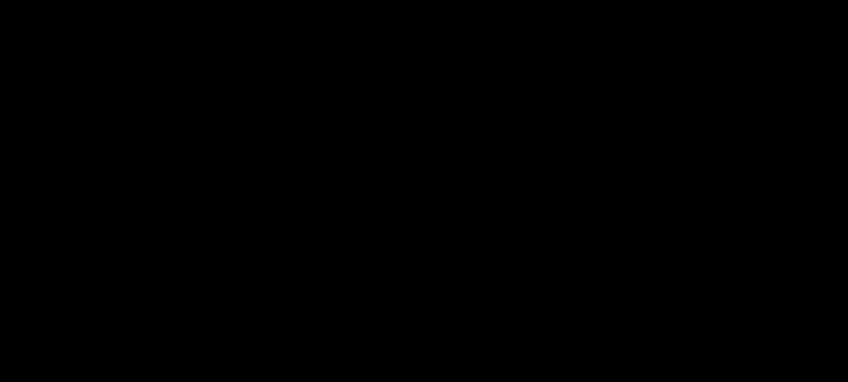

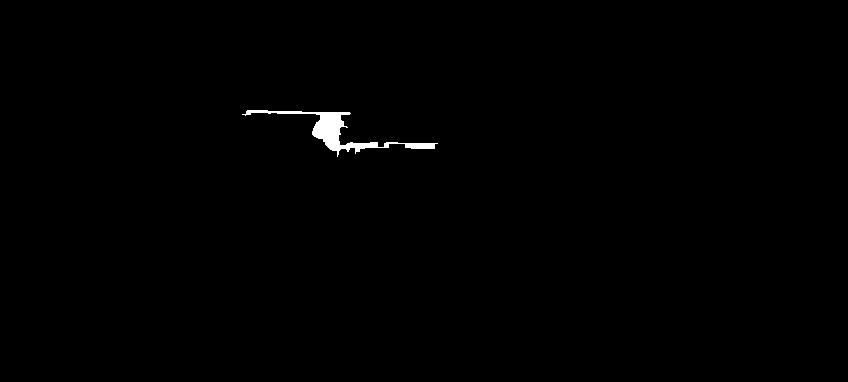

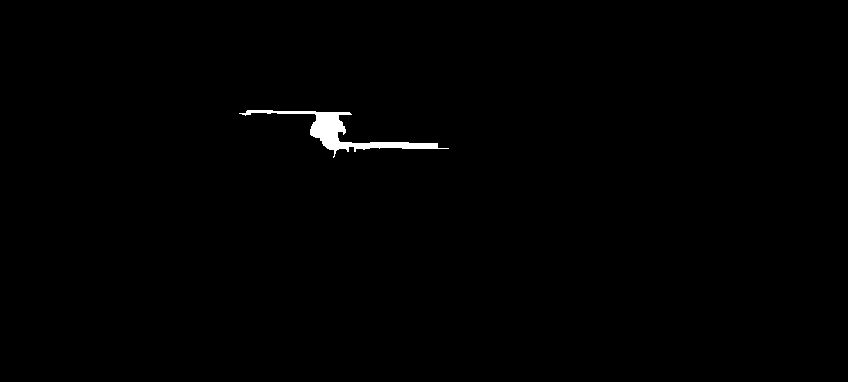

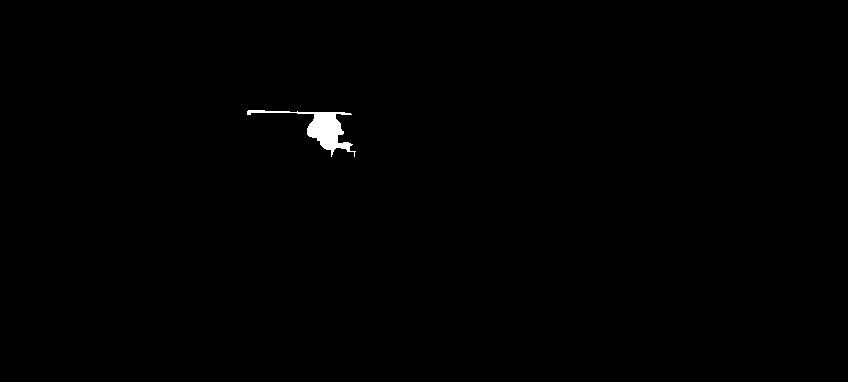

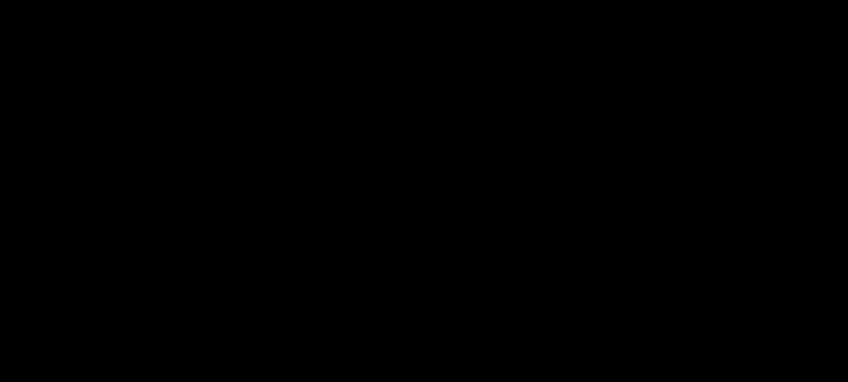

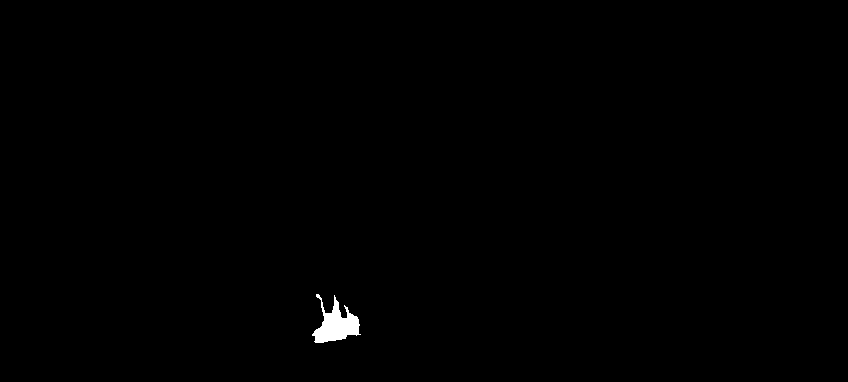

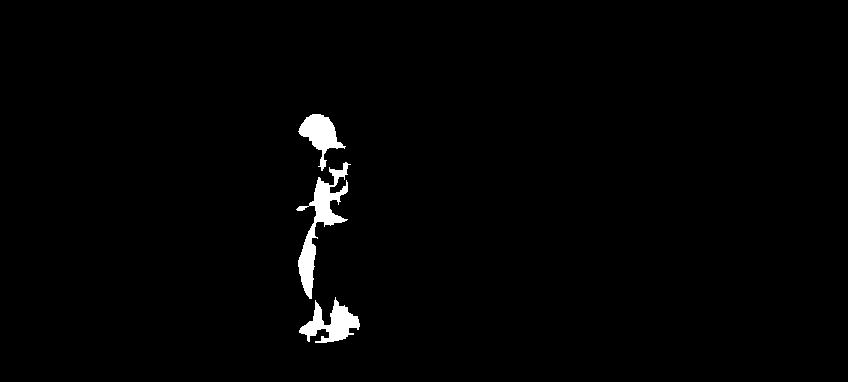

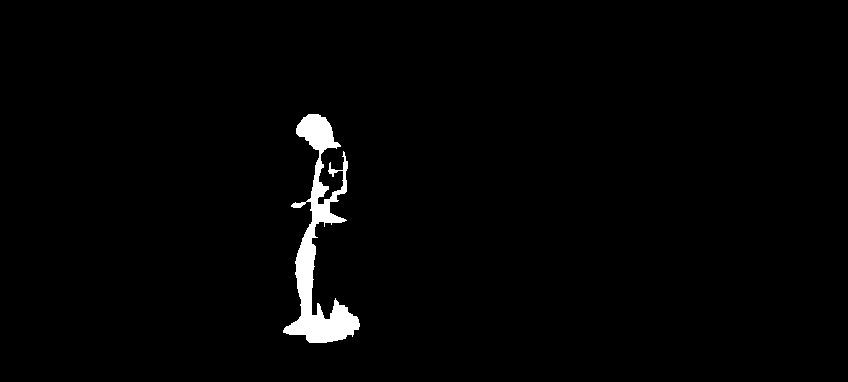

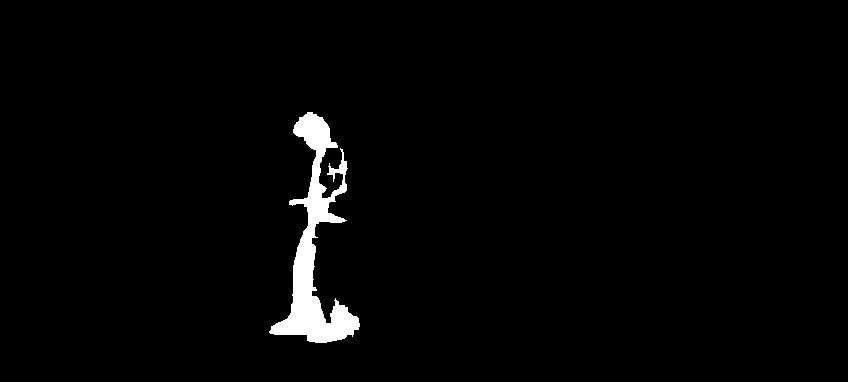

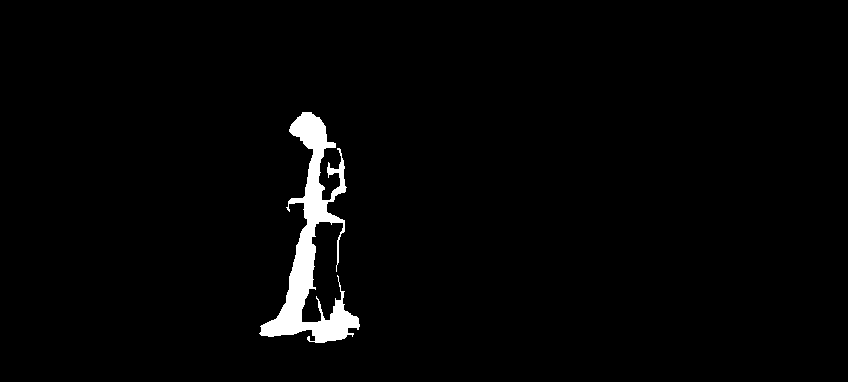

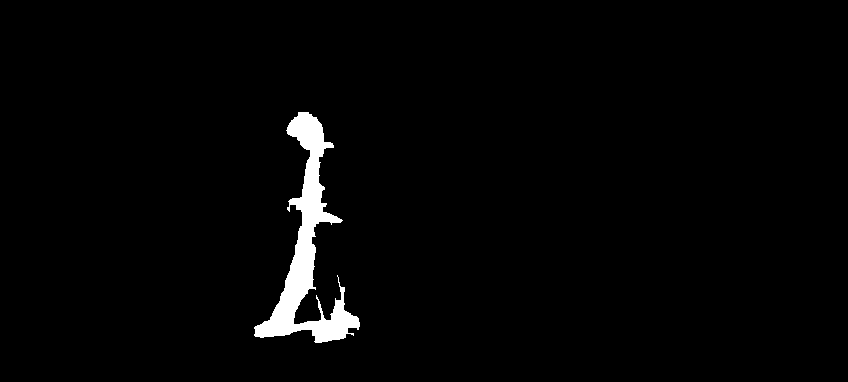

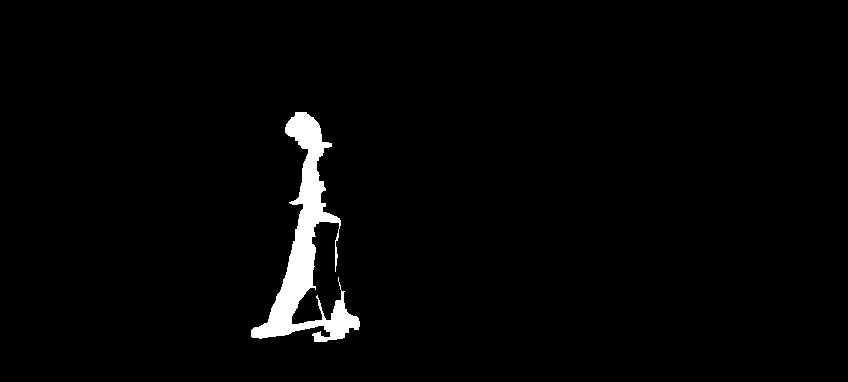

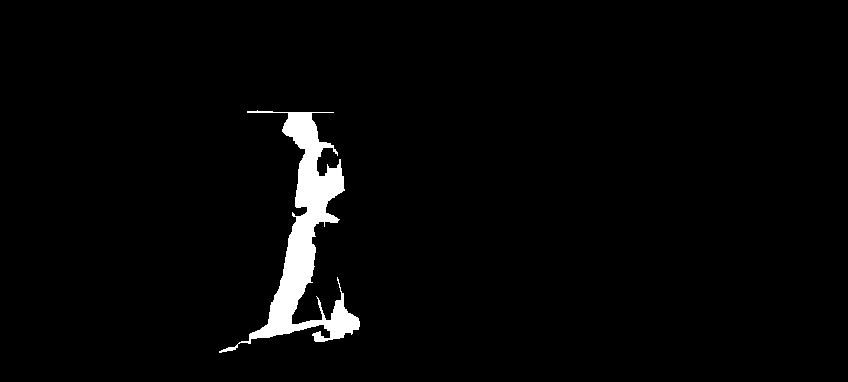

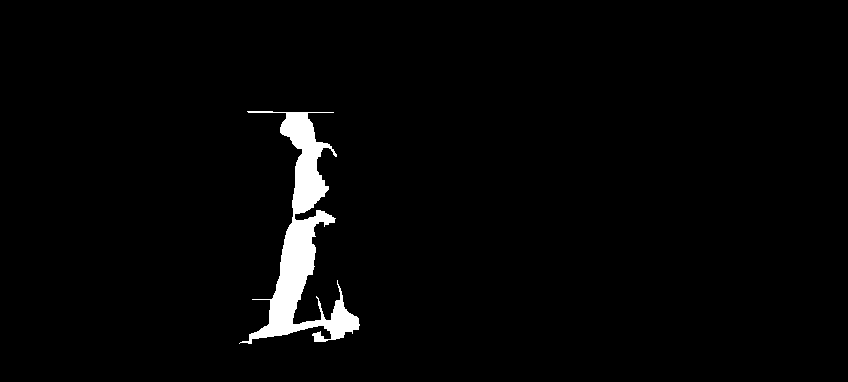

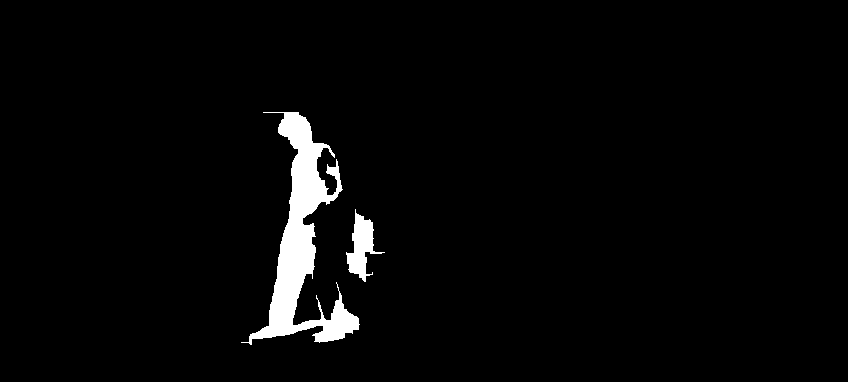

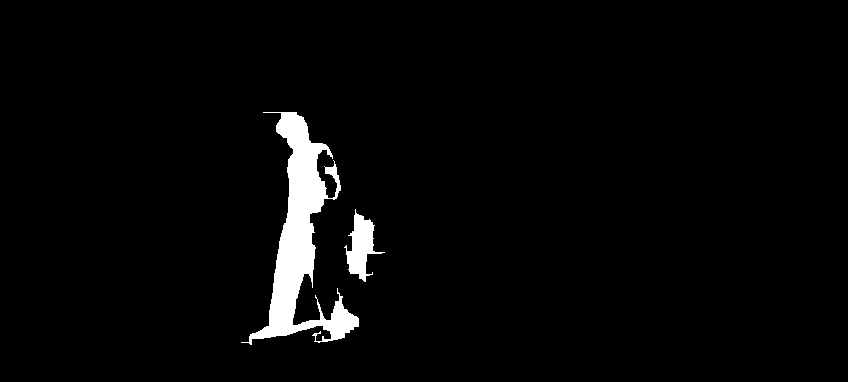

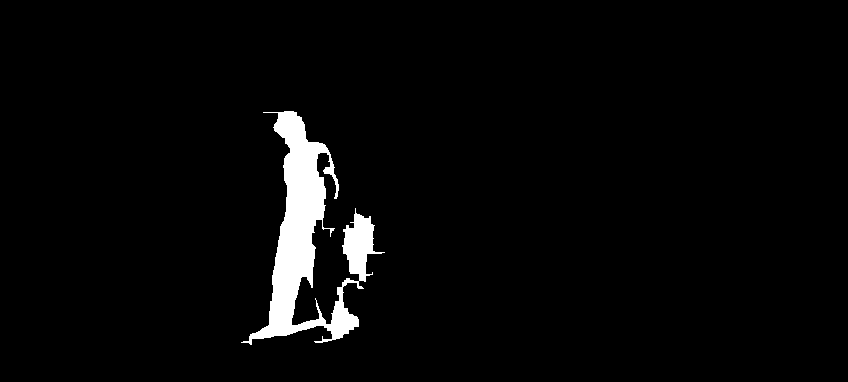

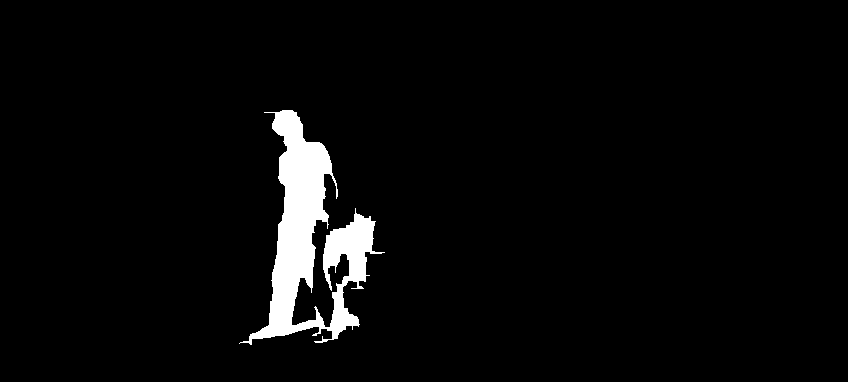

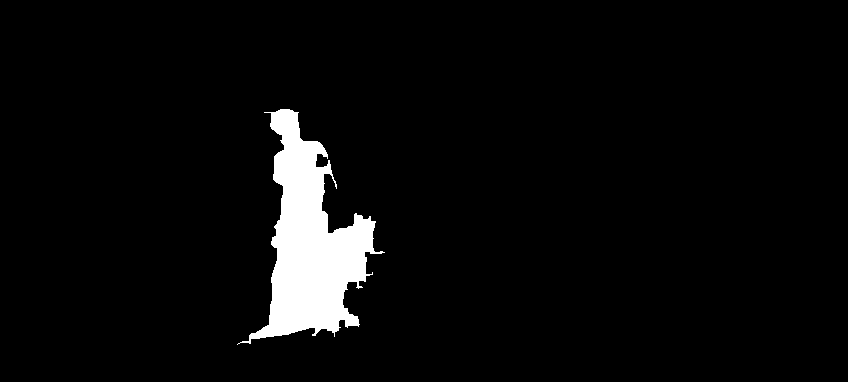

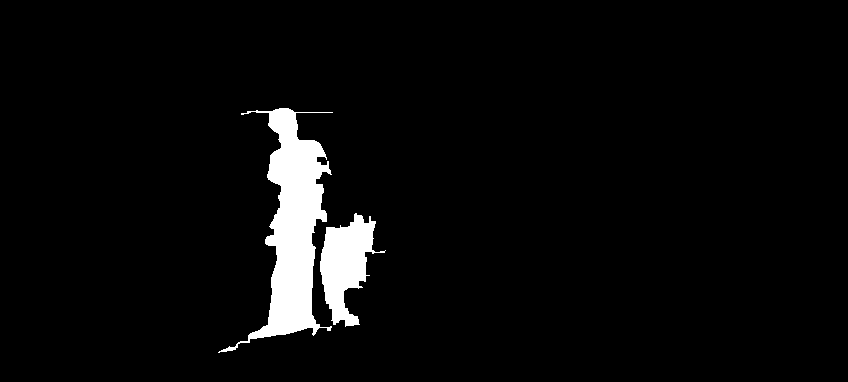

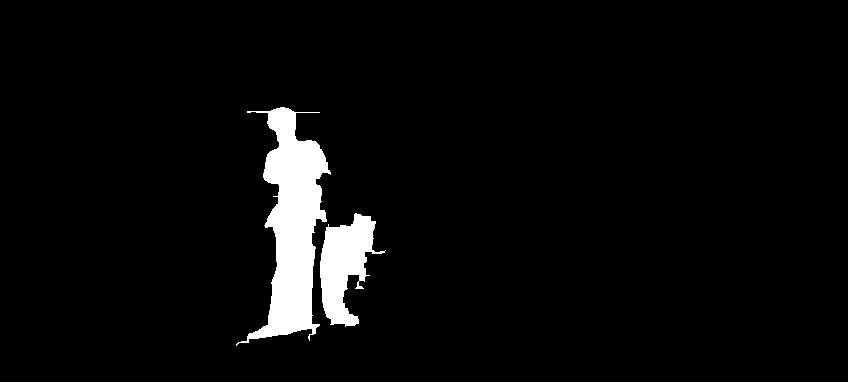

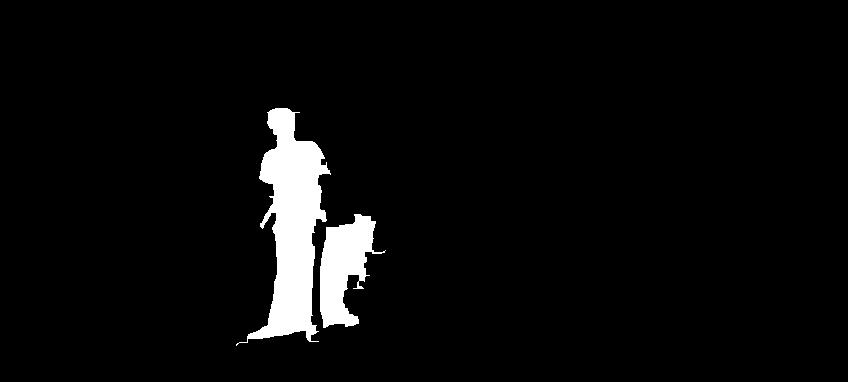

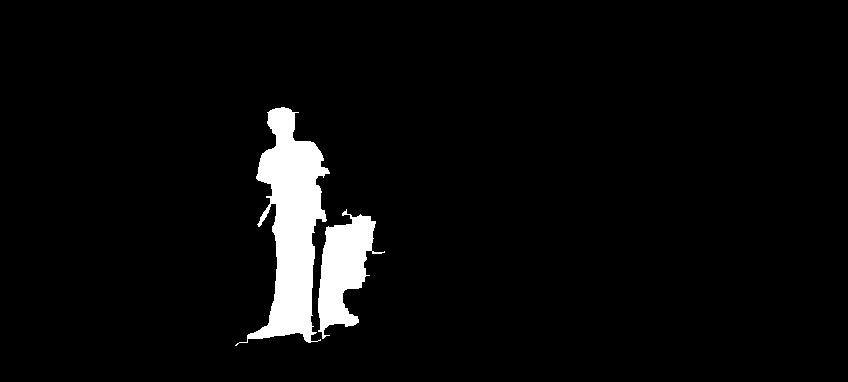

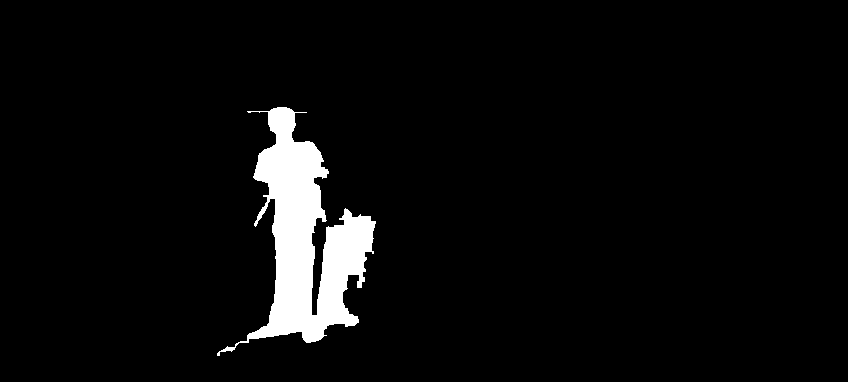

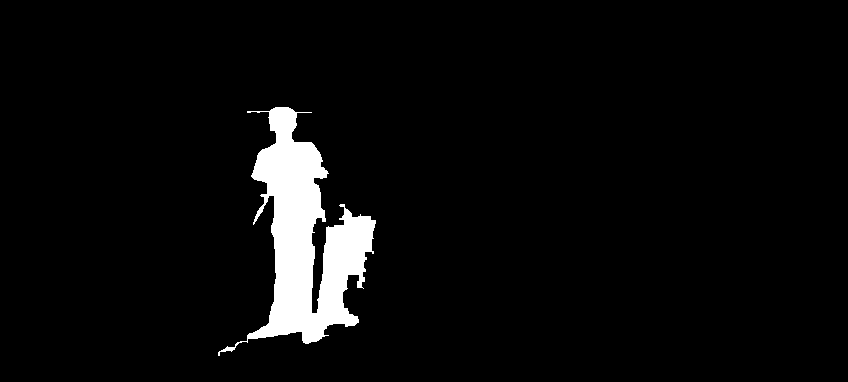

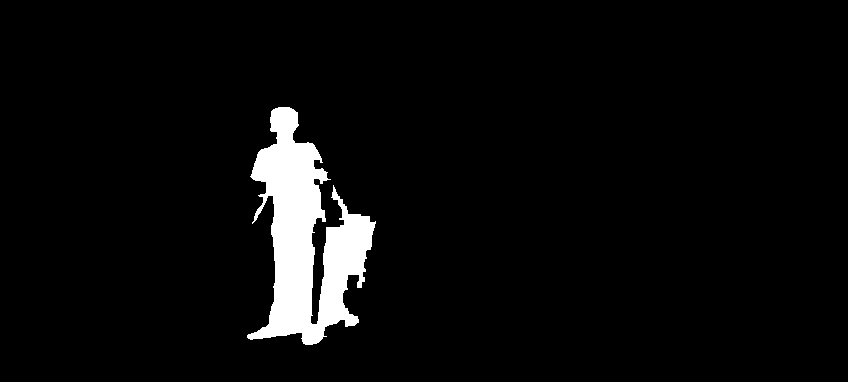

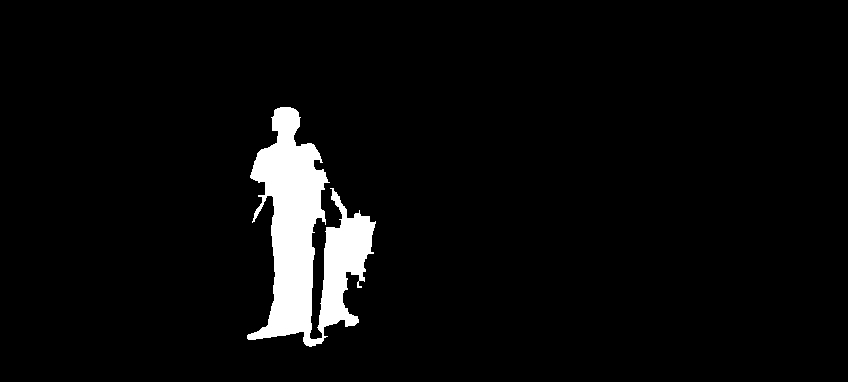

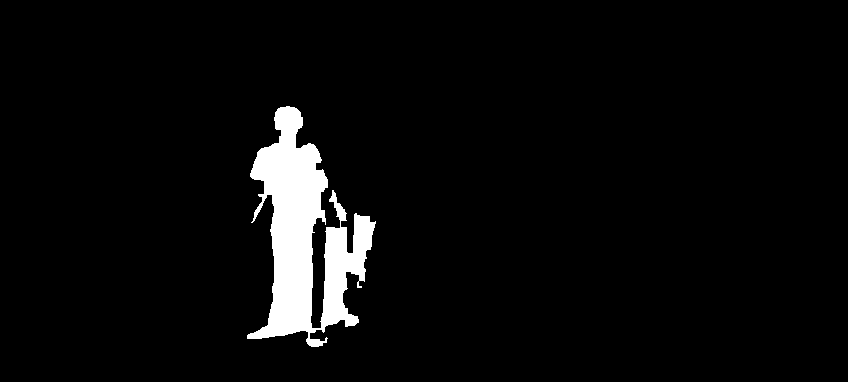

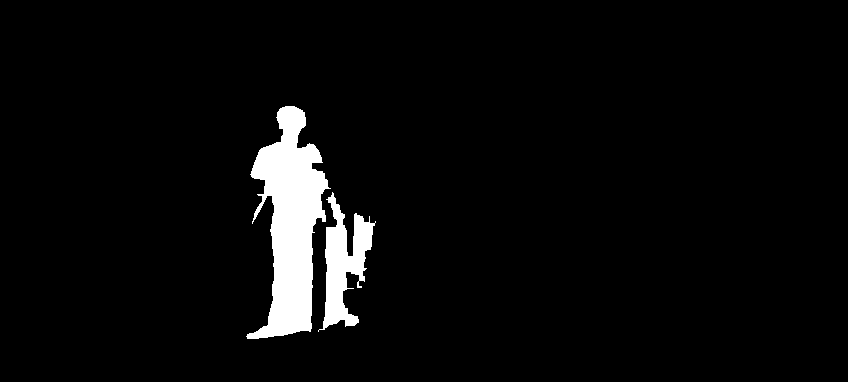

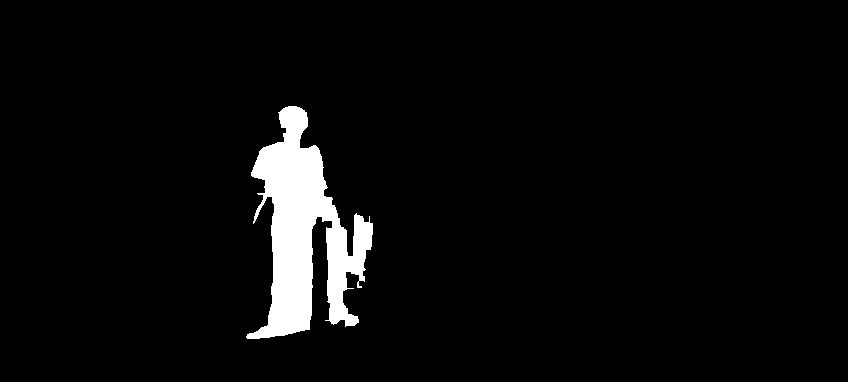

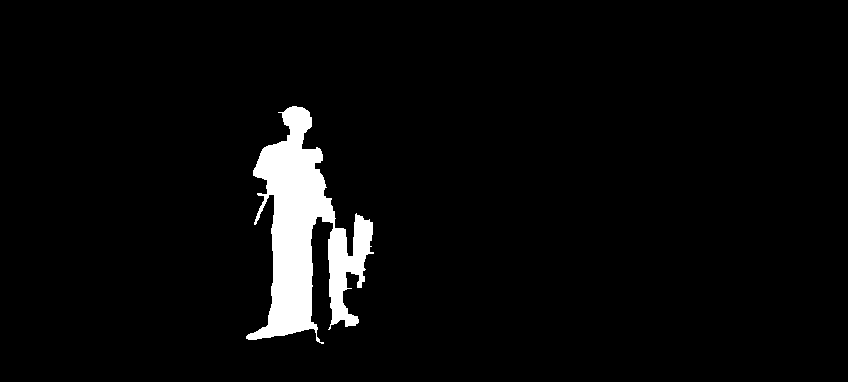

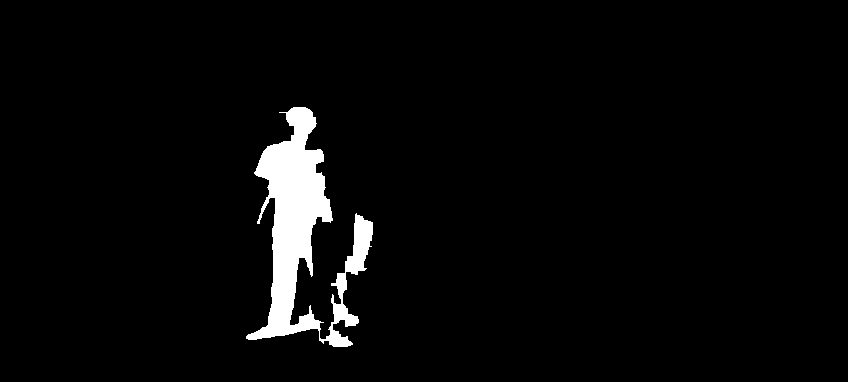

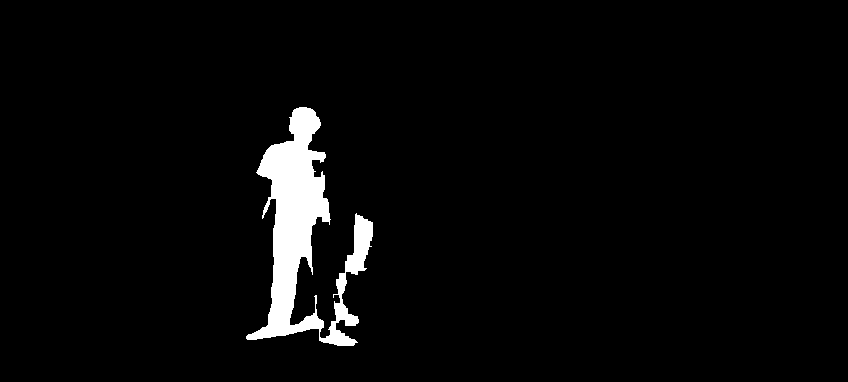

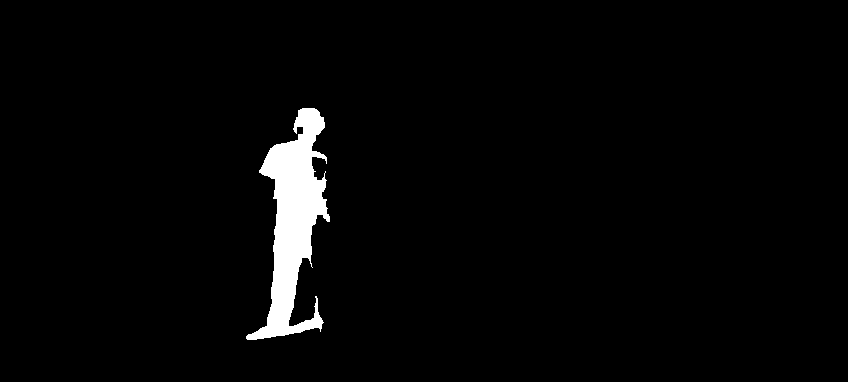

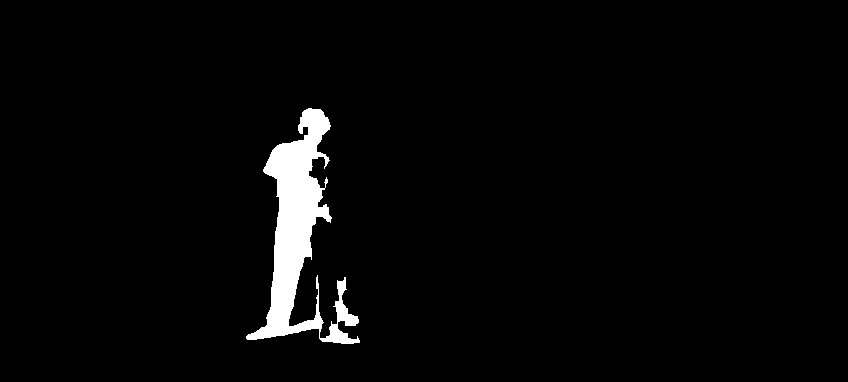

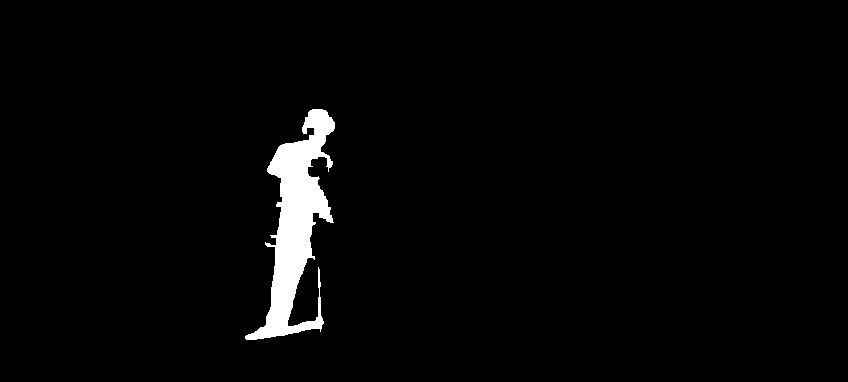

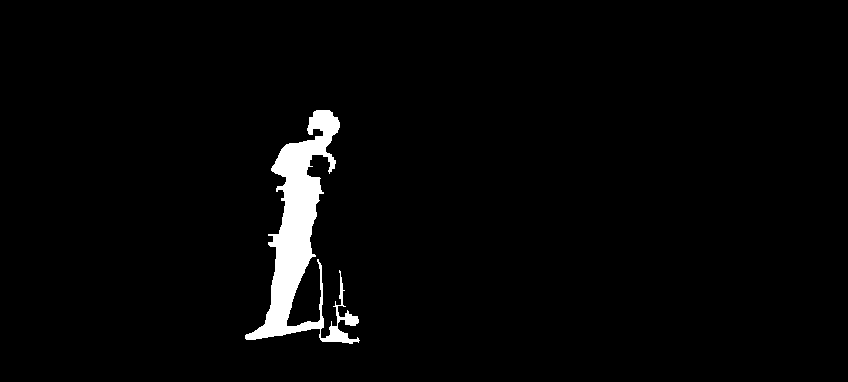

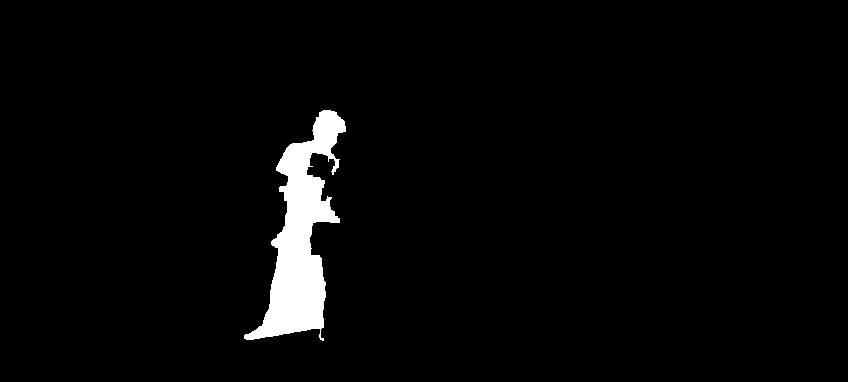

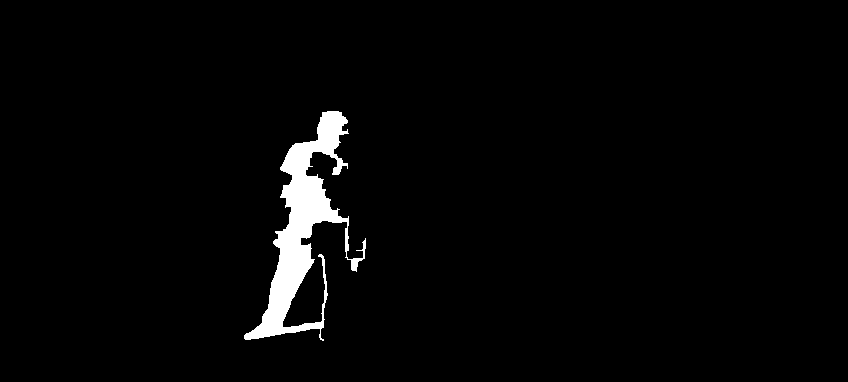

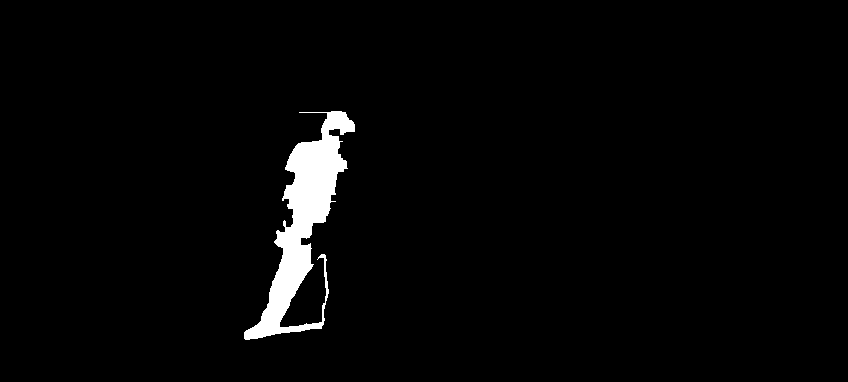

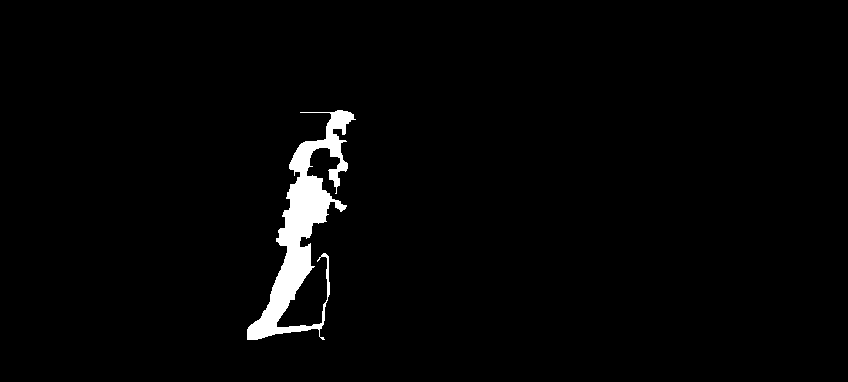

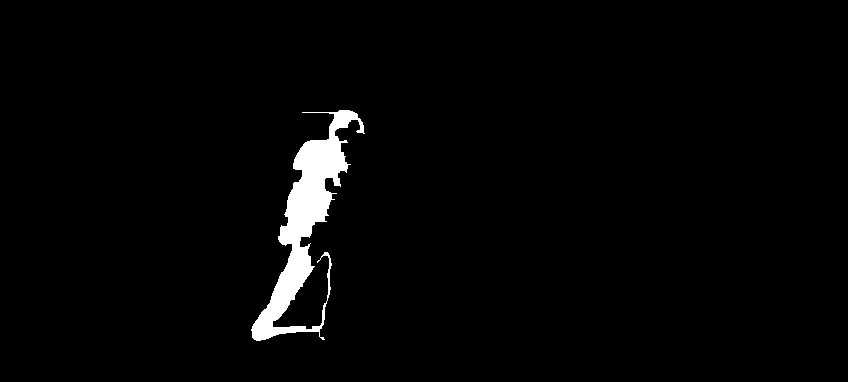

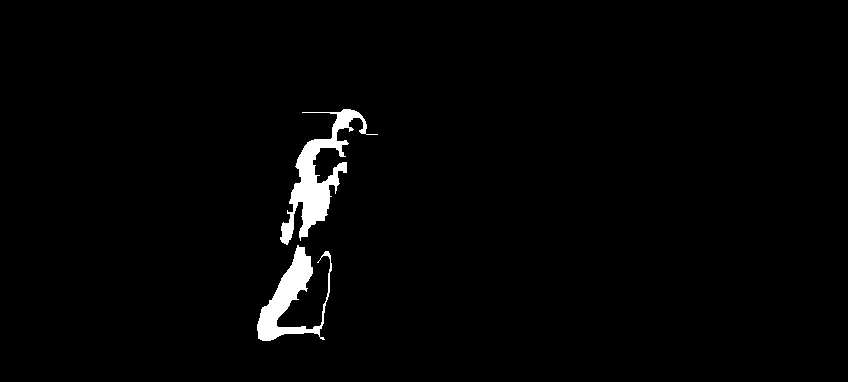

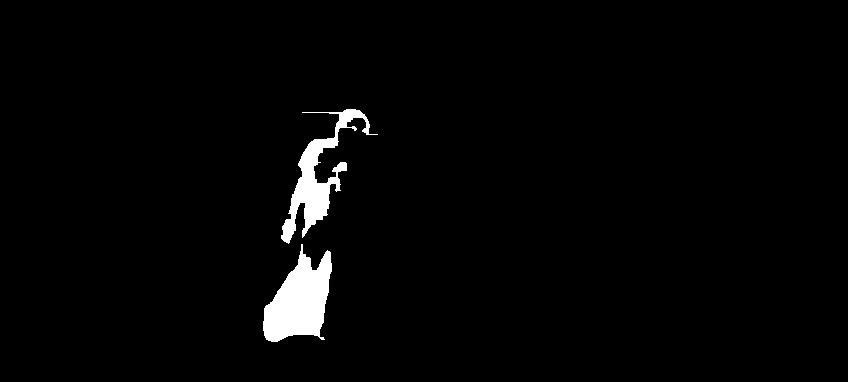

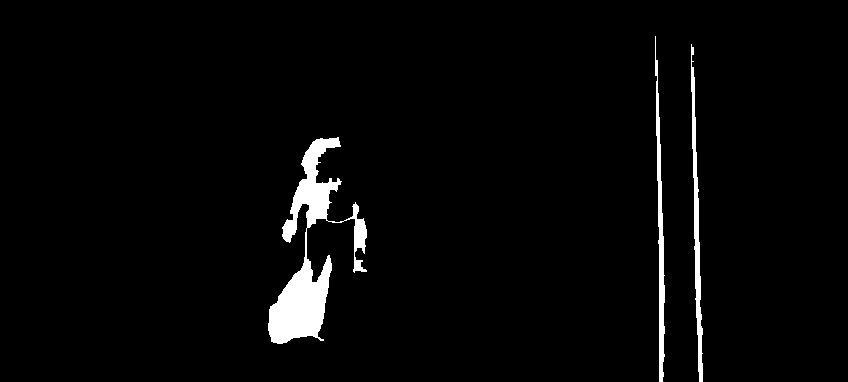

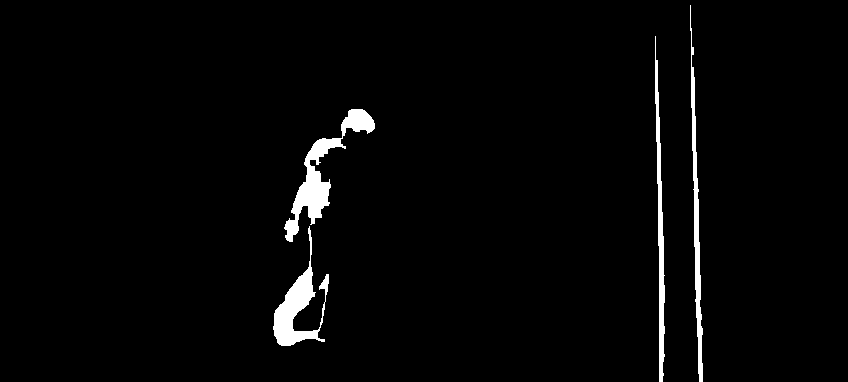

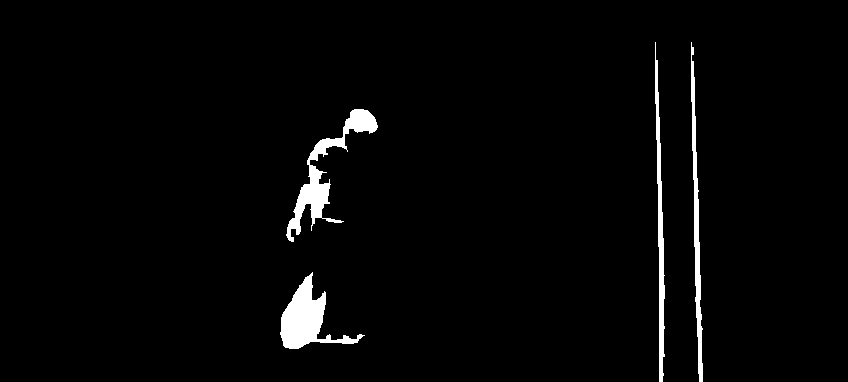

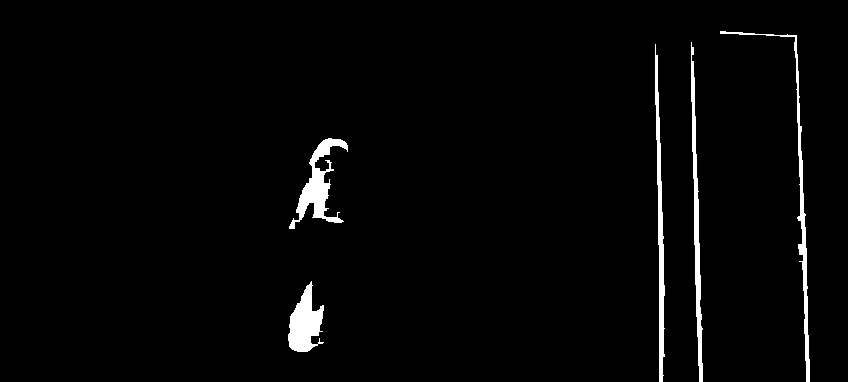

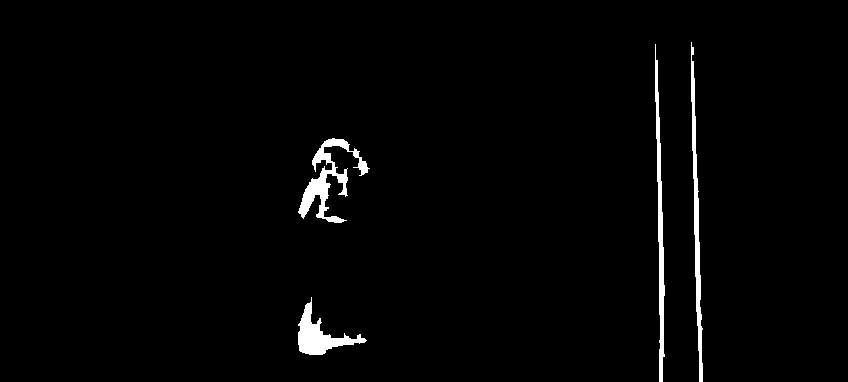

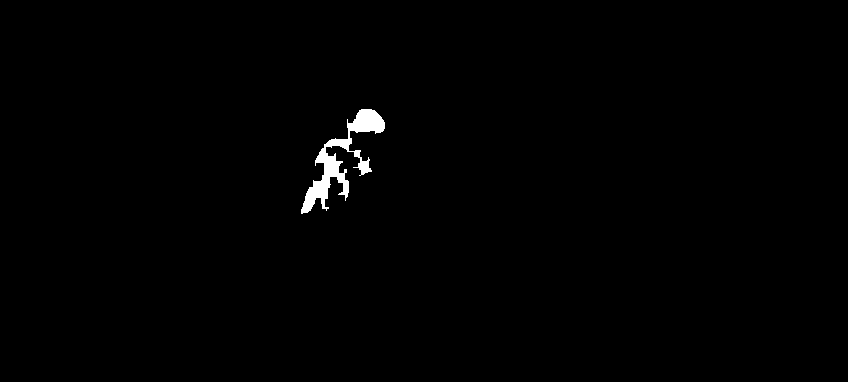

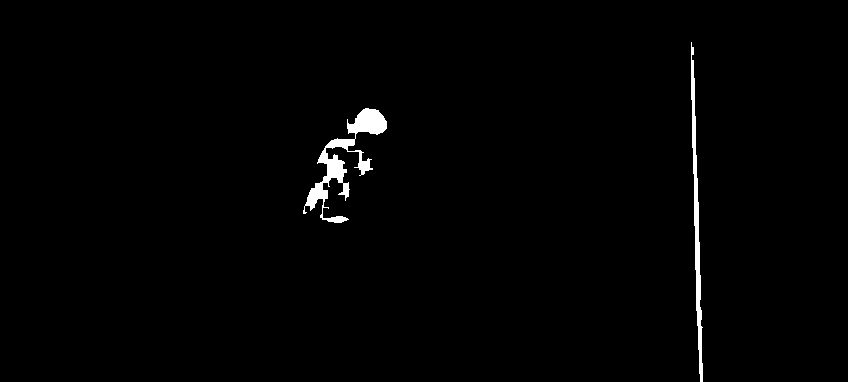

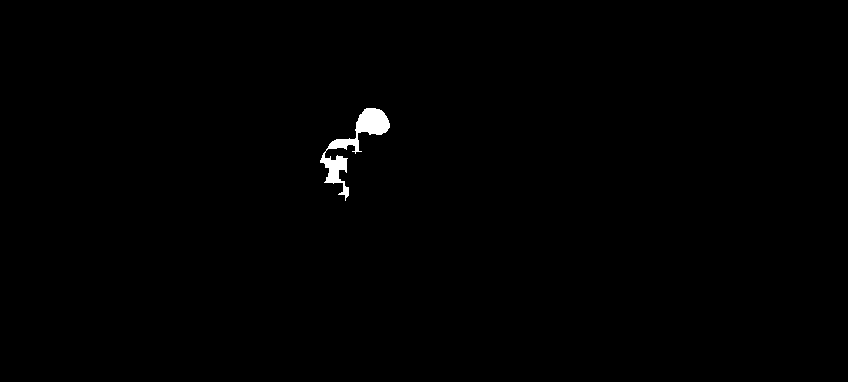

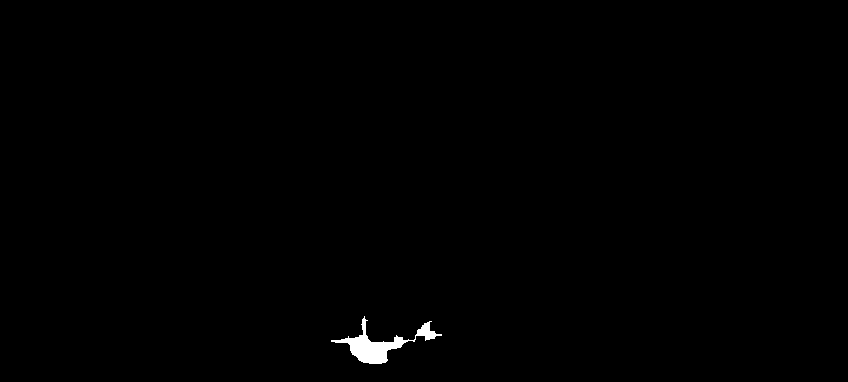

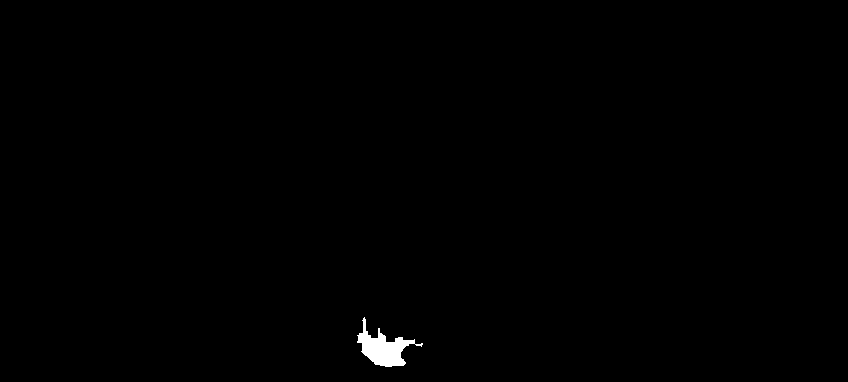

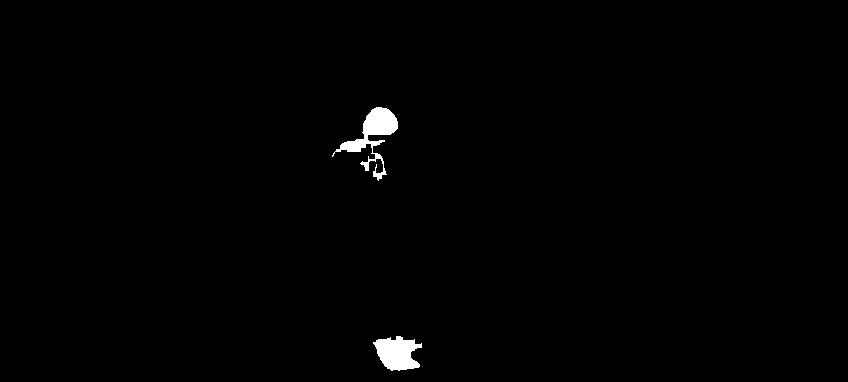

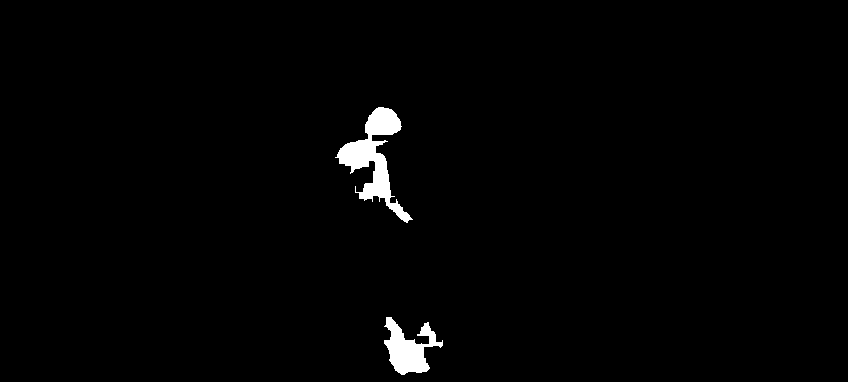

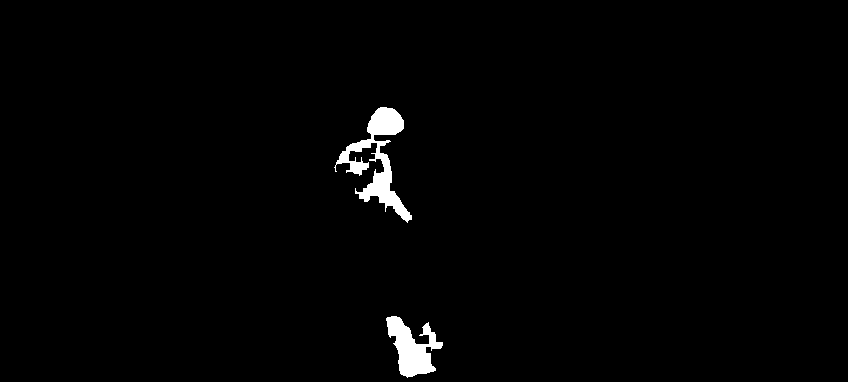

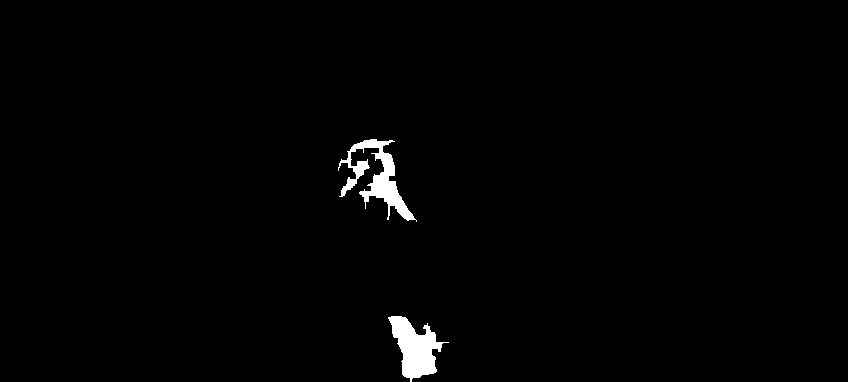

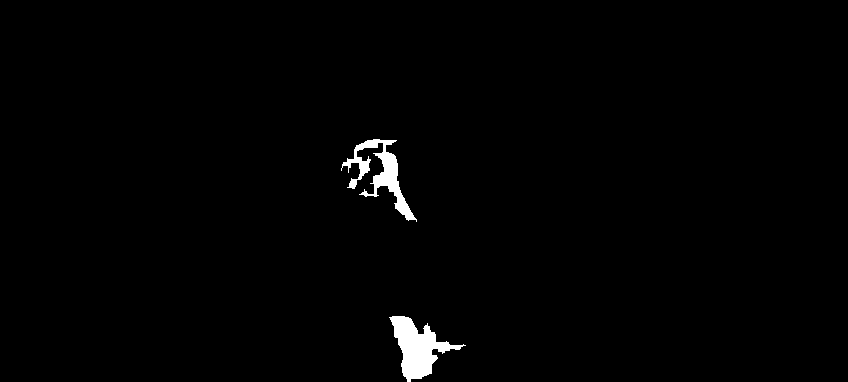

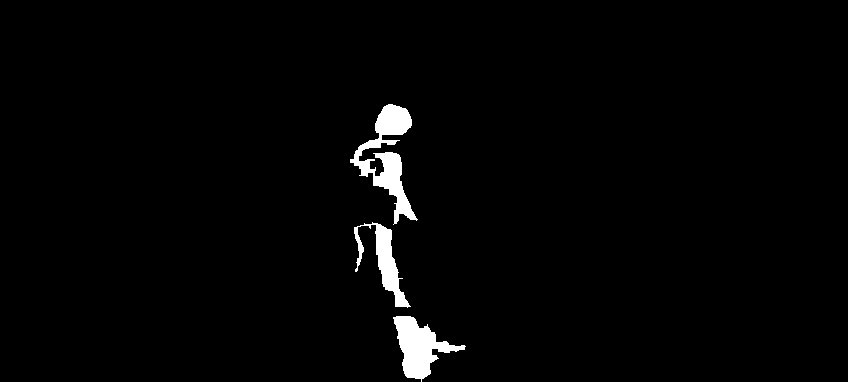

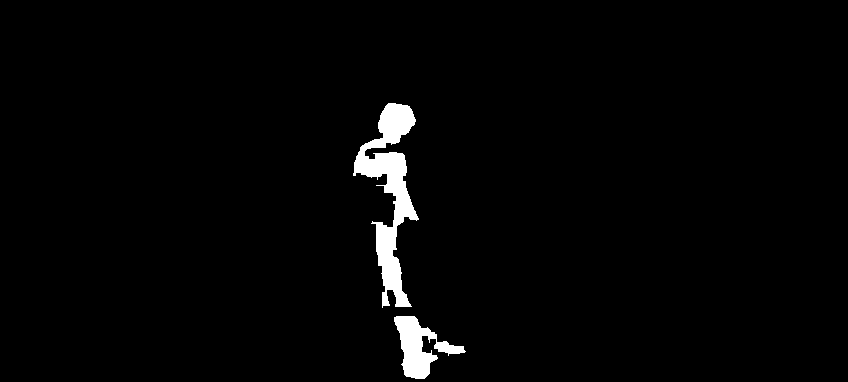

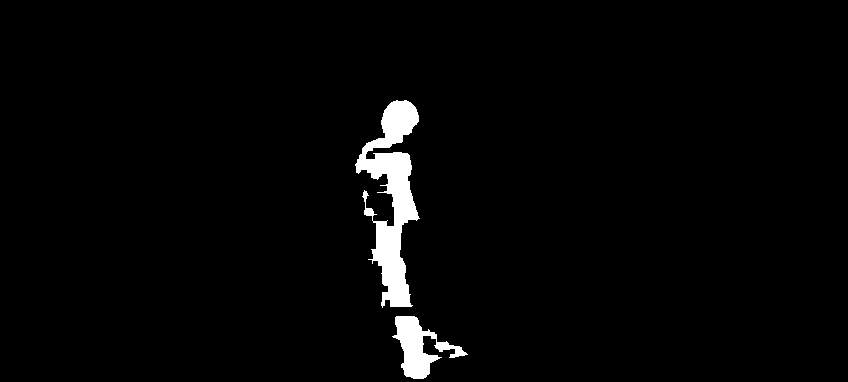

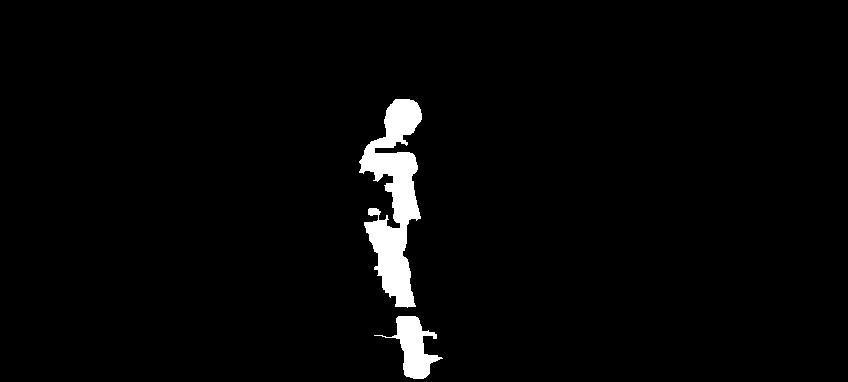

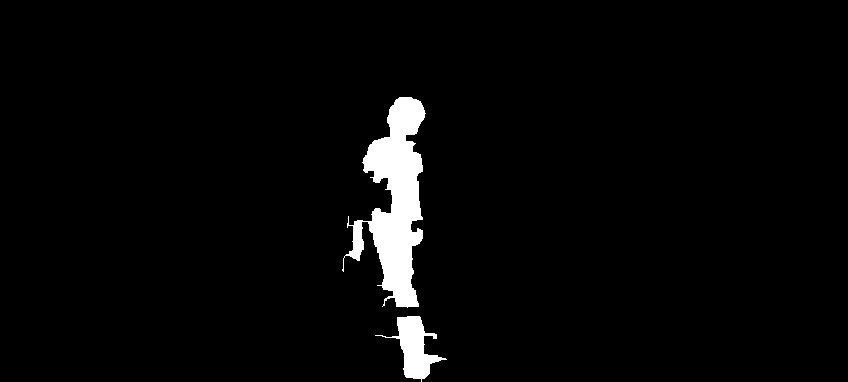

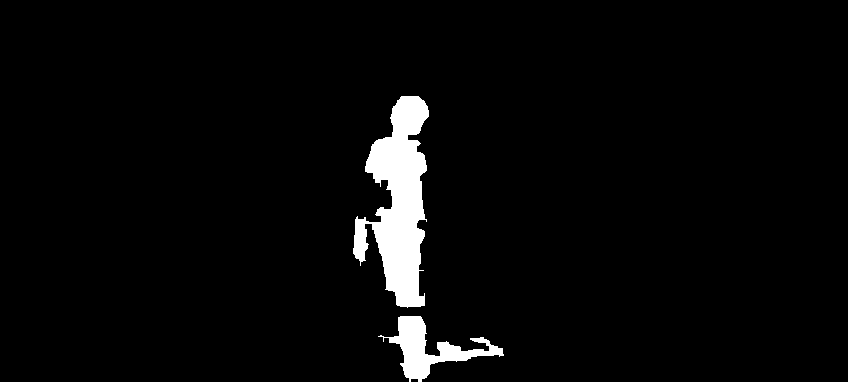

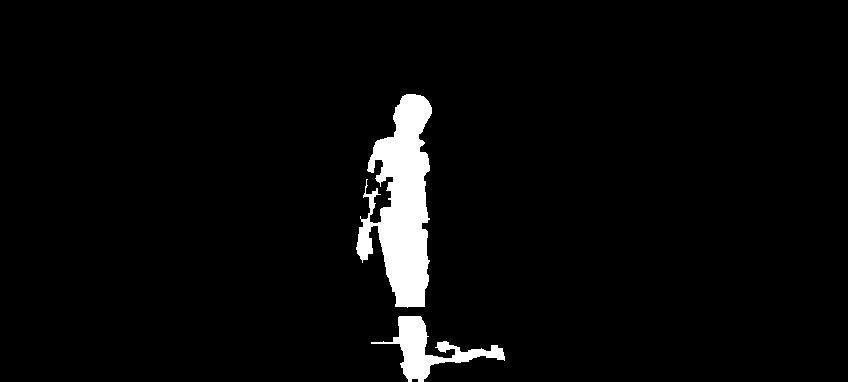

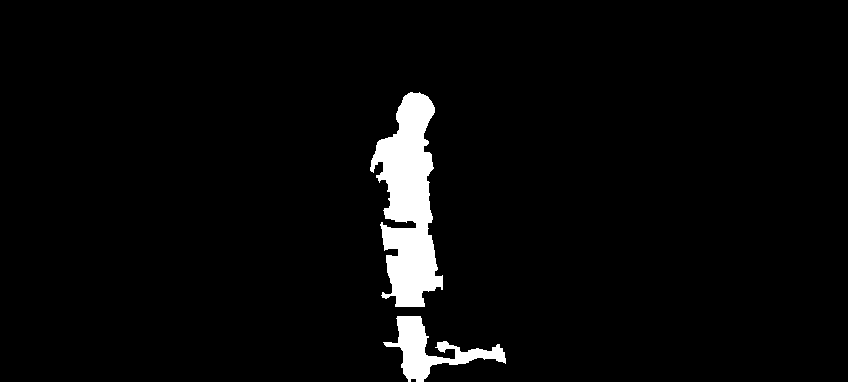

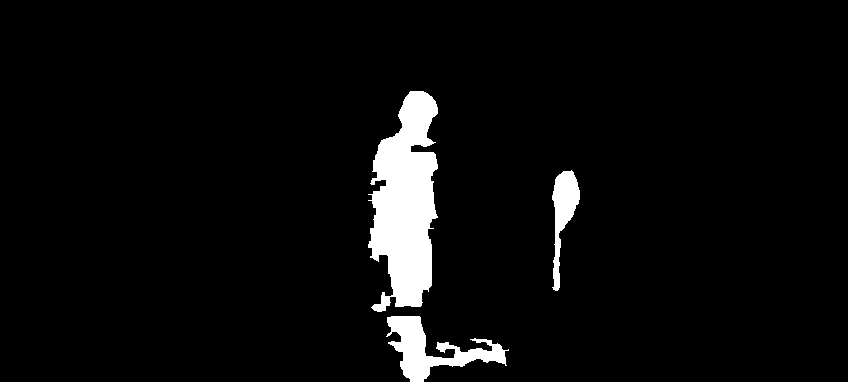

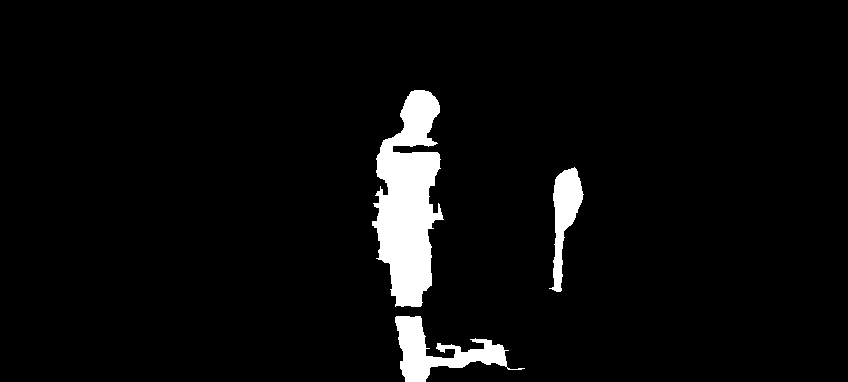

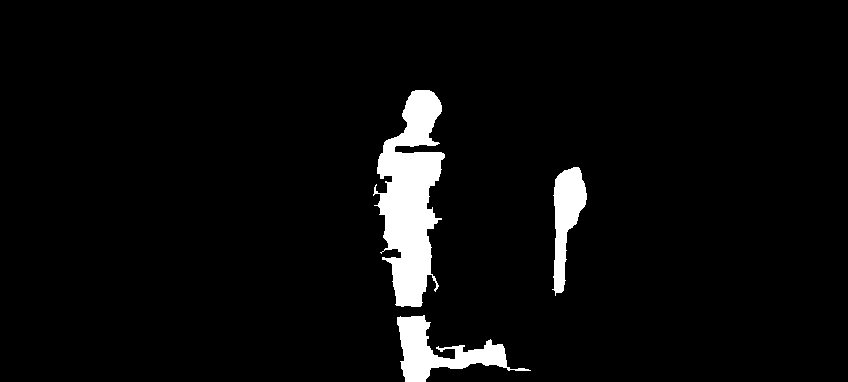

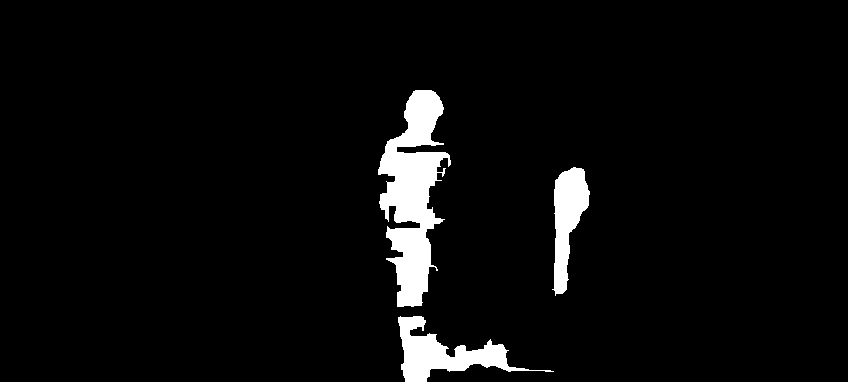

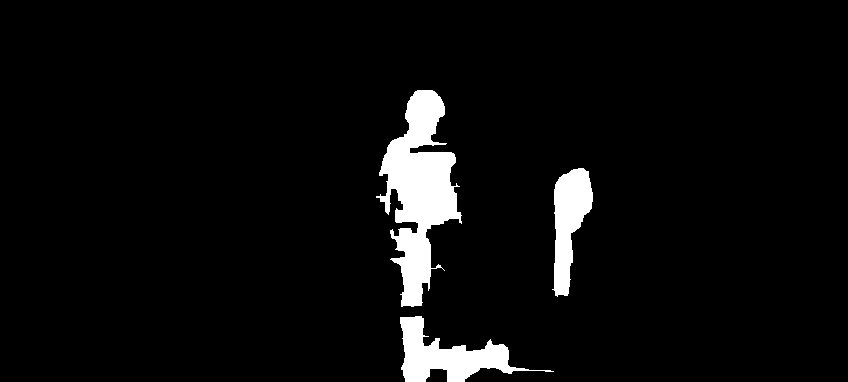

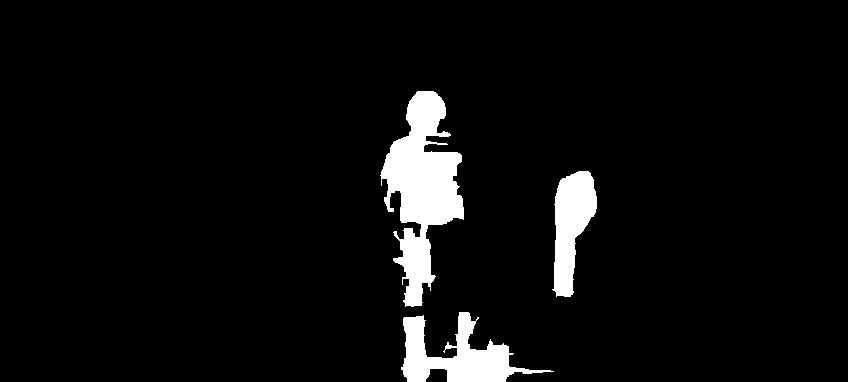

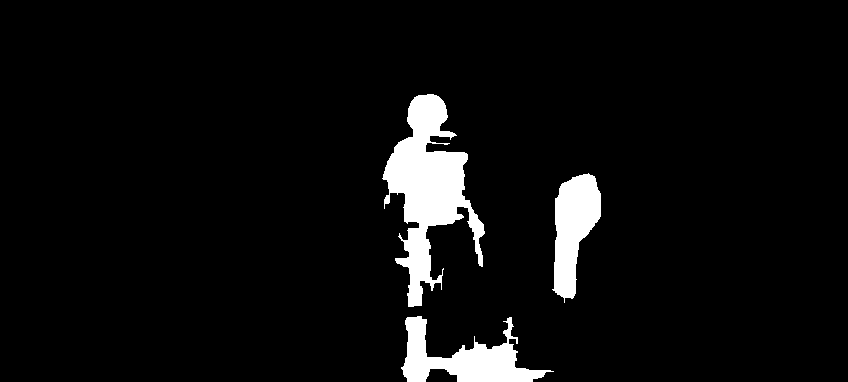

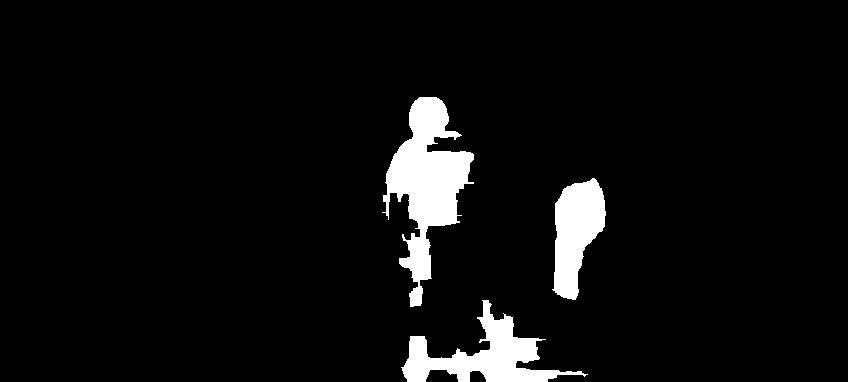

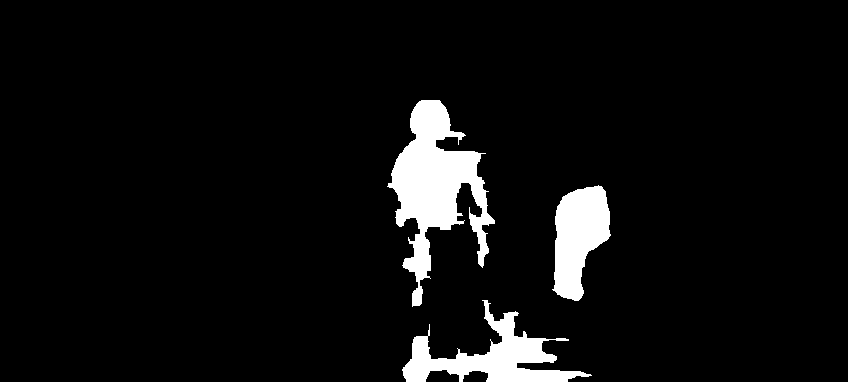

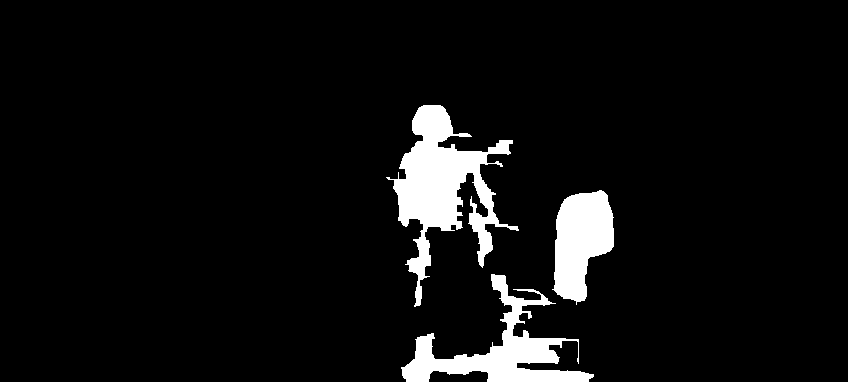

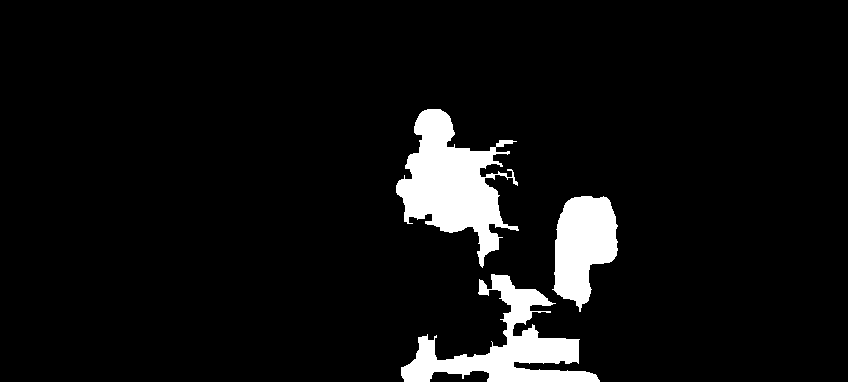

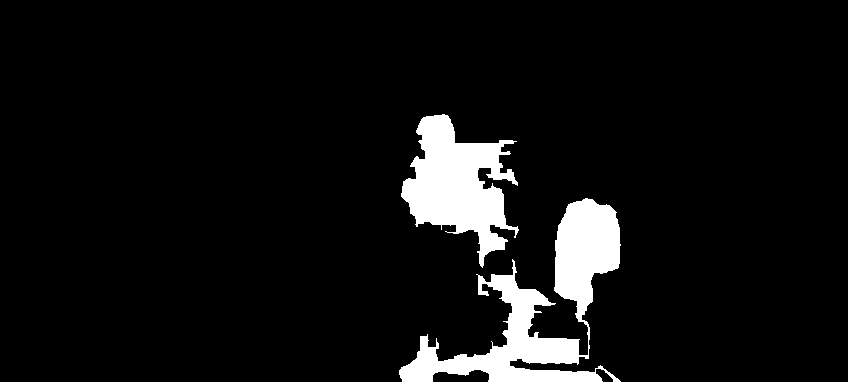

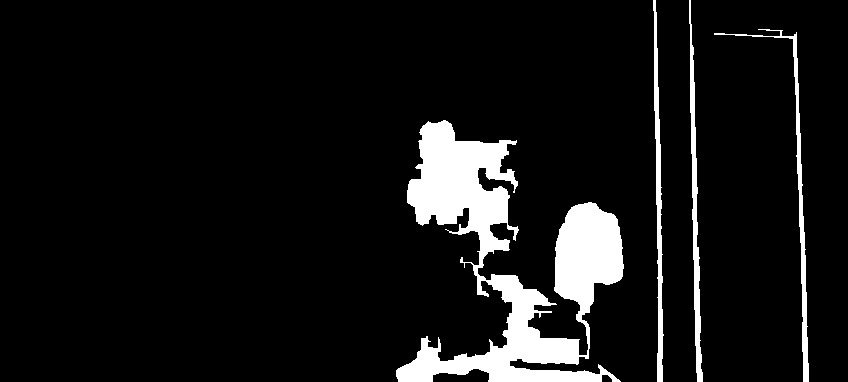

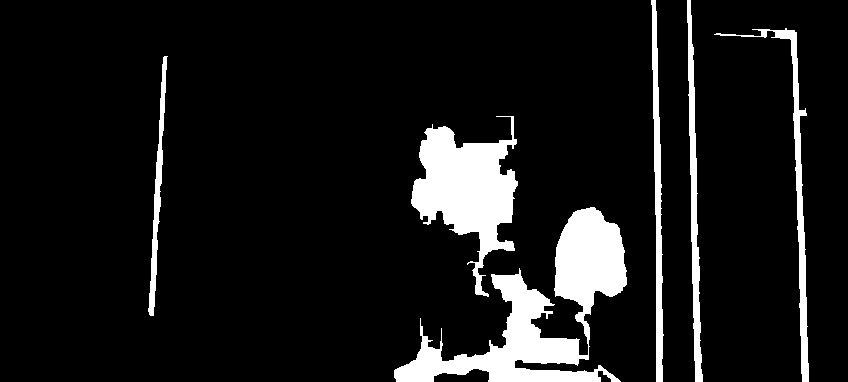

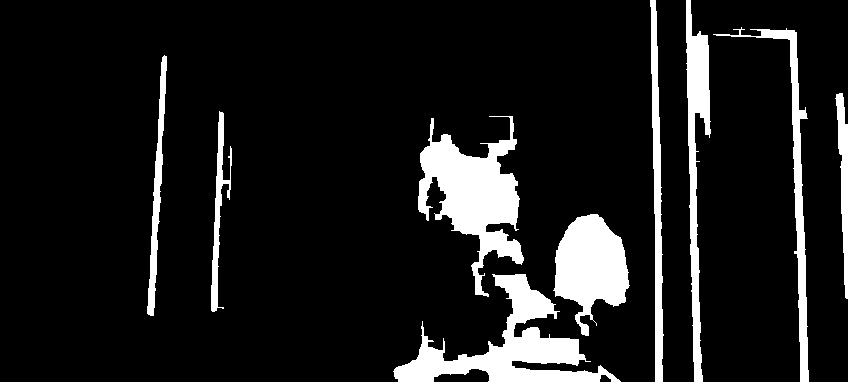

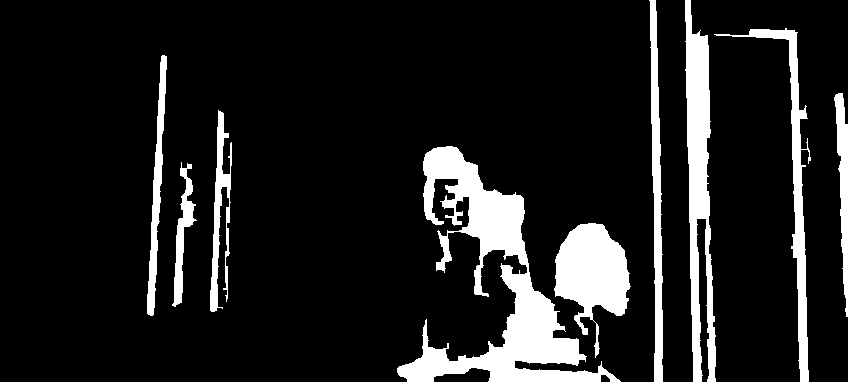

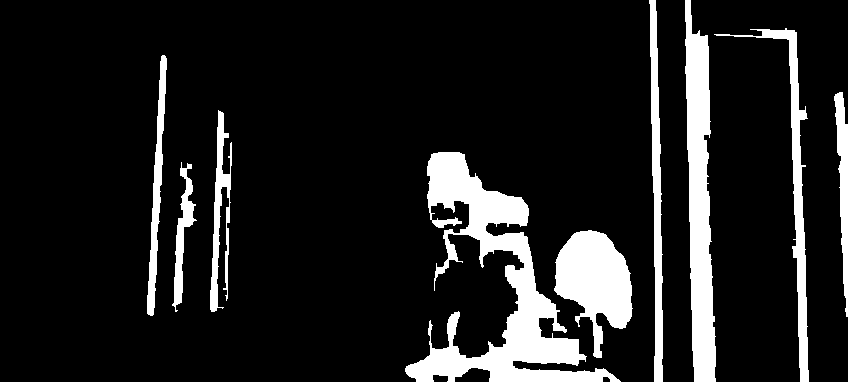

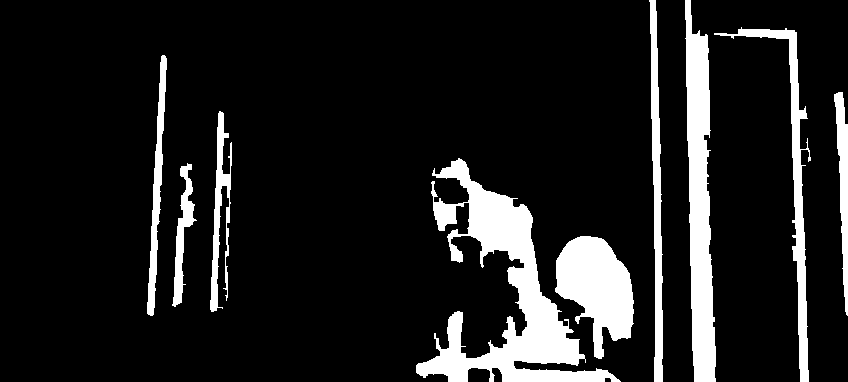

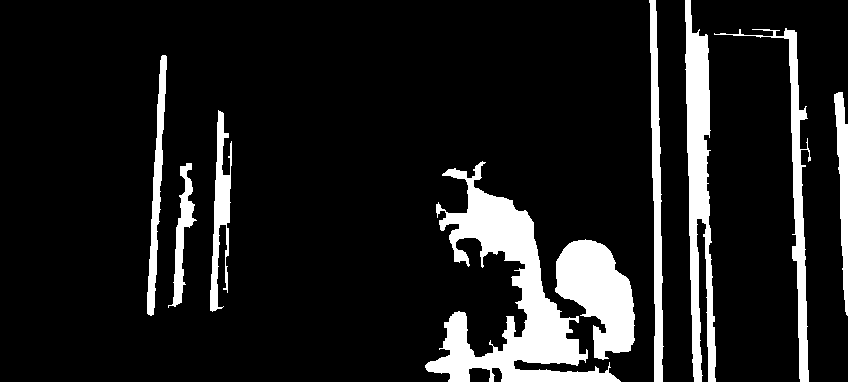

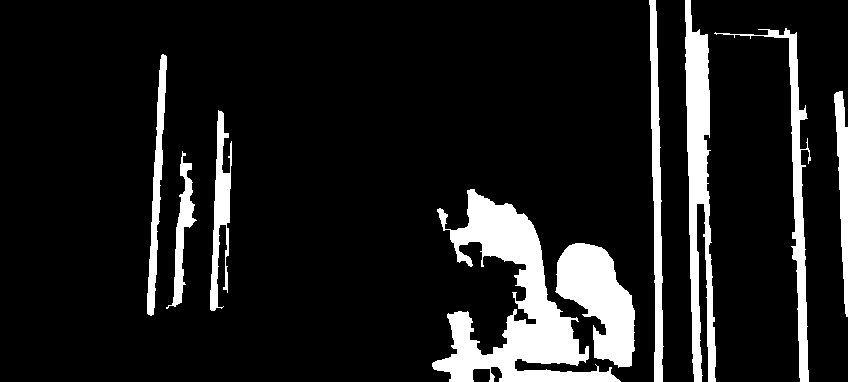

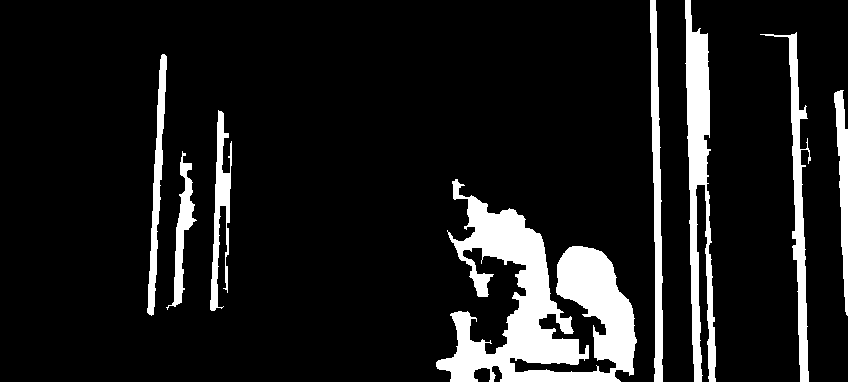

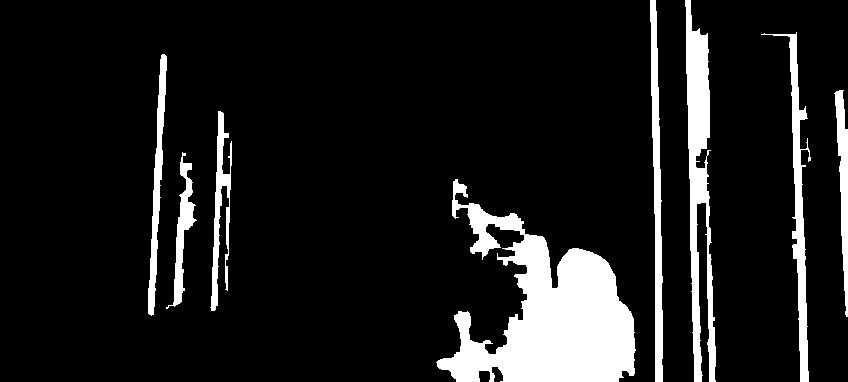

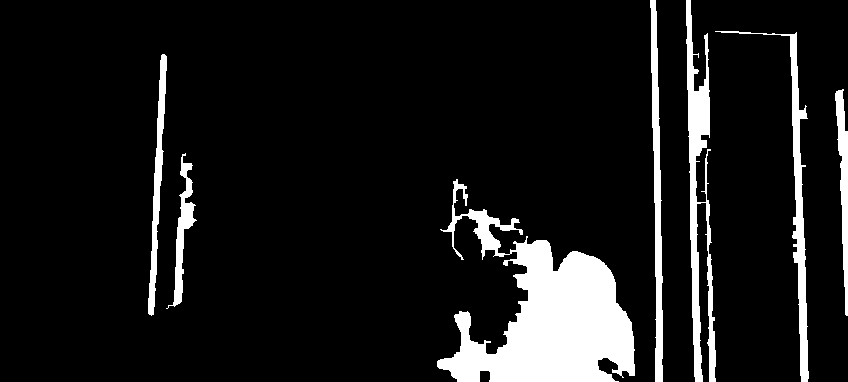

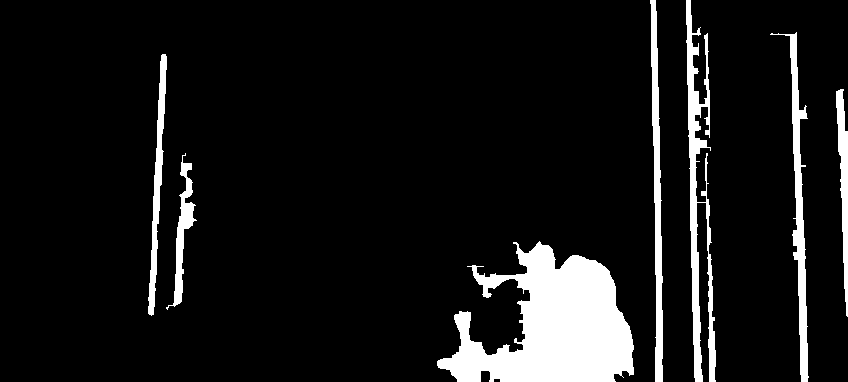

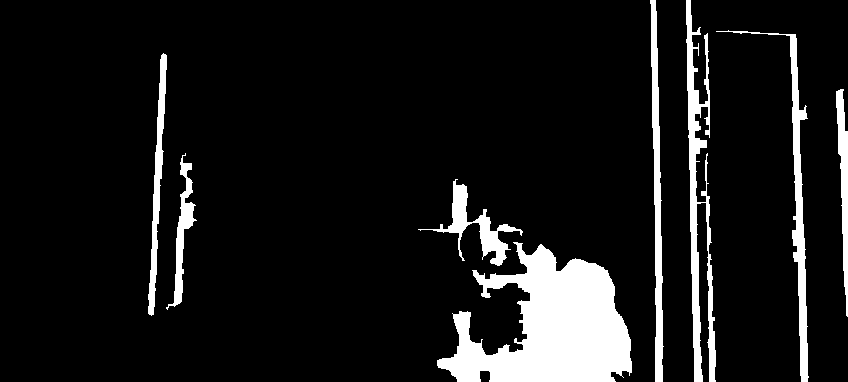

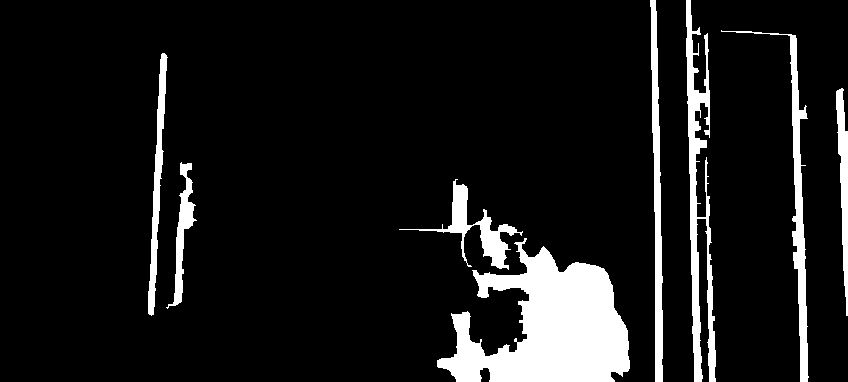

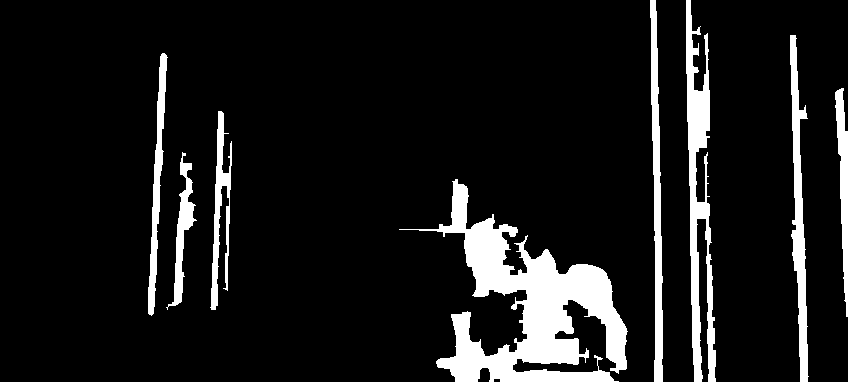

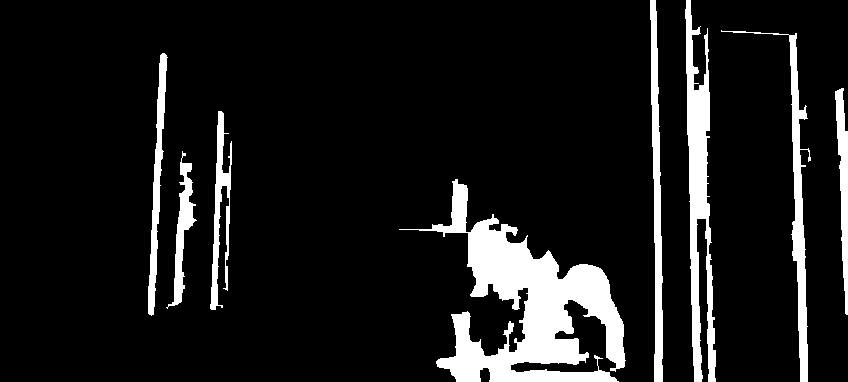

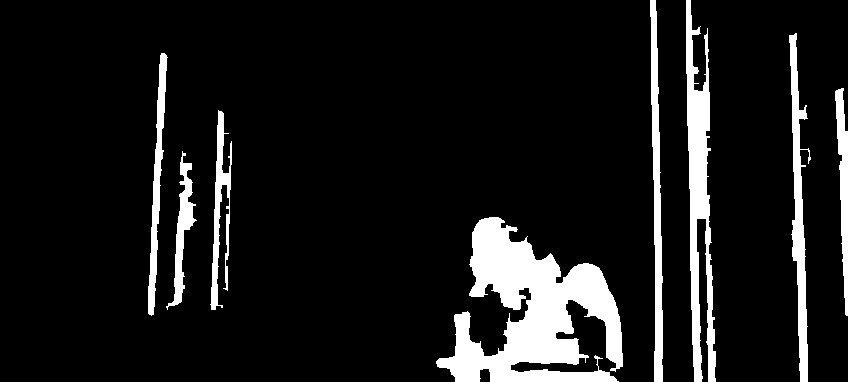

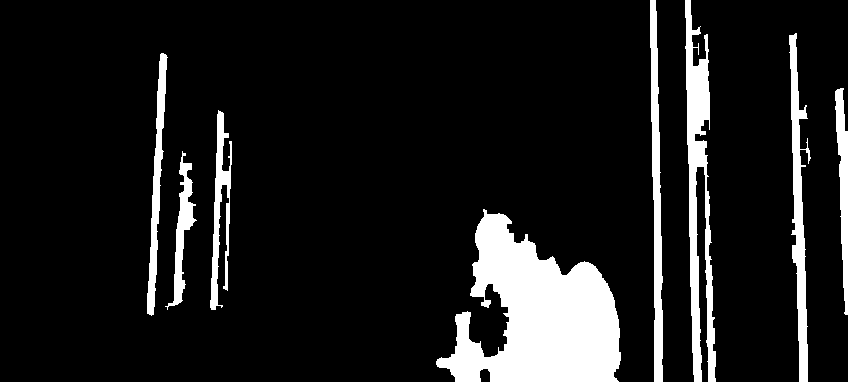

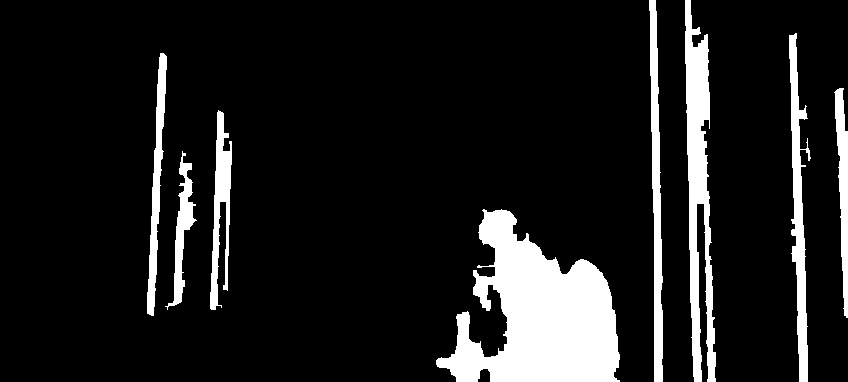

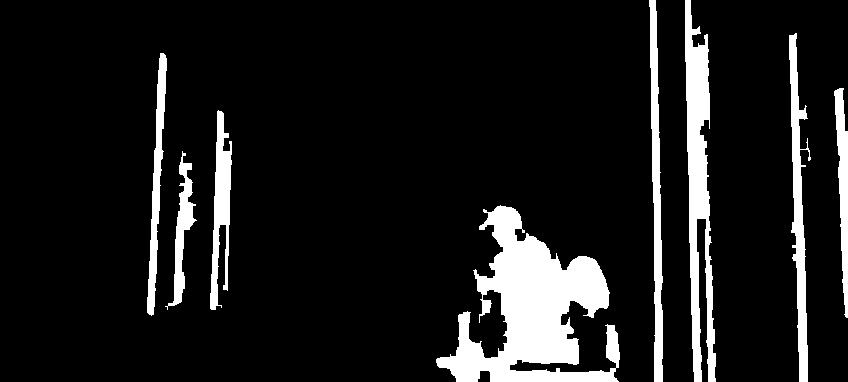

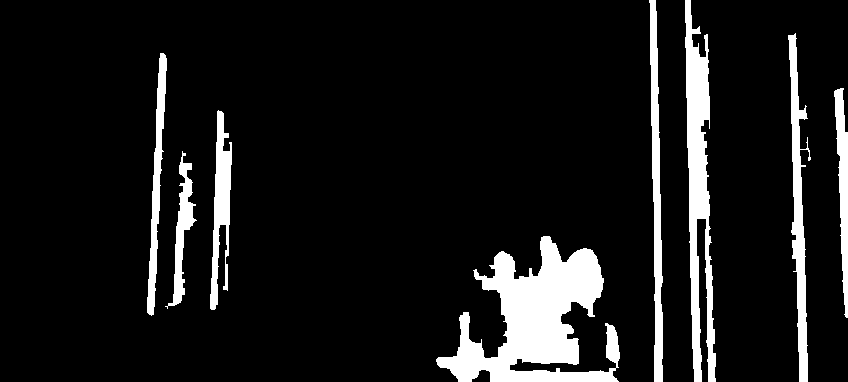

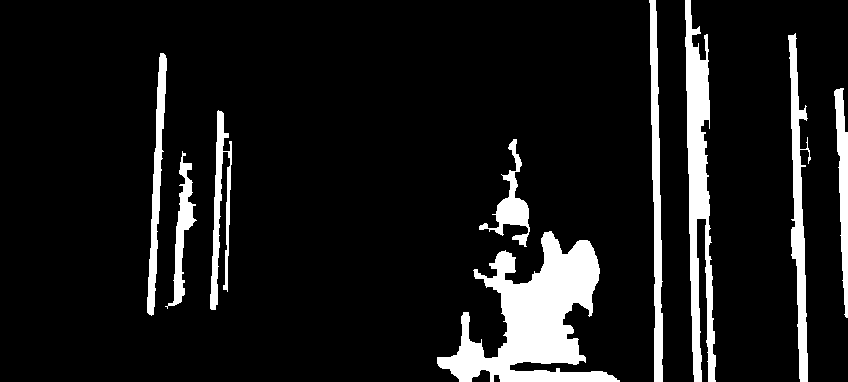

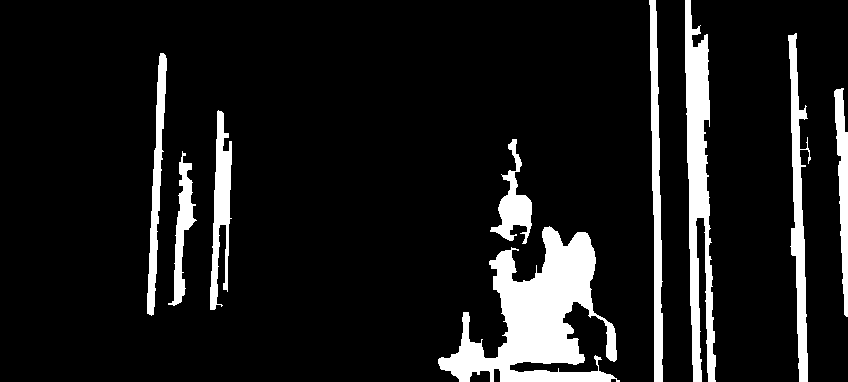

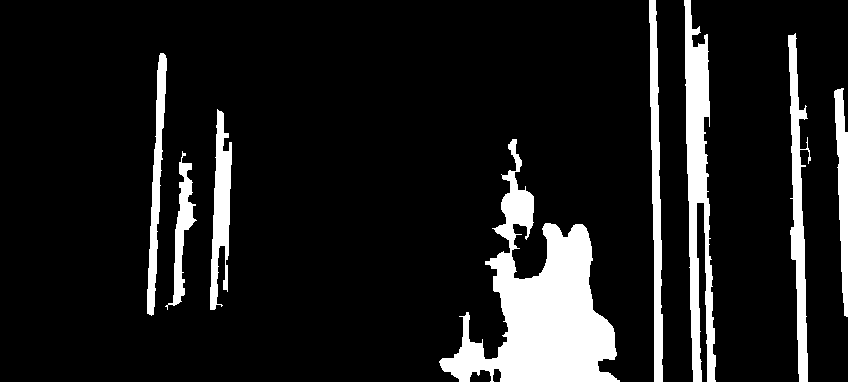

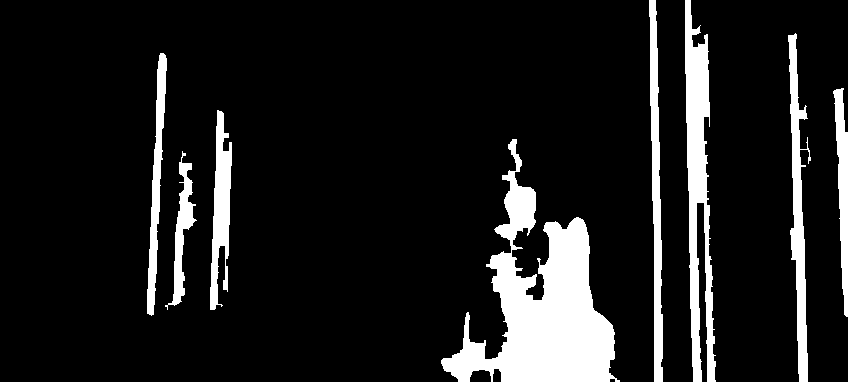

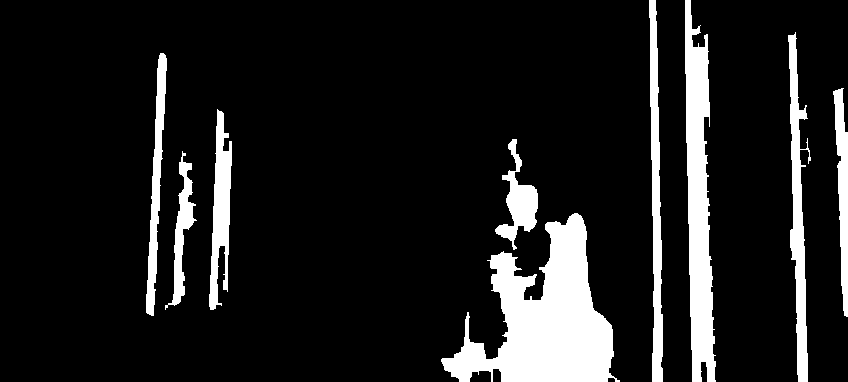

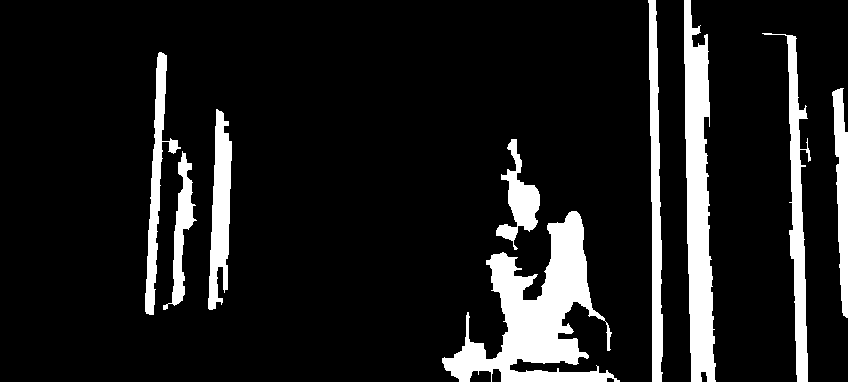

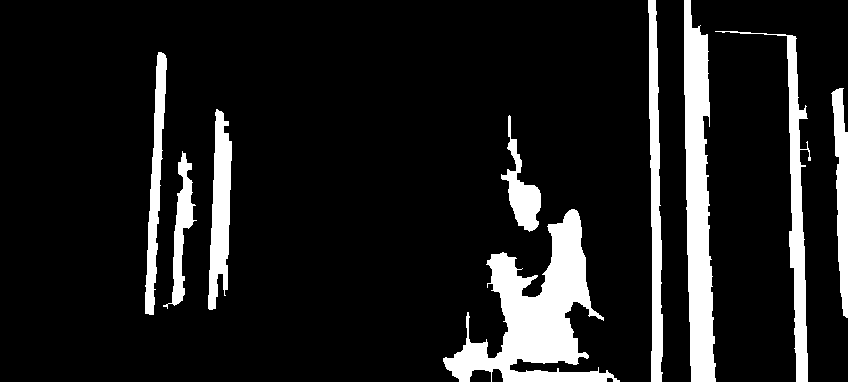

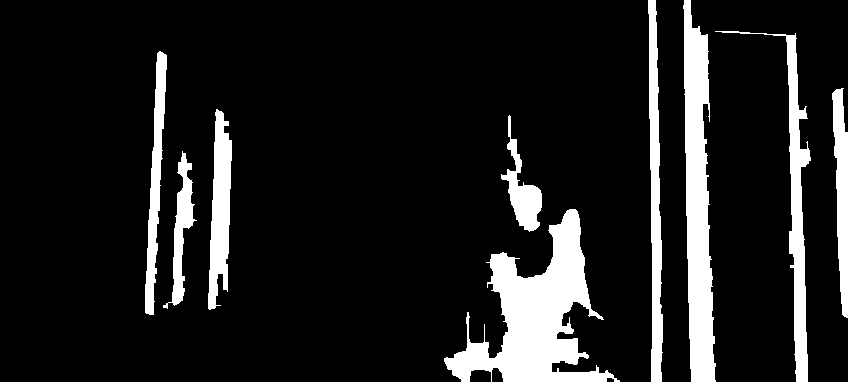

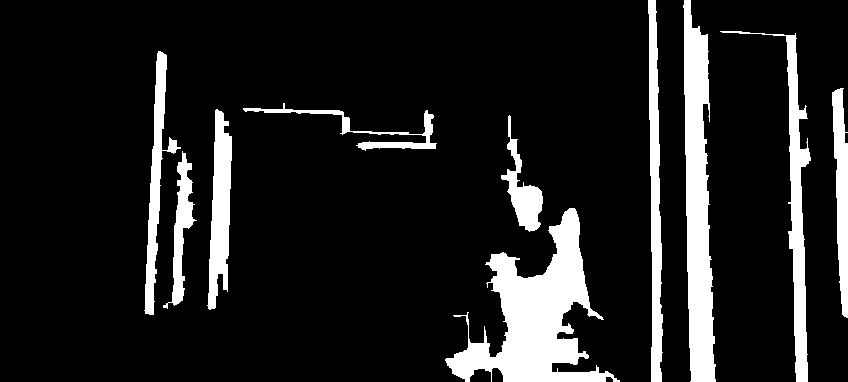

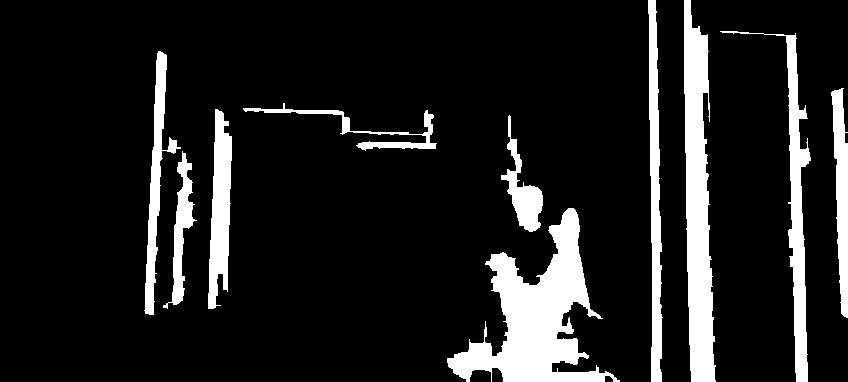

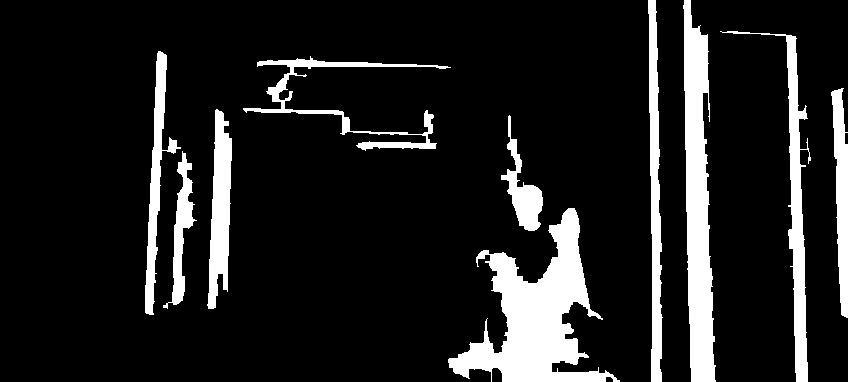

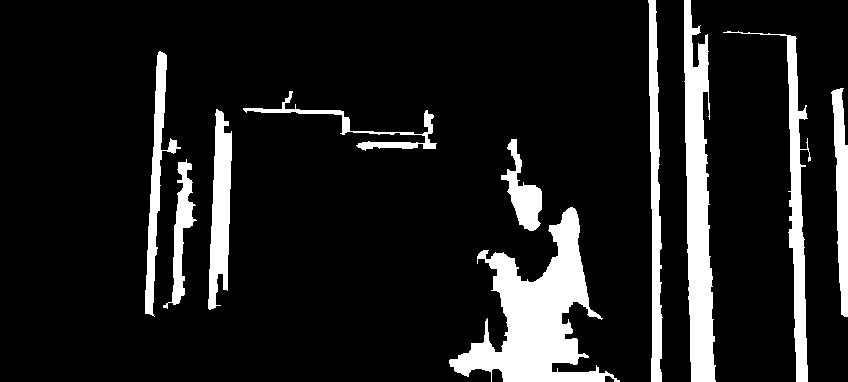

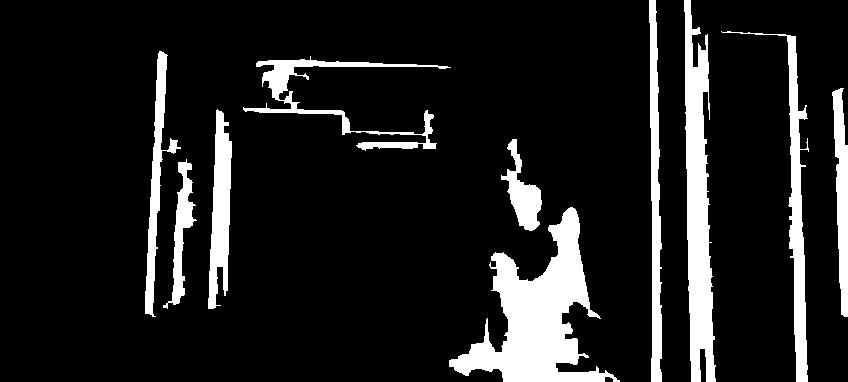

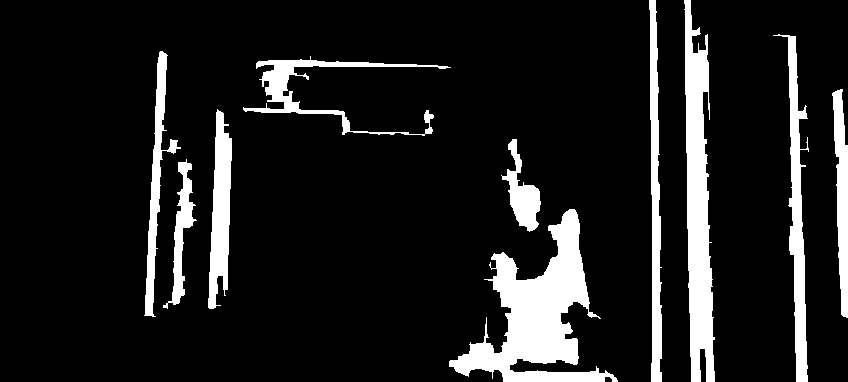

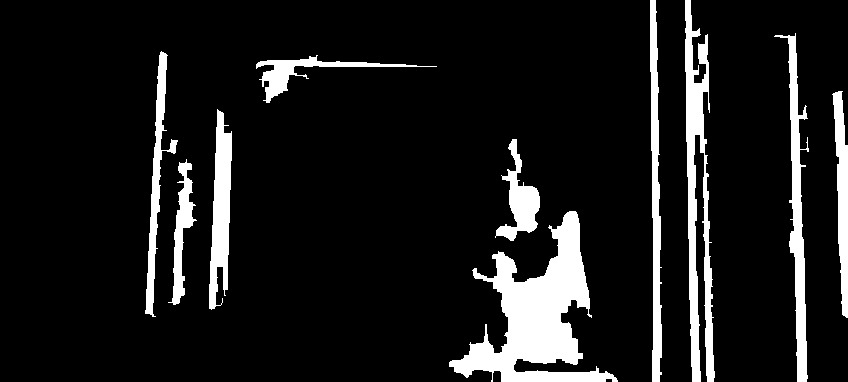

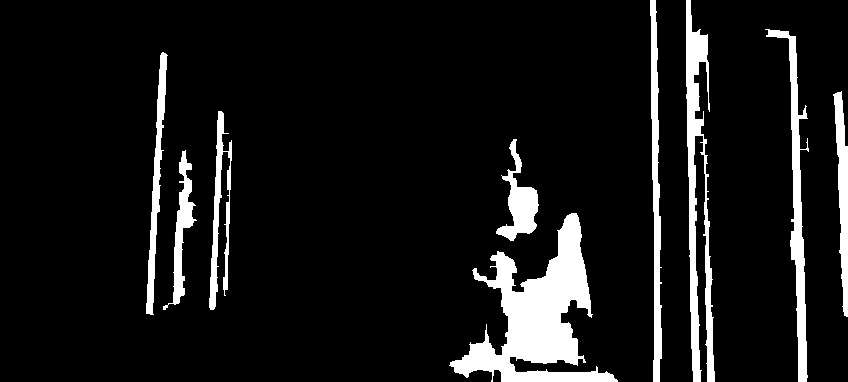

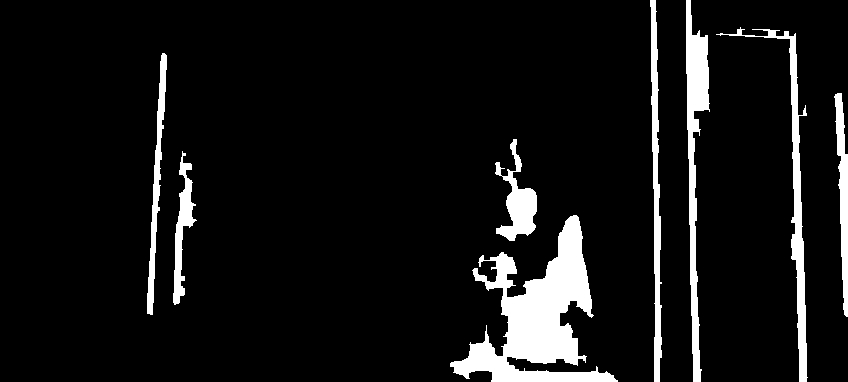

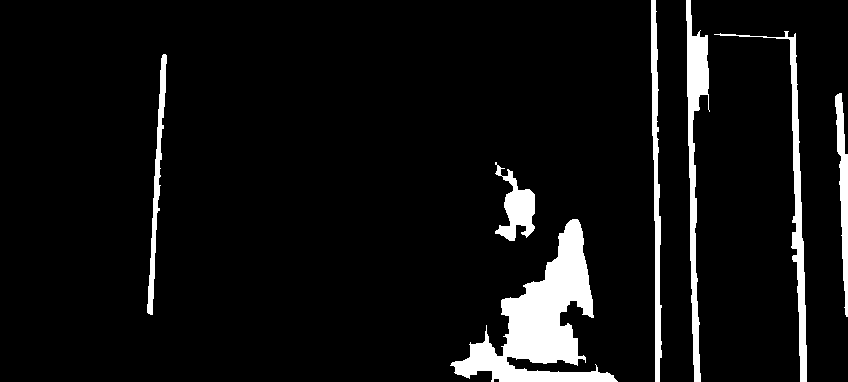

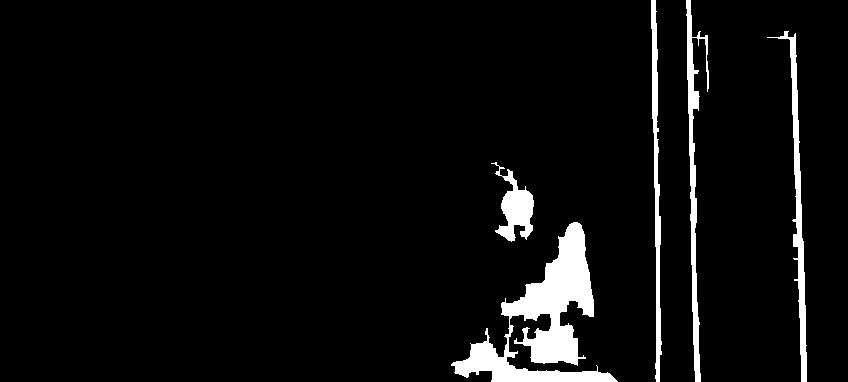

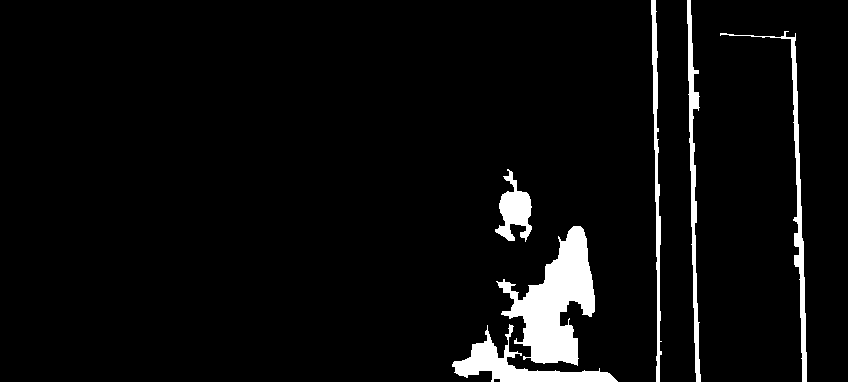

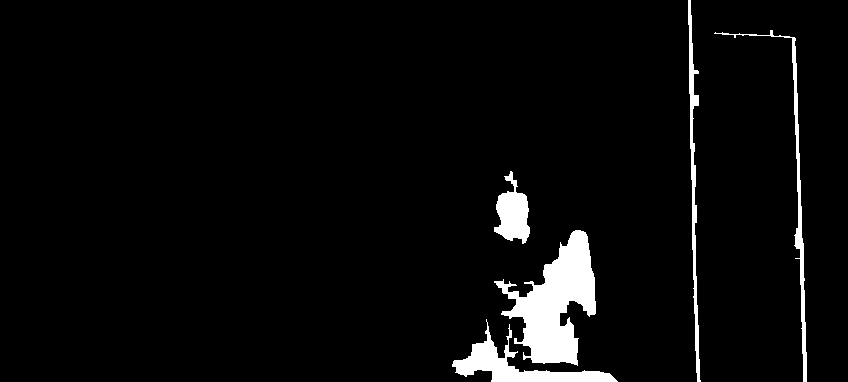

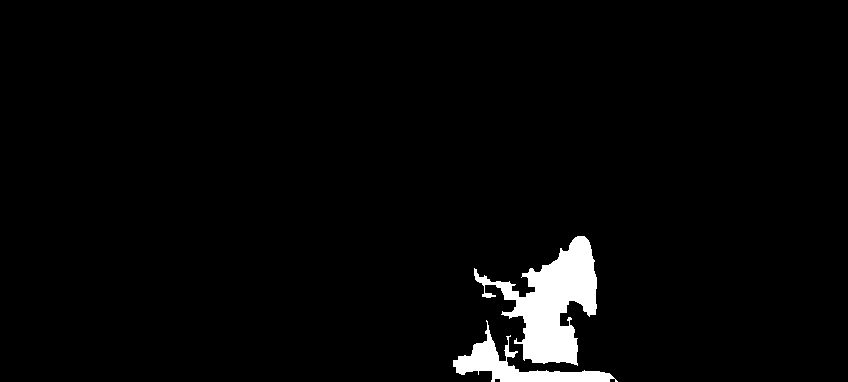

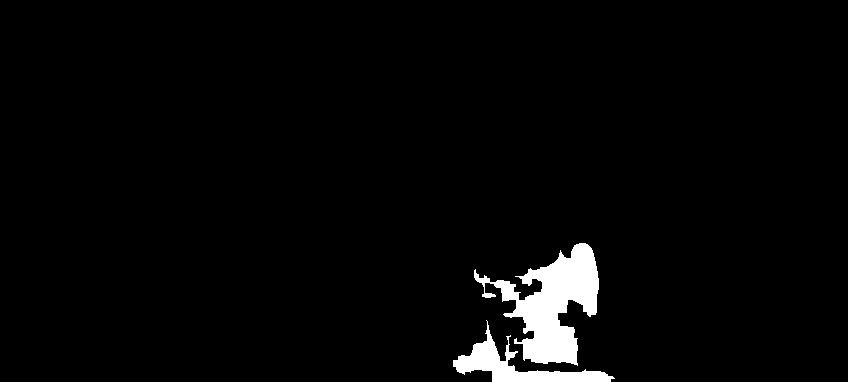

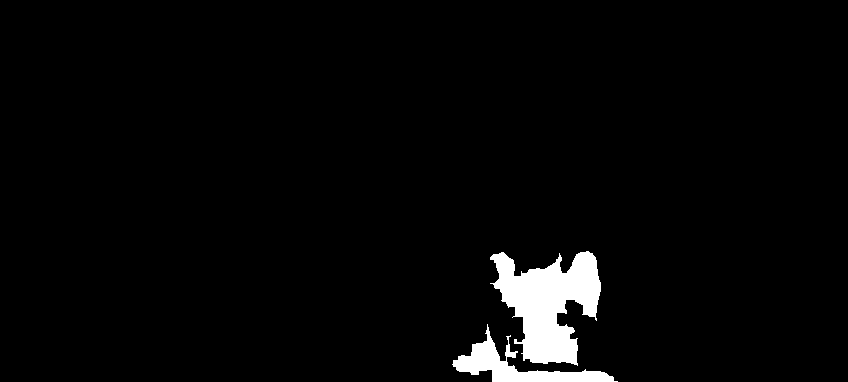

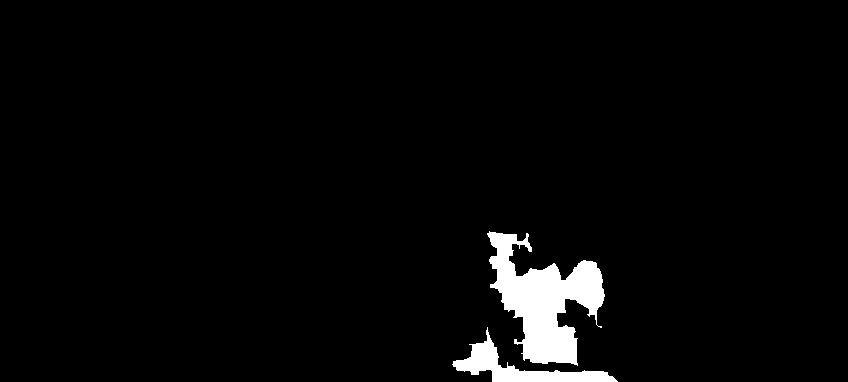

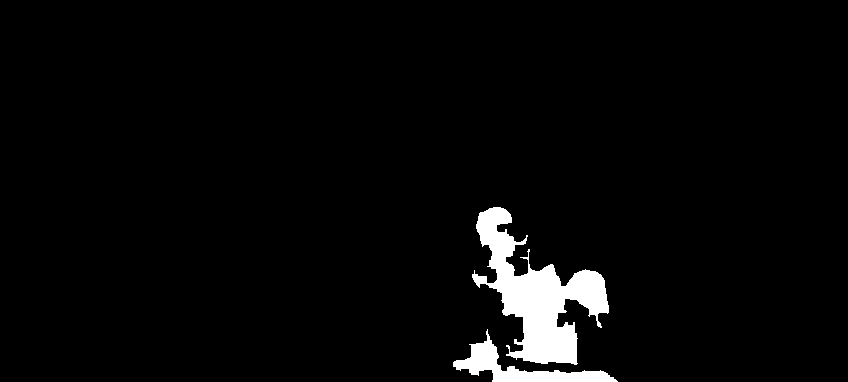

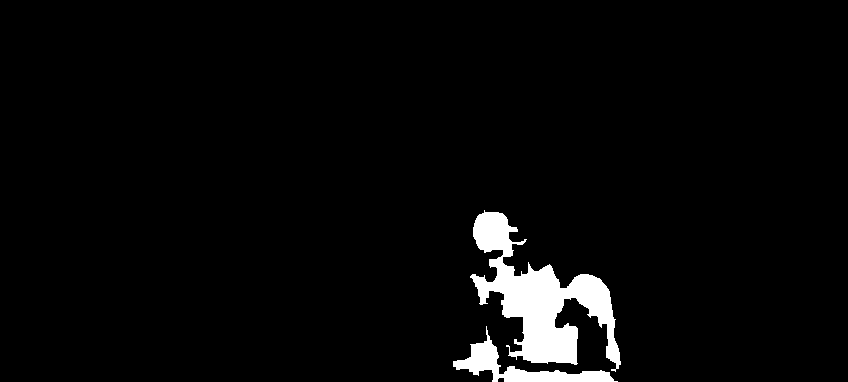

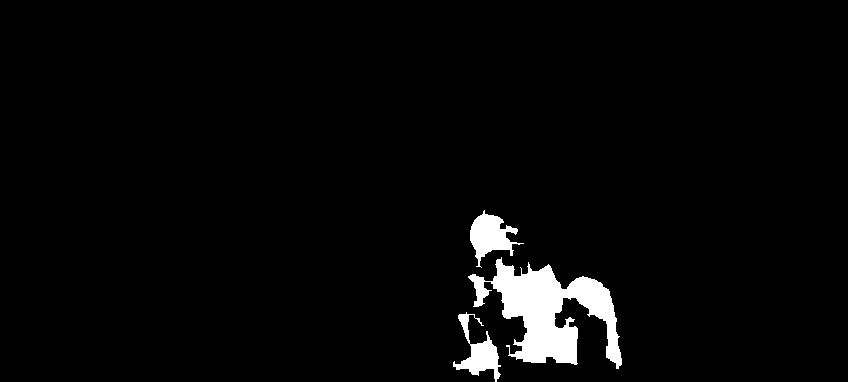

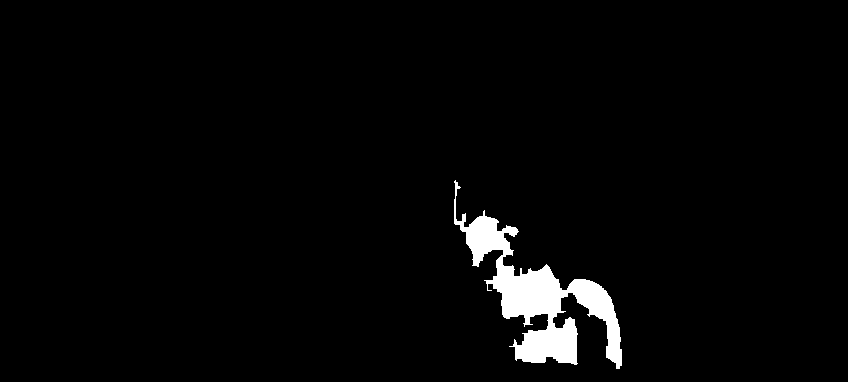

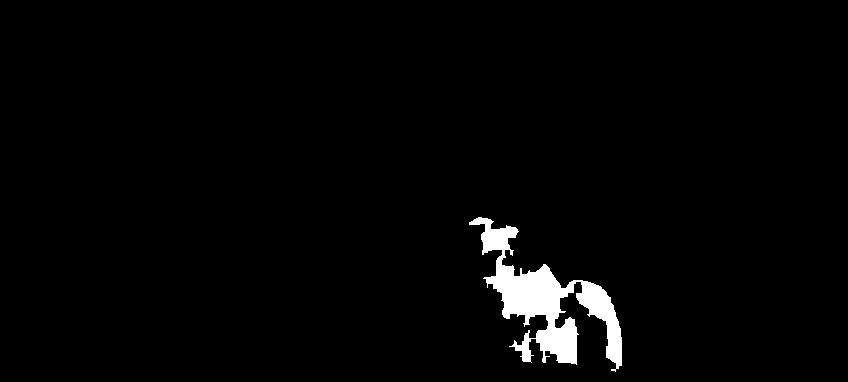

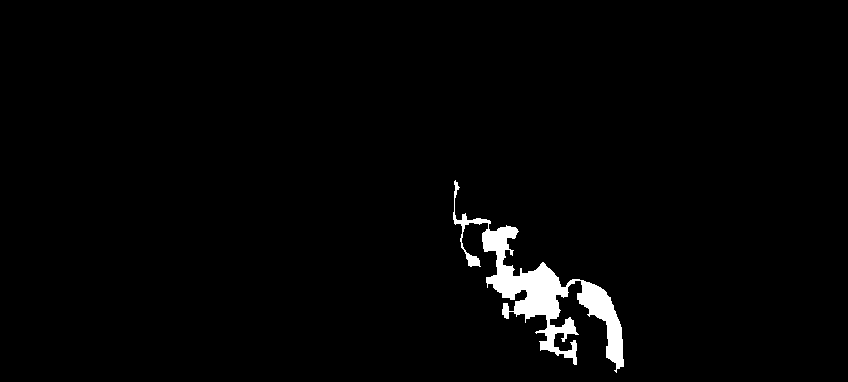

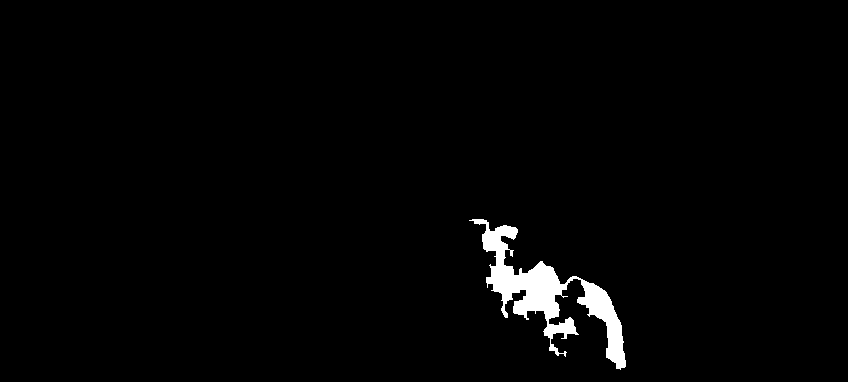

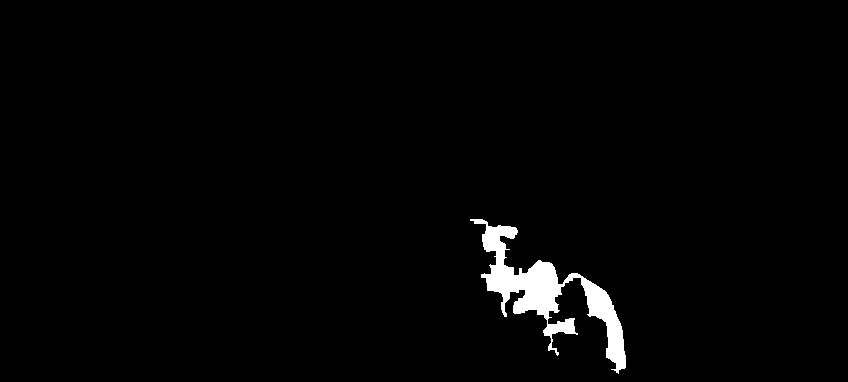

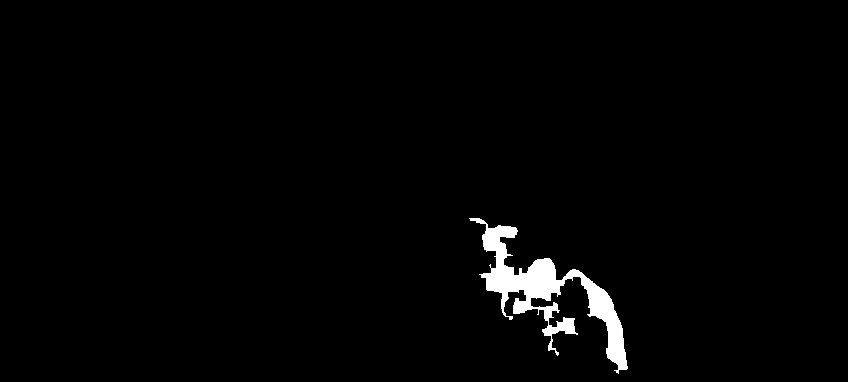

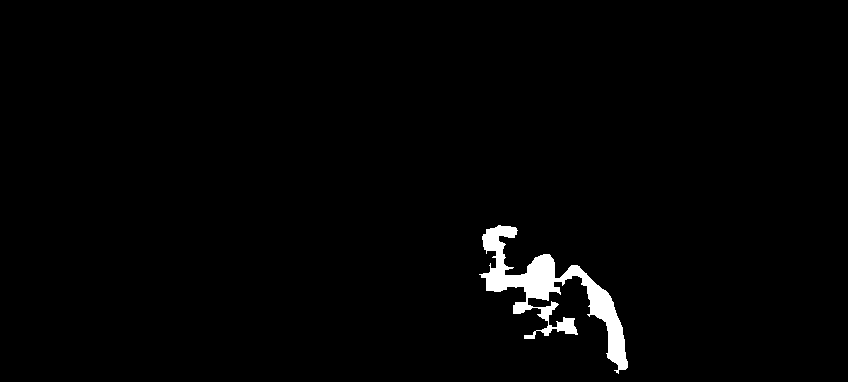

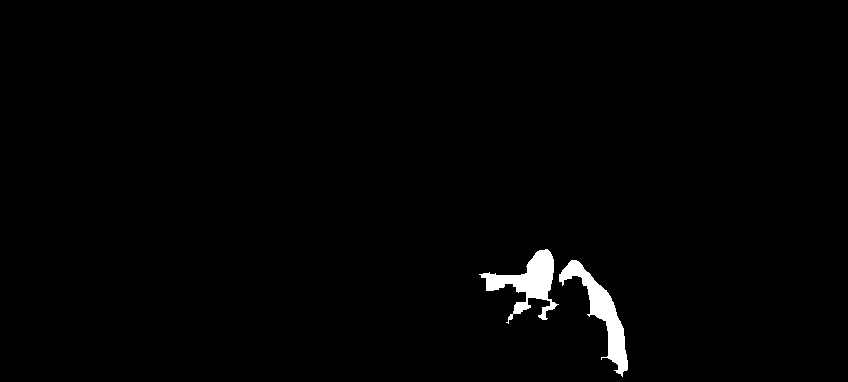

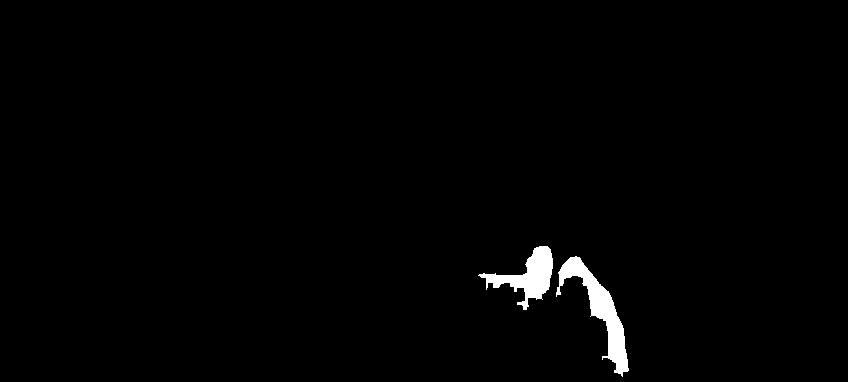

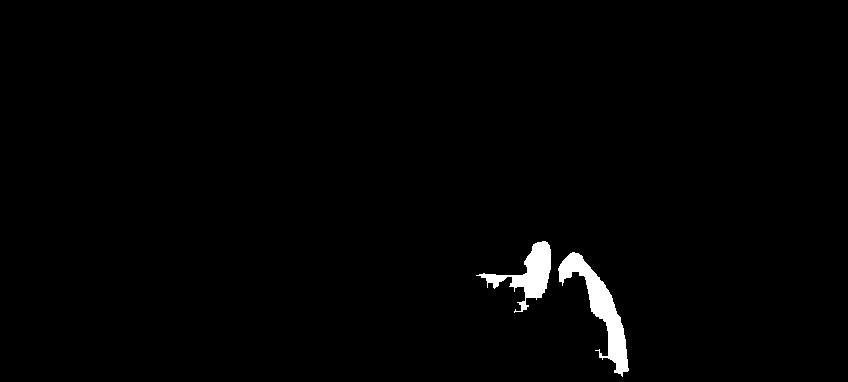

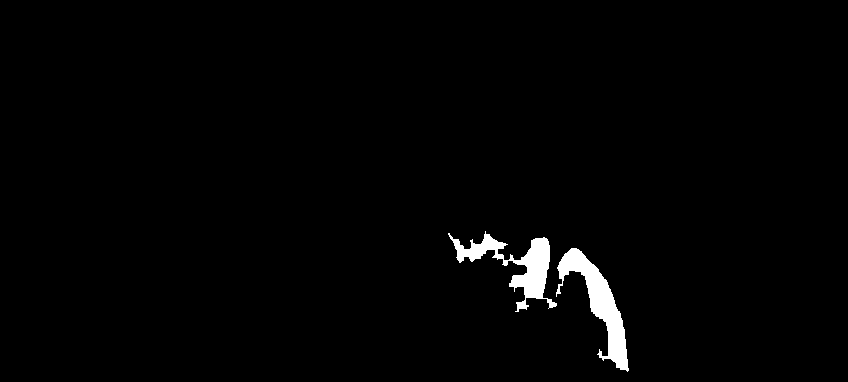

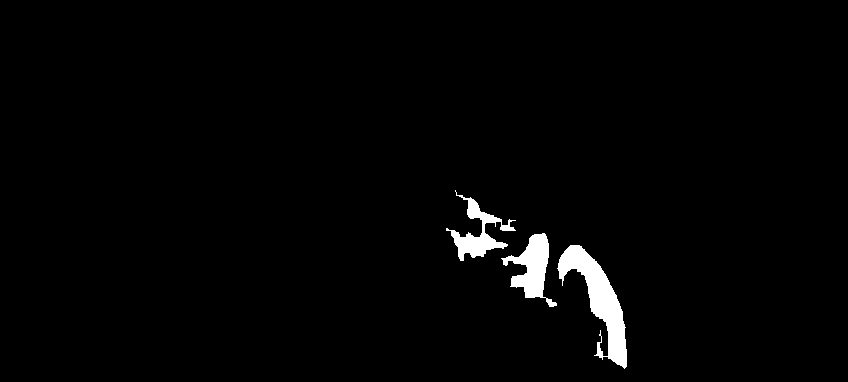

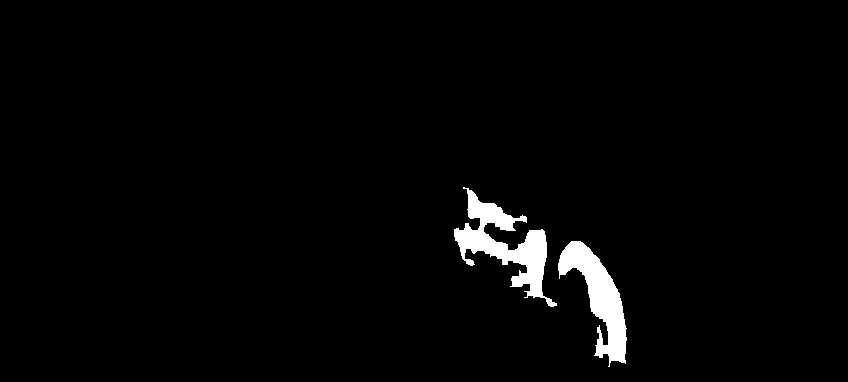

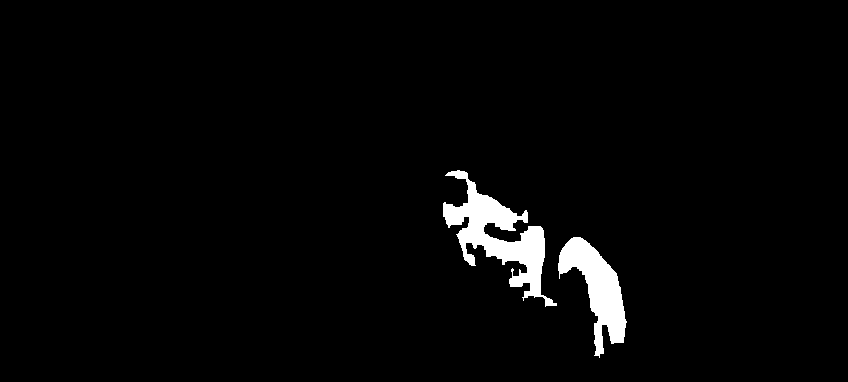

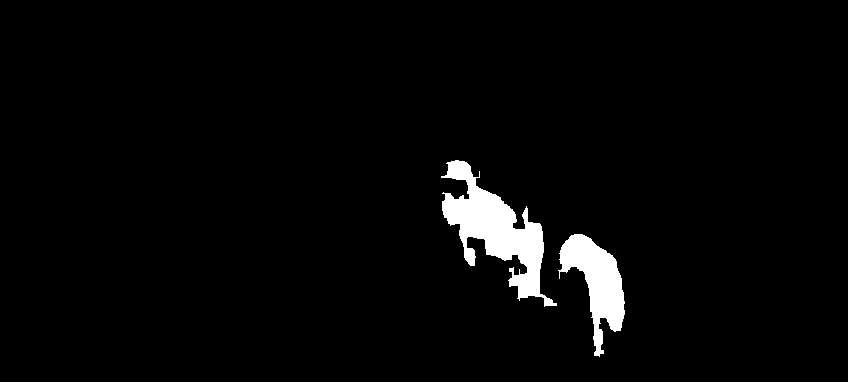

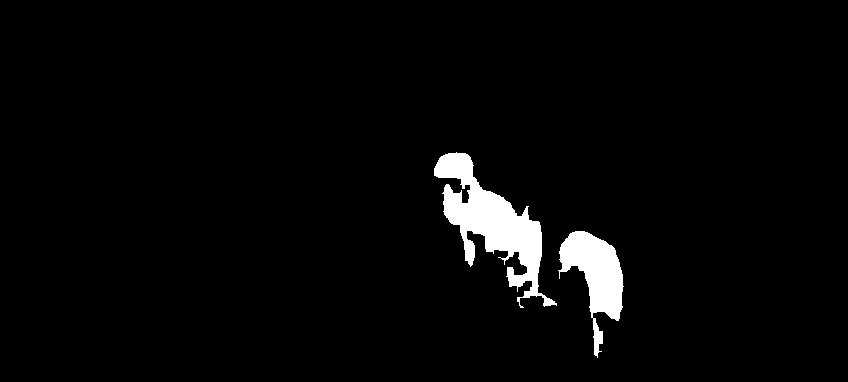

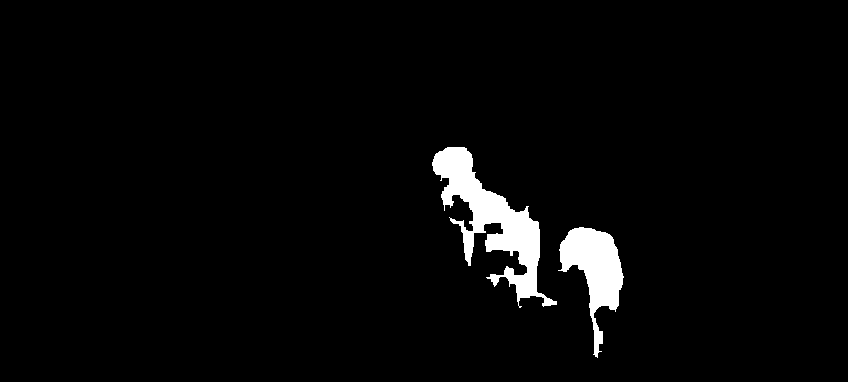

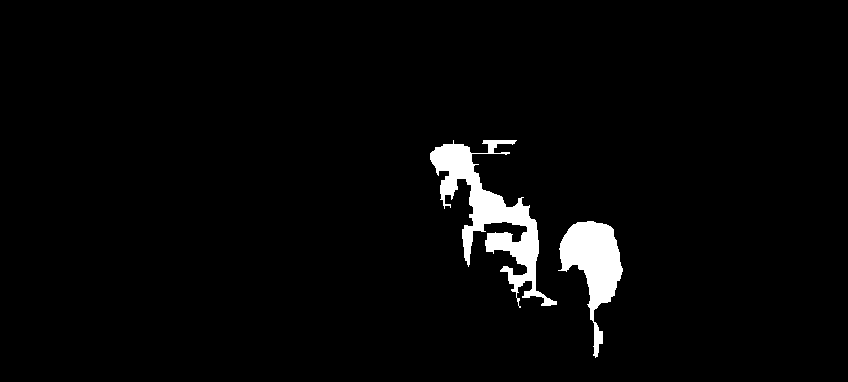

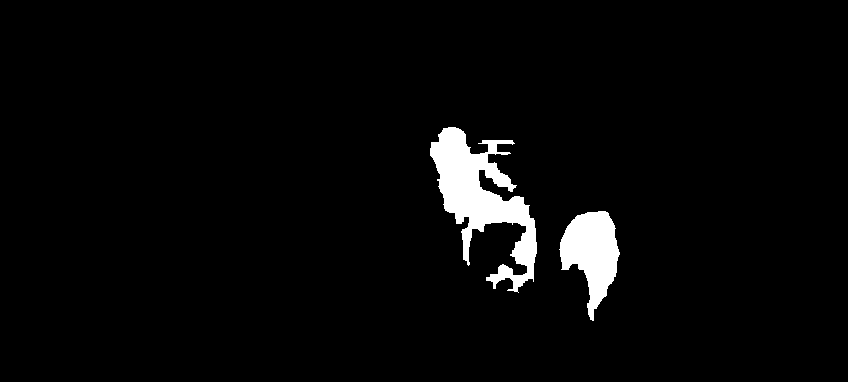

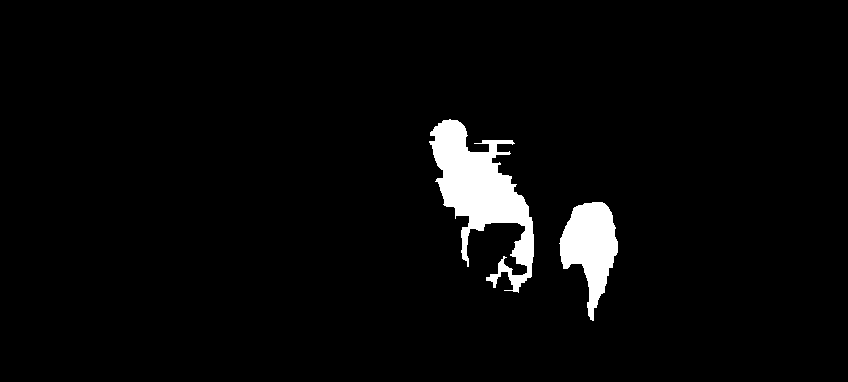

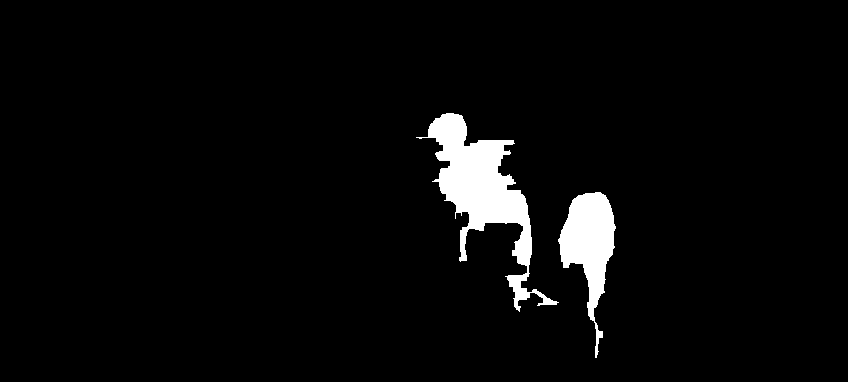

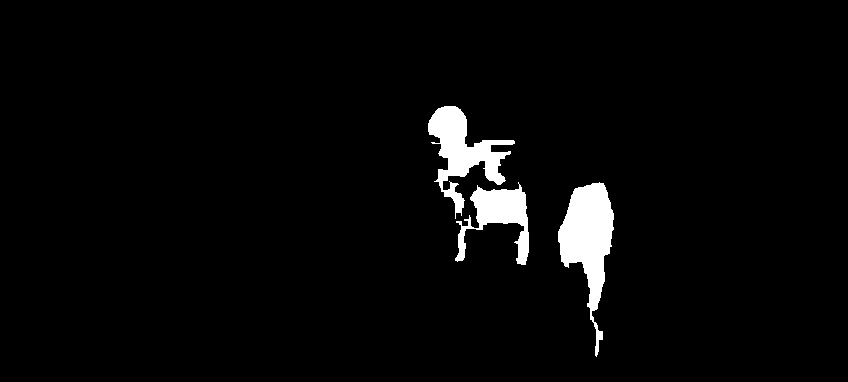

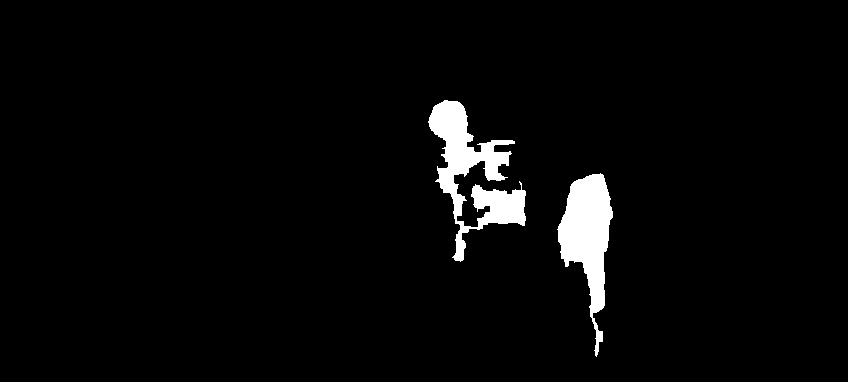

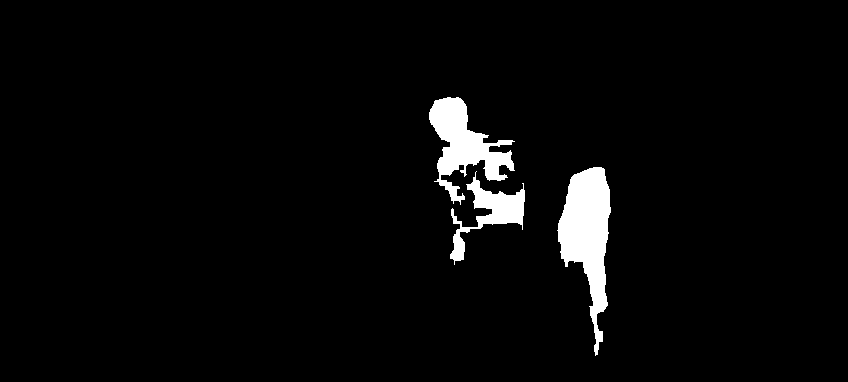

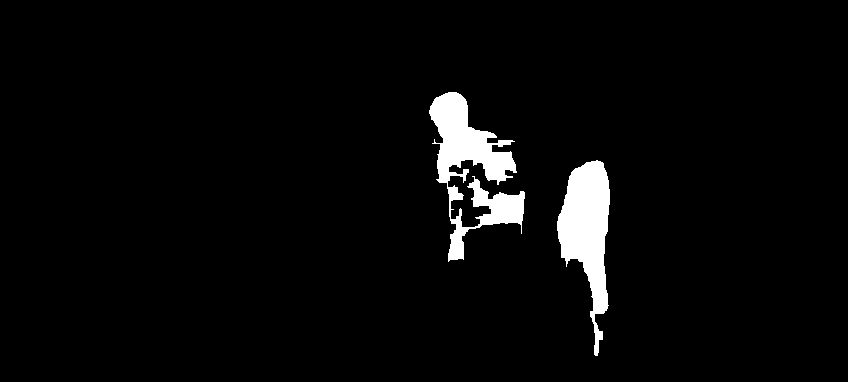

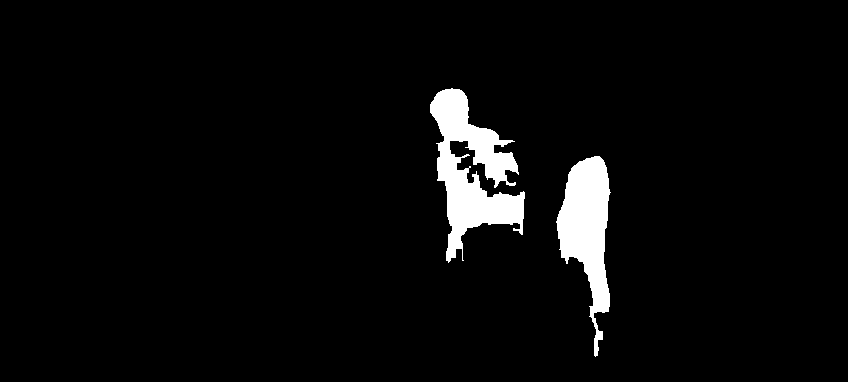

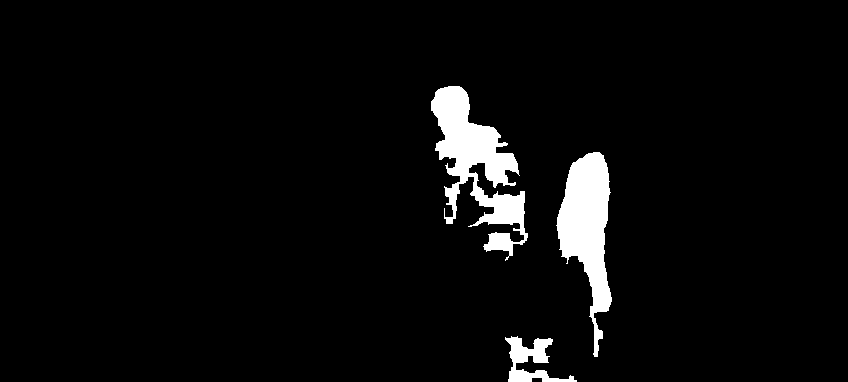

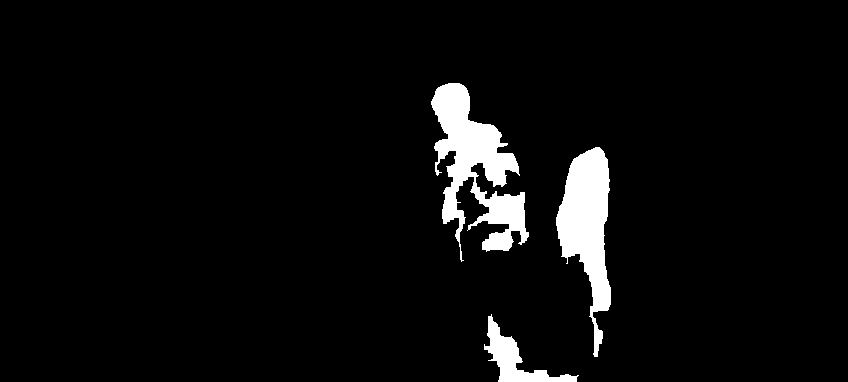

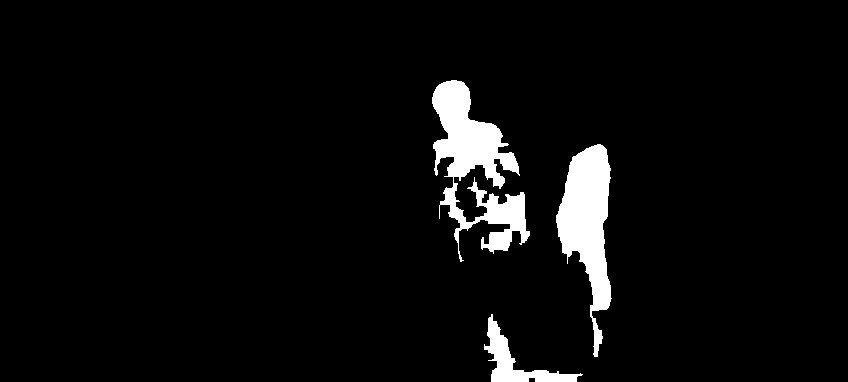

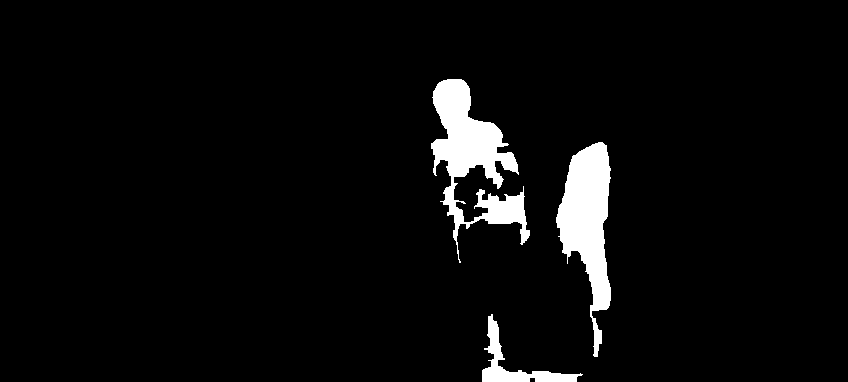

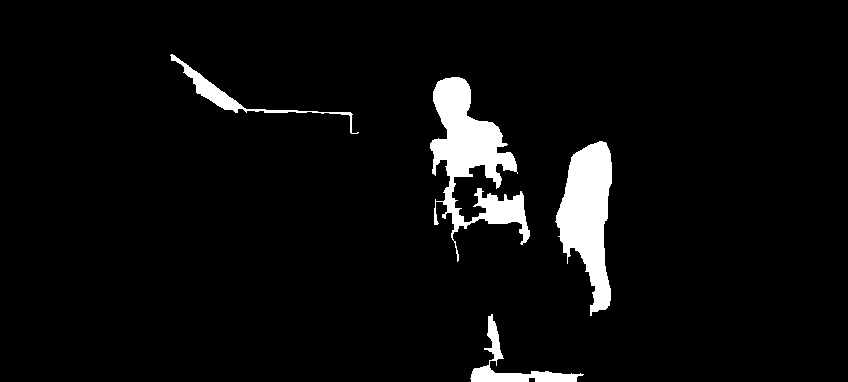

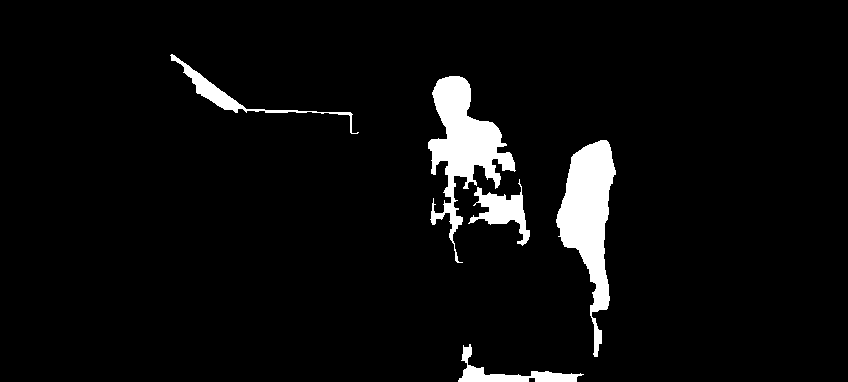

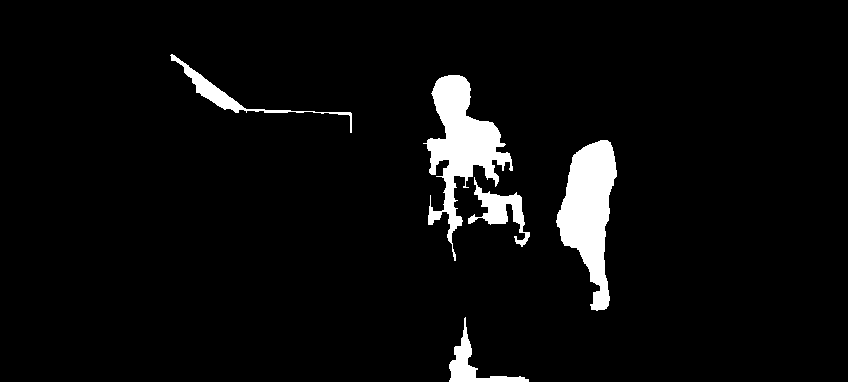

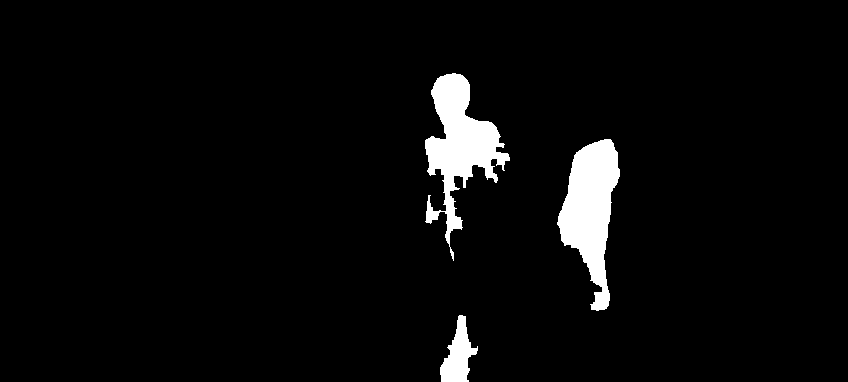

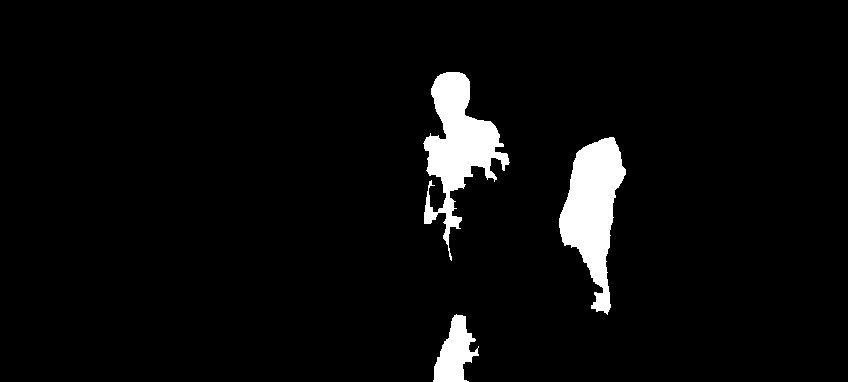

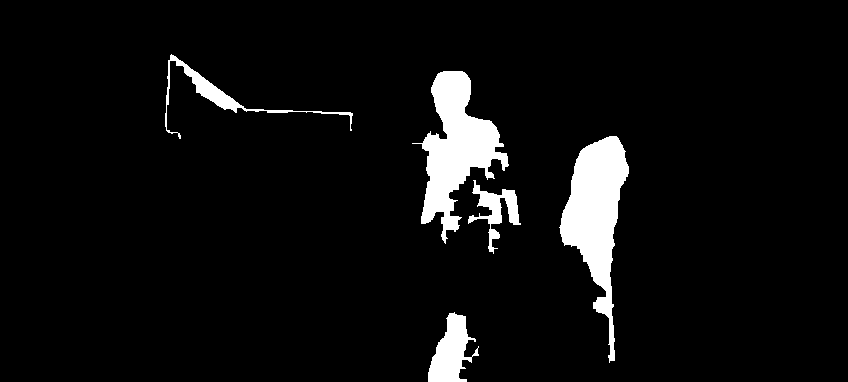

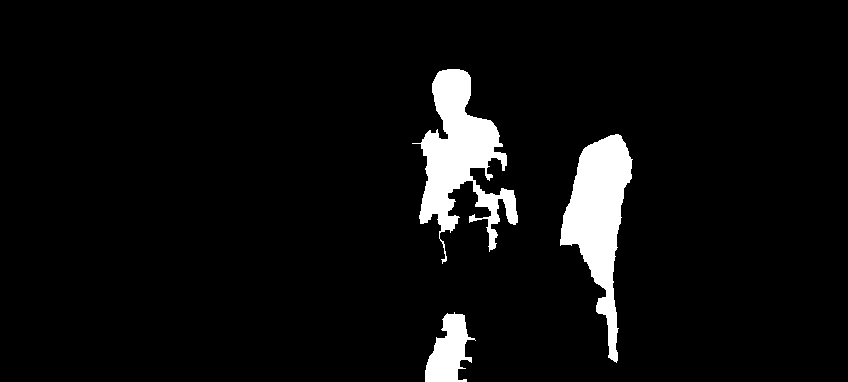

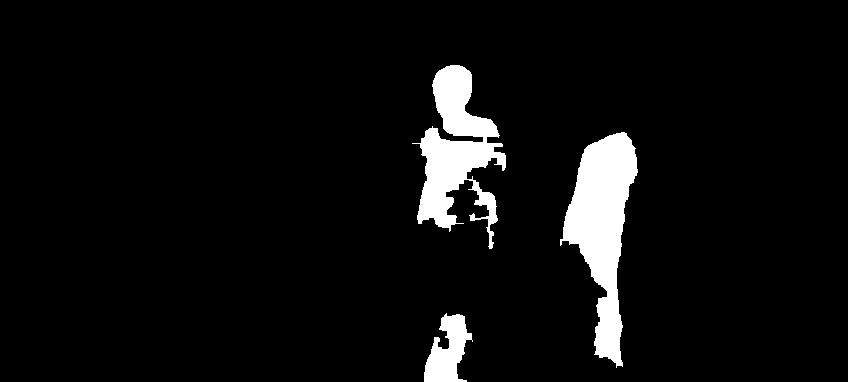

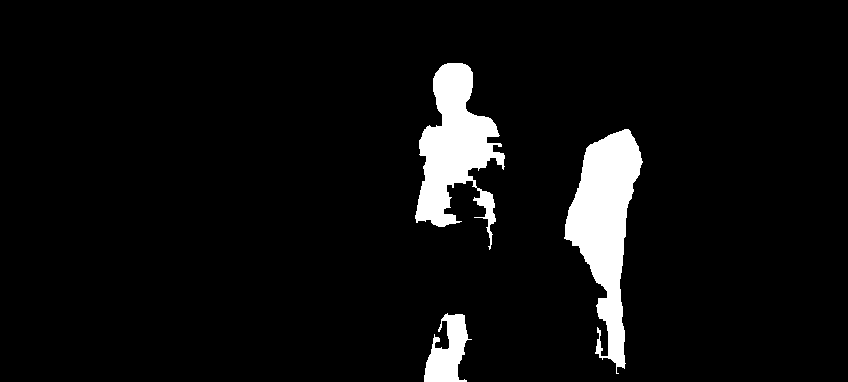

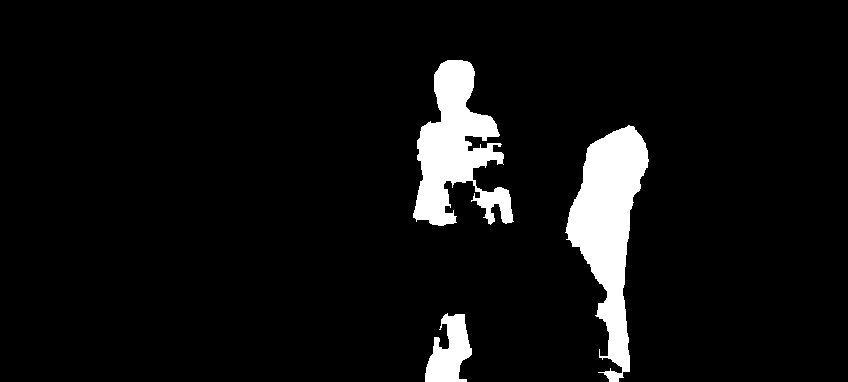

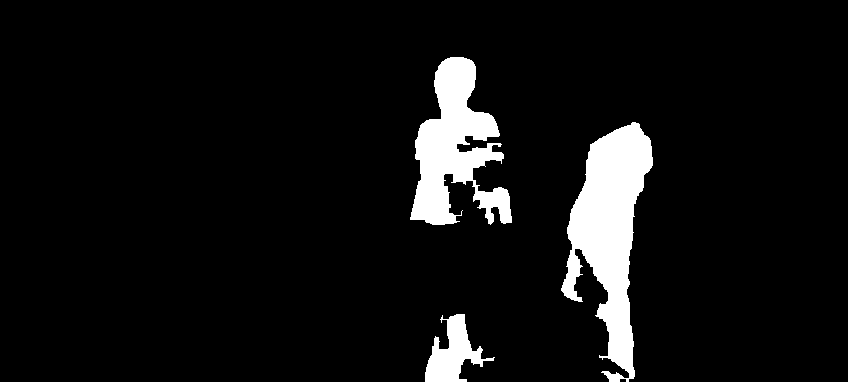

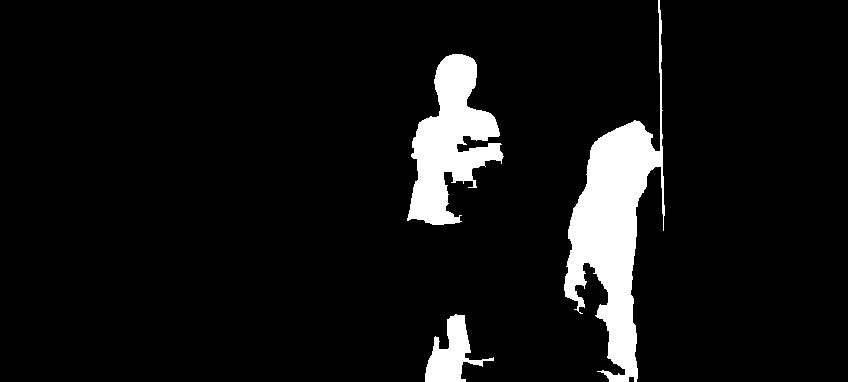

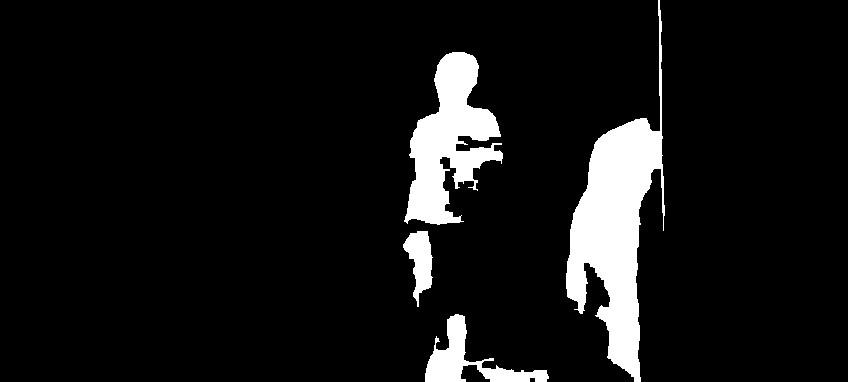

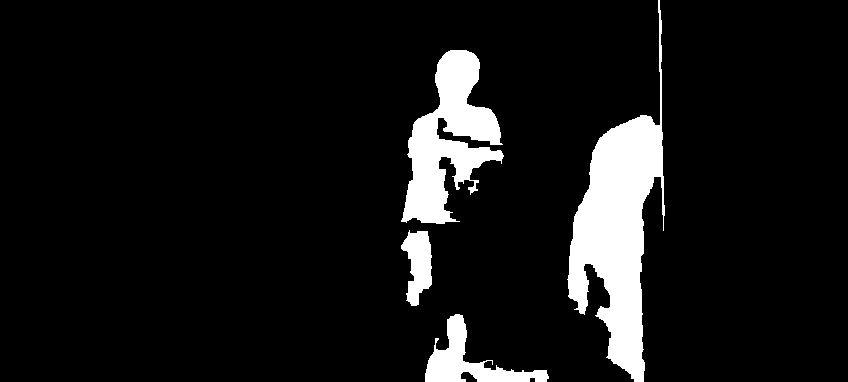

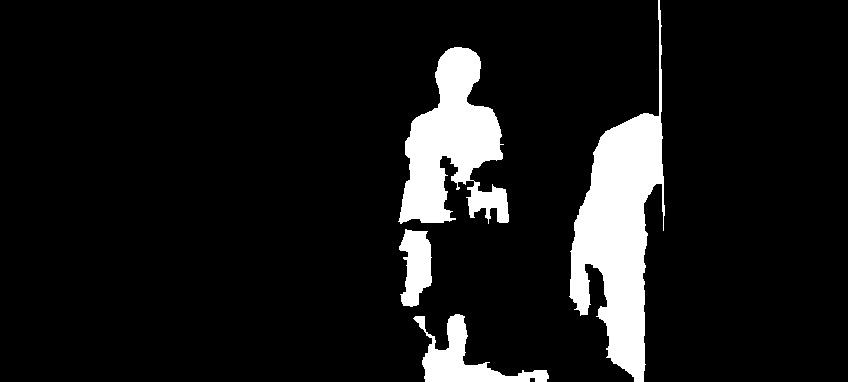

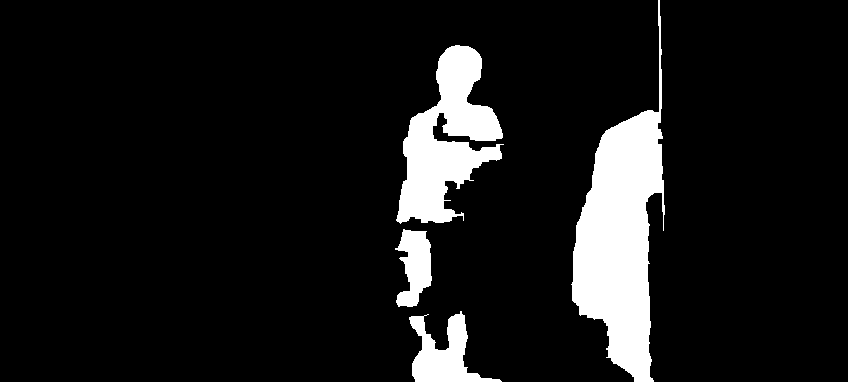

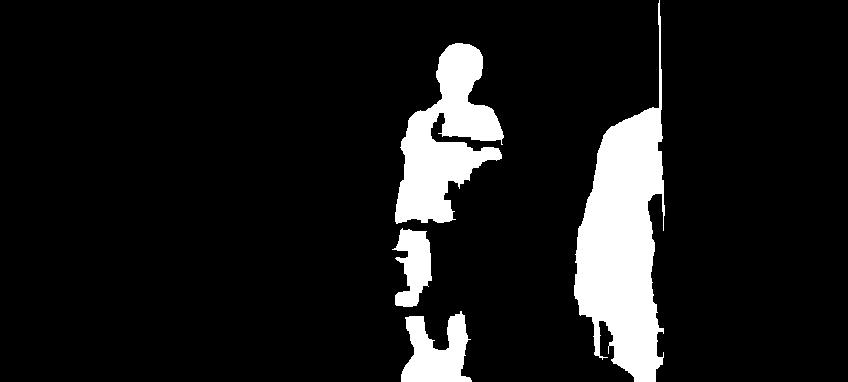

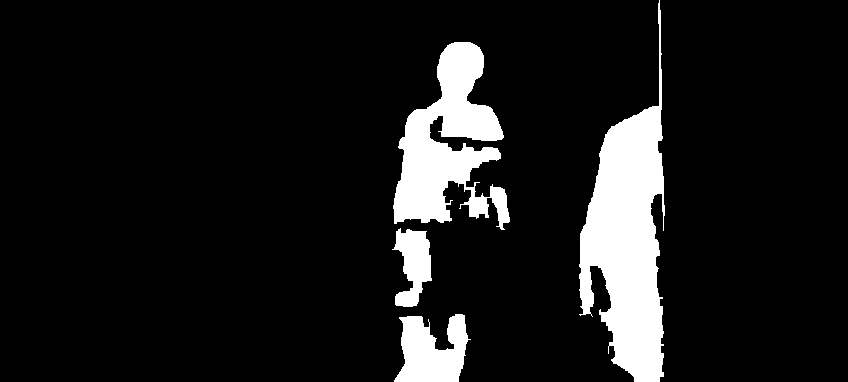

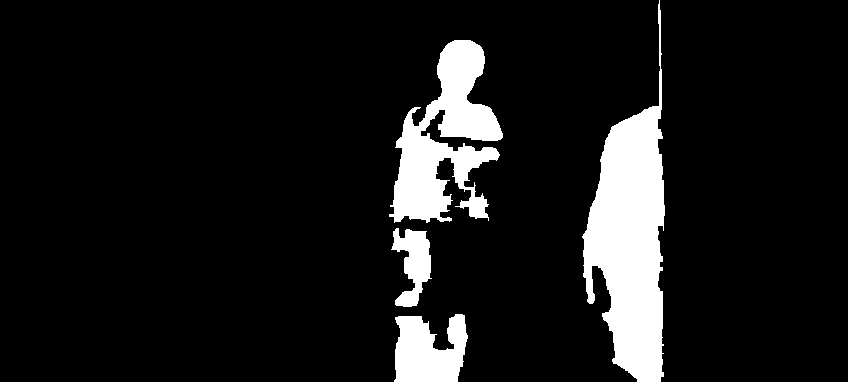

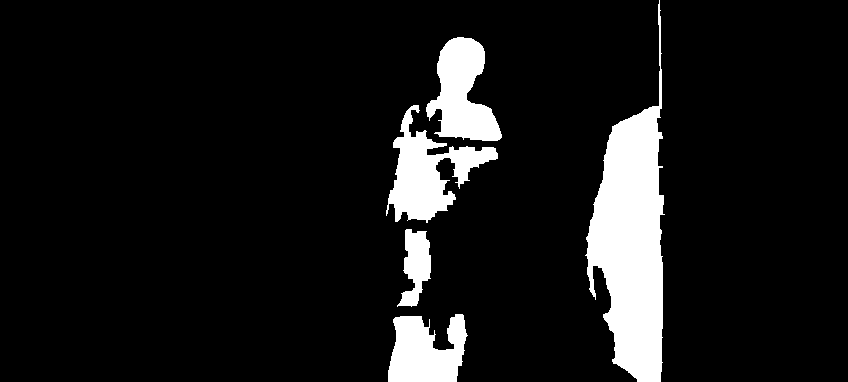

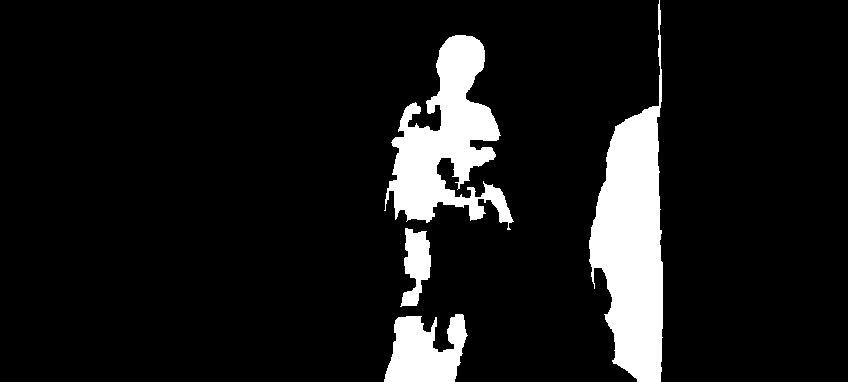

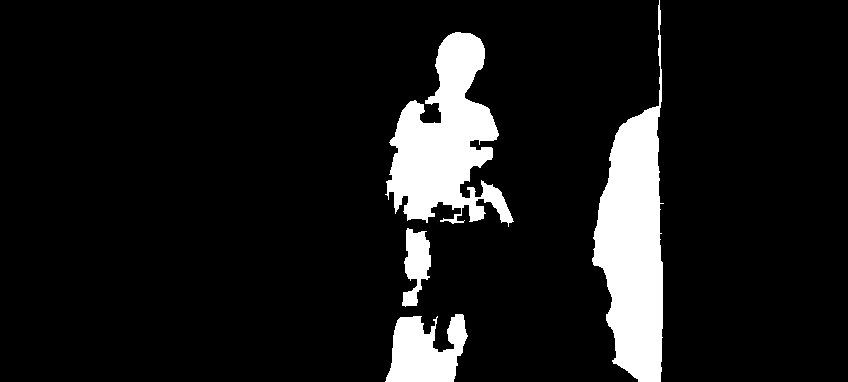

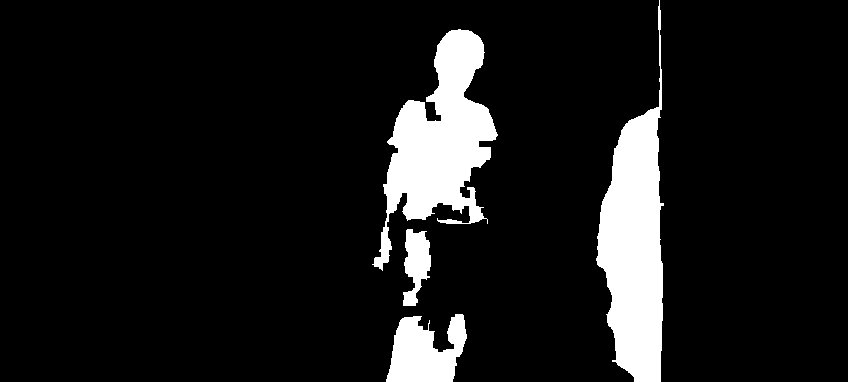

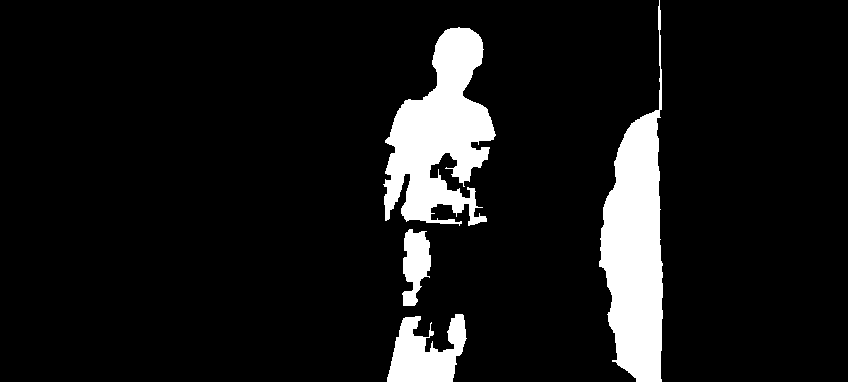

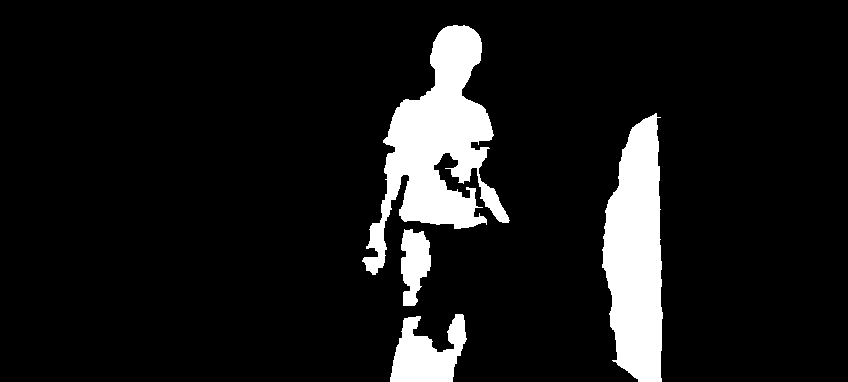

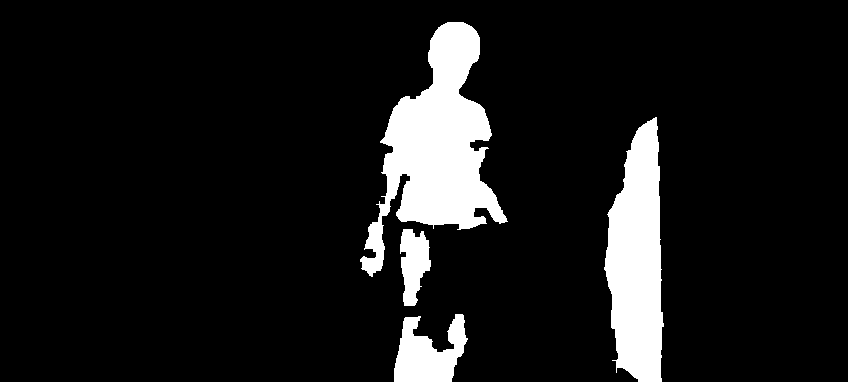

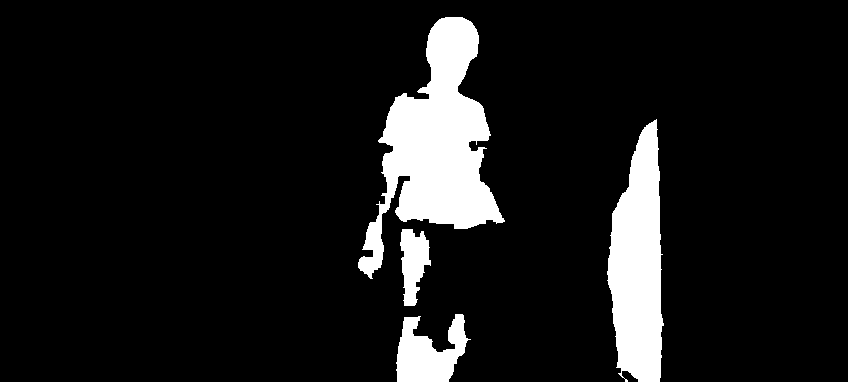

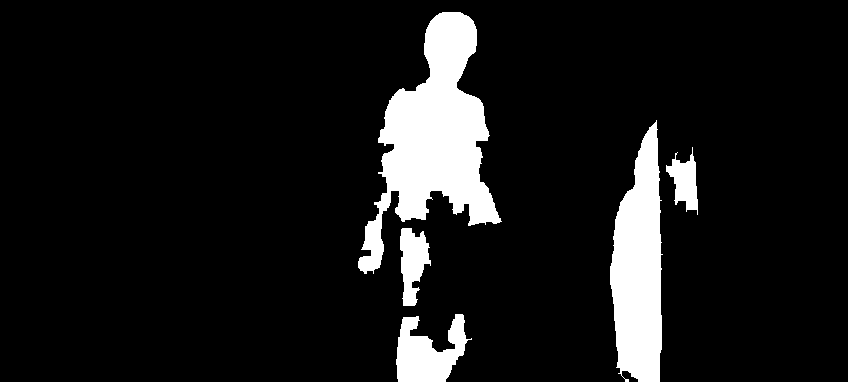

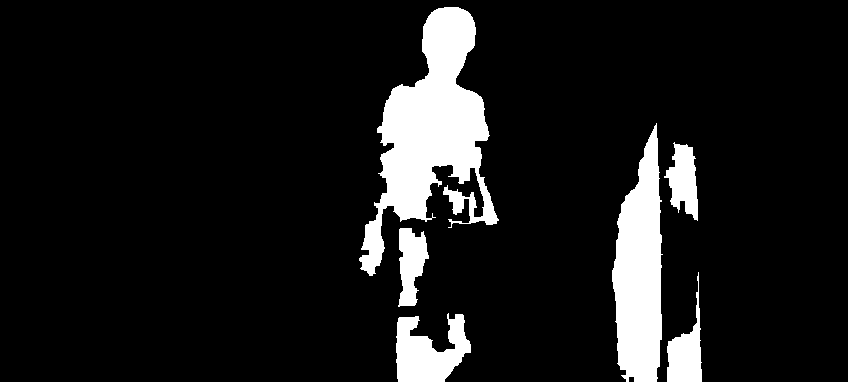

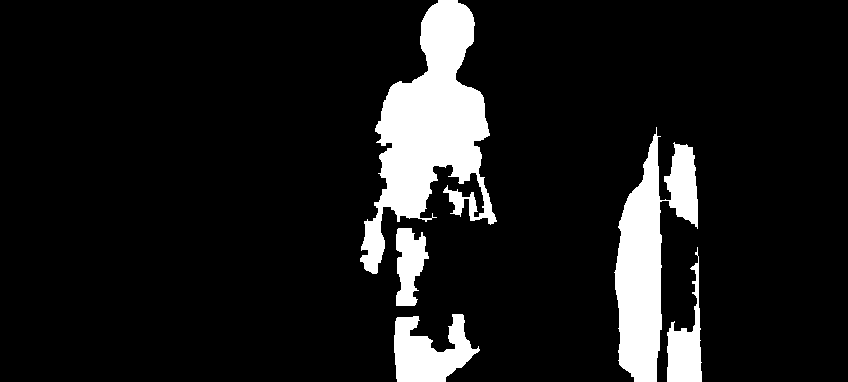

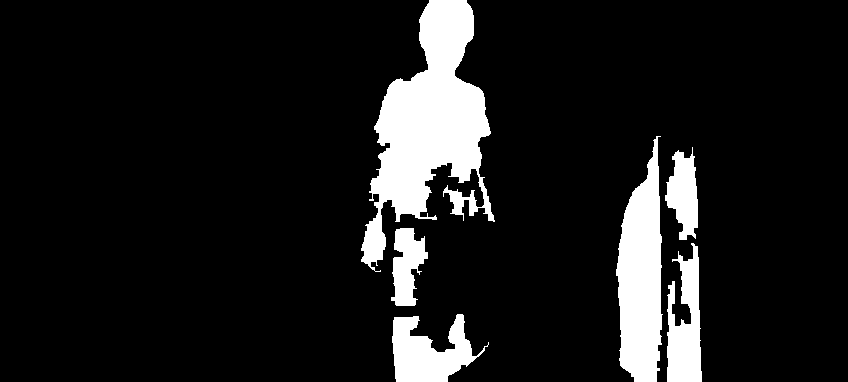

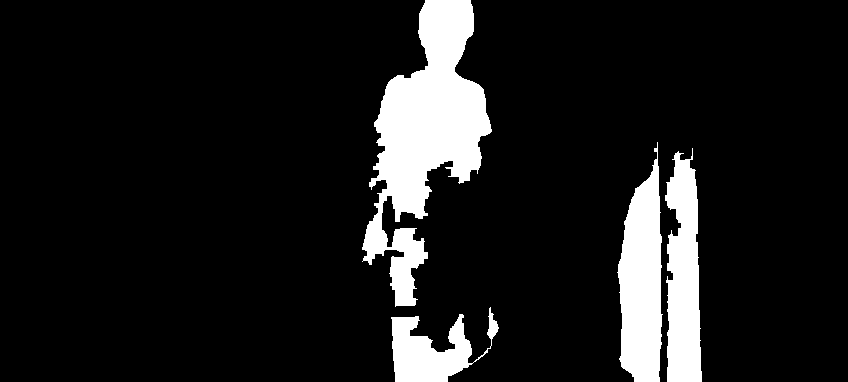

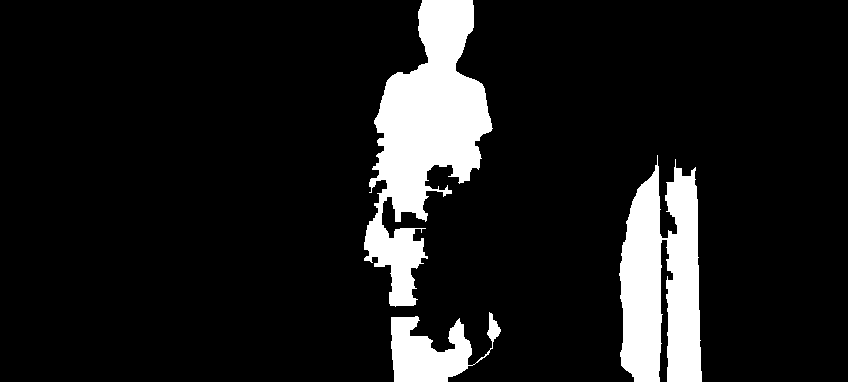

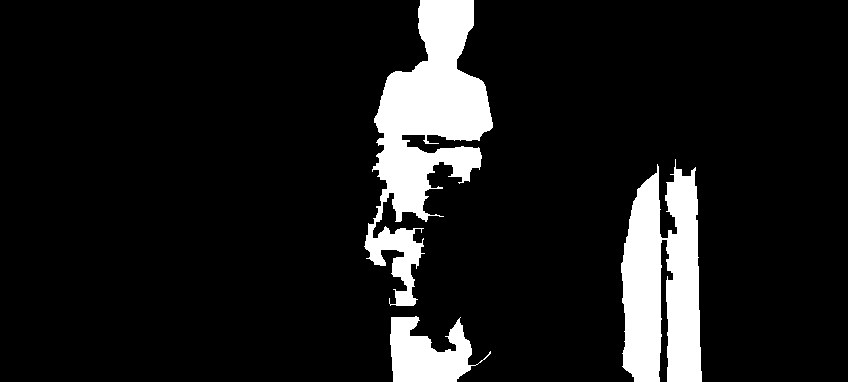

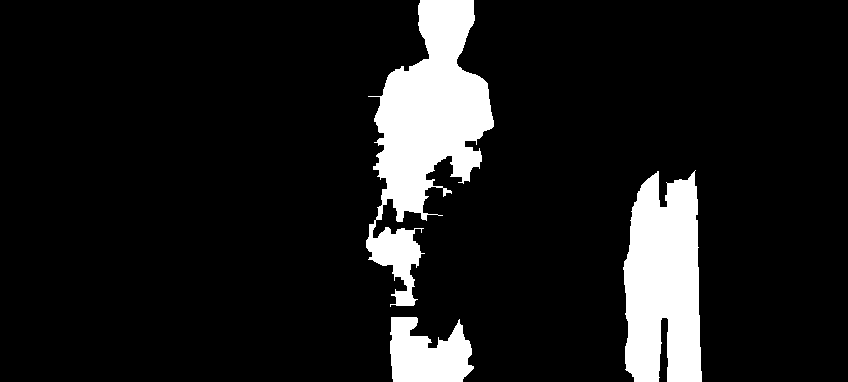

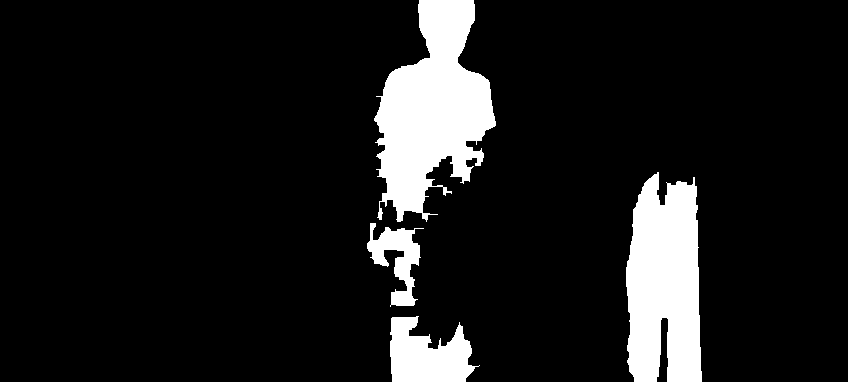

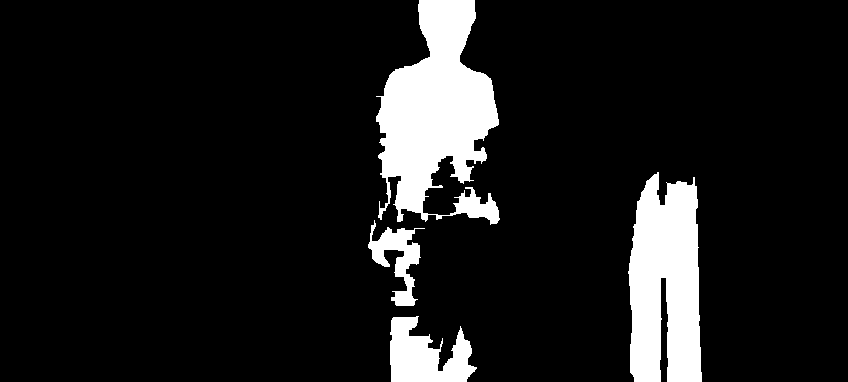

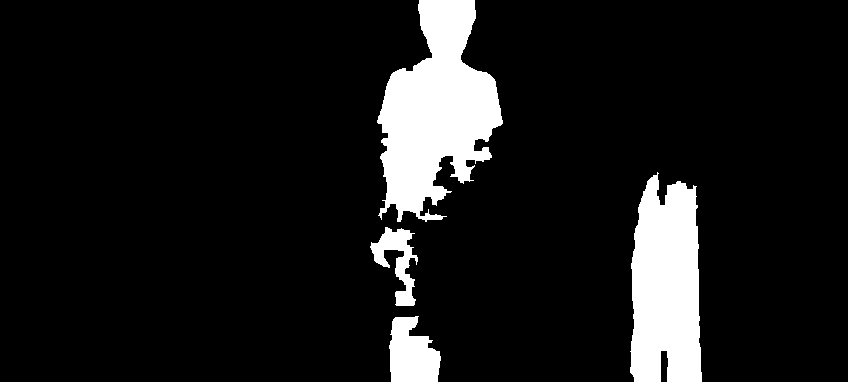

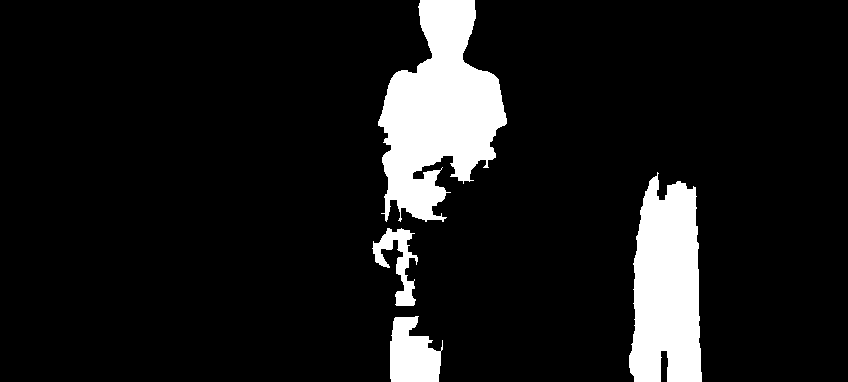

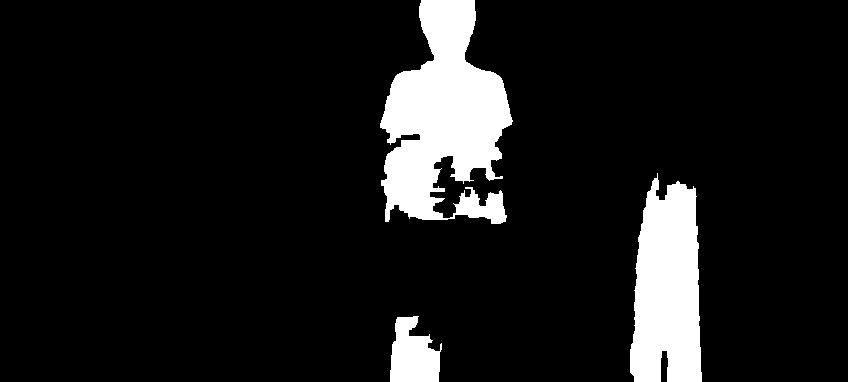

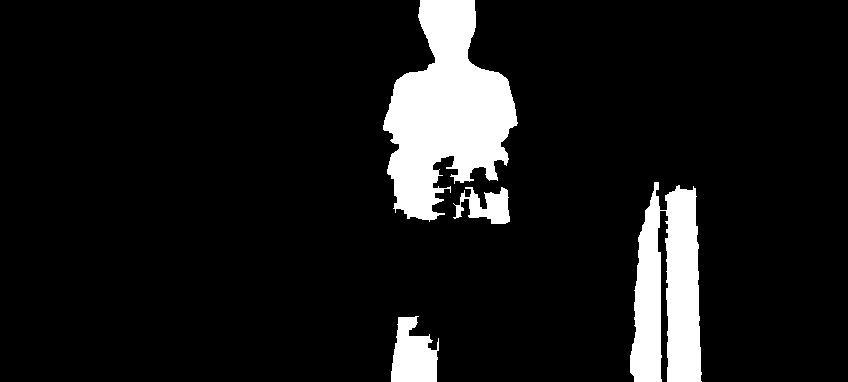

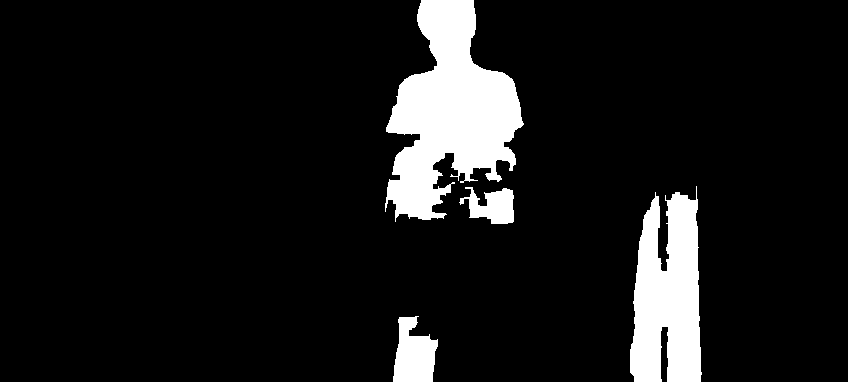

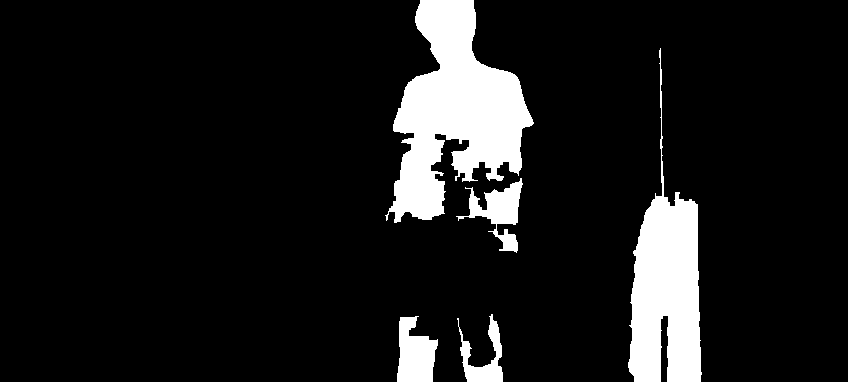

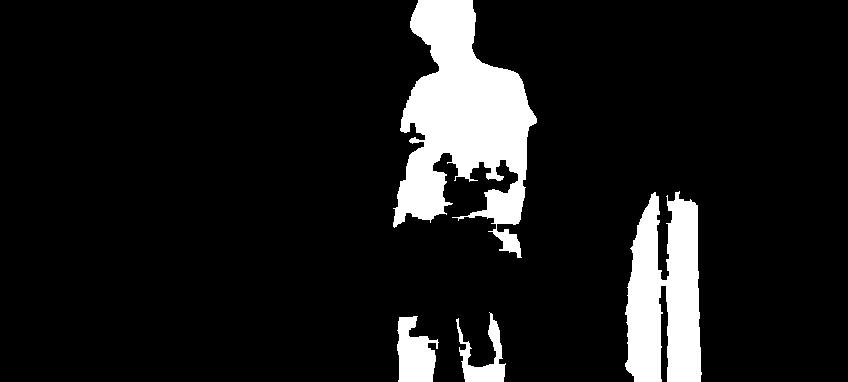

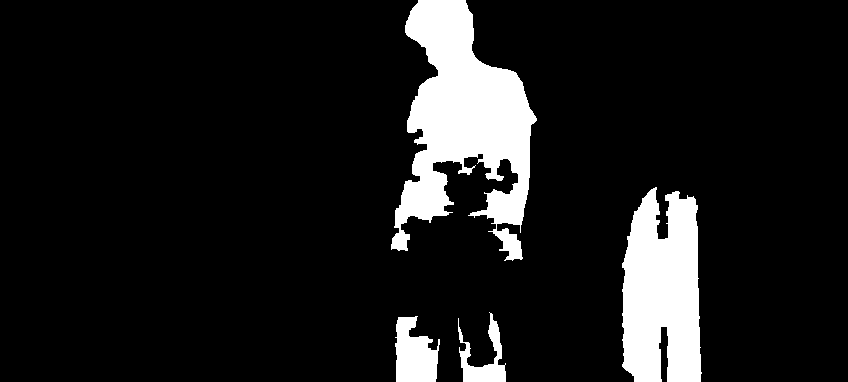

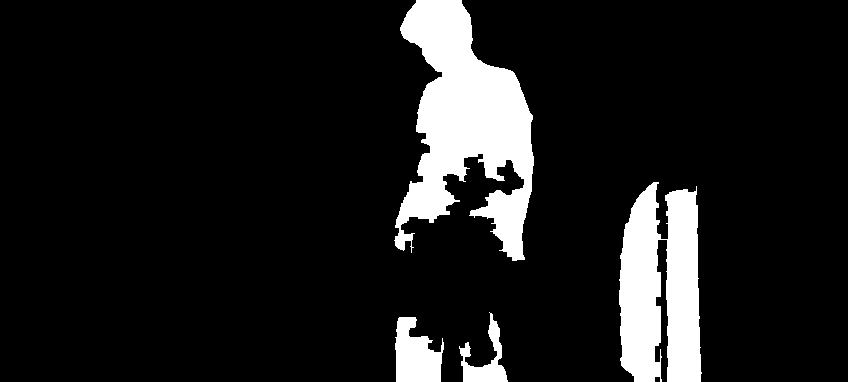

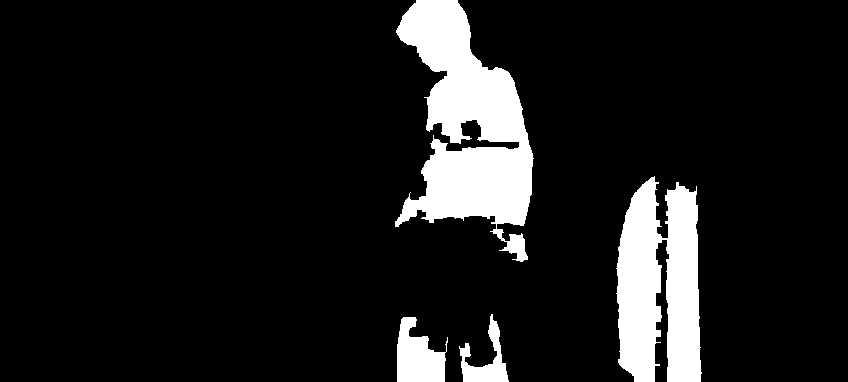

End of video


In [10]:
import cv2
import numpy as np

def preprocess_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Initialize background subtractor
    bg_subtractor = cv2.createBackgroundSubtractorMOG2()

    # Read the first frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Cannot read video file")
        return

    while True:
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply smoothening operations to reduce noise
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply background subtraction
        fg_mask = bg_subtractor.apply(gray)

        # Threshold the foreground mask
        _, fg_mask = cv2.threshold(fg_mask, 100, 255, cv2.THRESH_BINARY)

        # Remove noise
        # Further smoothen the foreground mask with dilation and erosion
        kernel = np.ones((5, 5), np.uint8)
        fg_mask = cv2.dilate(fg_mask, kernel, iterations=1)
        fg_mask = cv2.erode(fg_mask, kernel, iterations=1)

        # Further remove salt noise using closing operation
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))

        # Find contours of the foreground objects
        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Initialize a blank image to draw the silhouette
        silhouette = np.zeros_like(gray)

        # Draw contours on the silhouette image
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 1000:  # Filter out small contours (noise)
                cv2.drawContours(silhouette, [contour], 0, (255), -1)

        # Display the silhouette
        cv2_imshow(silhouette)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        # Read the next frame
        ret, frame = cap.read()
        if not ret:
            print("End of video")
            break

    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

# Example usage:
input_video_path = '/content/drive/MyDrive/CV Project/input_vid2.mp4'
preprocess_video(input_video_path)


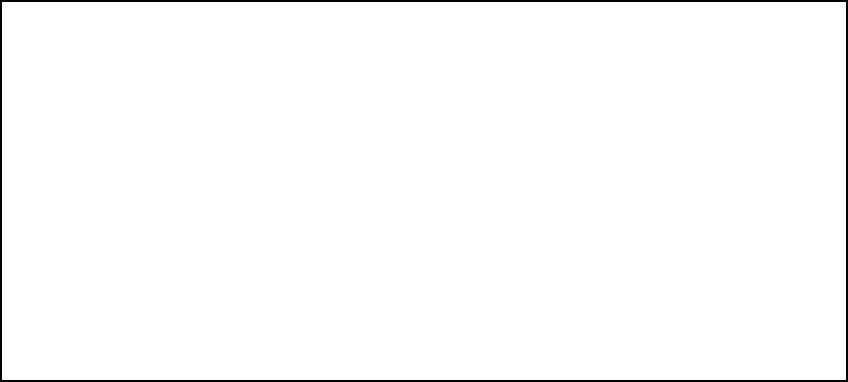

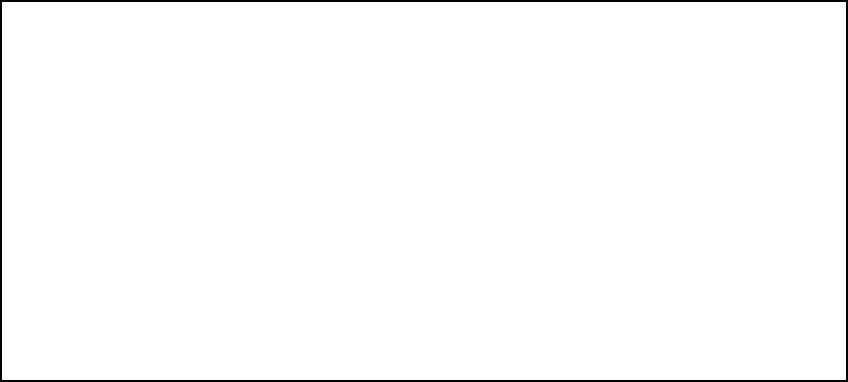

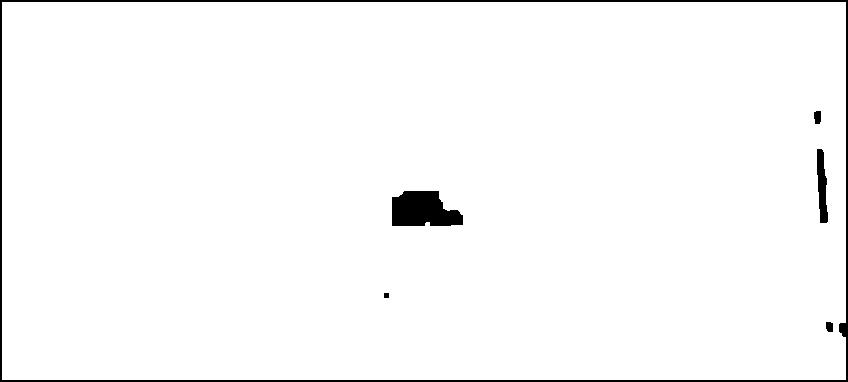

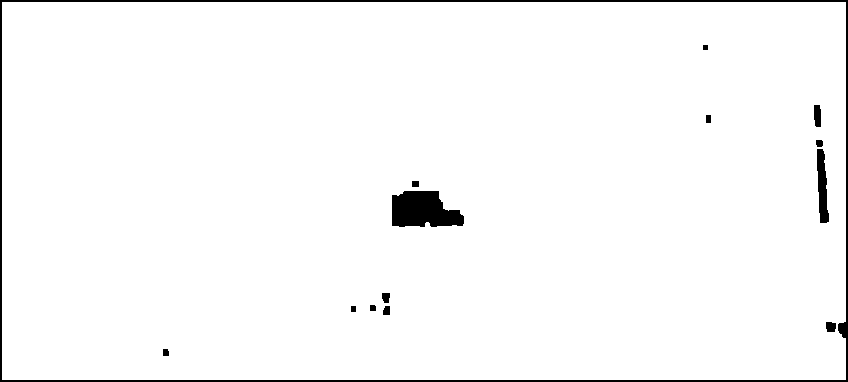

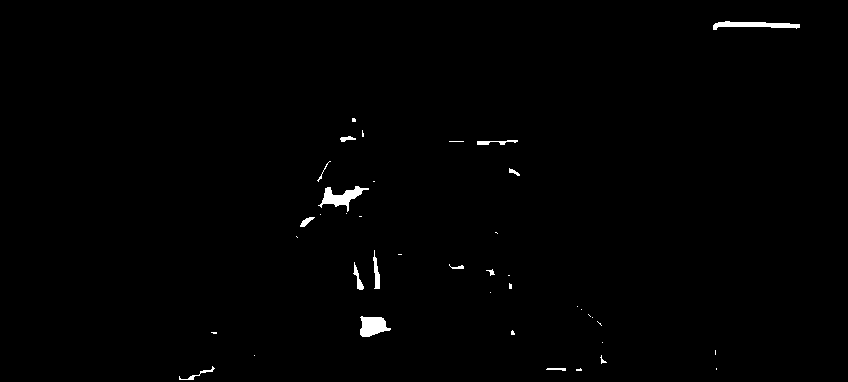

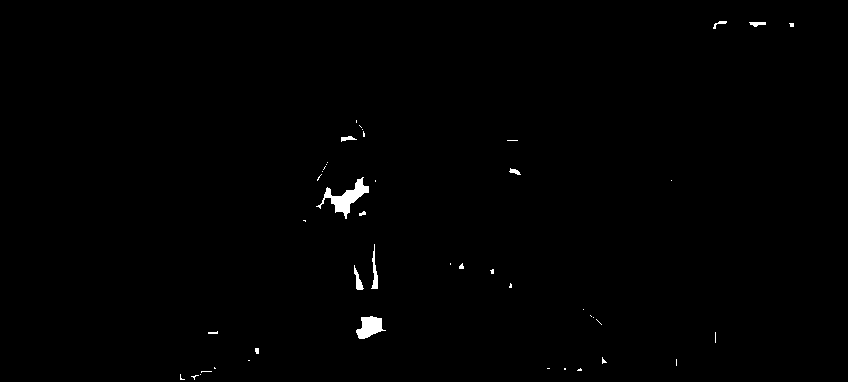

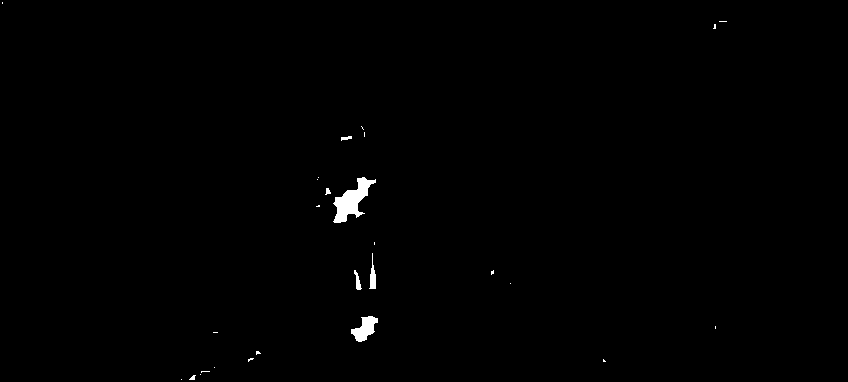

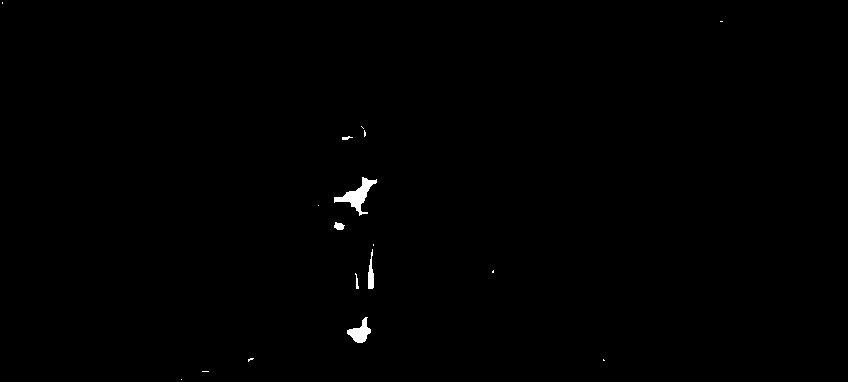

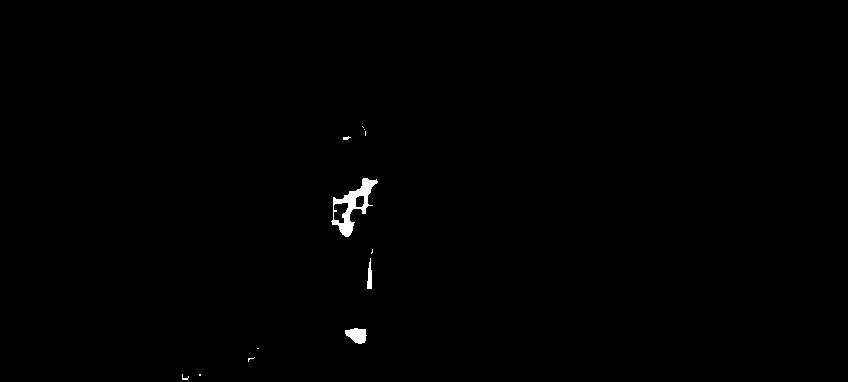

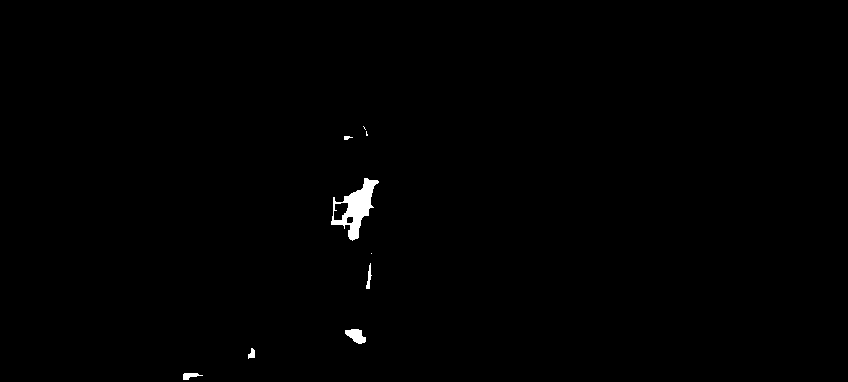

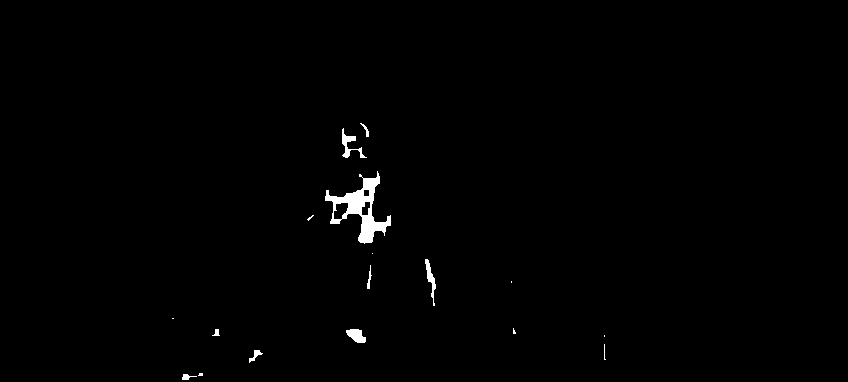

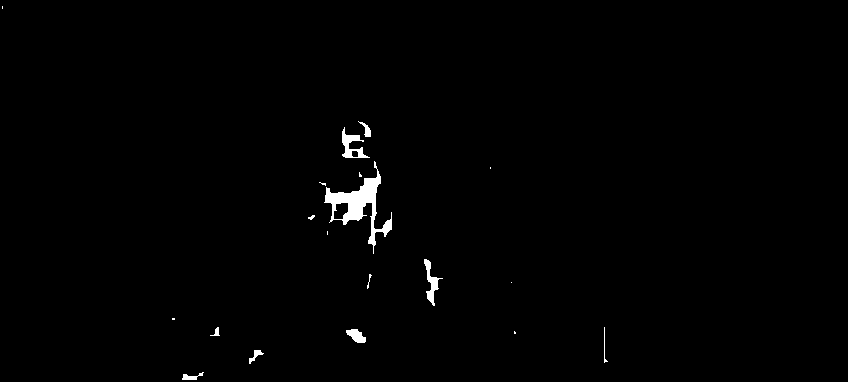

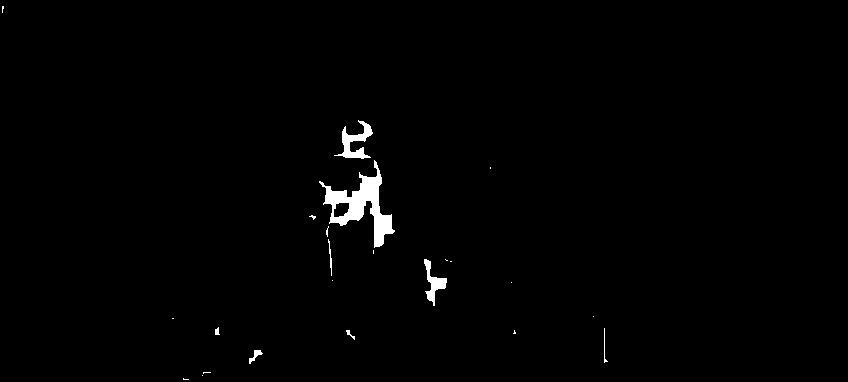

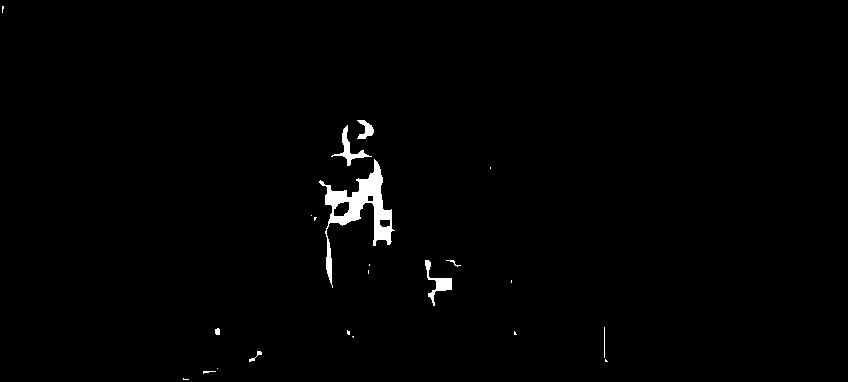

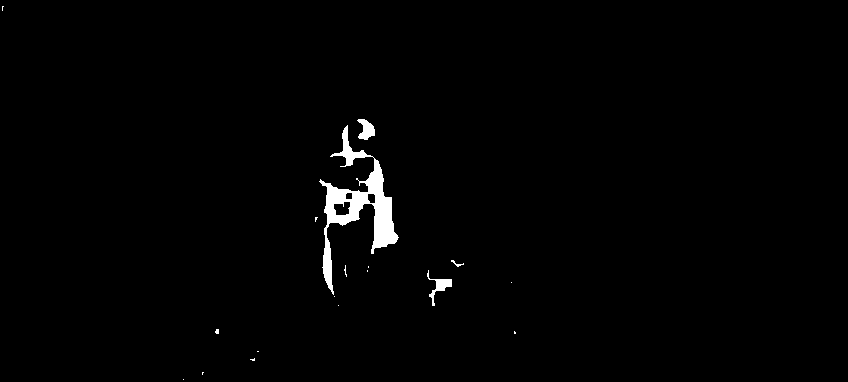

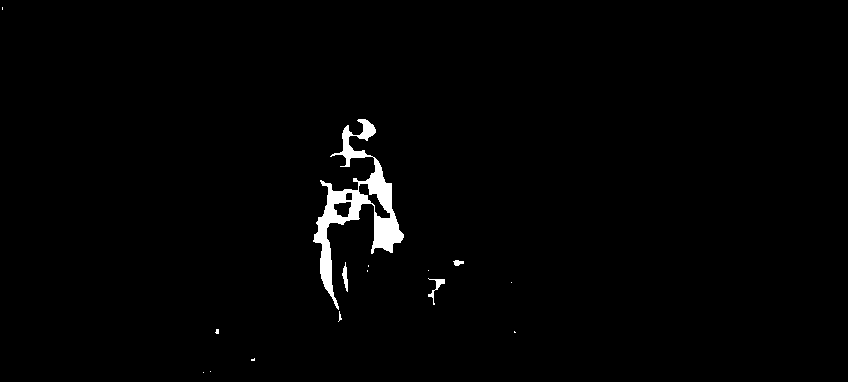

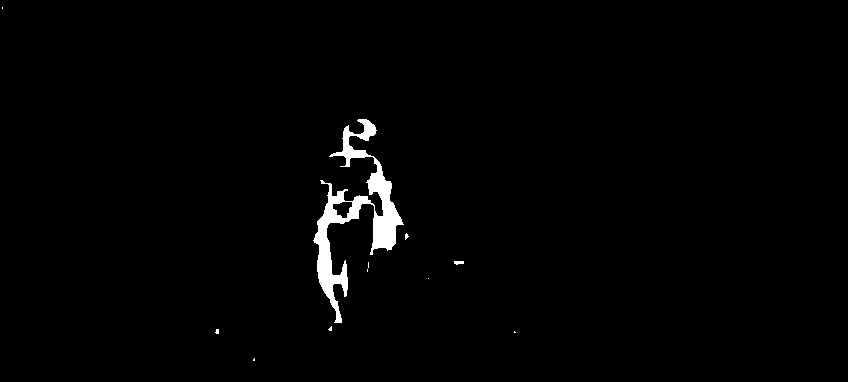

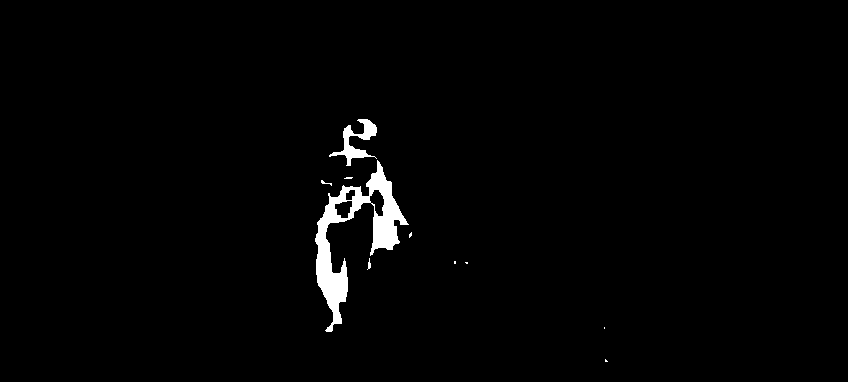

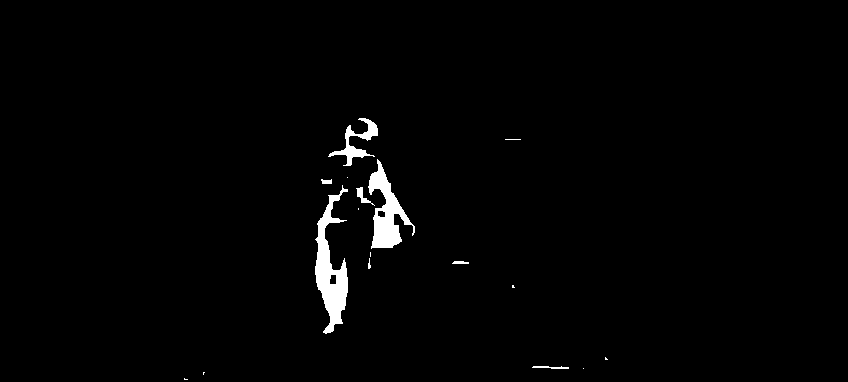

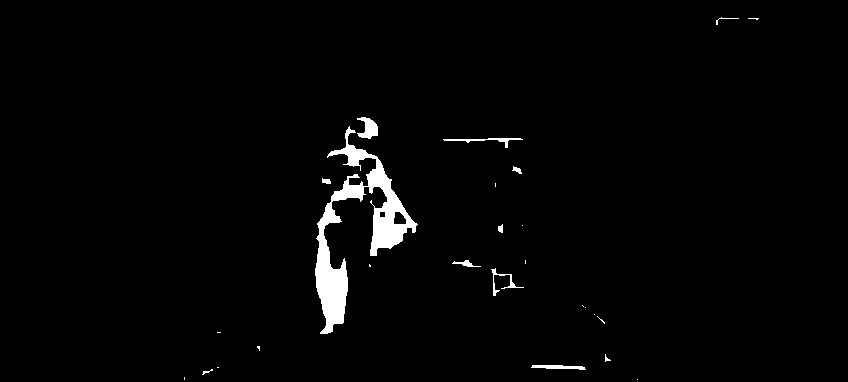

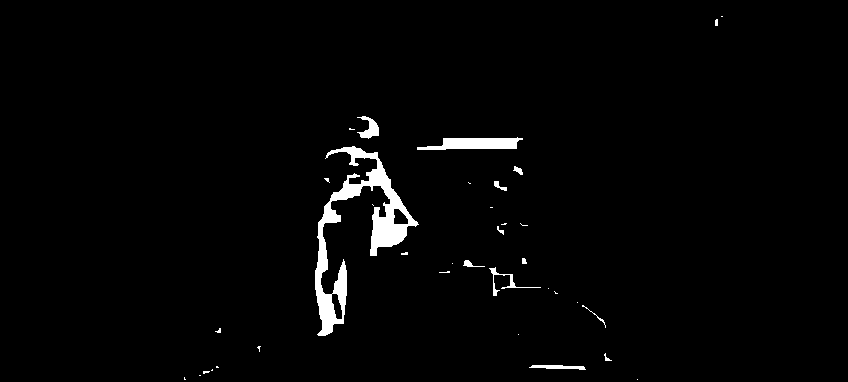

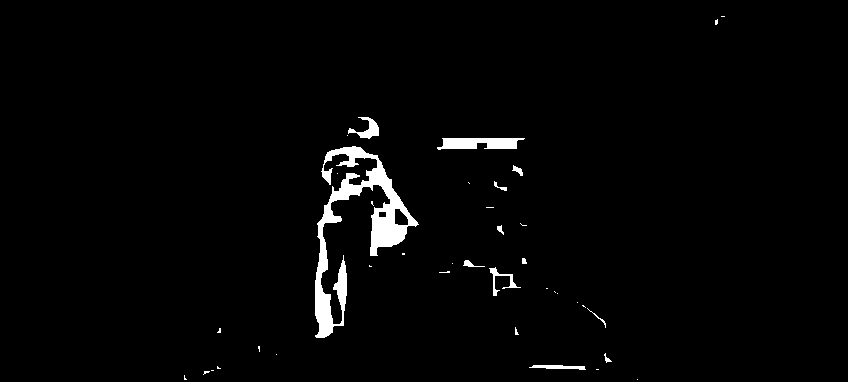

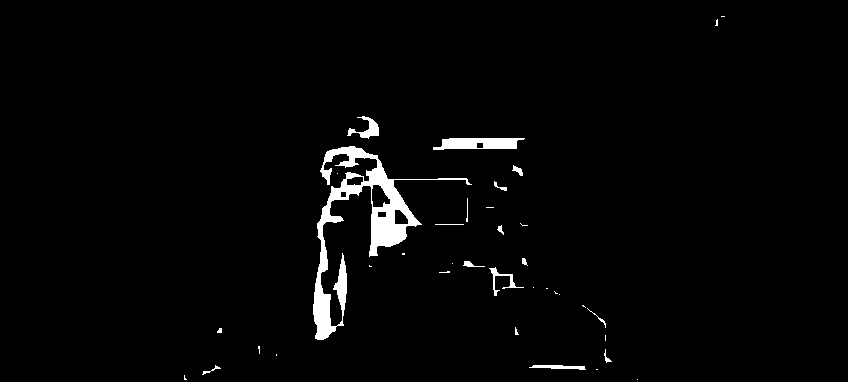

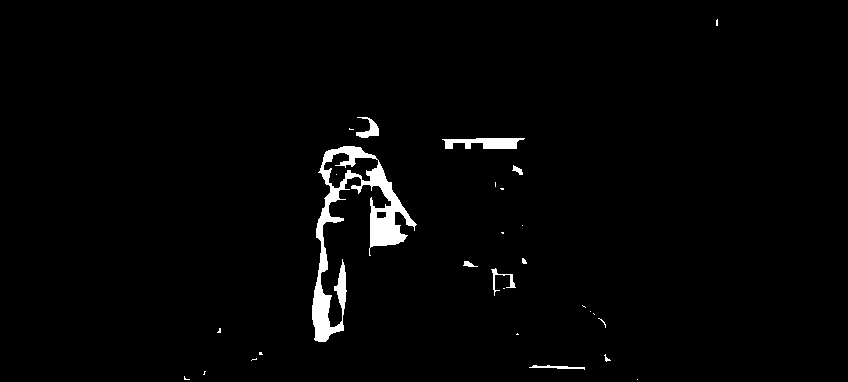

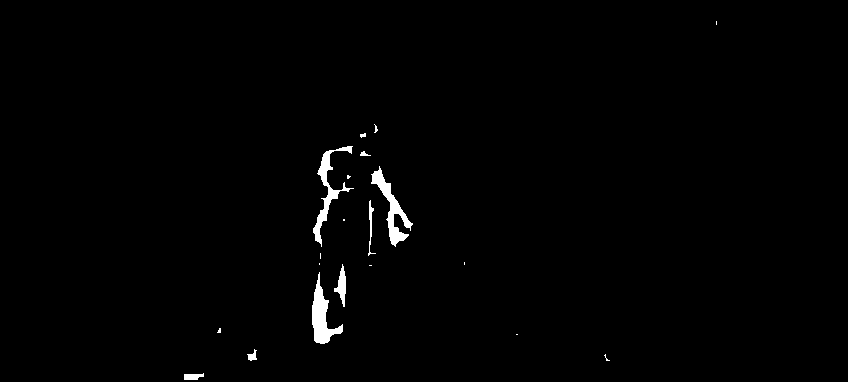

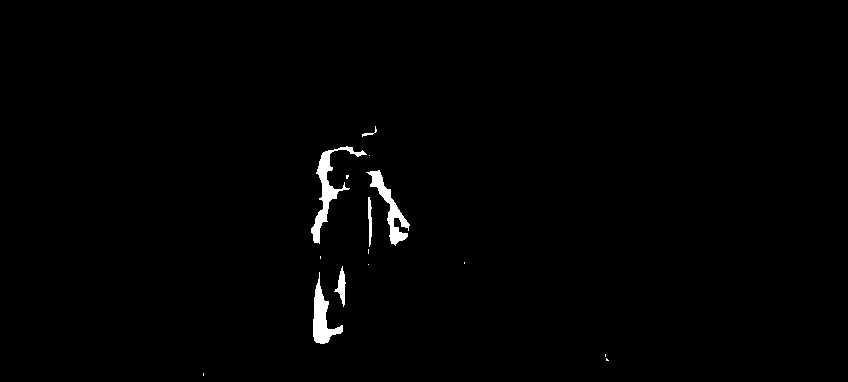

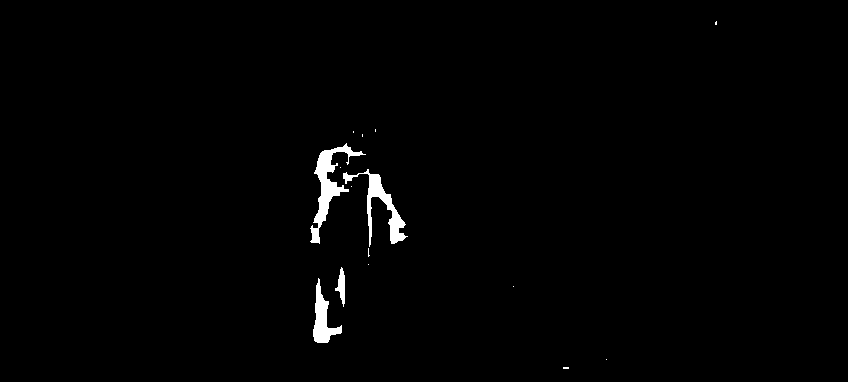

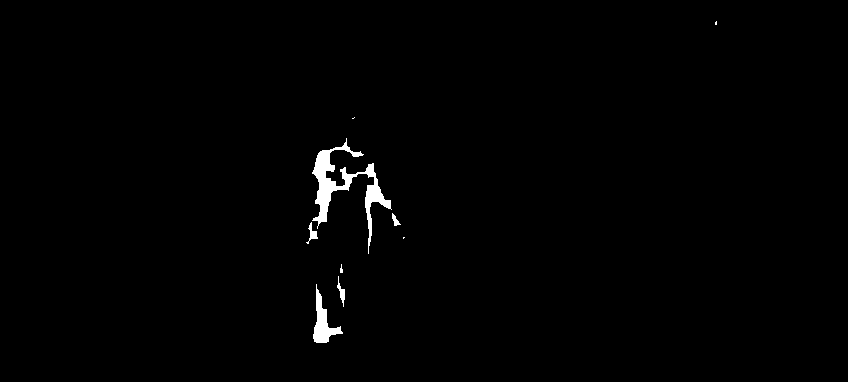

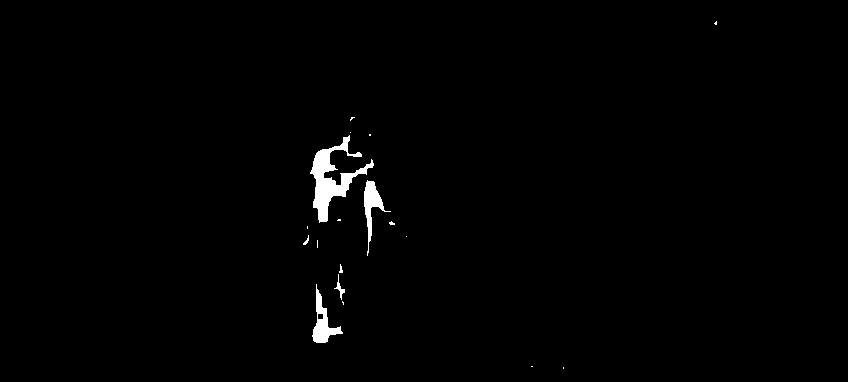

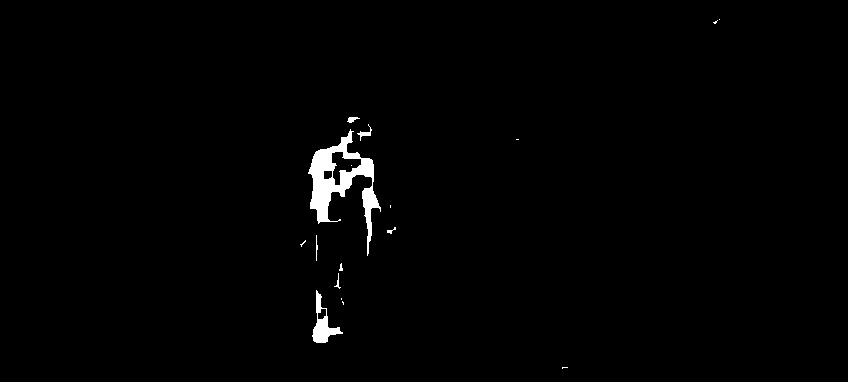

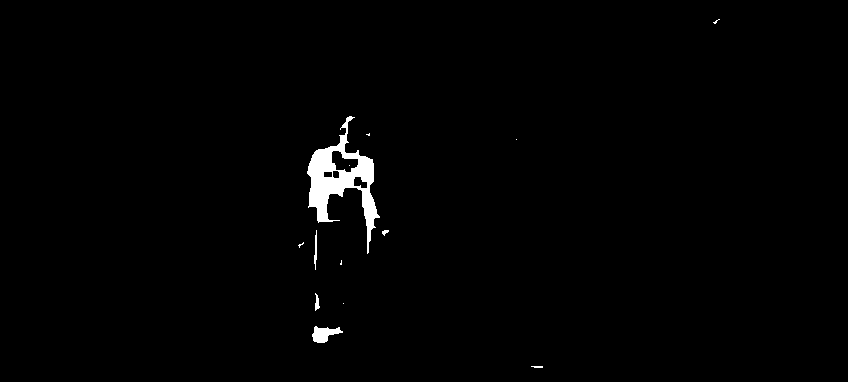

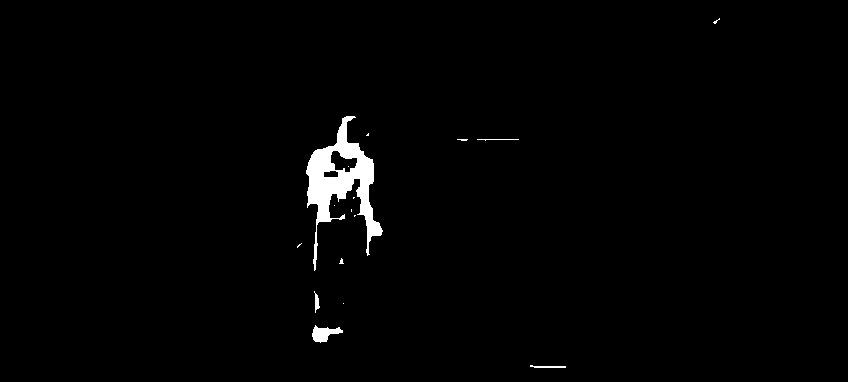

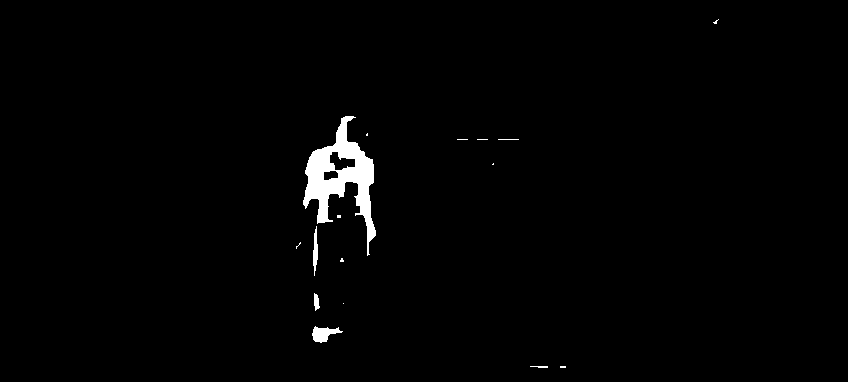

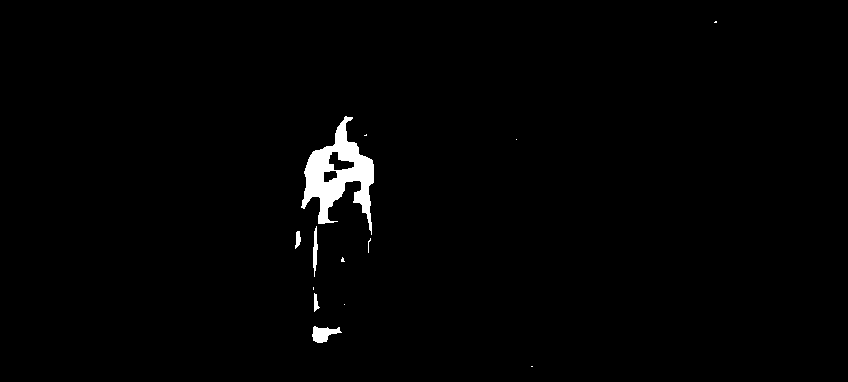

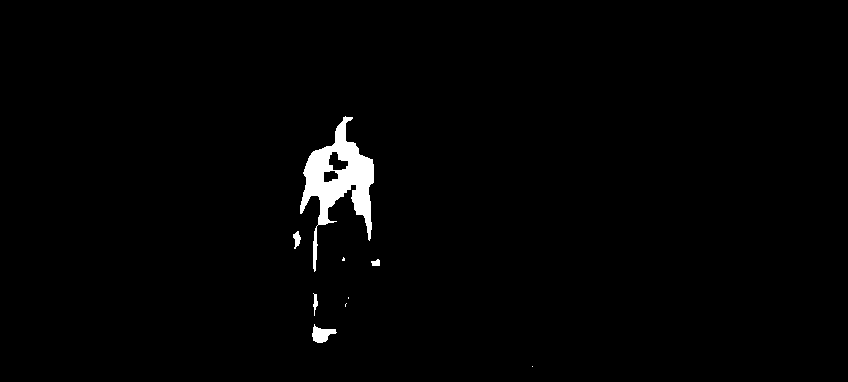

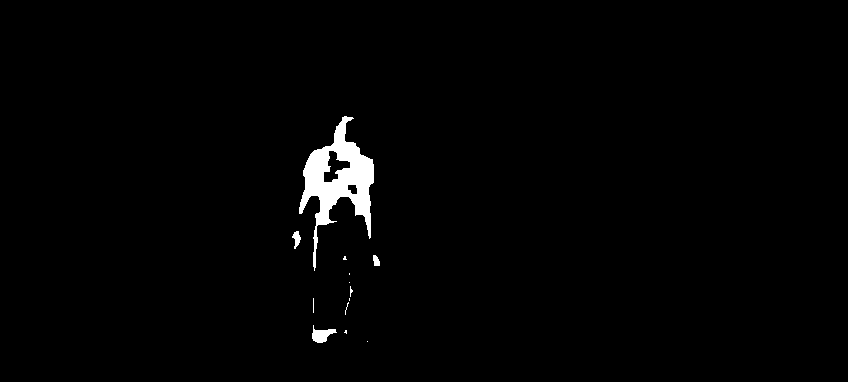

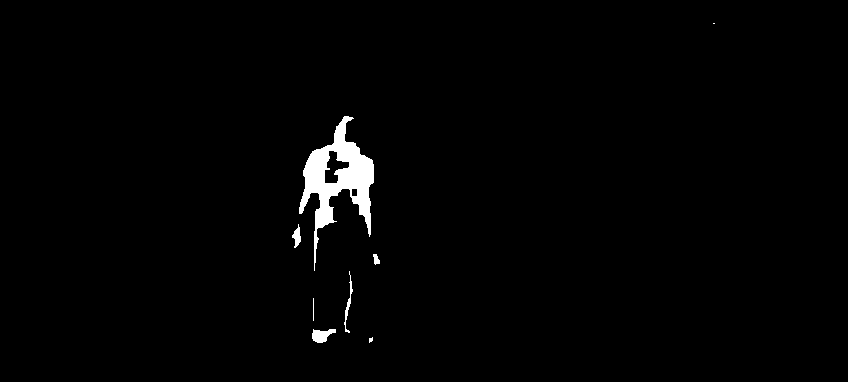

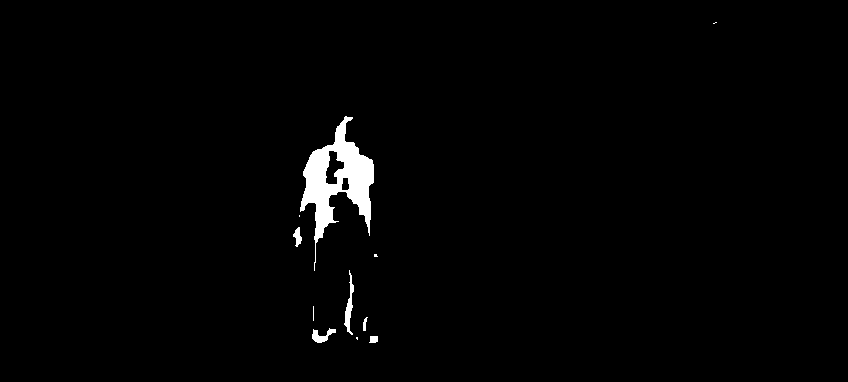

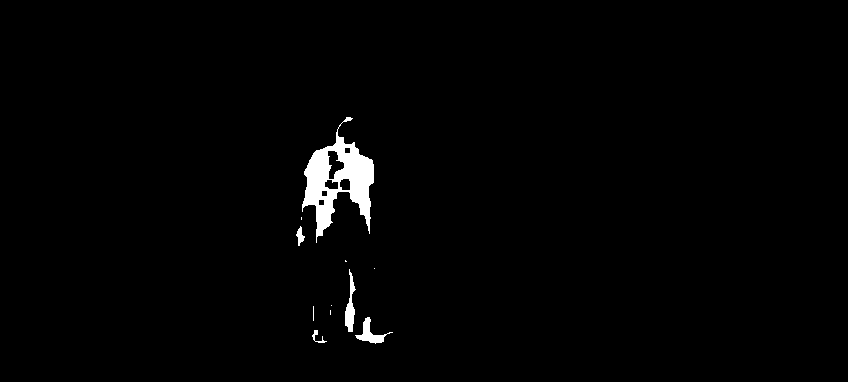

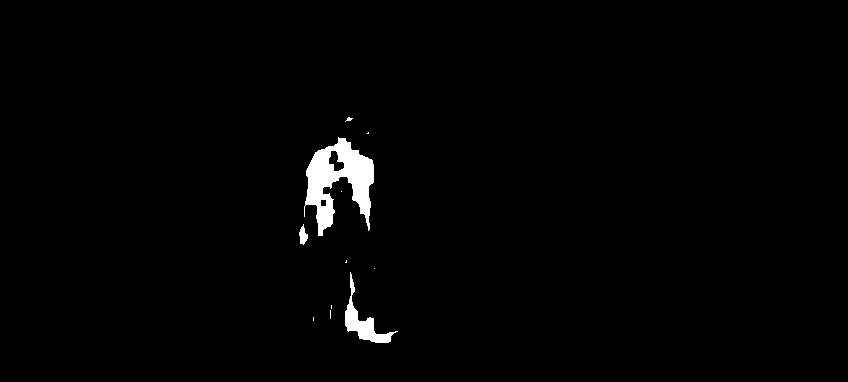

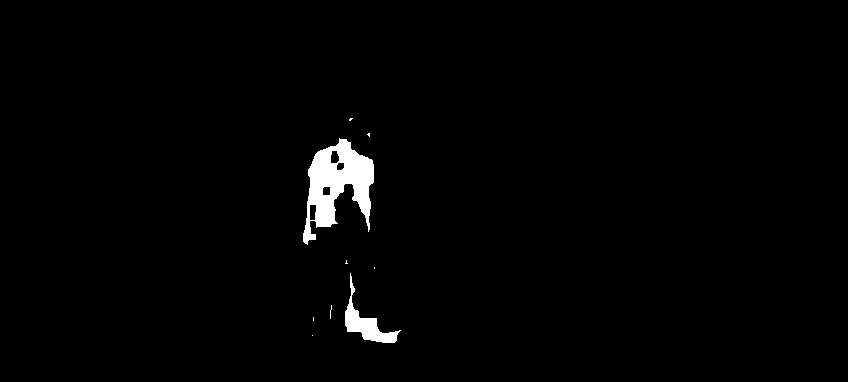

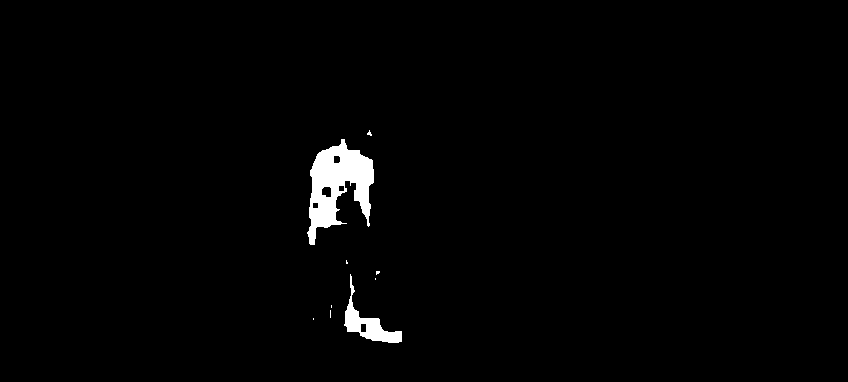

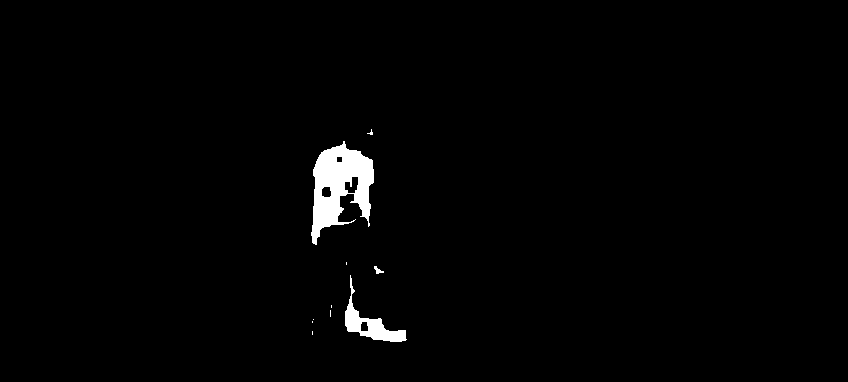

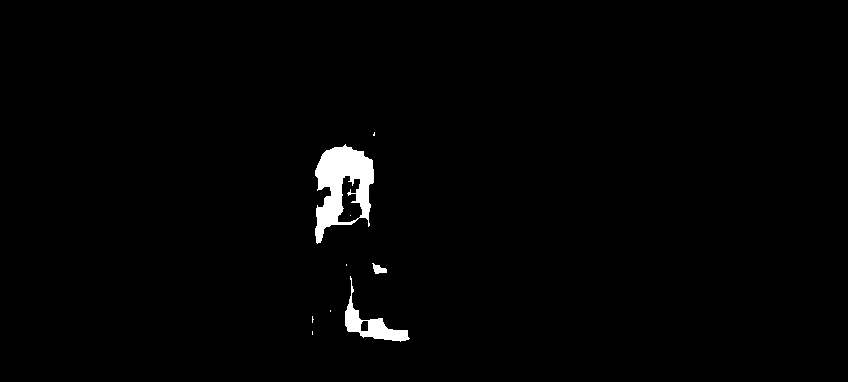

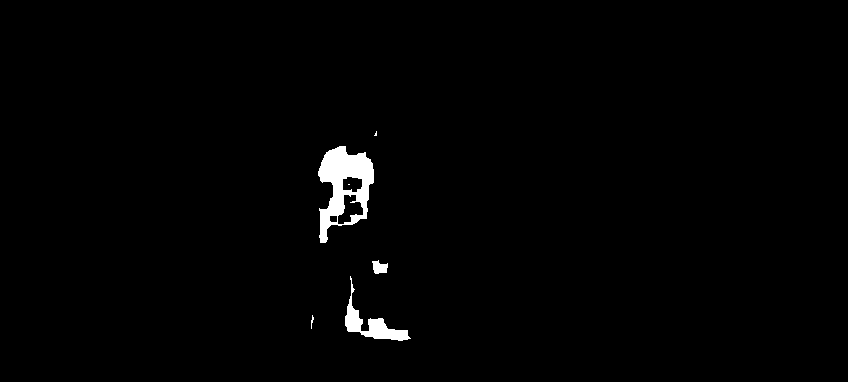

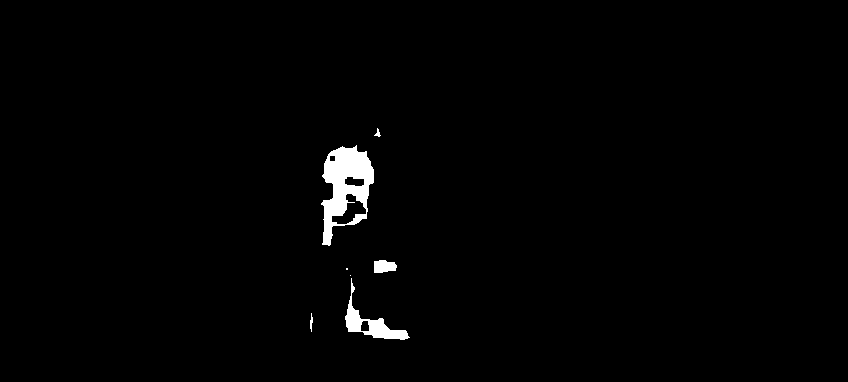

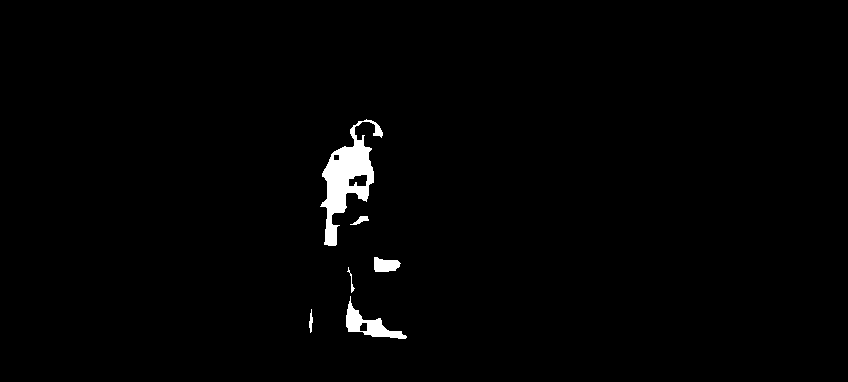

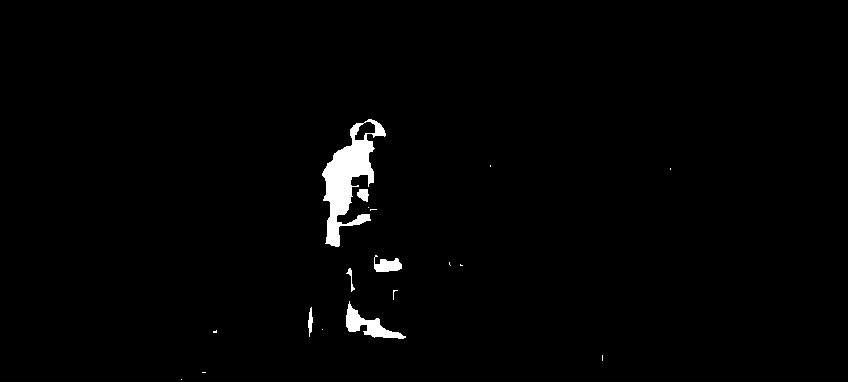

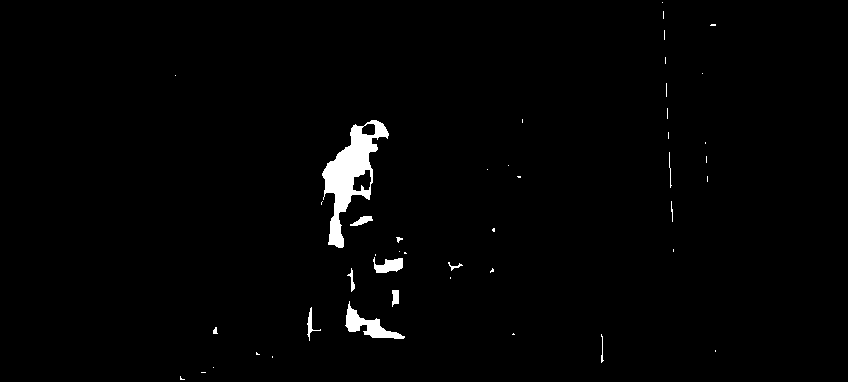

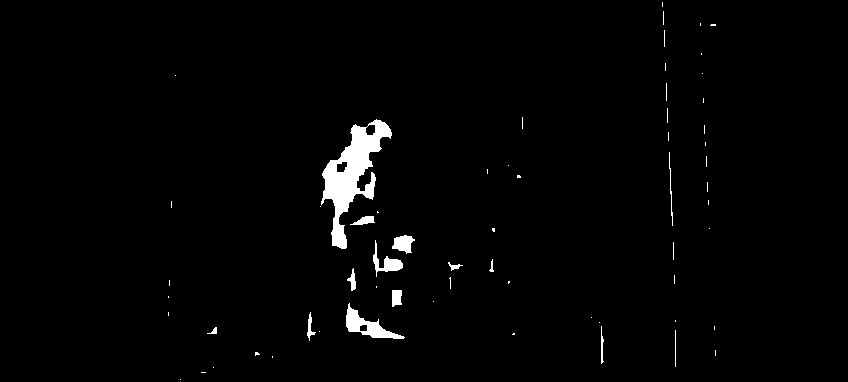

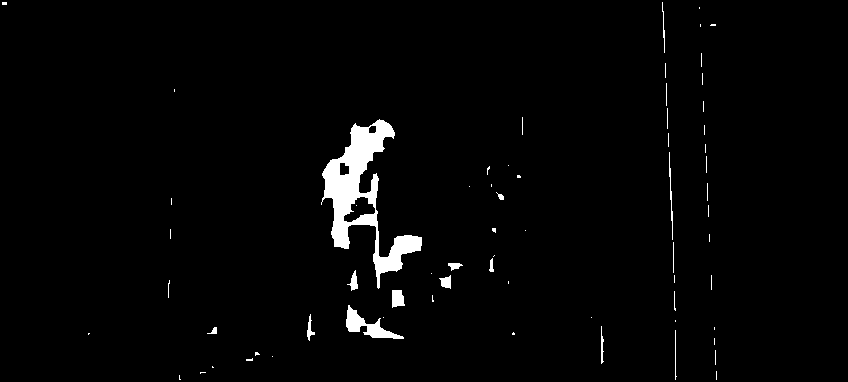

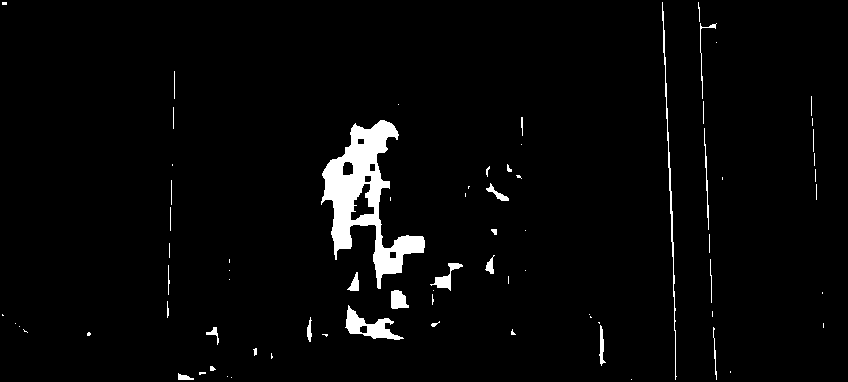

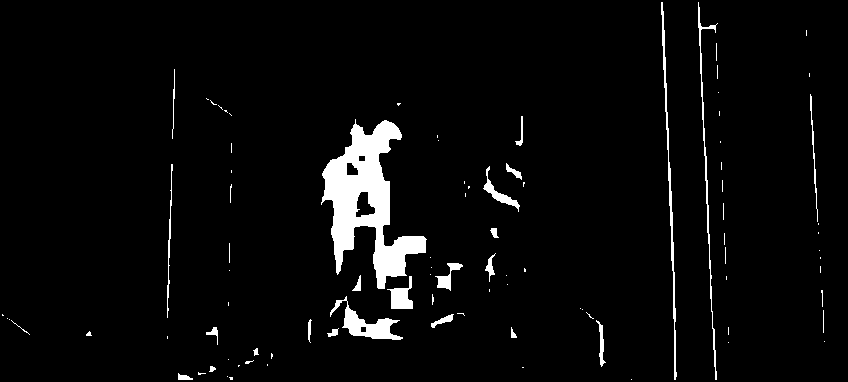

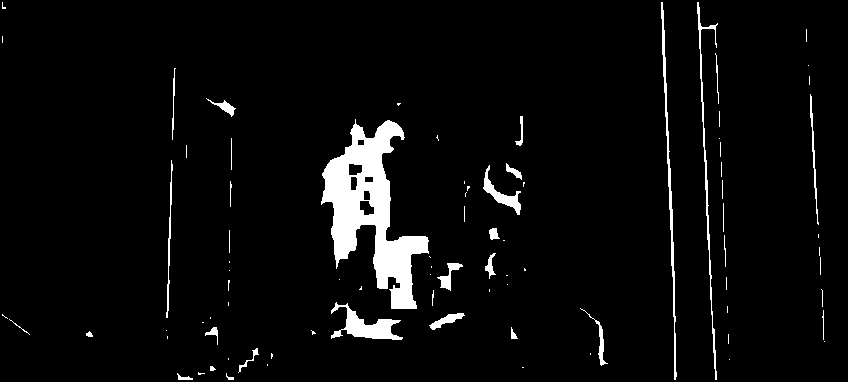

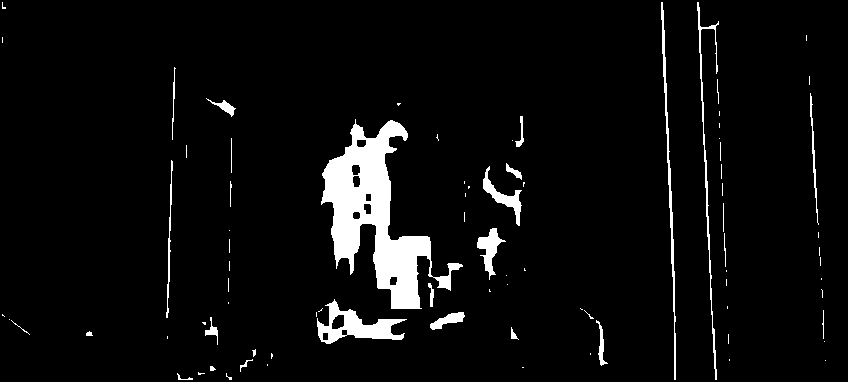

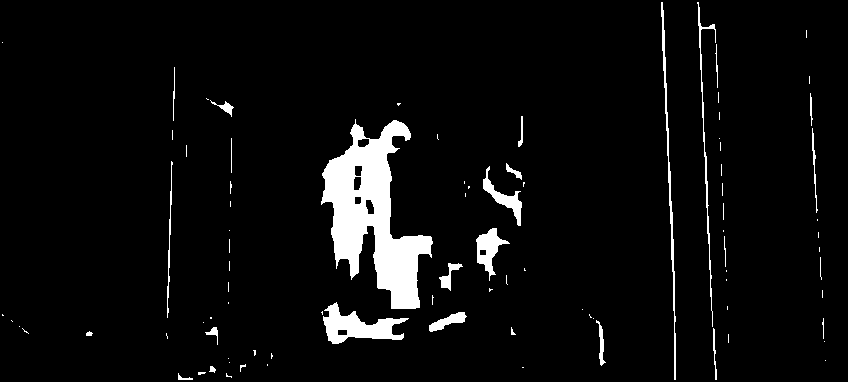

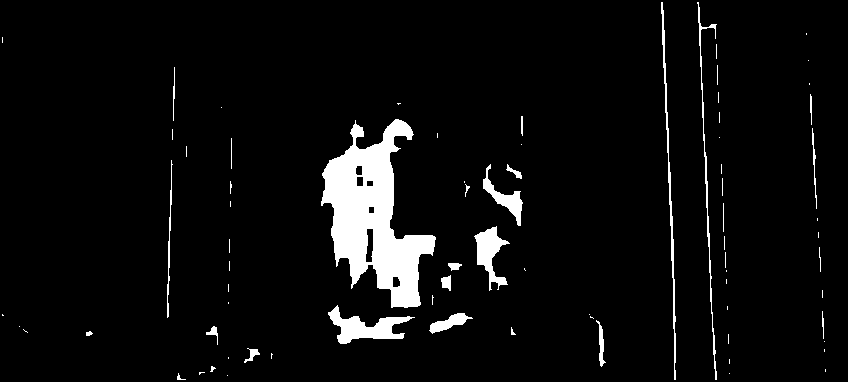

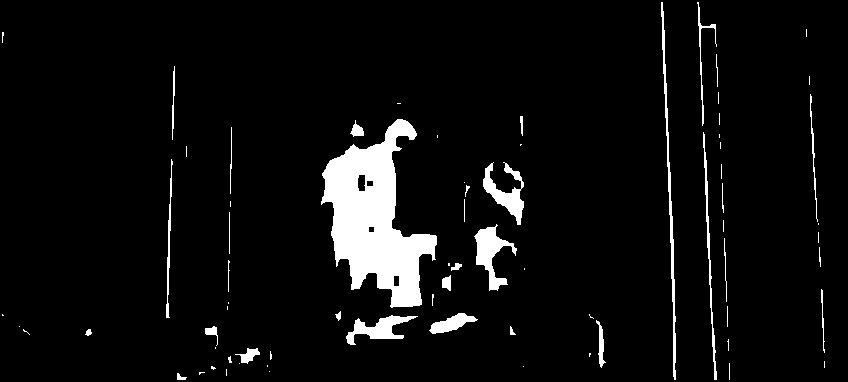

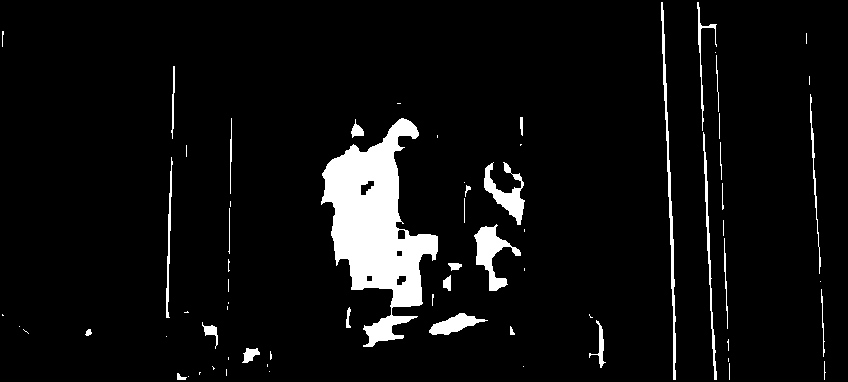

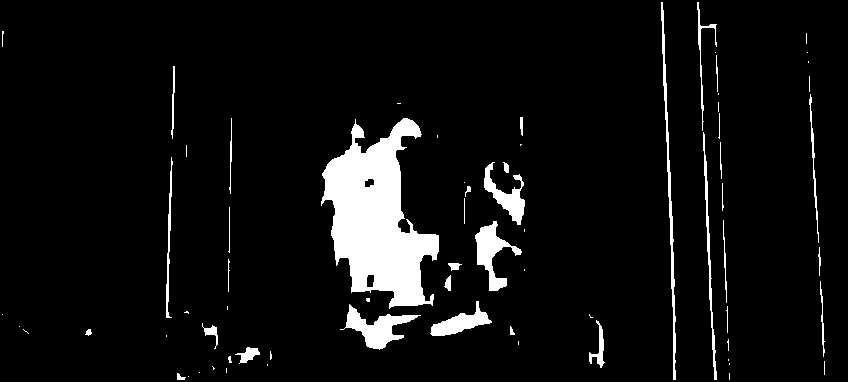

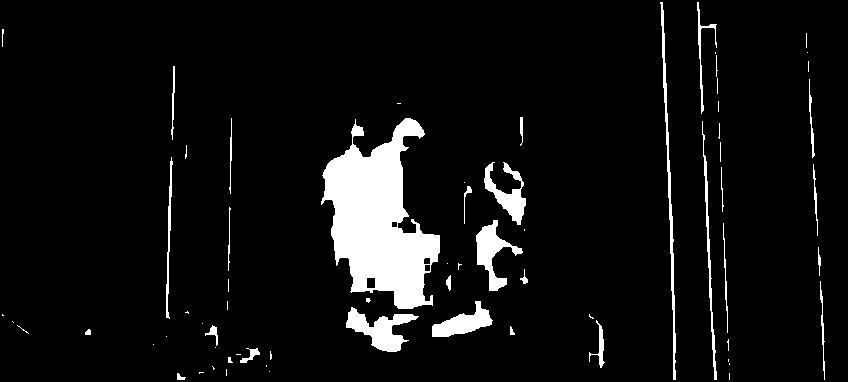

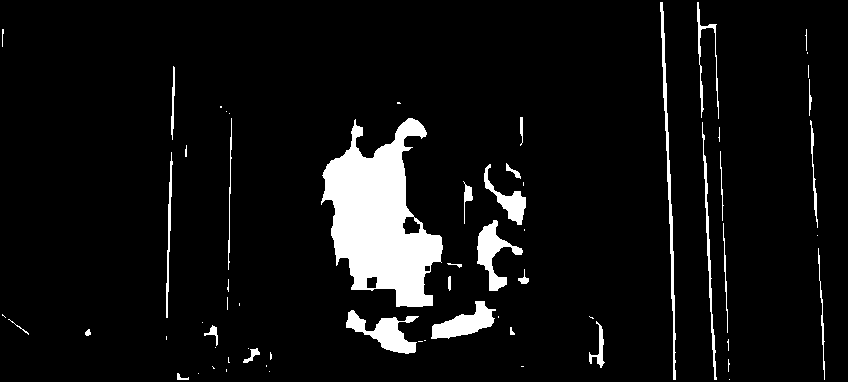

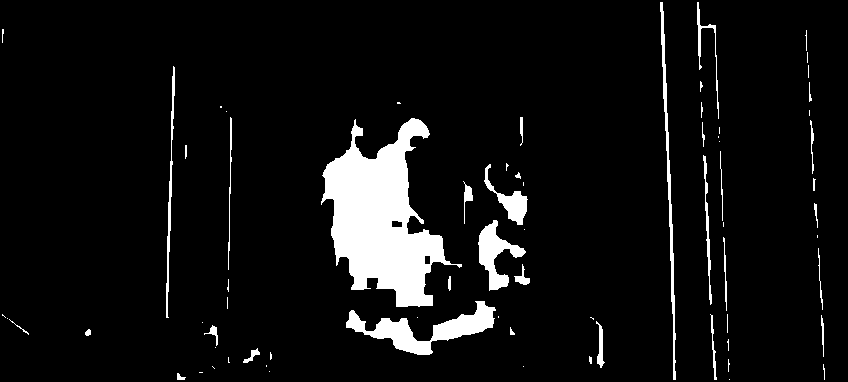

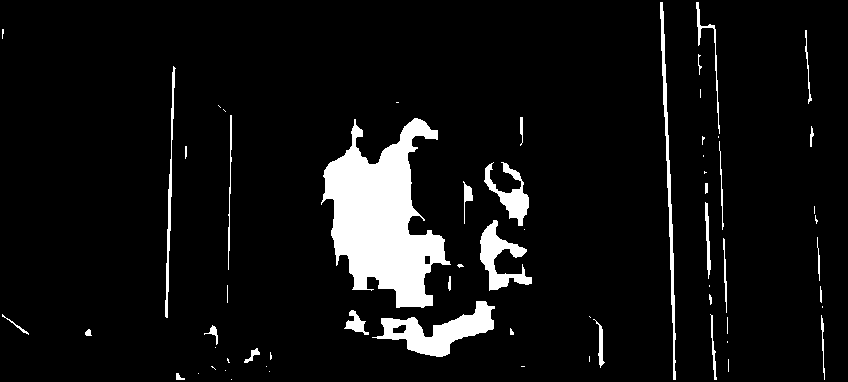

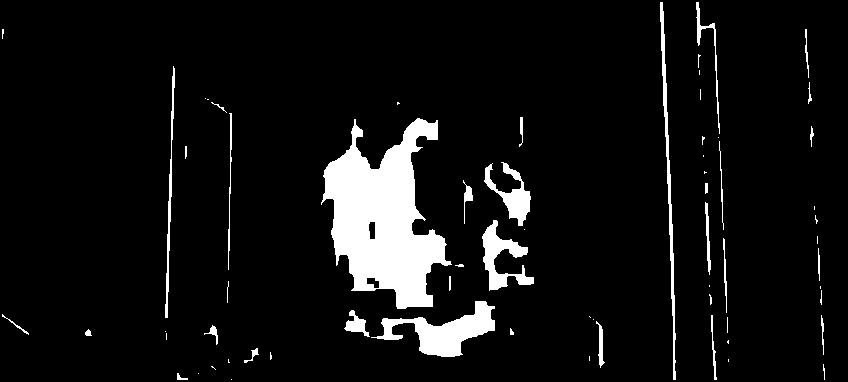

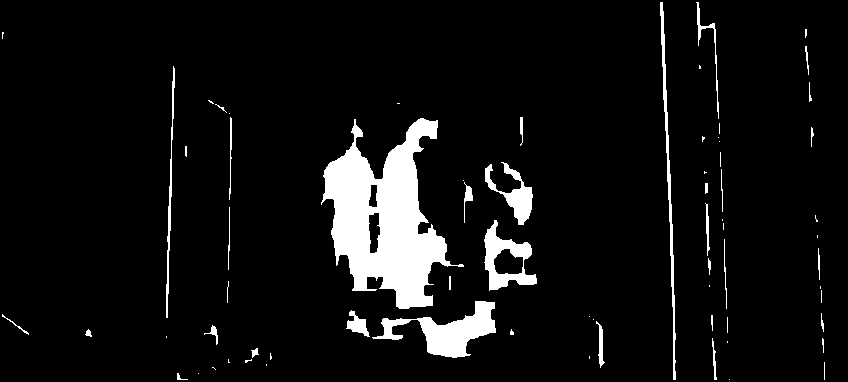

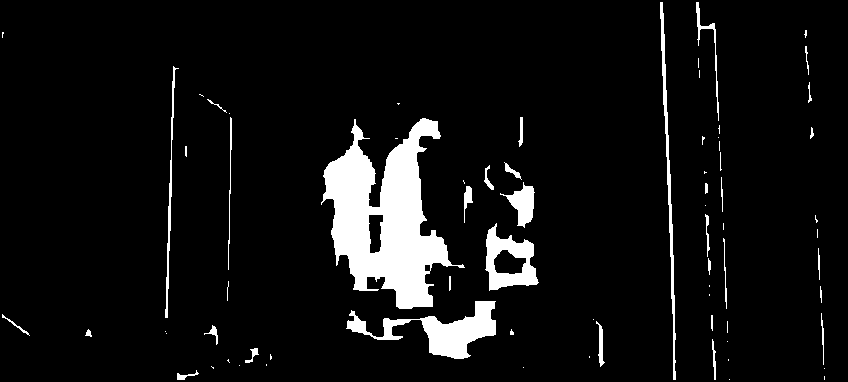

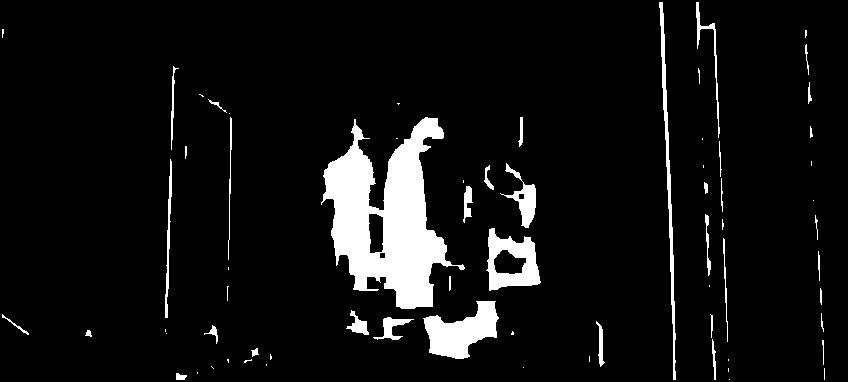

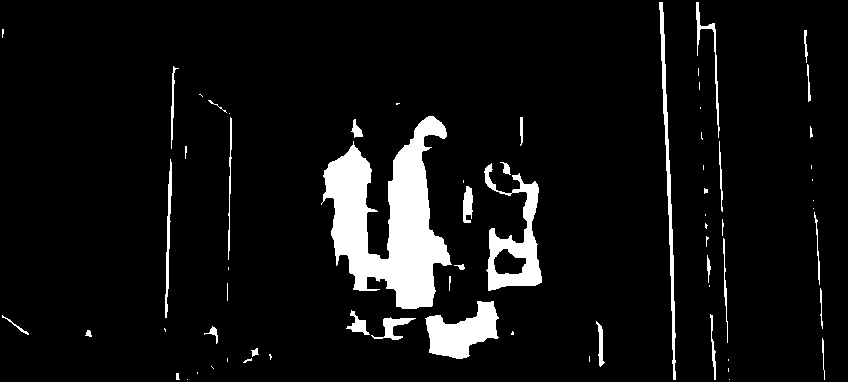

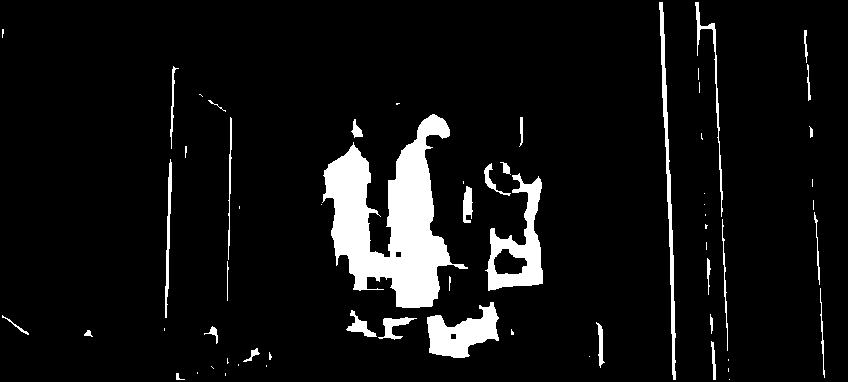

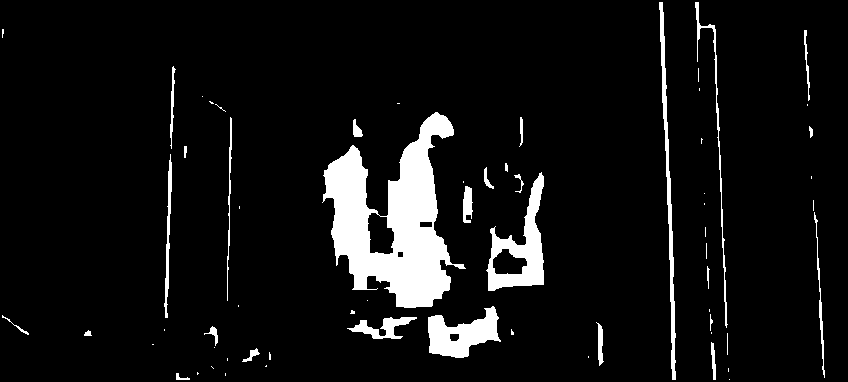

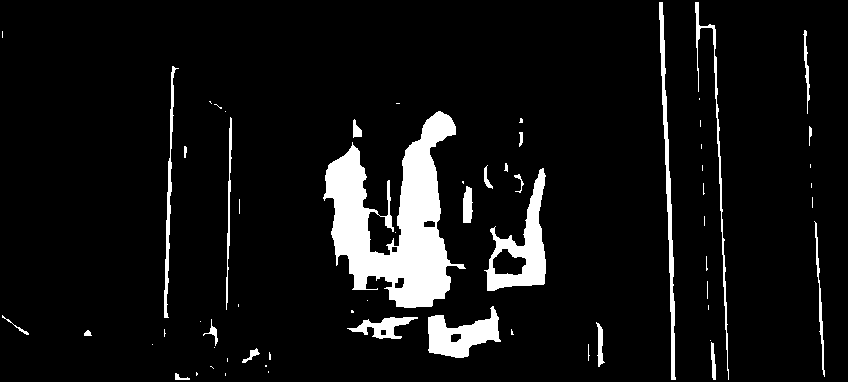

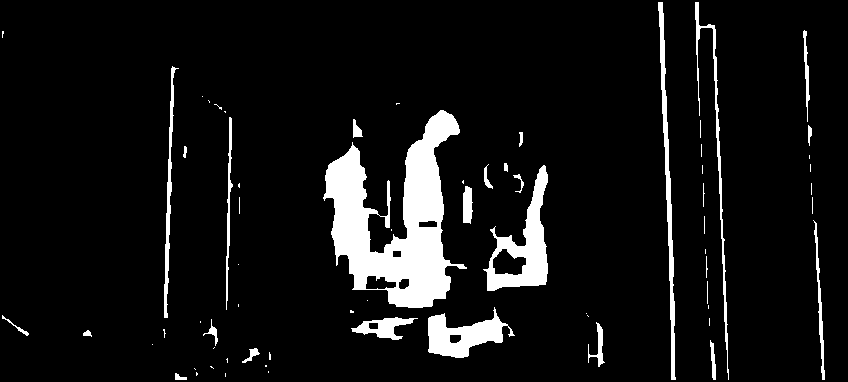

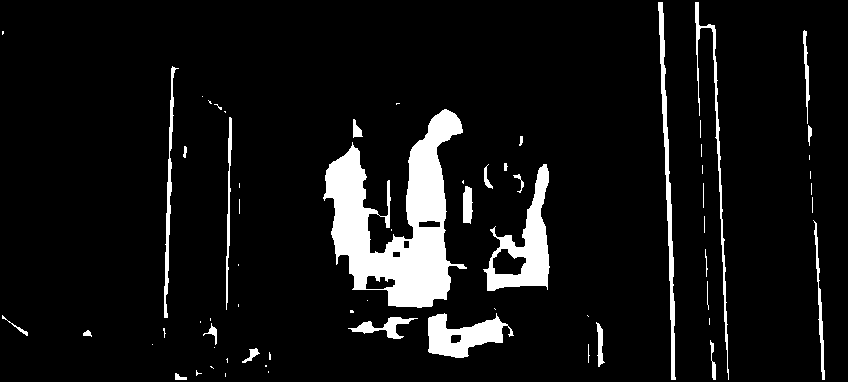

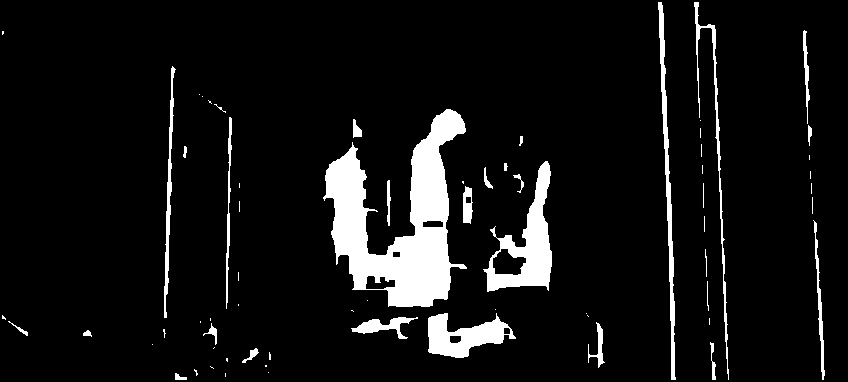

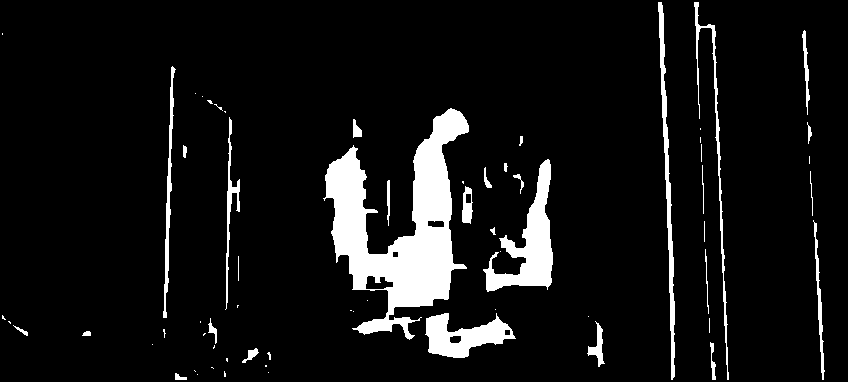

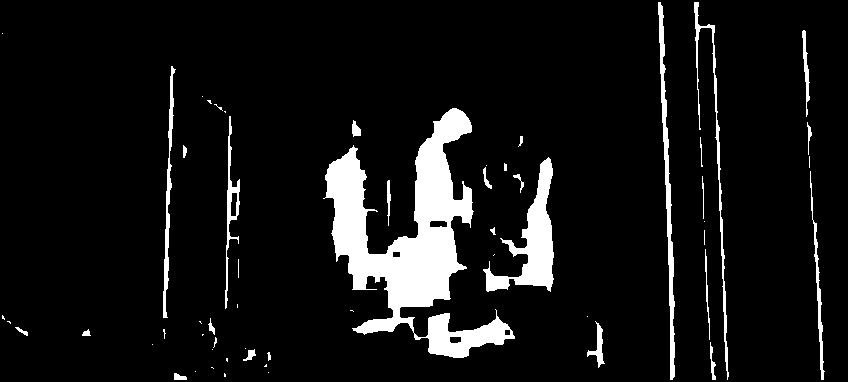

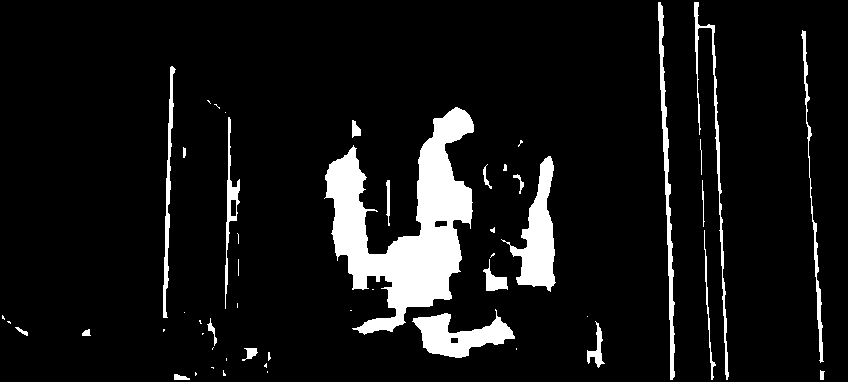

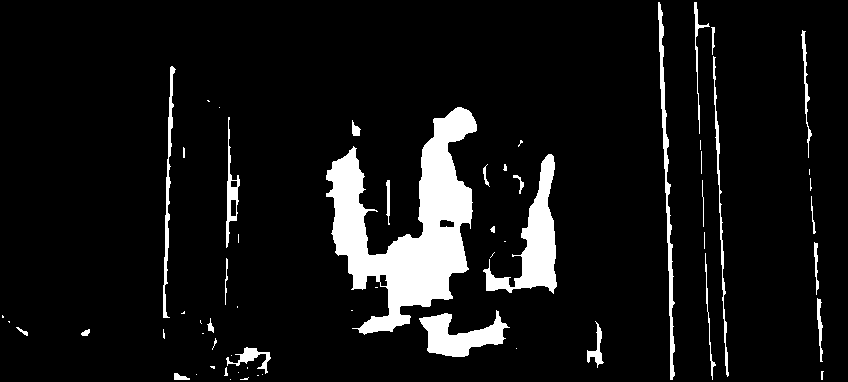

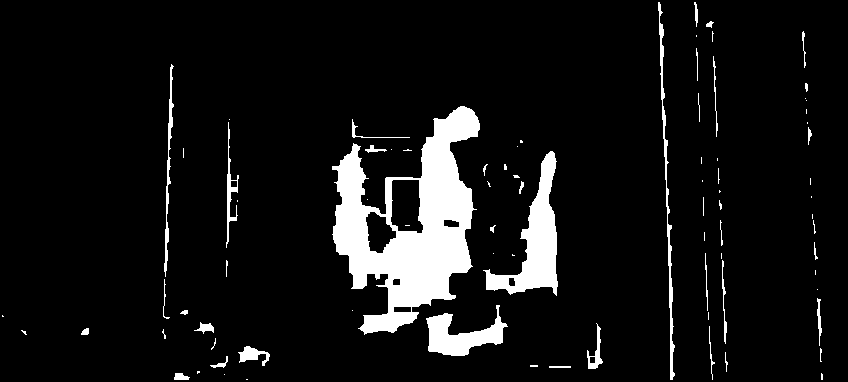

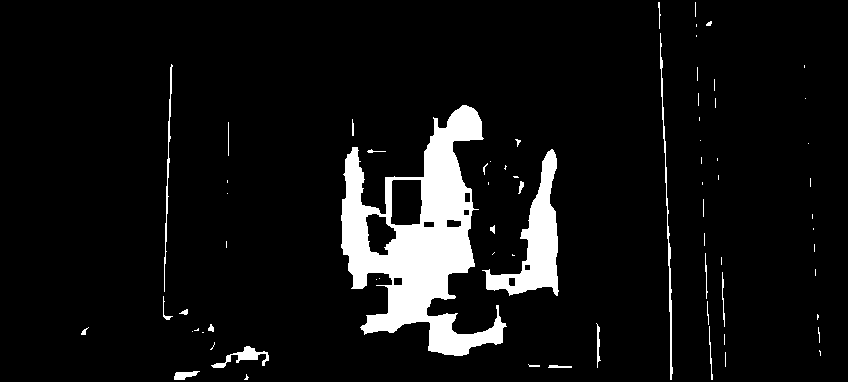

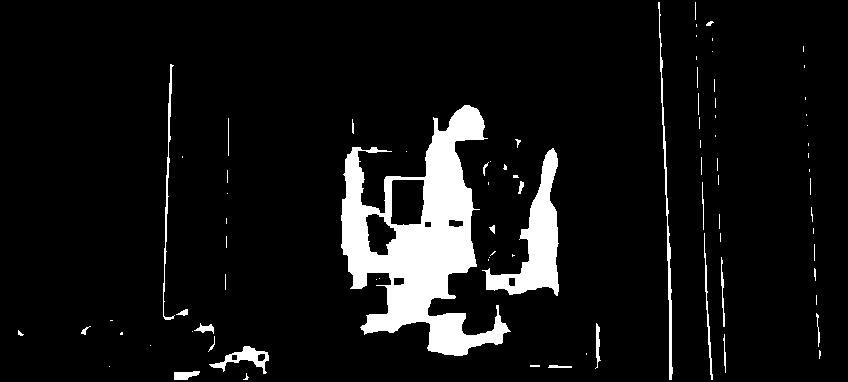

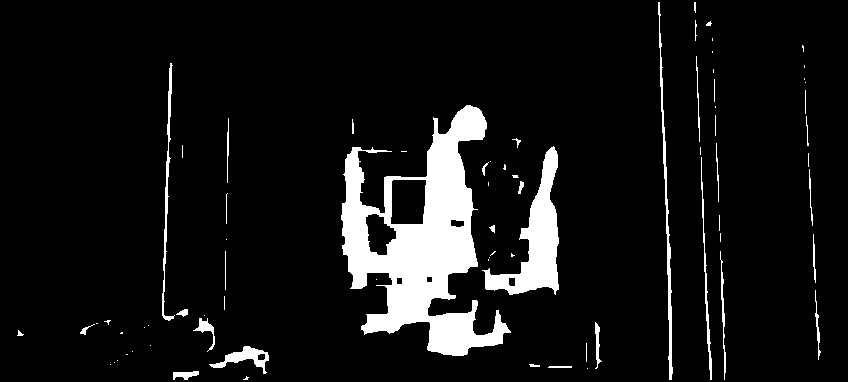

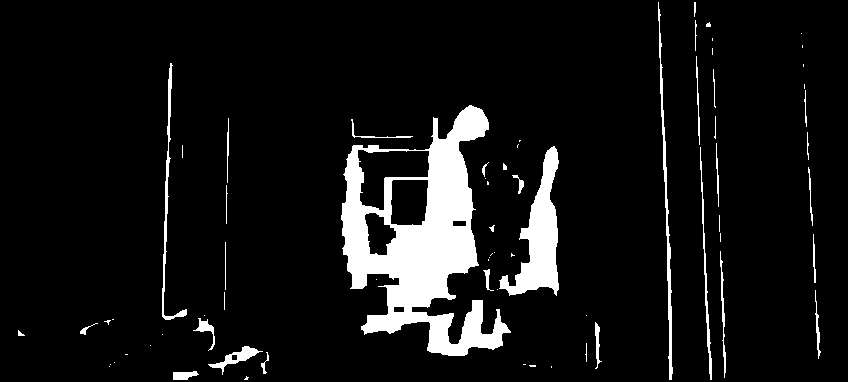

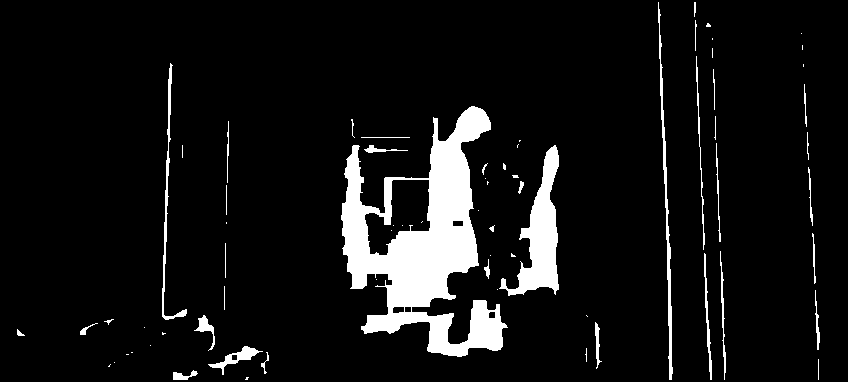

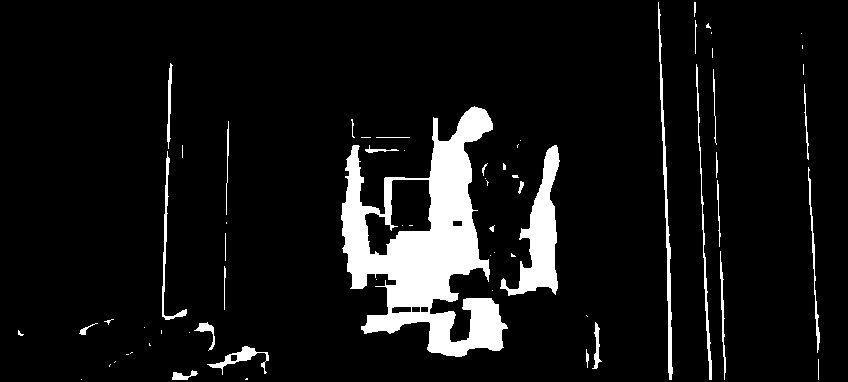

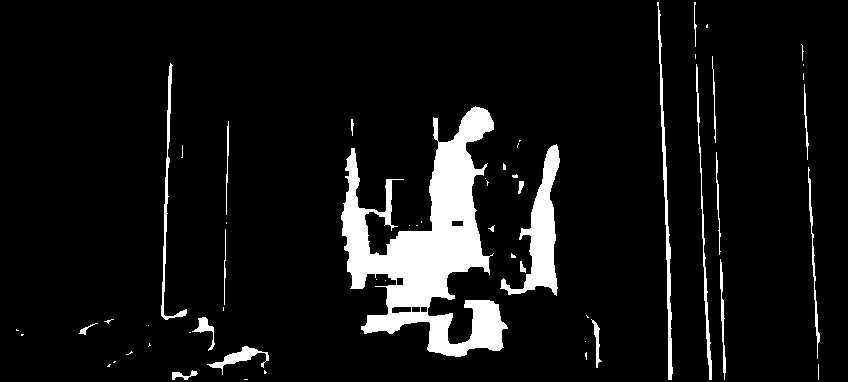

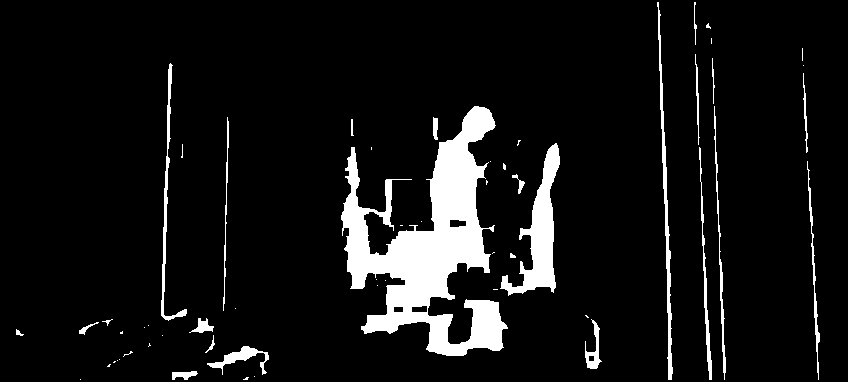

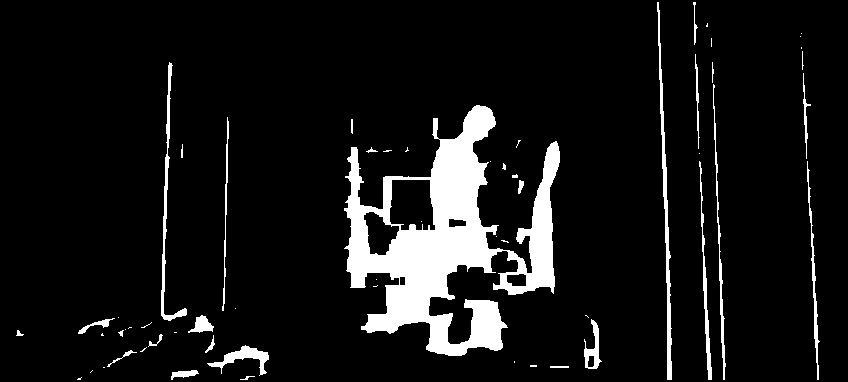

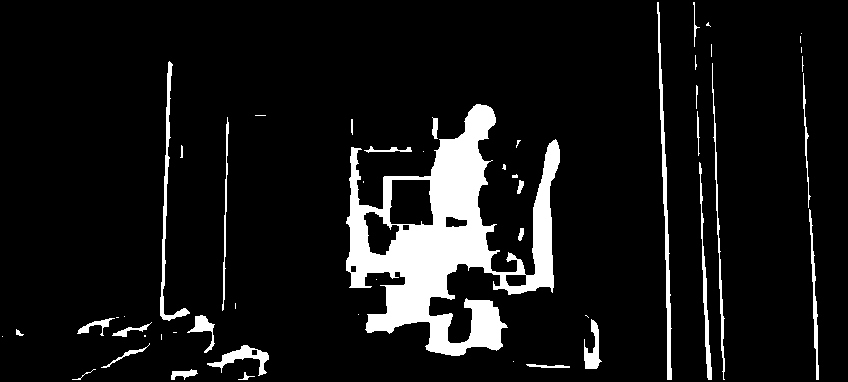

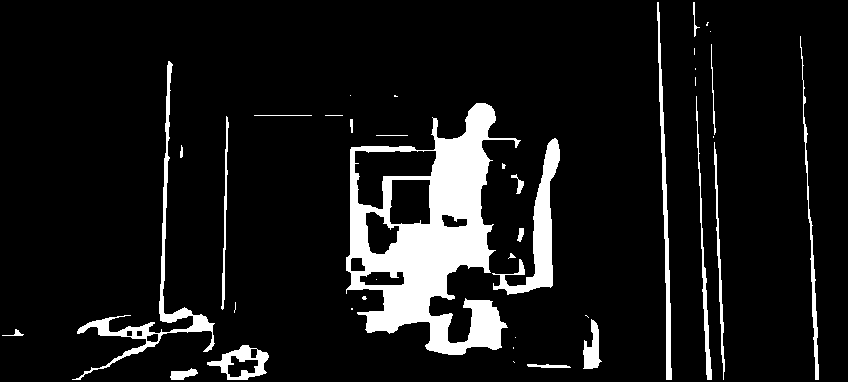

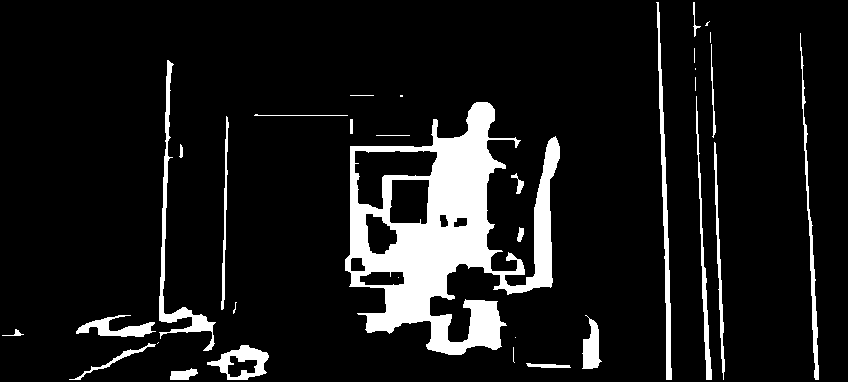

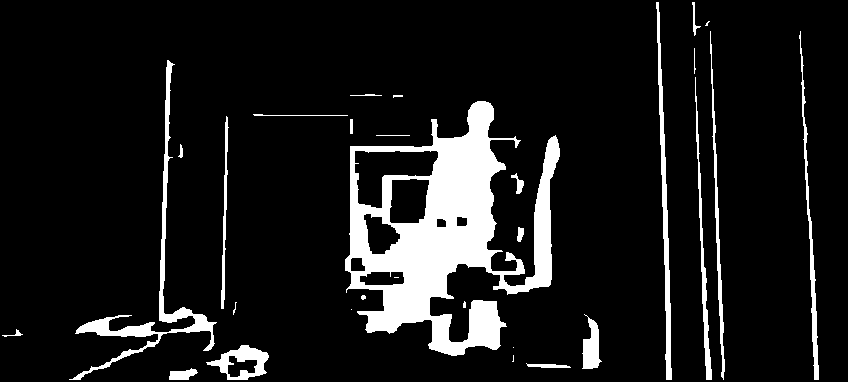

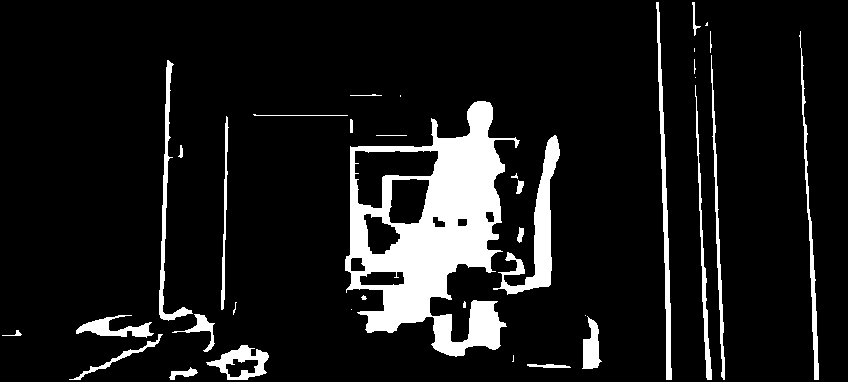

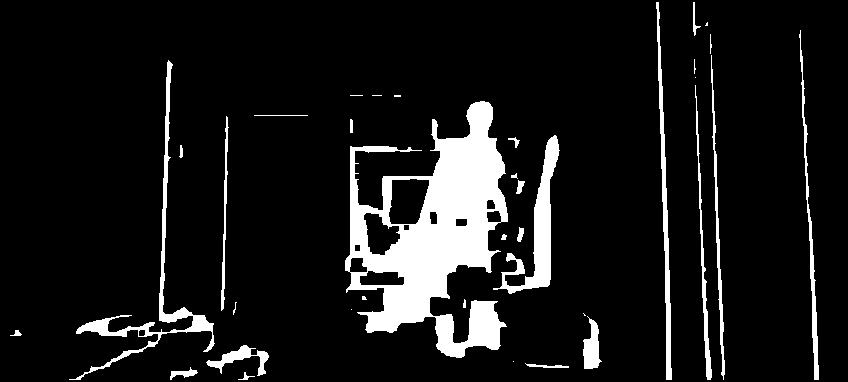

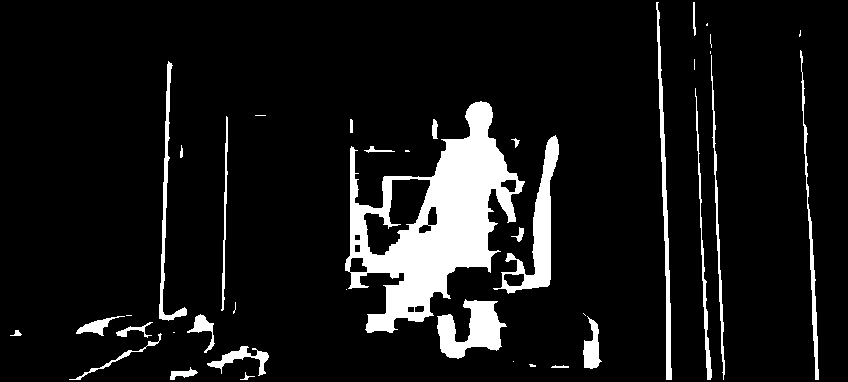

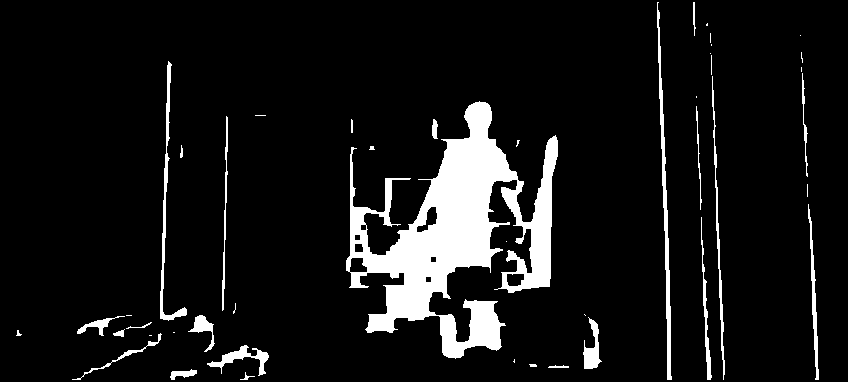

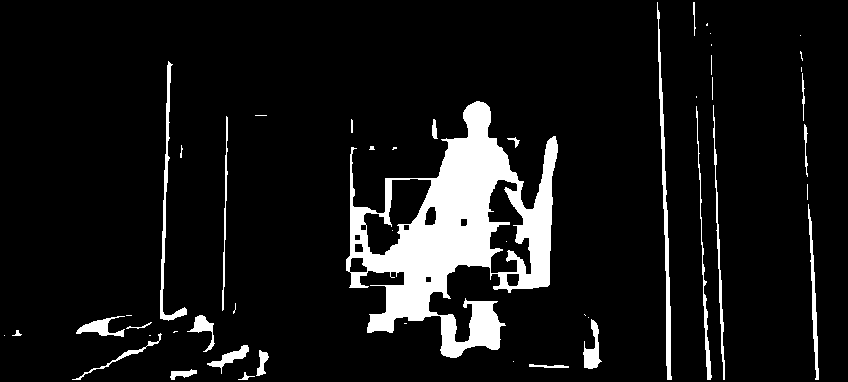

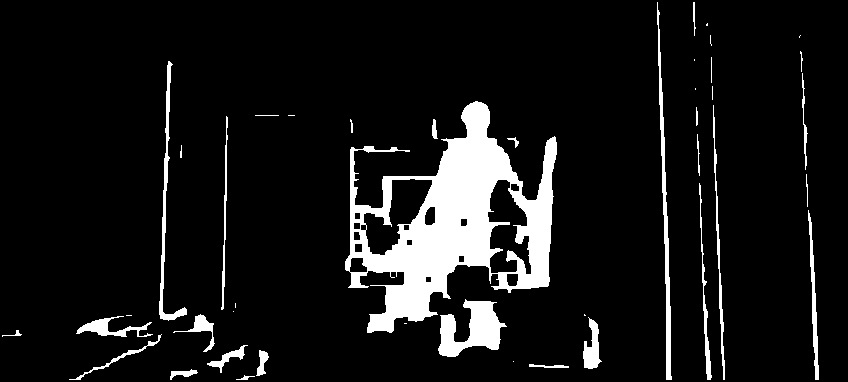

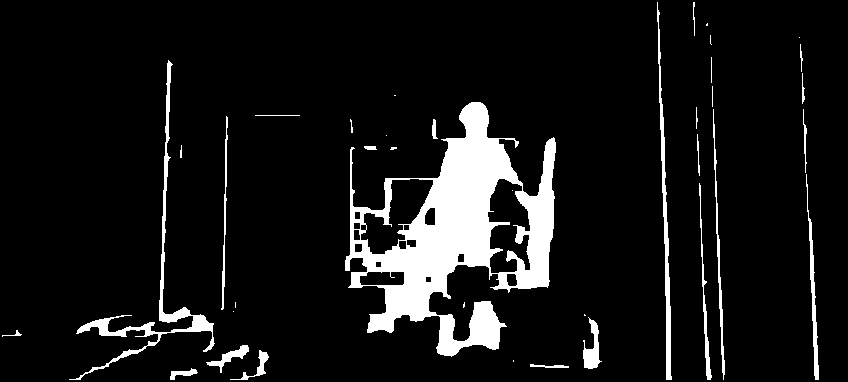

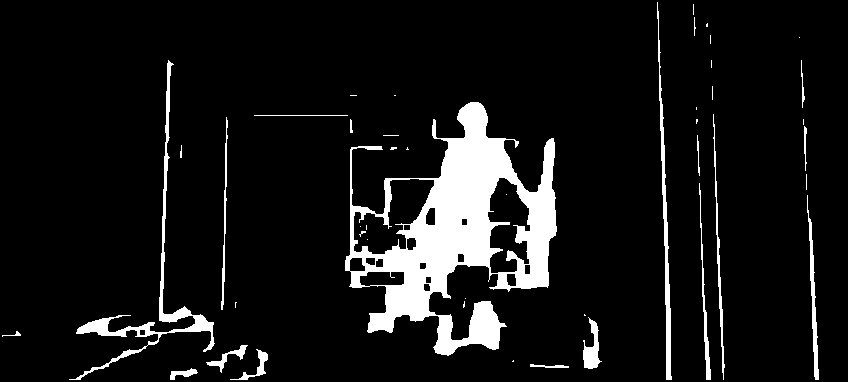

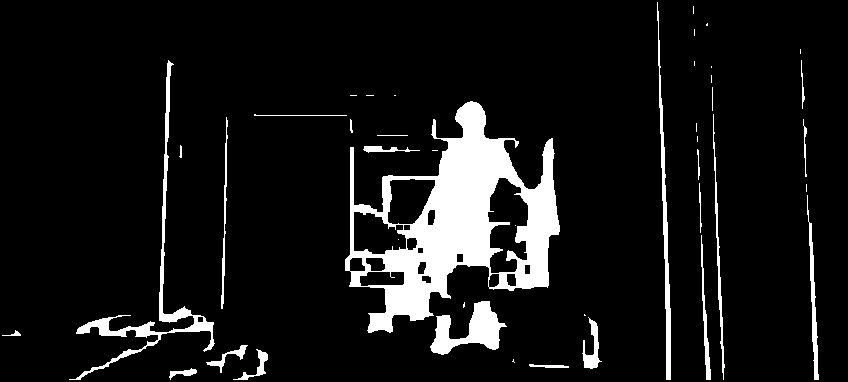

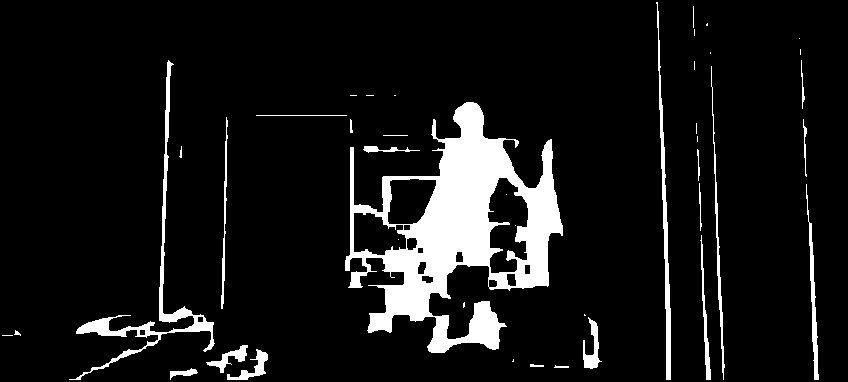

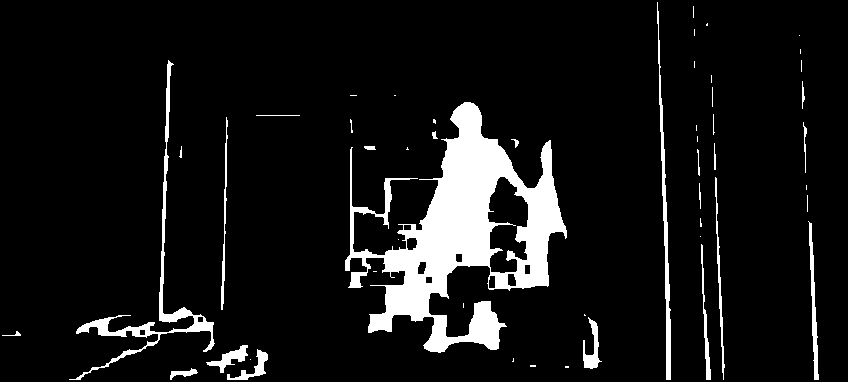

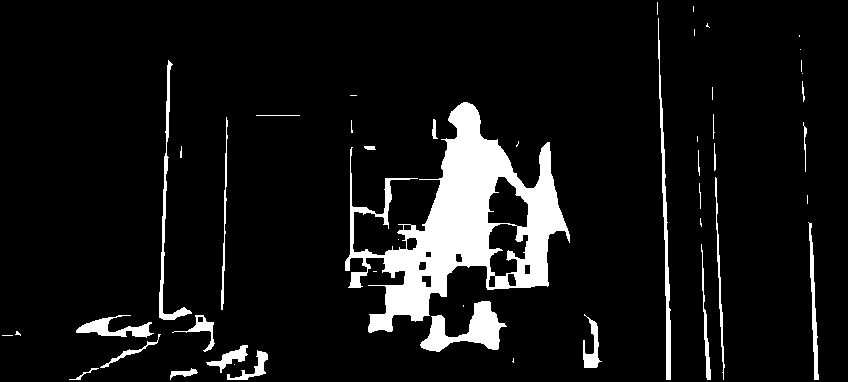

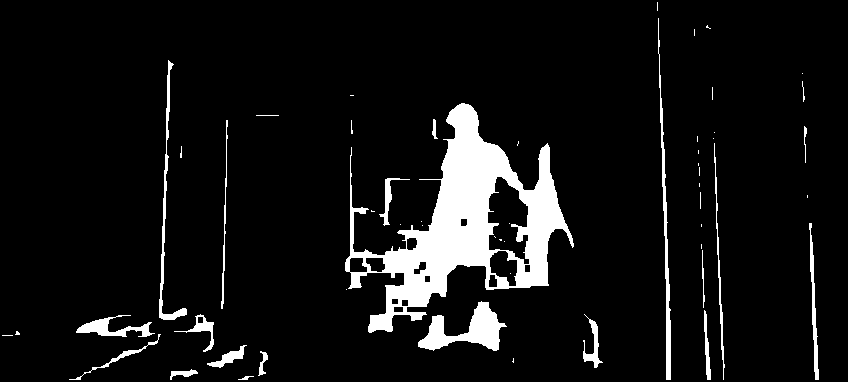

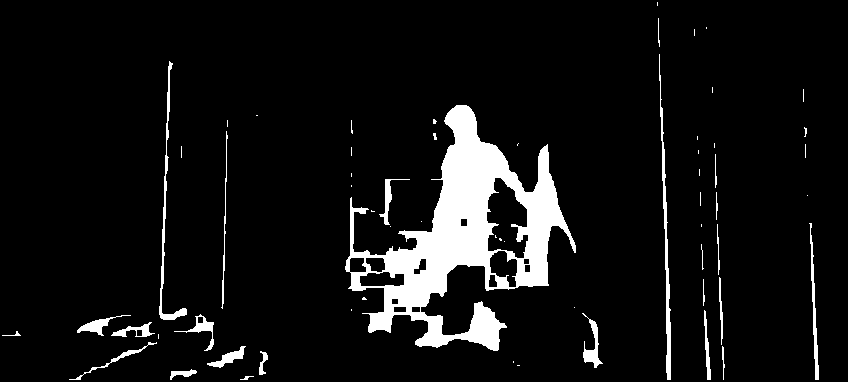

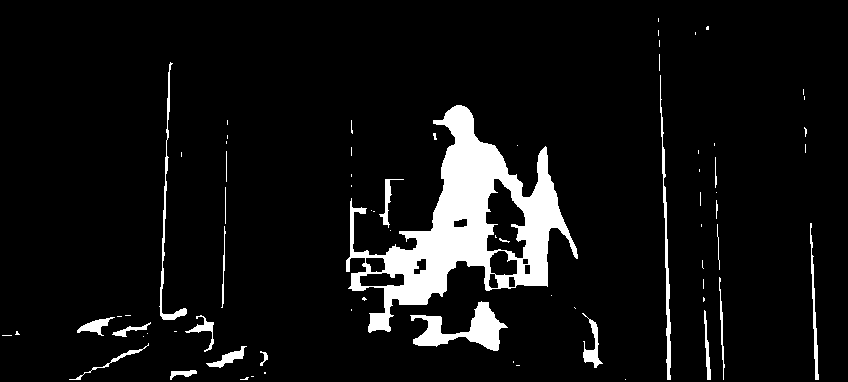

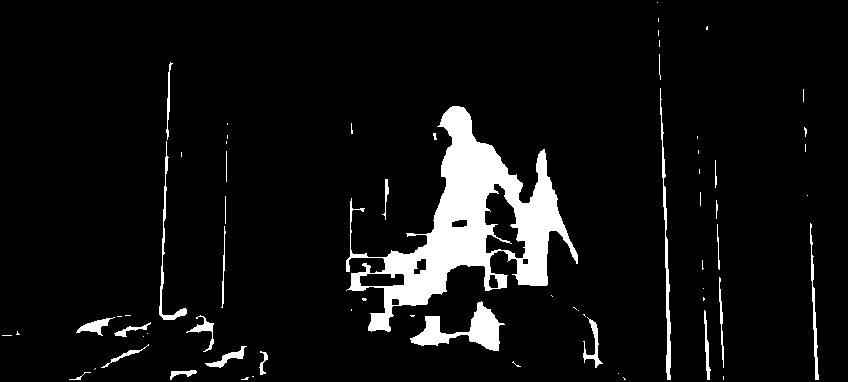

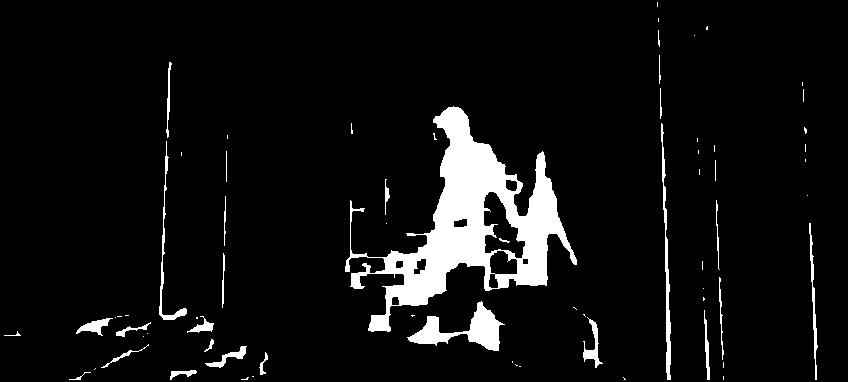

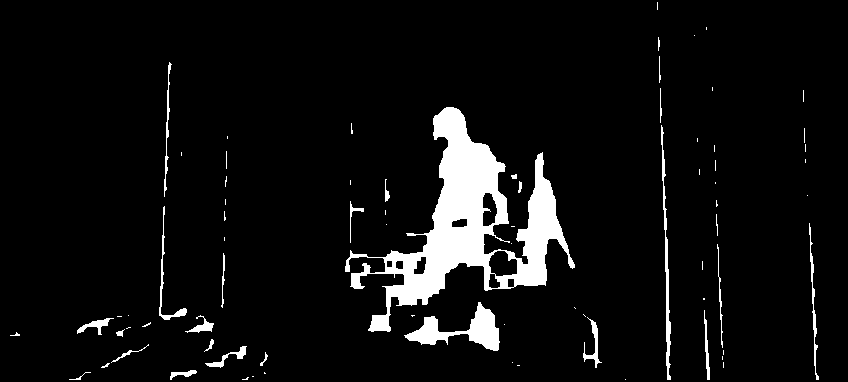

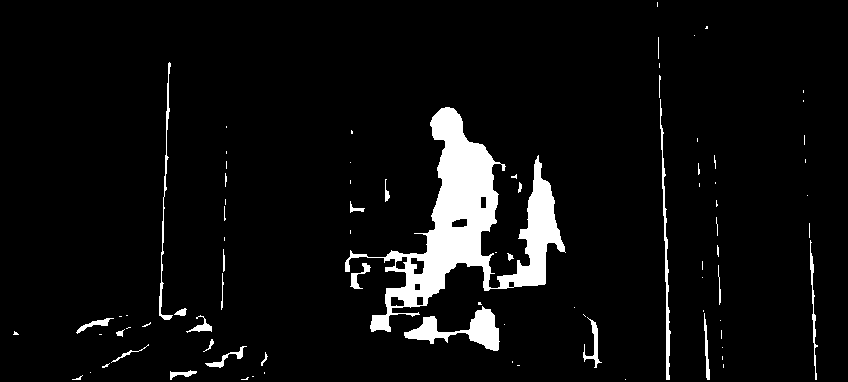

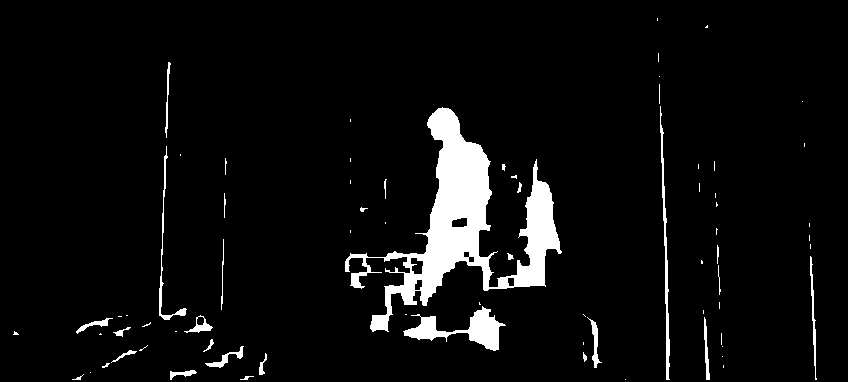

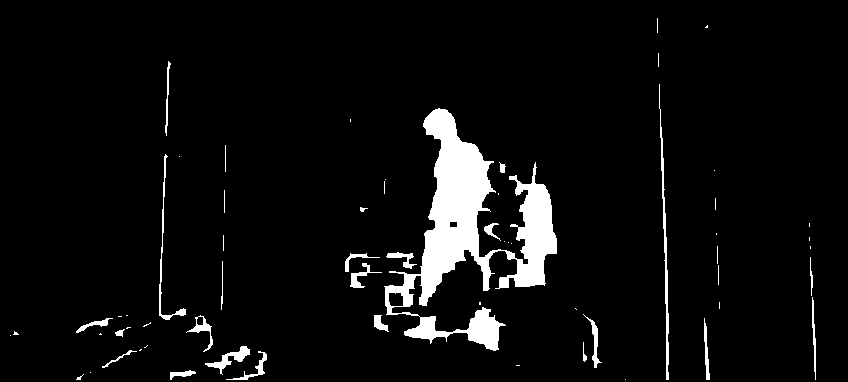

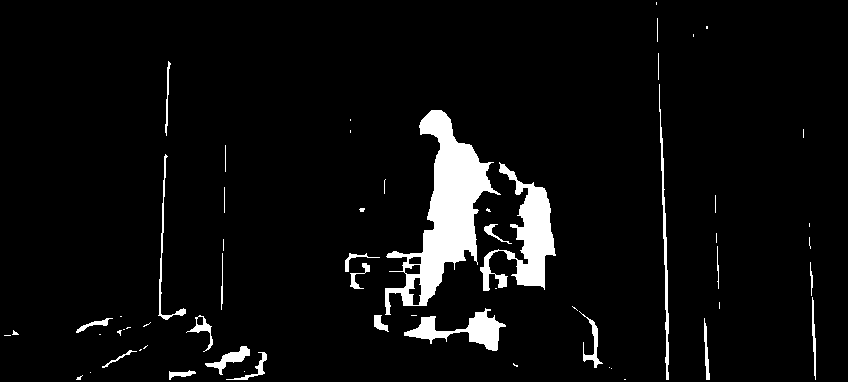

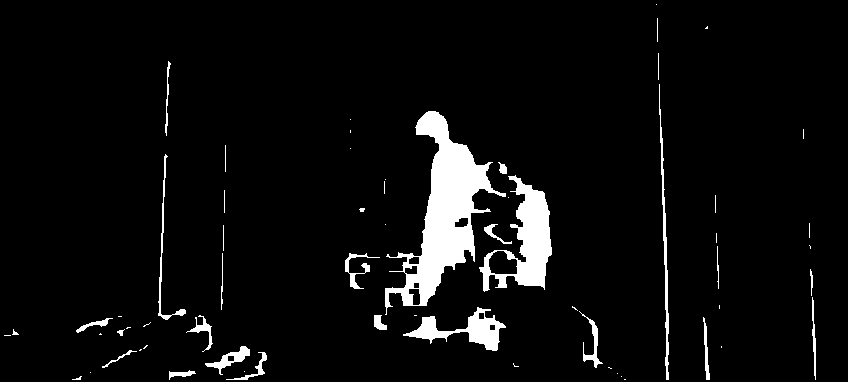

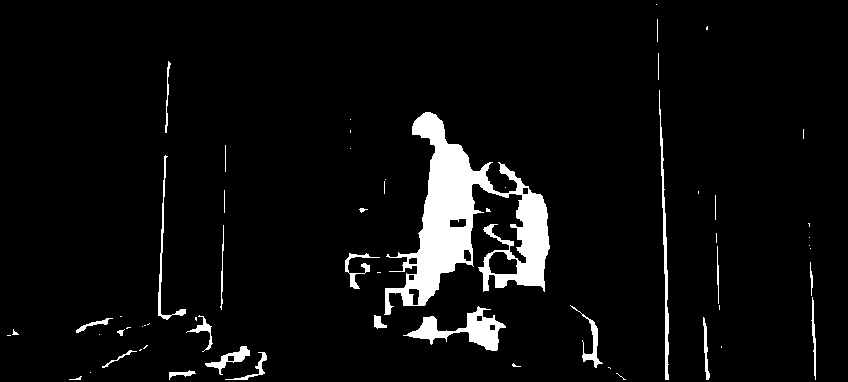

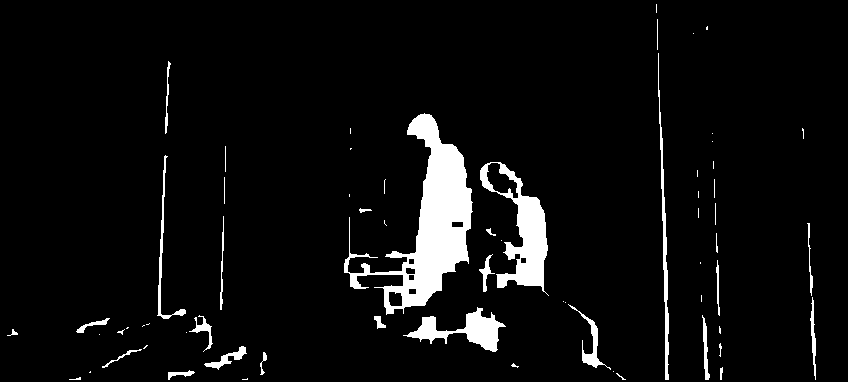

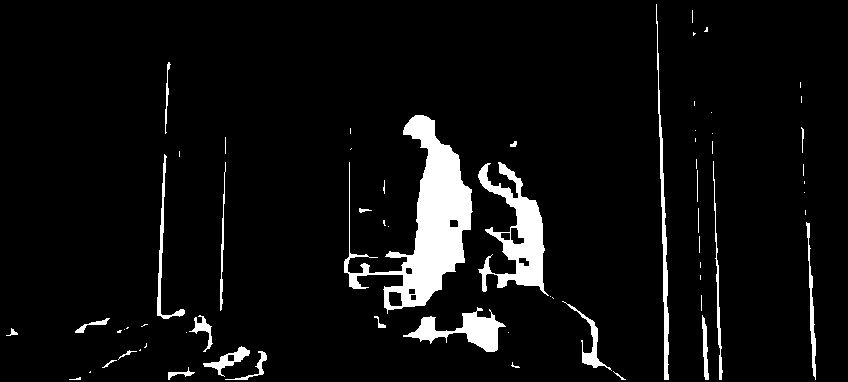

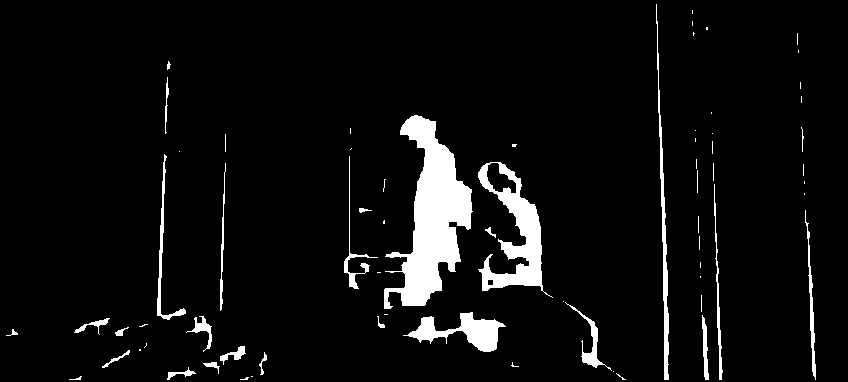

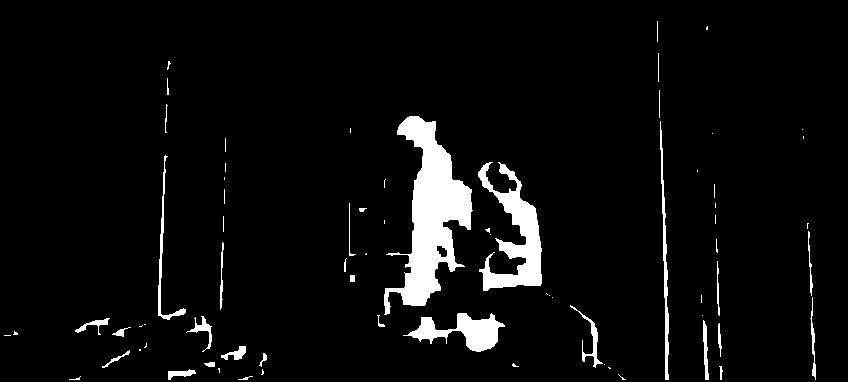

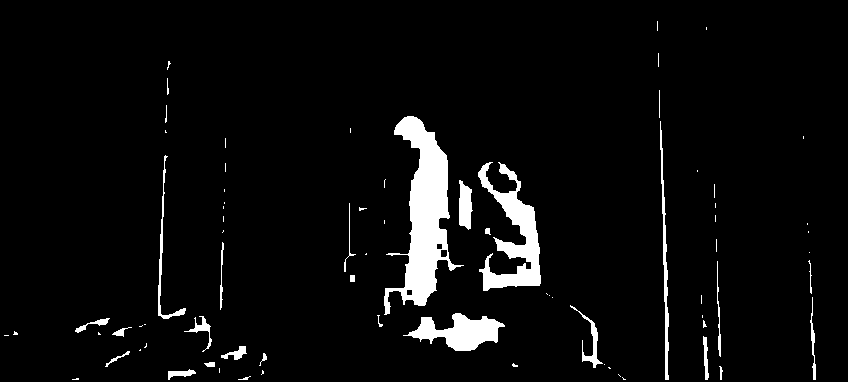

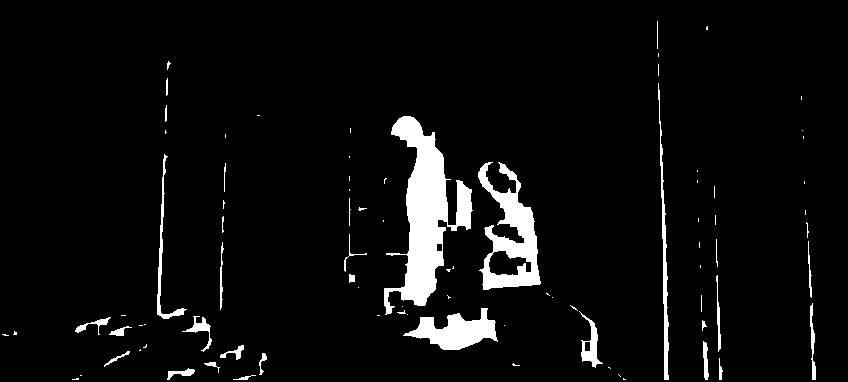

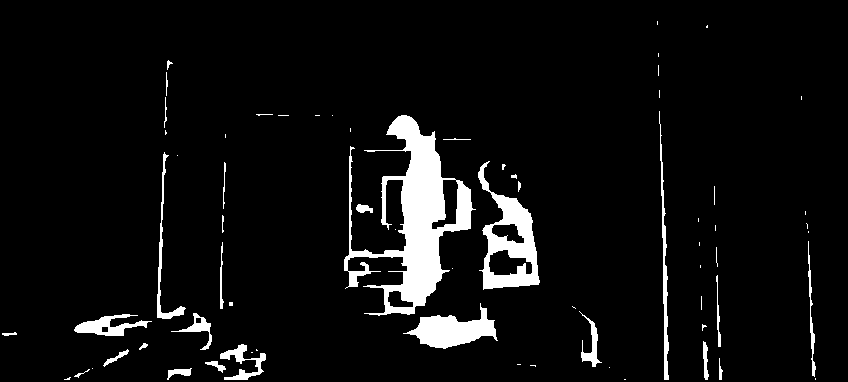

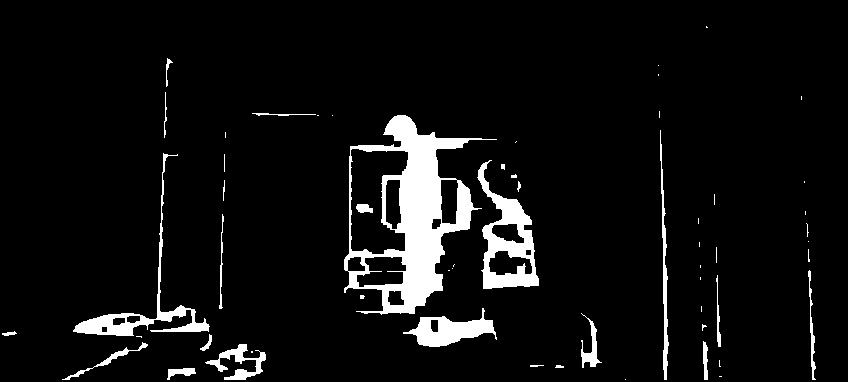

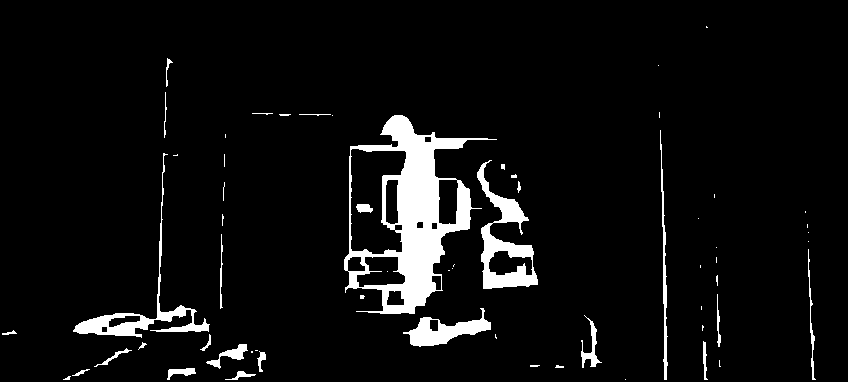

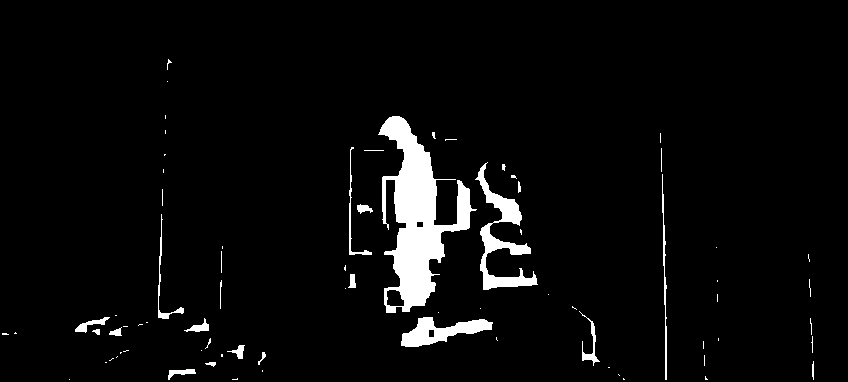

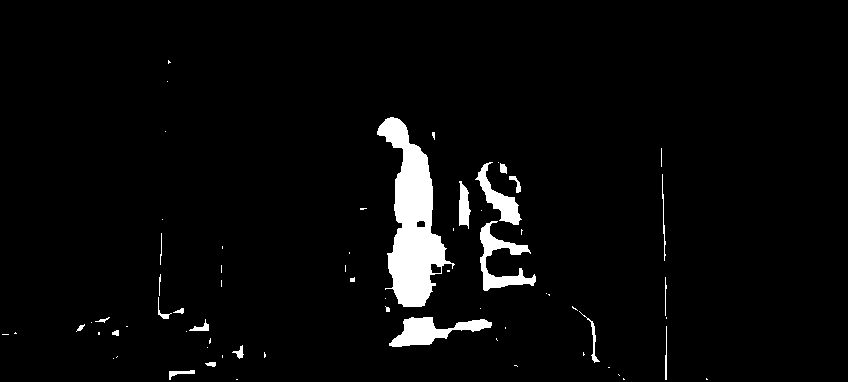

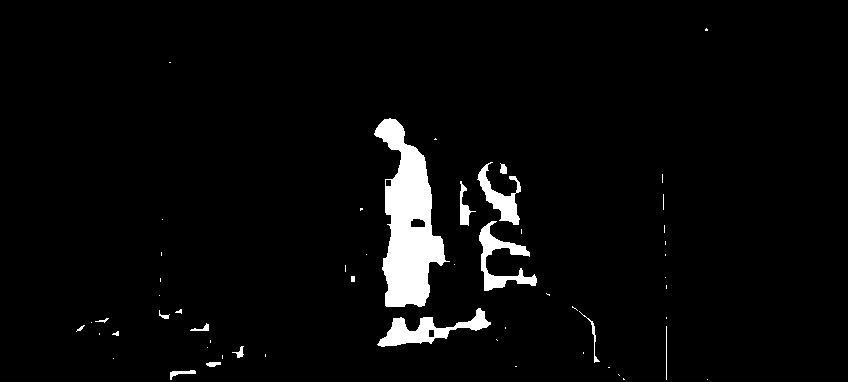

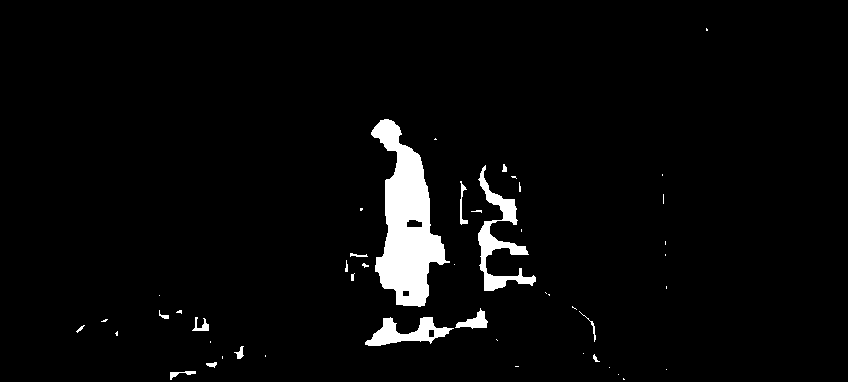

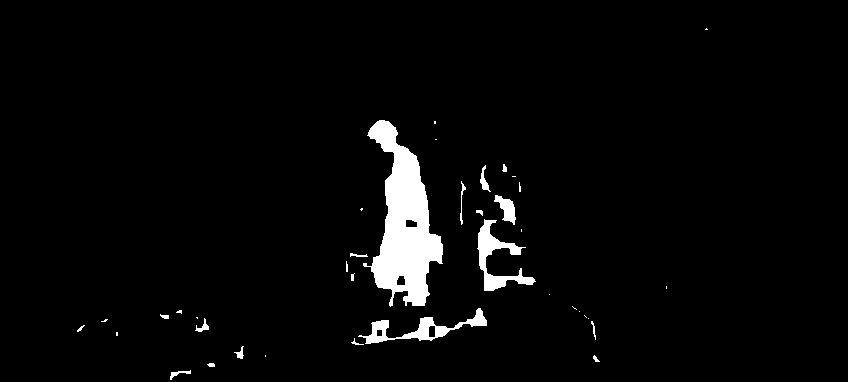

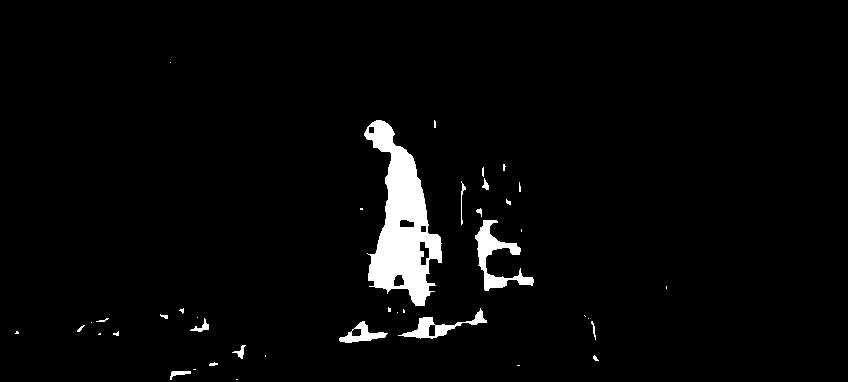

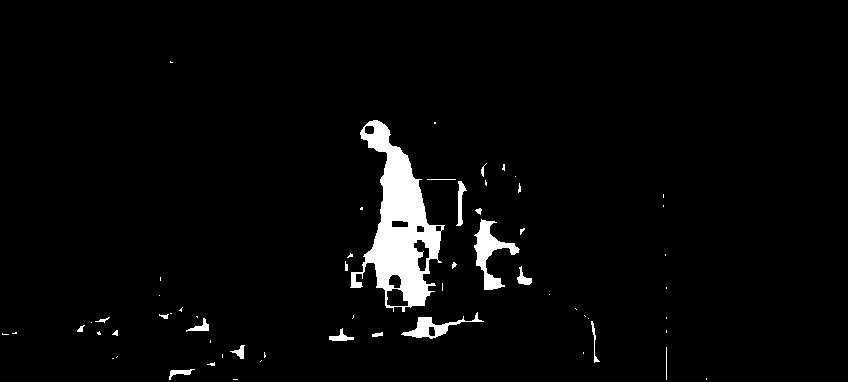

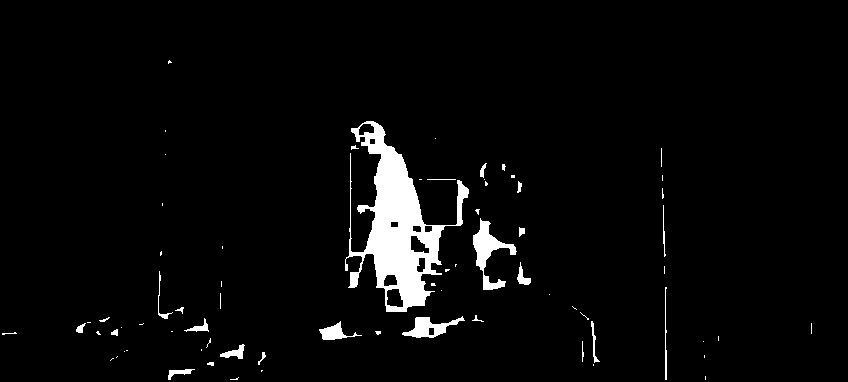

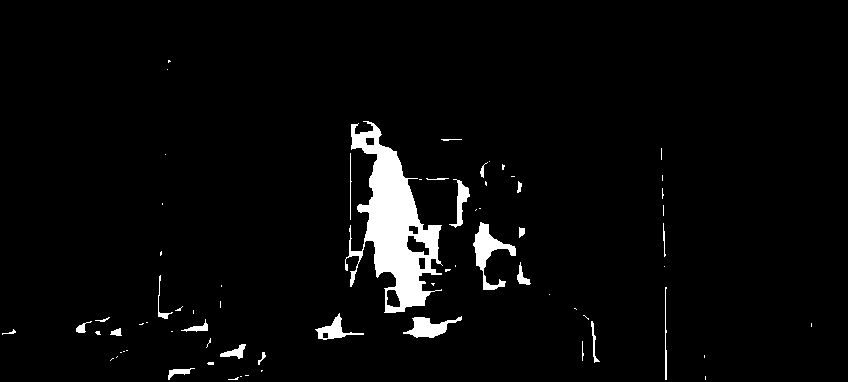

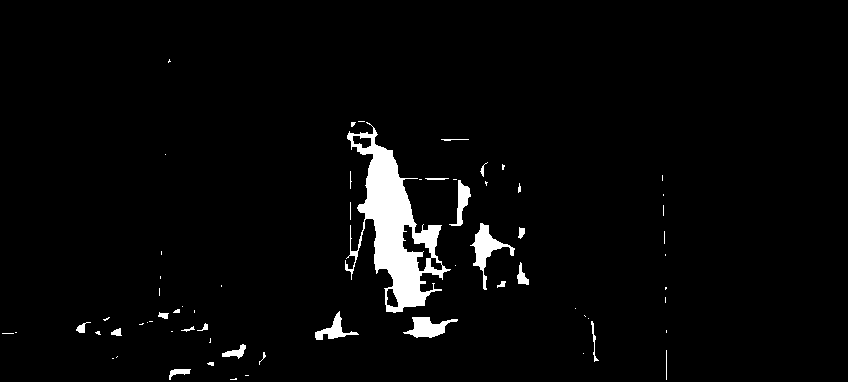

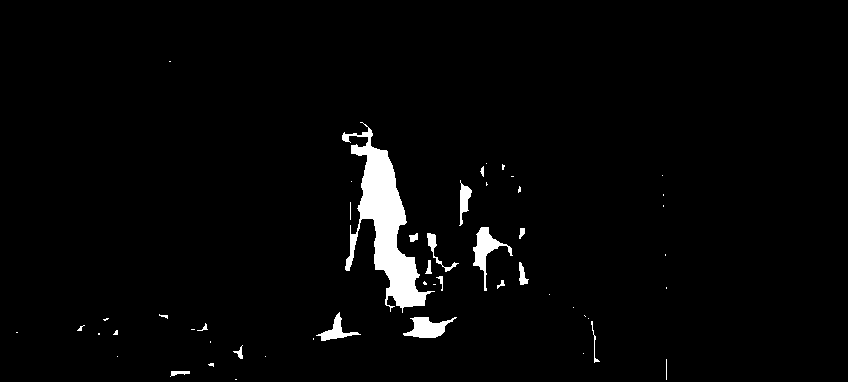

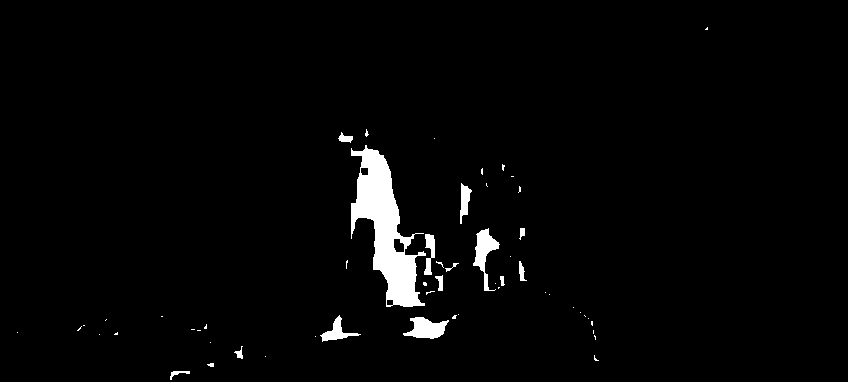

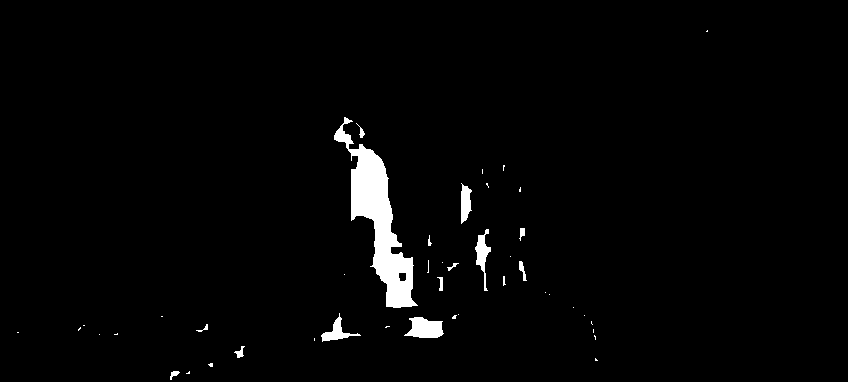

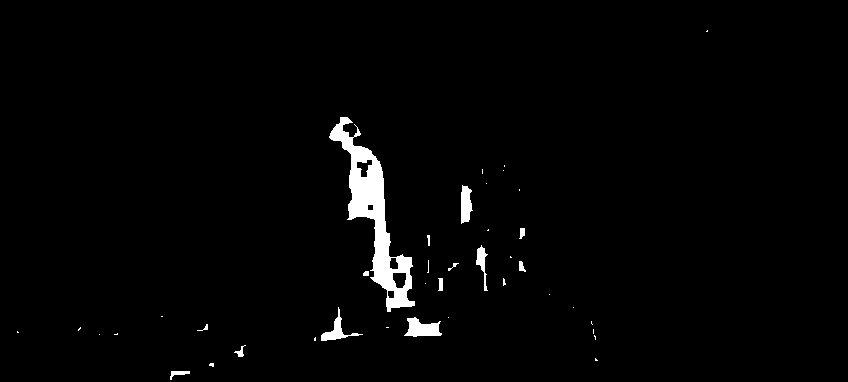

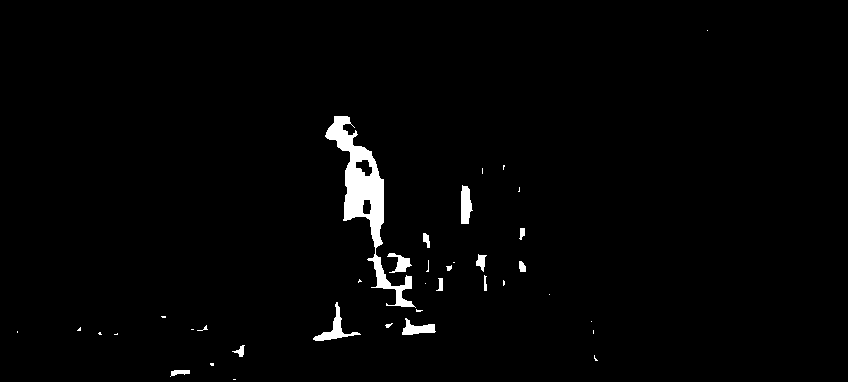

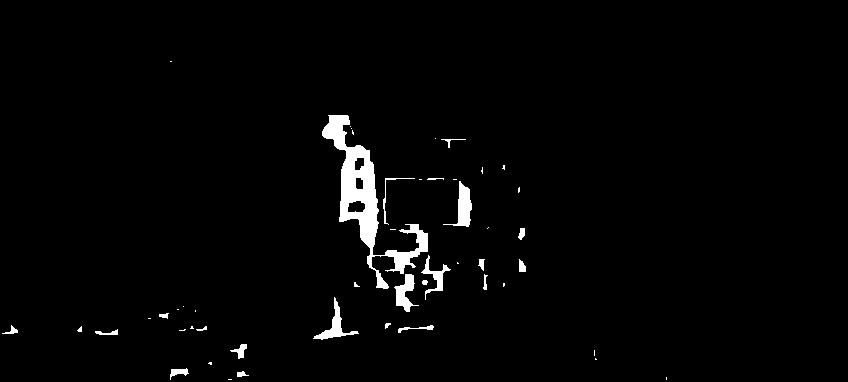

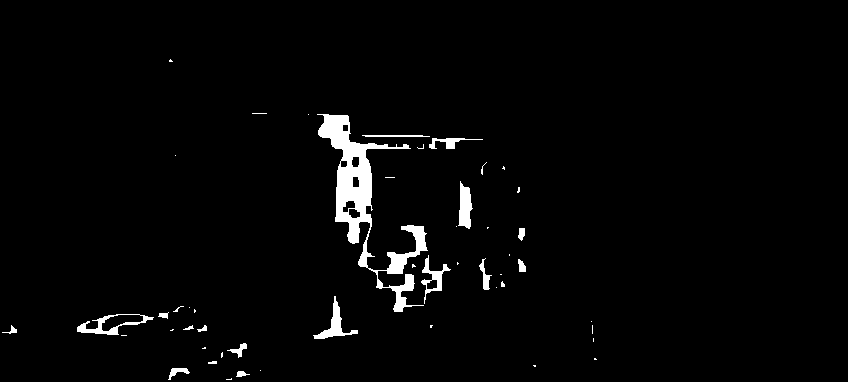

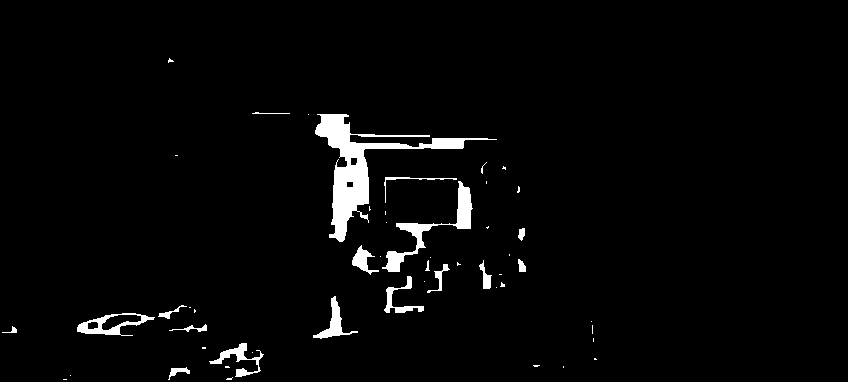

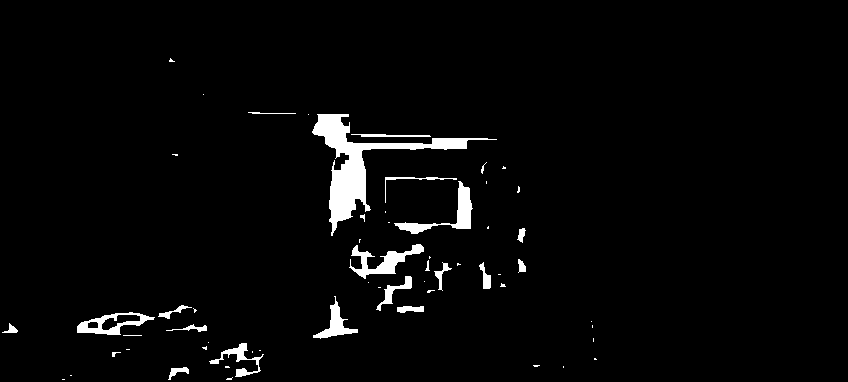

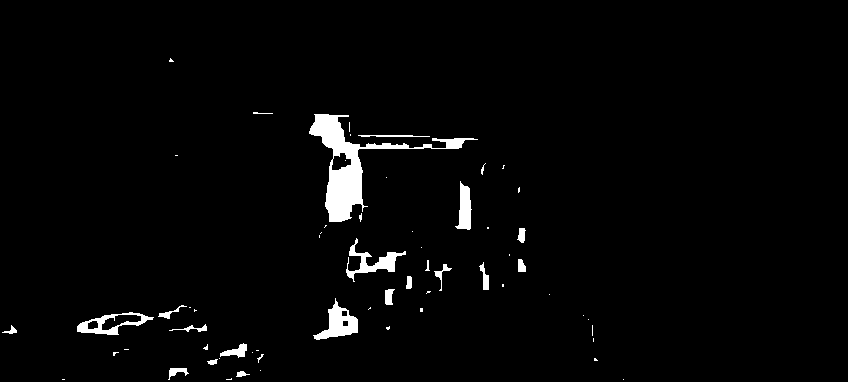

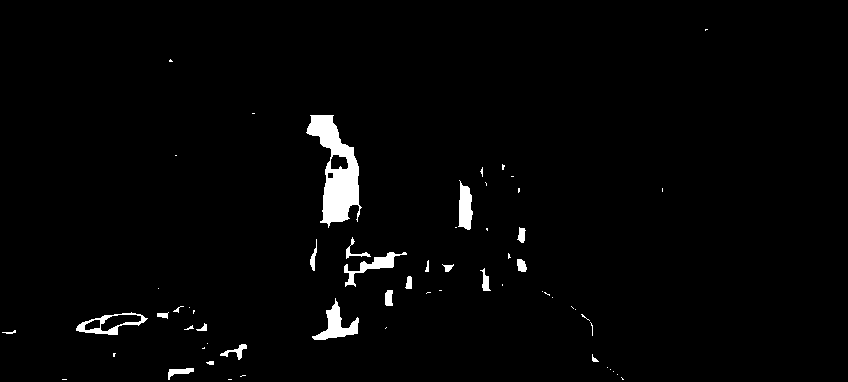

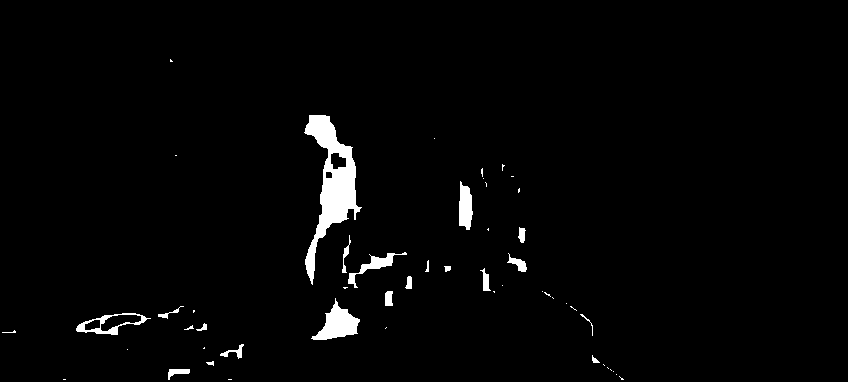

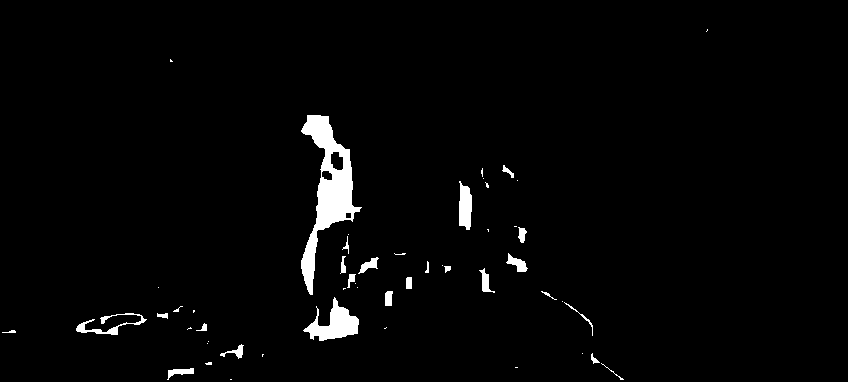

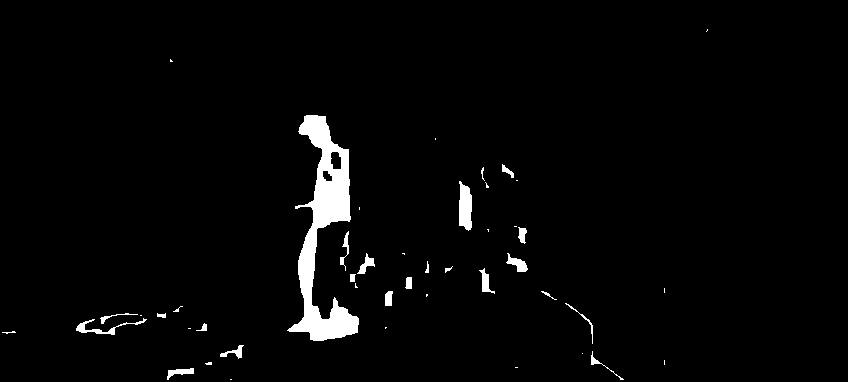

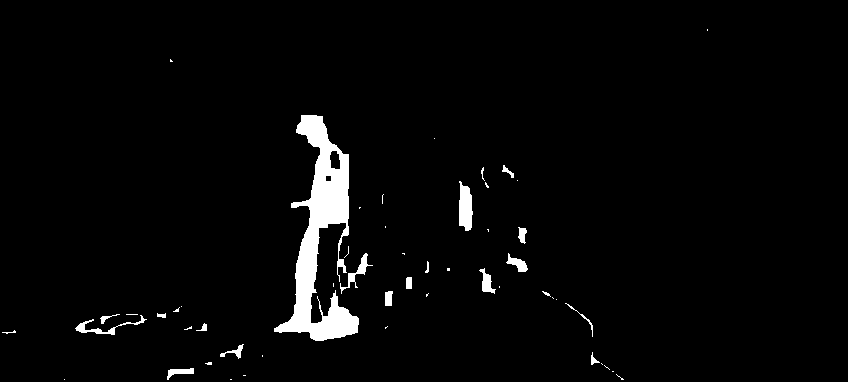

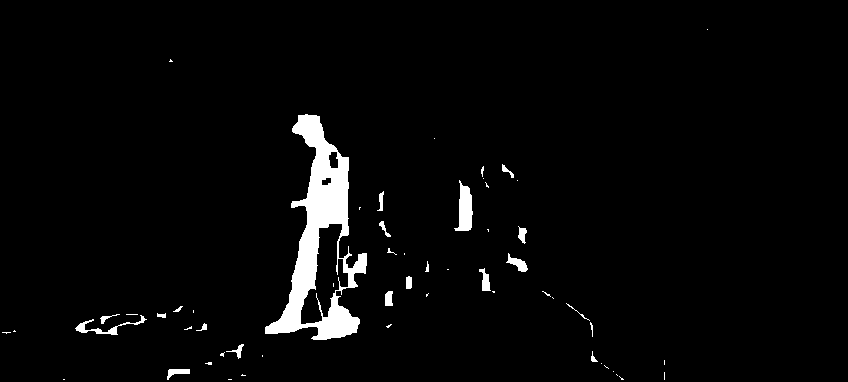

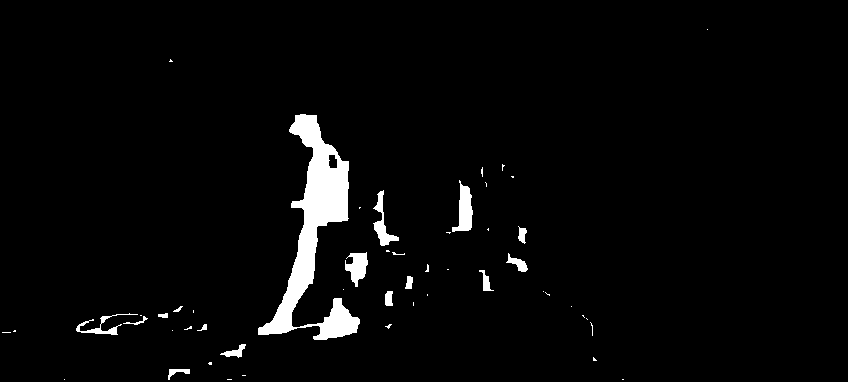

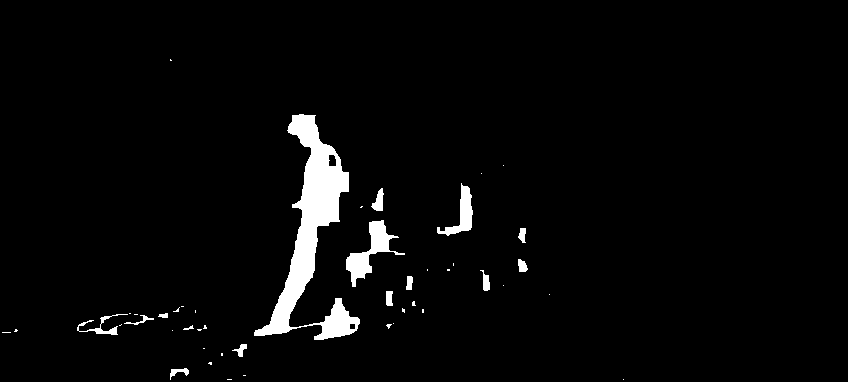

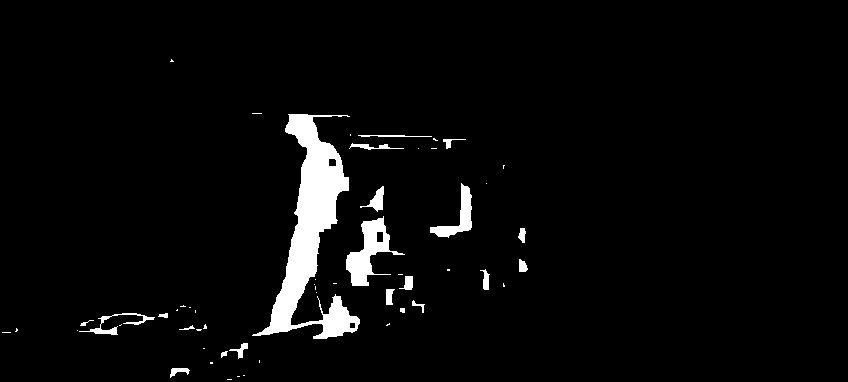

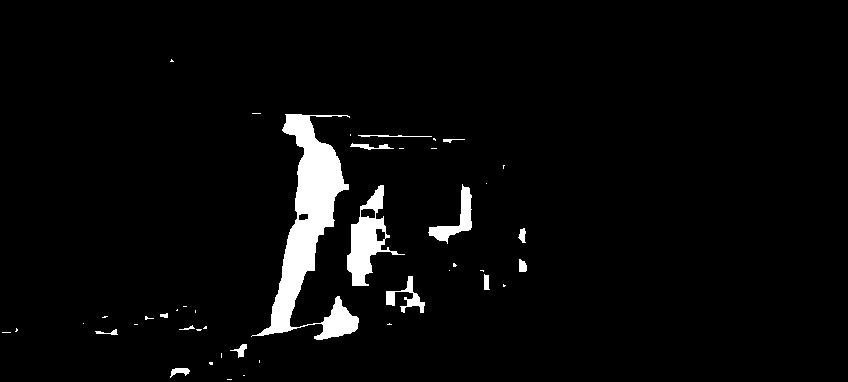

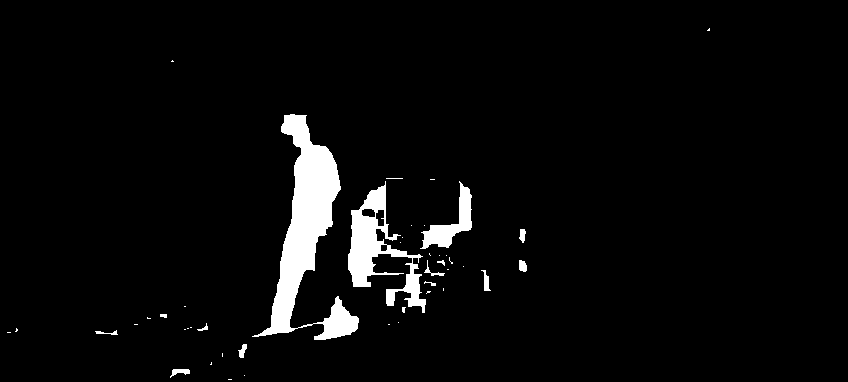

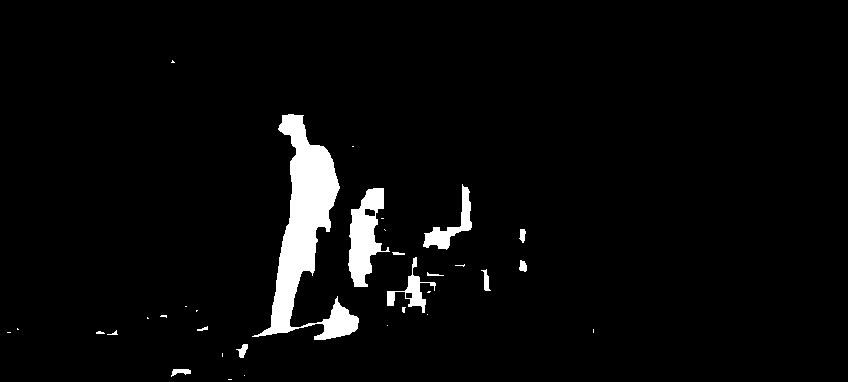

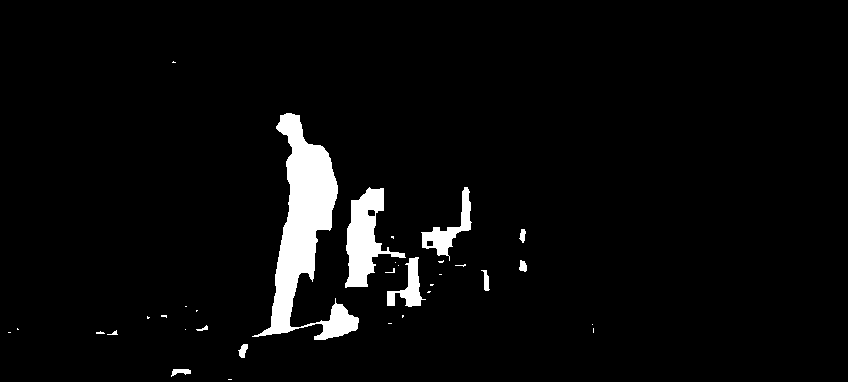

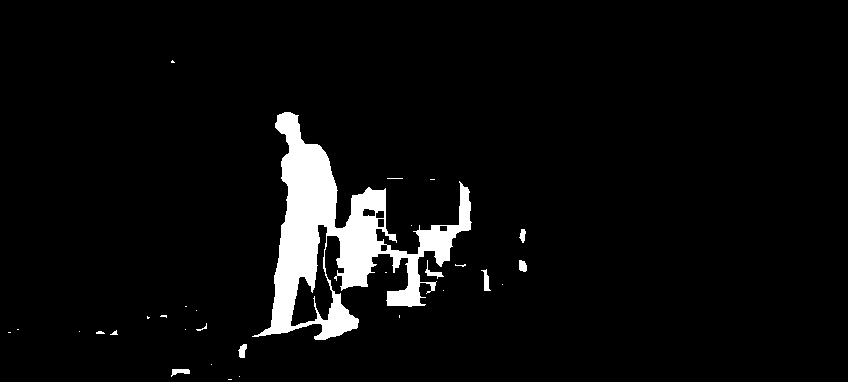

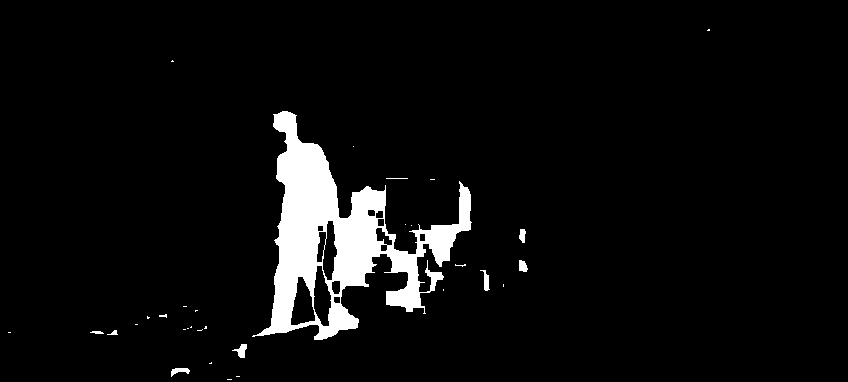

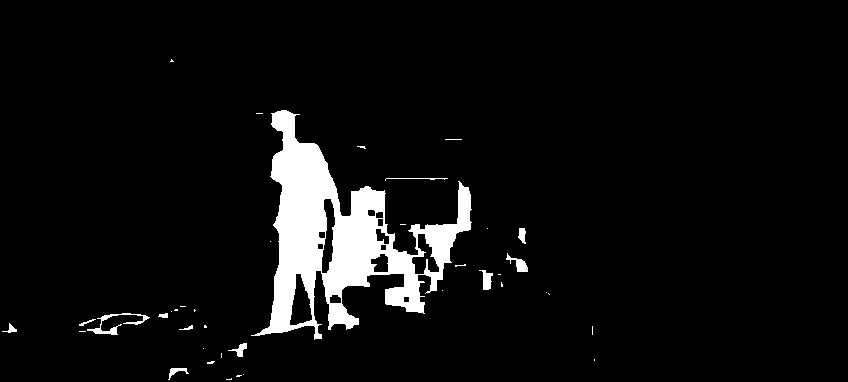

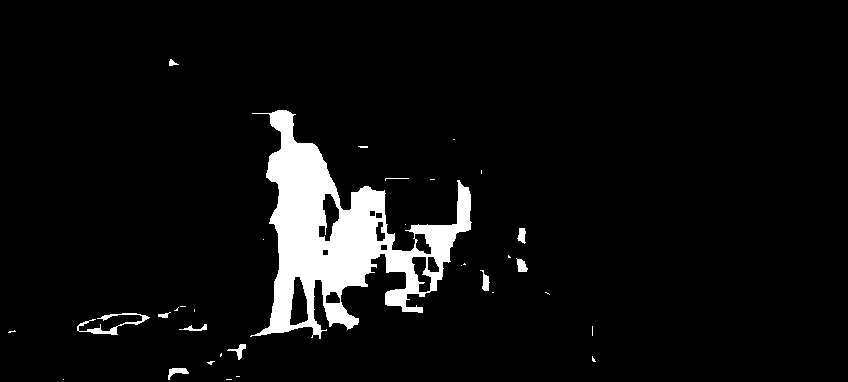

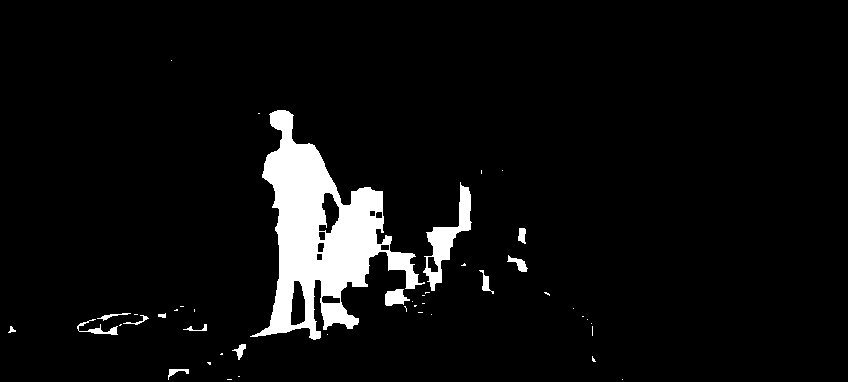

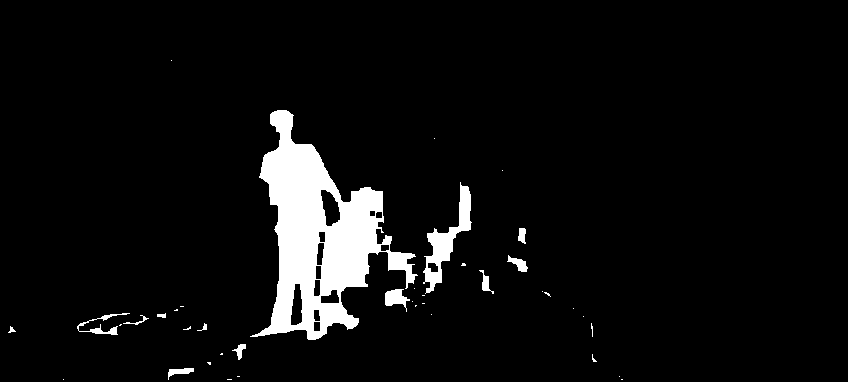

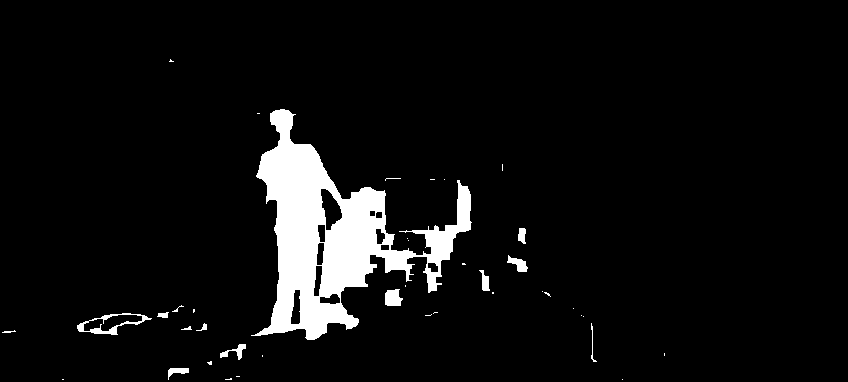

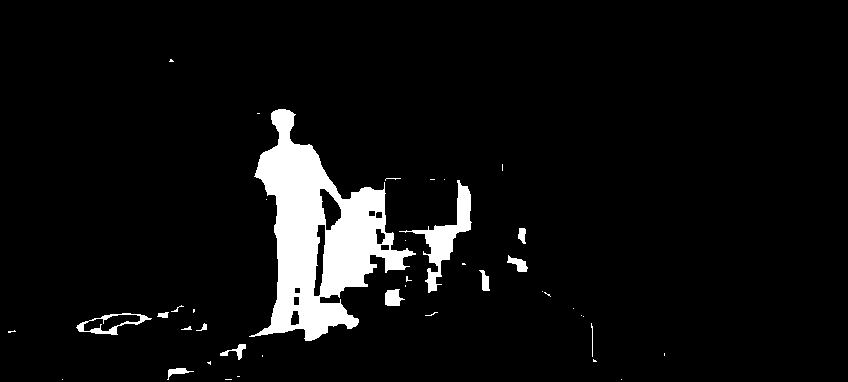

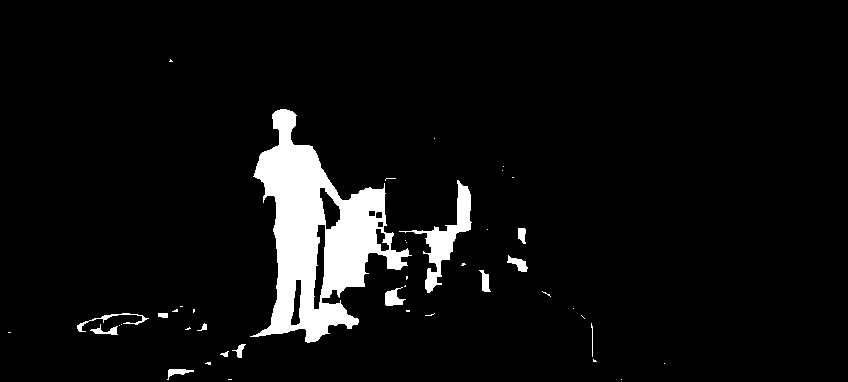

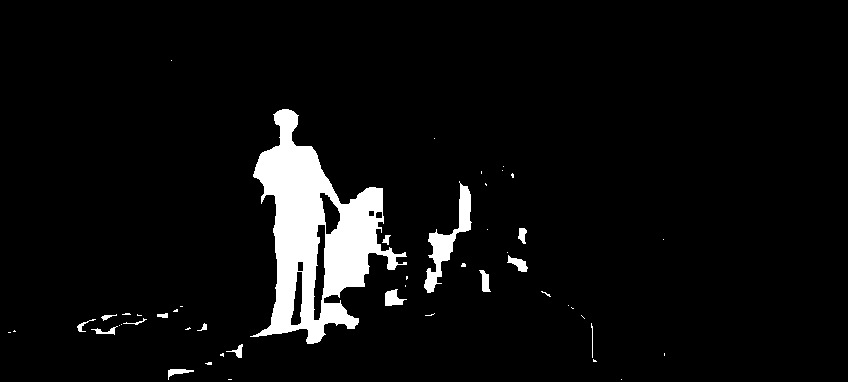

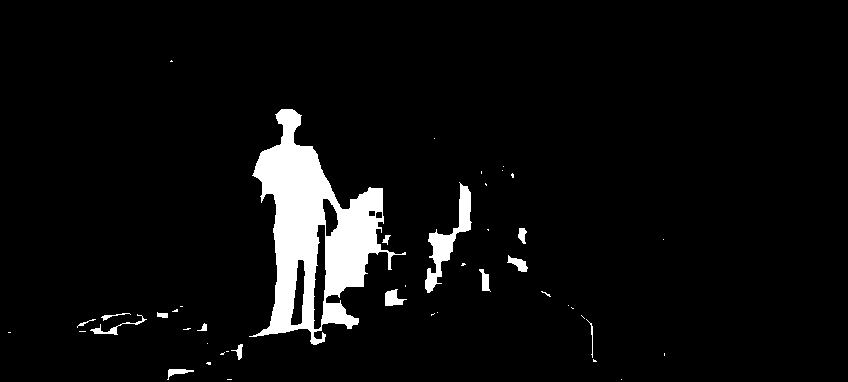

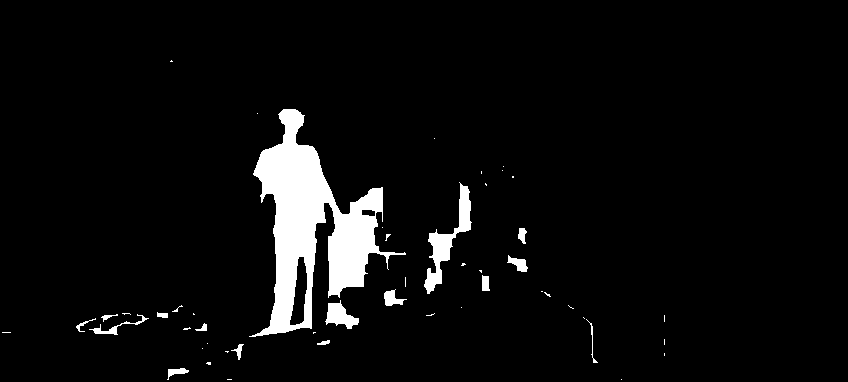

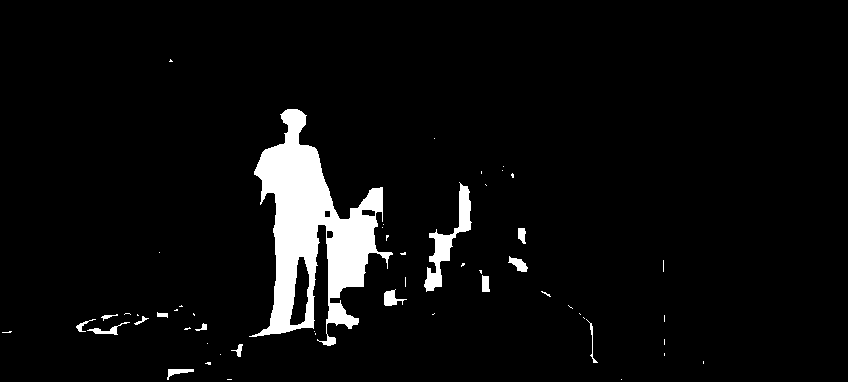

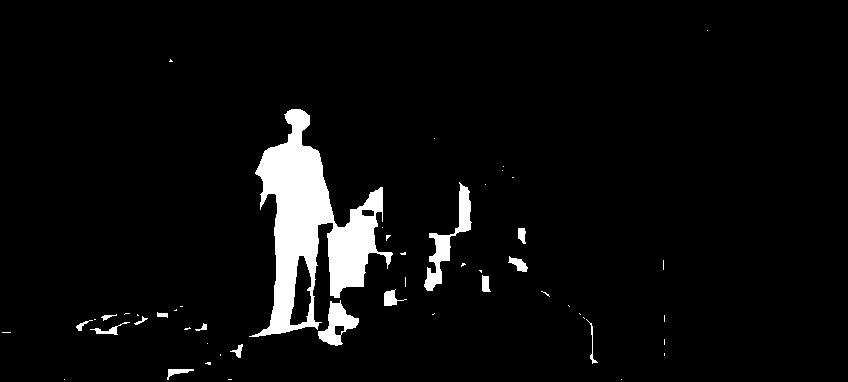

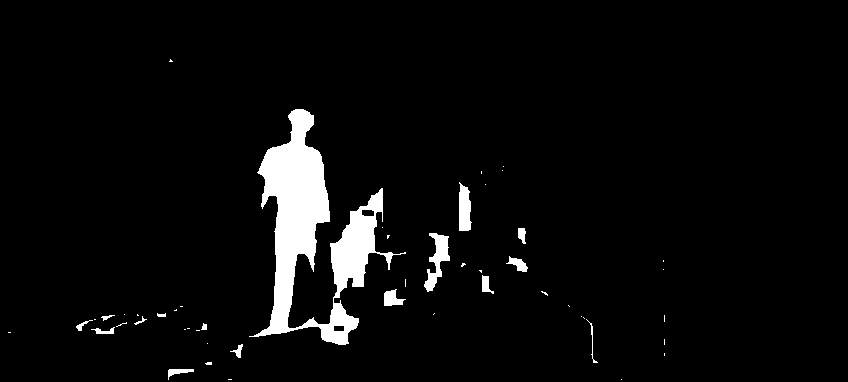

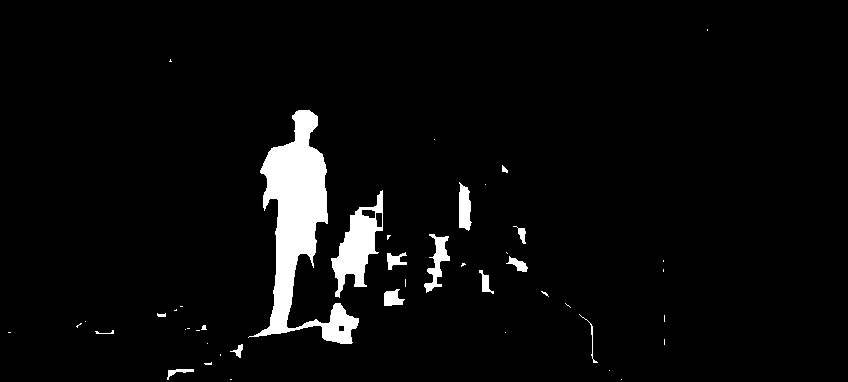

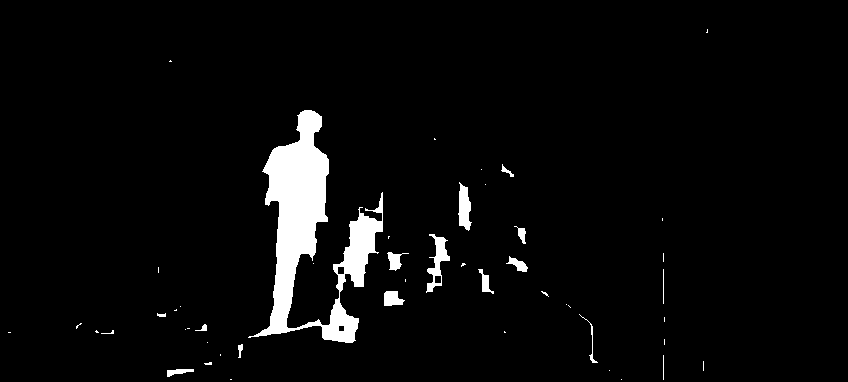

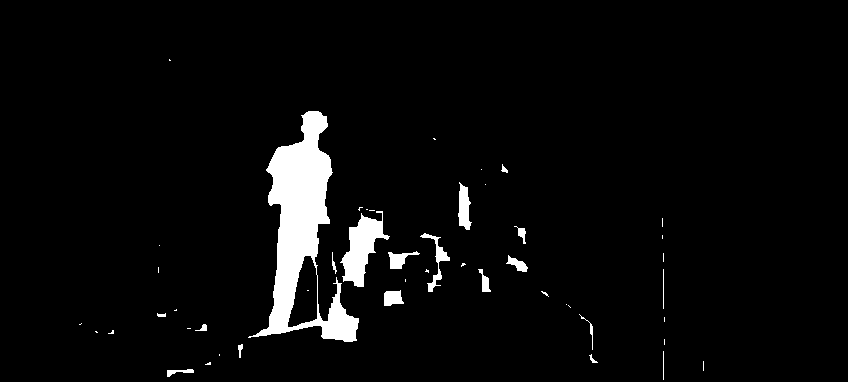

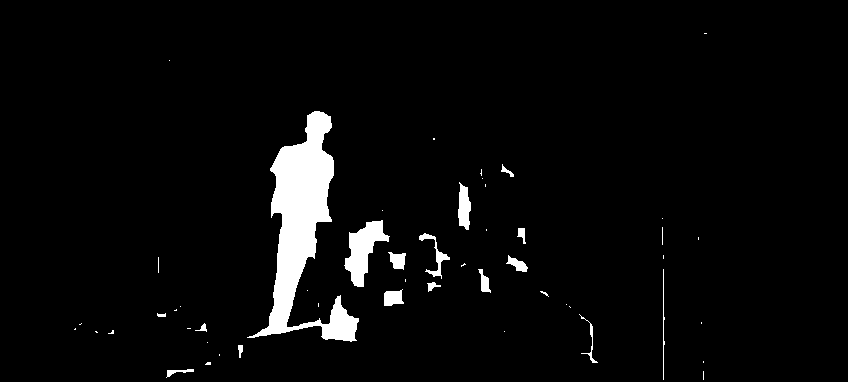

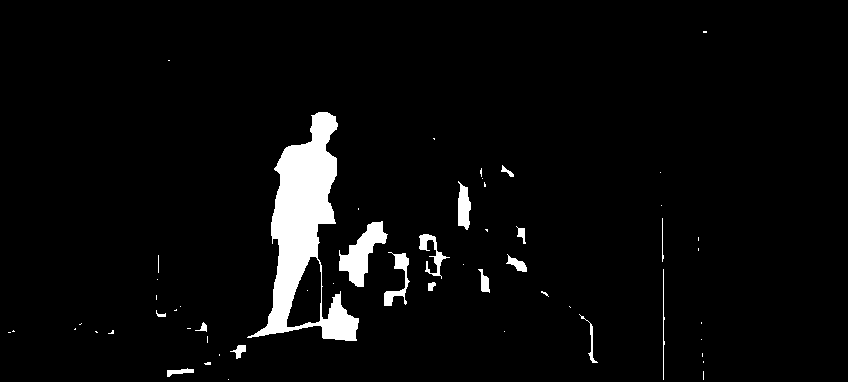

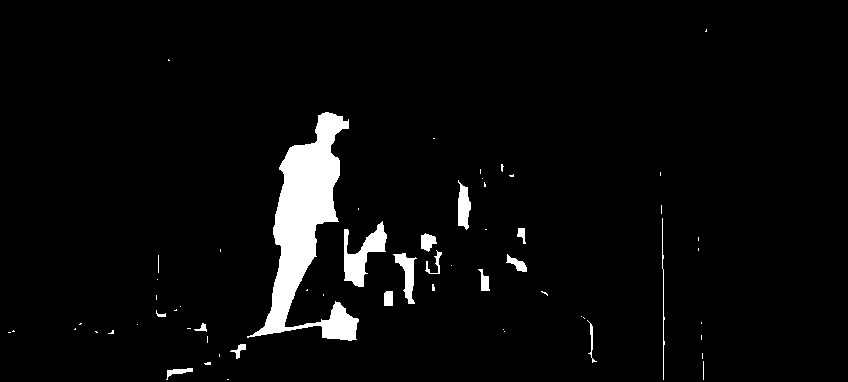

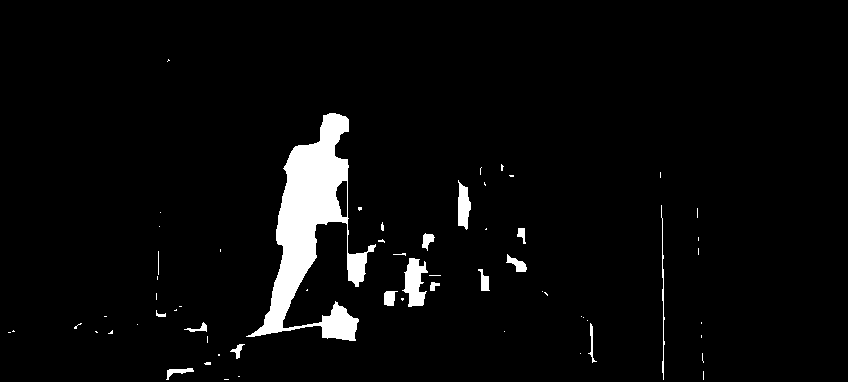

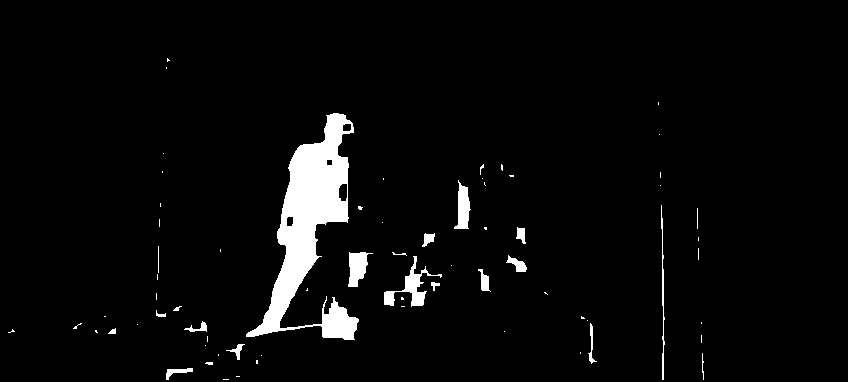

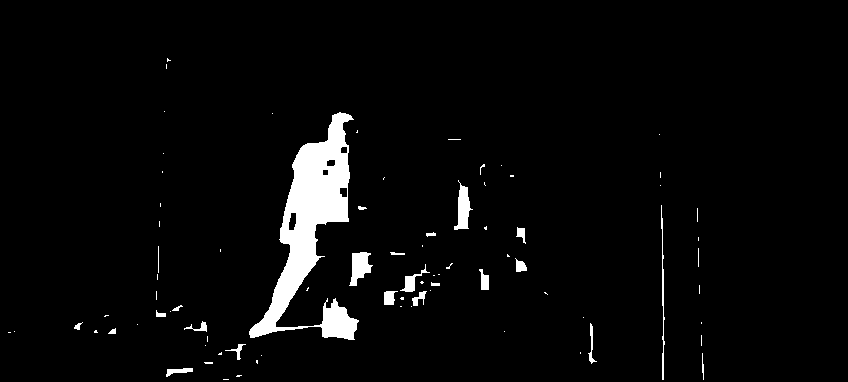

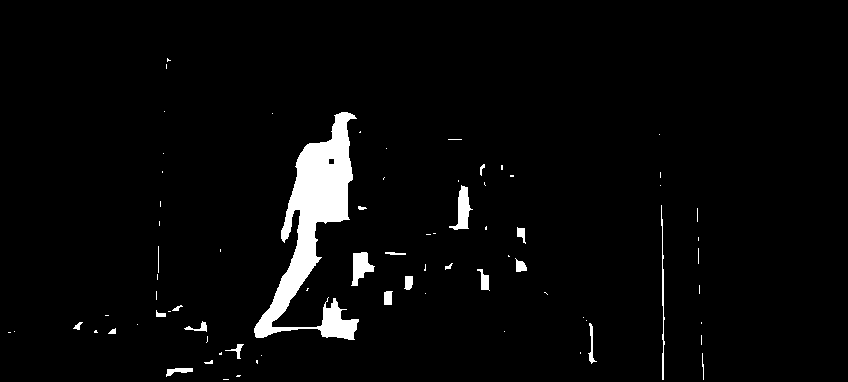

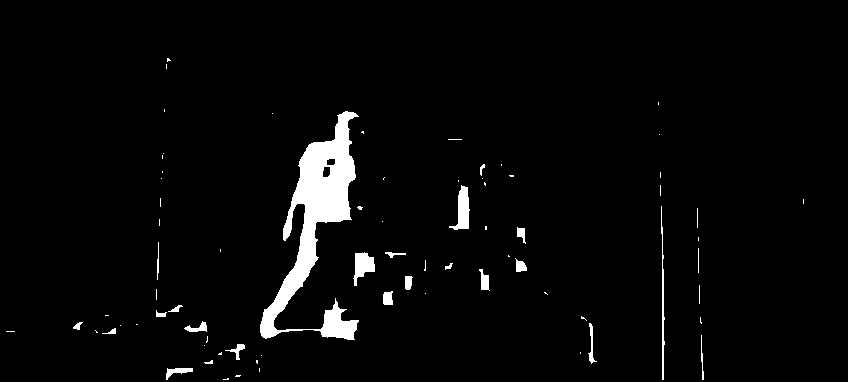

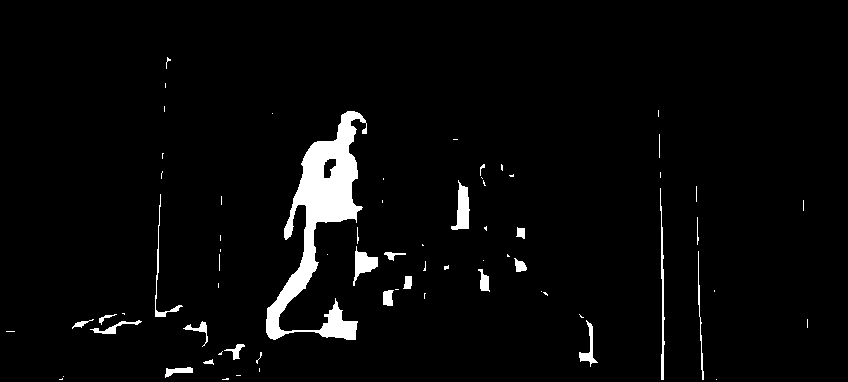

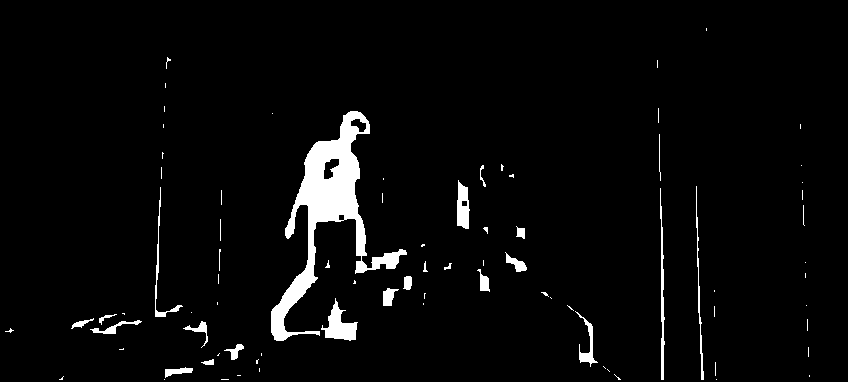

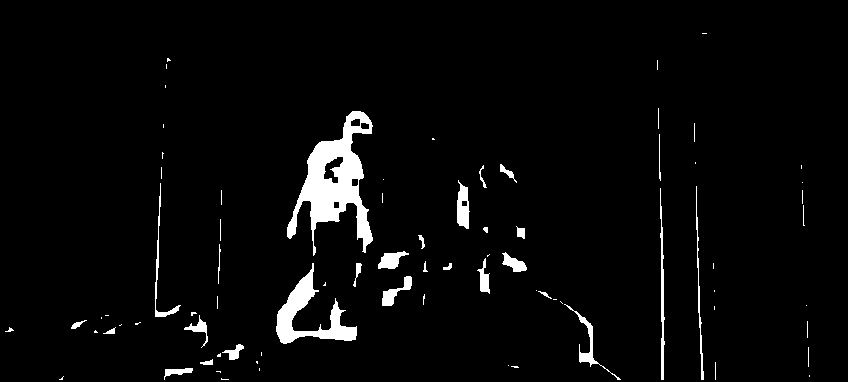

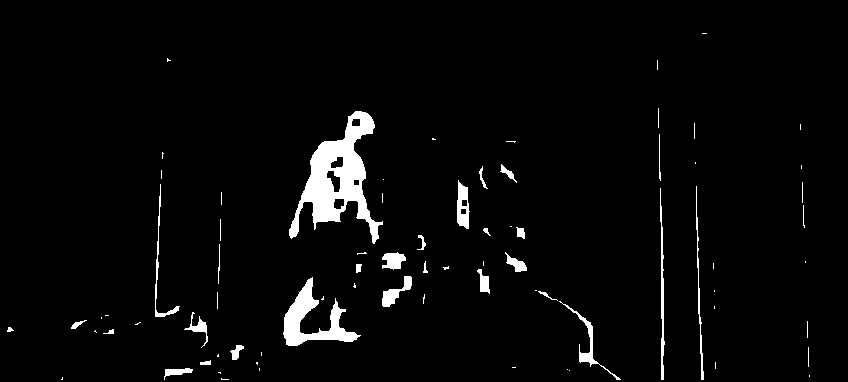

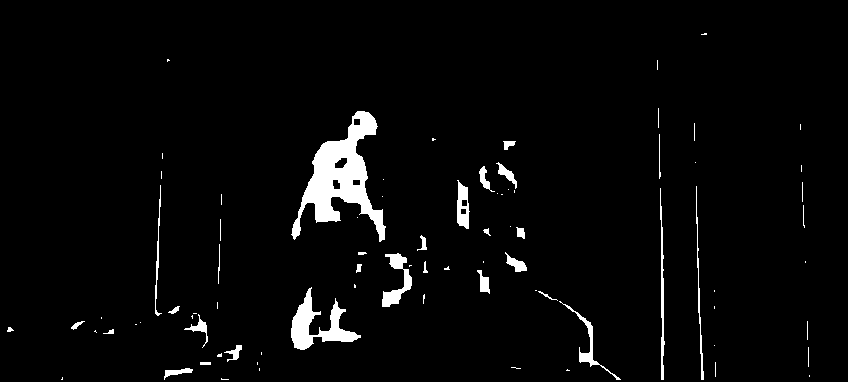

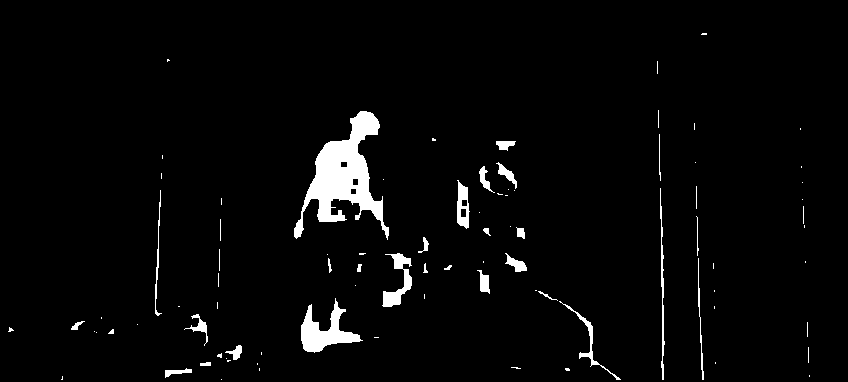

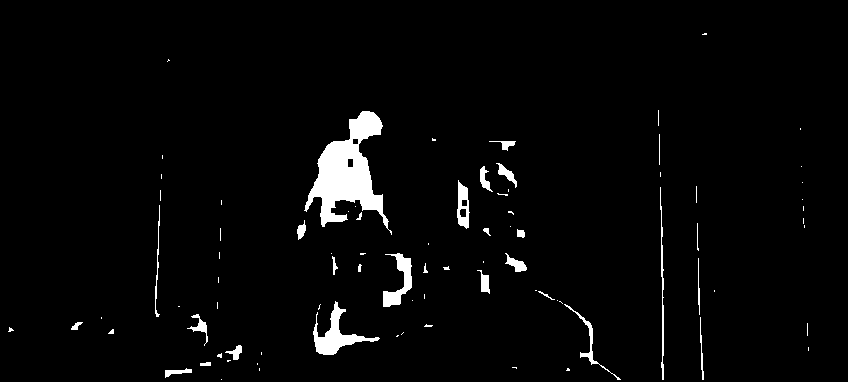

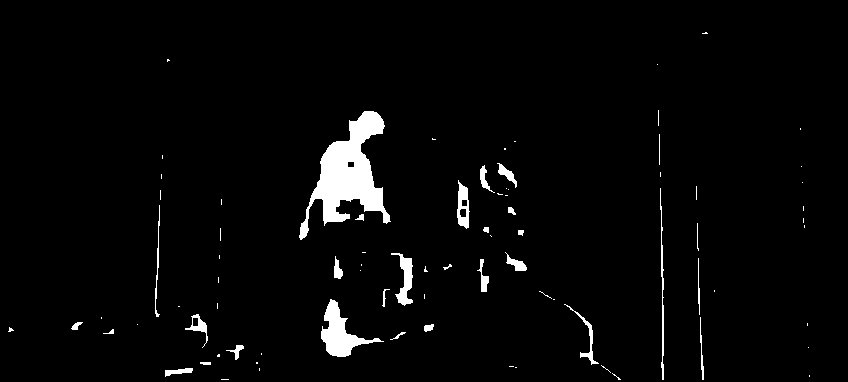

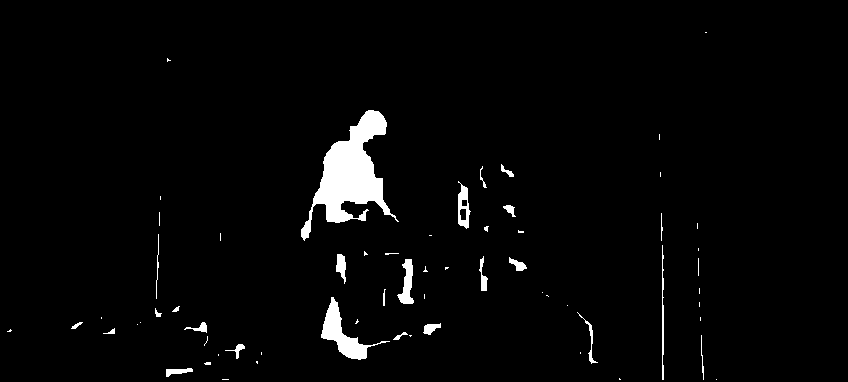

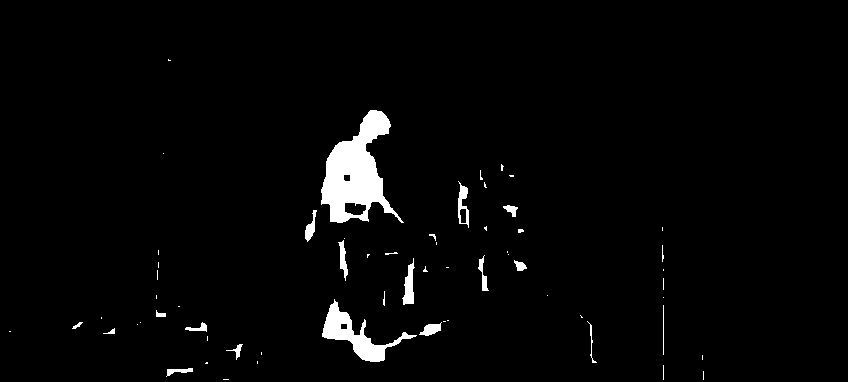

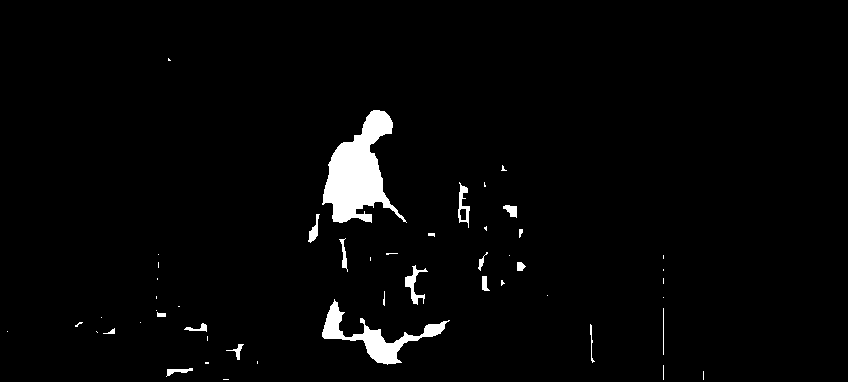

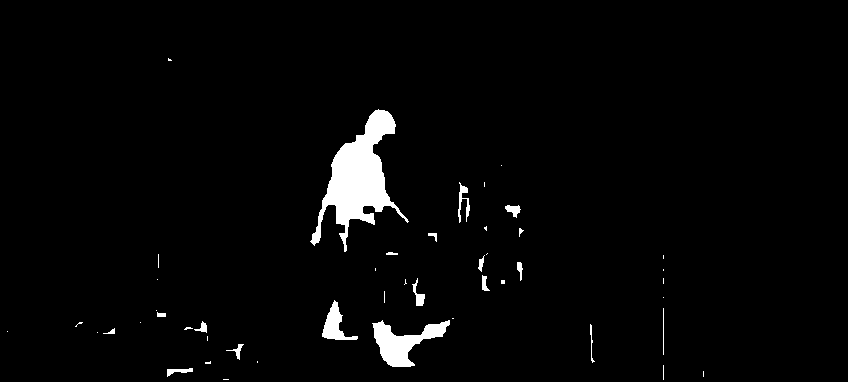

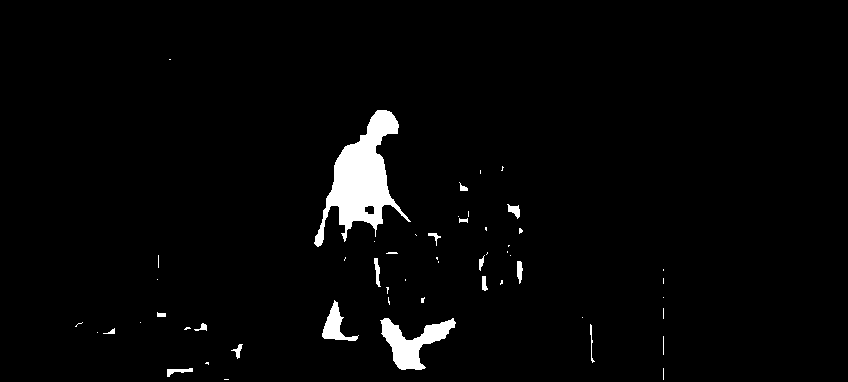

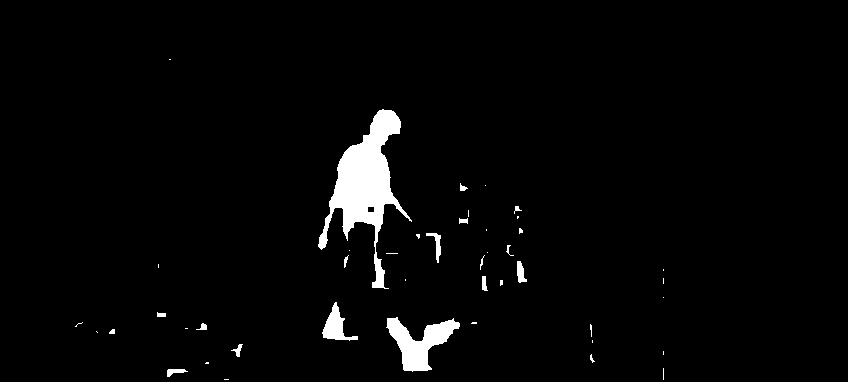

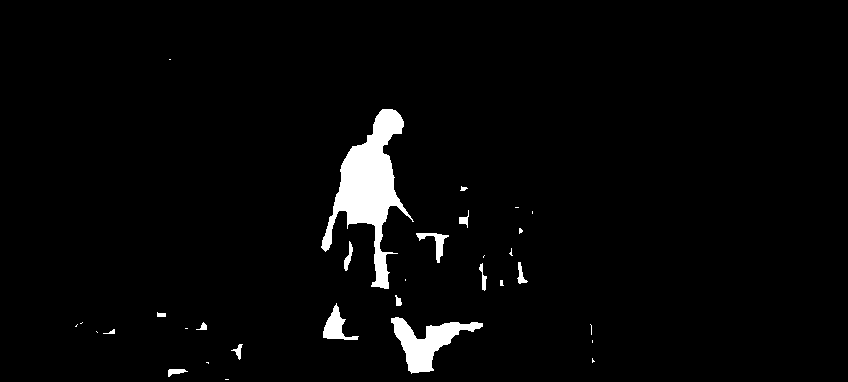

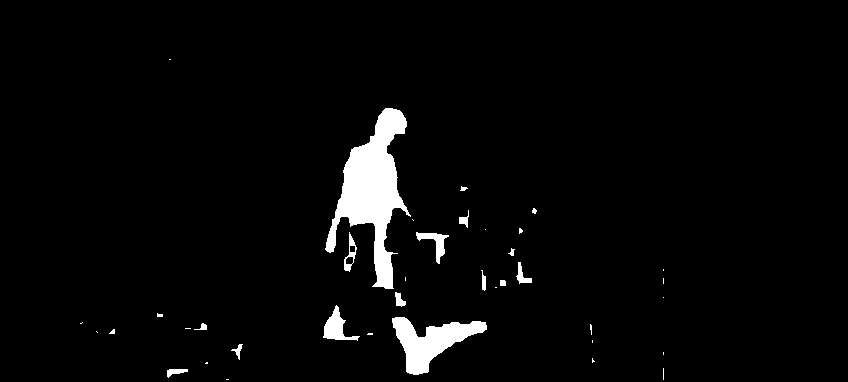

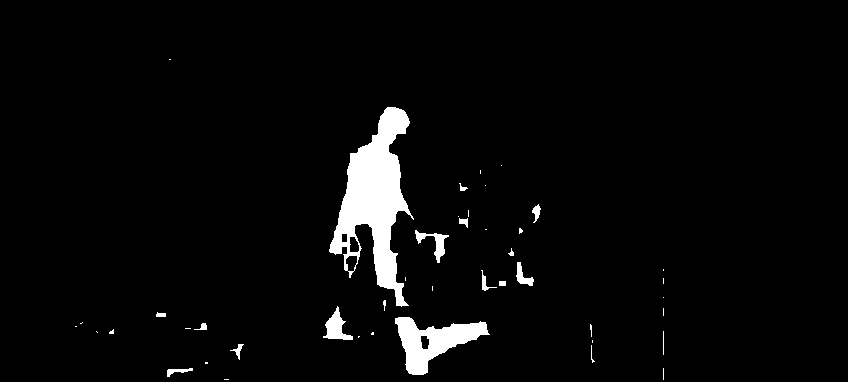

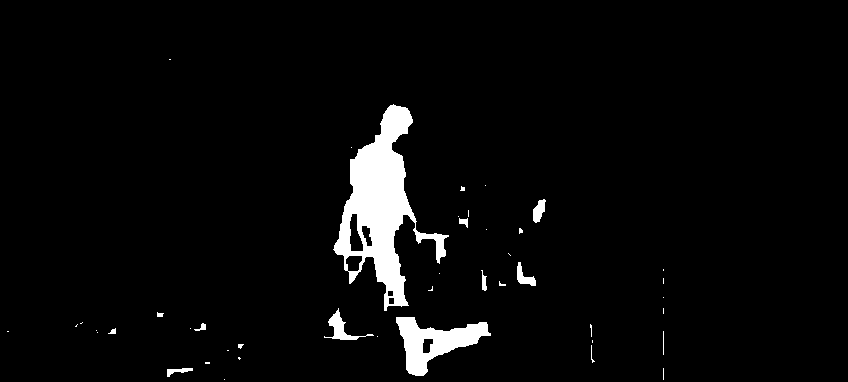

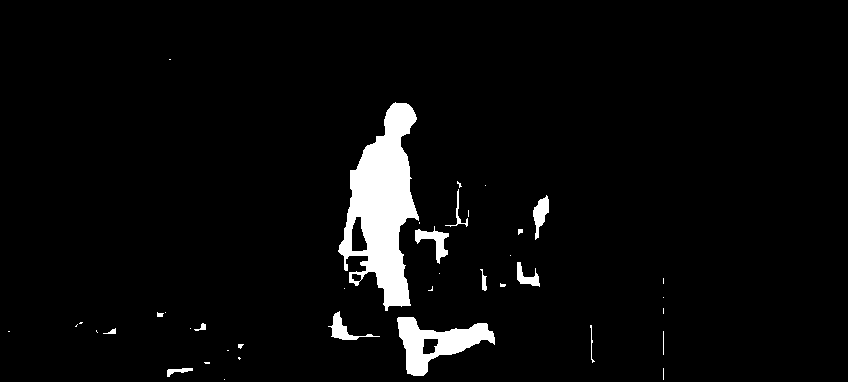

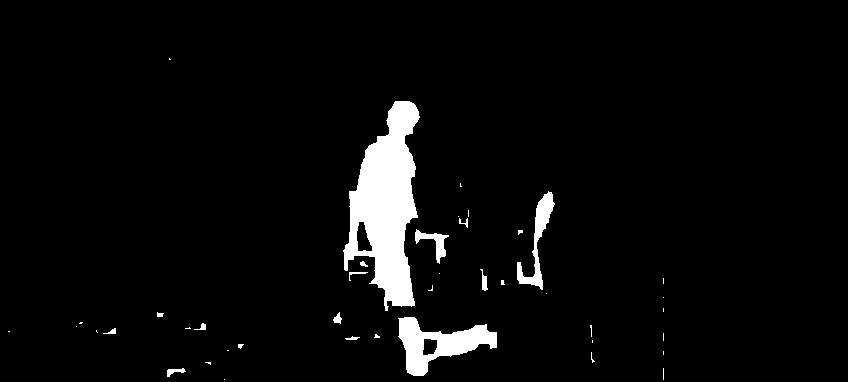

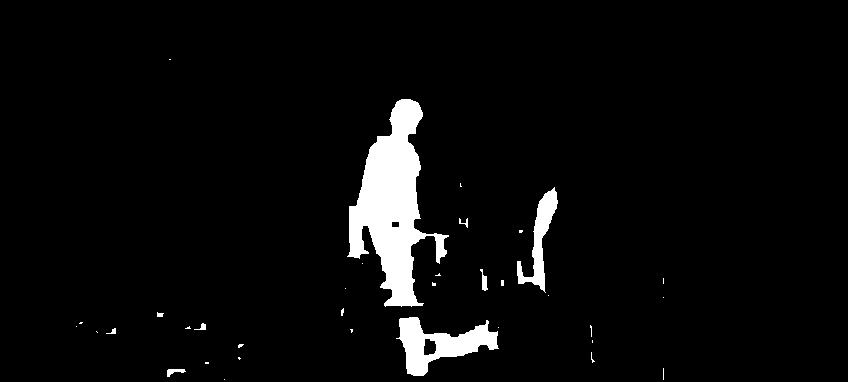

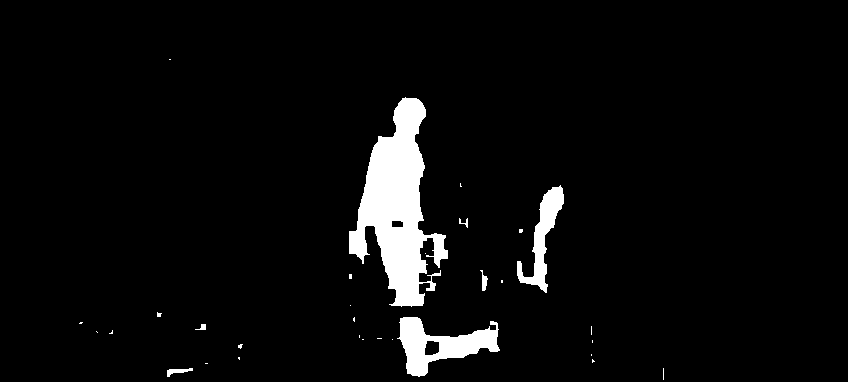

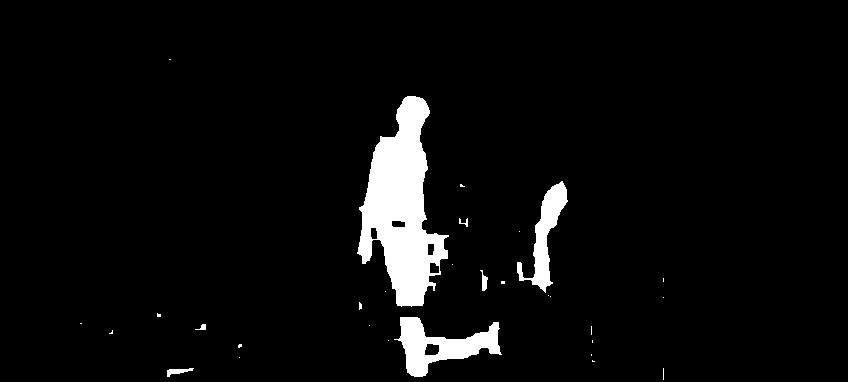

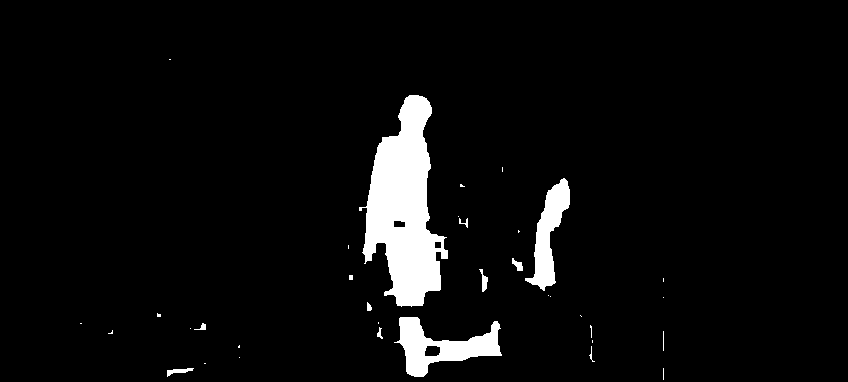

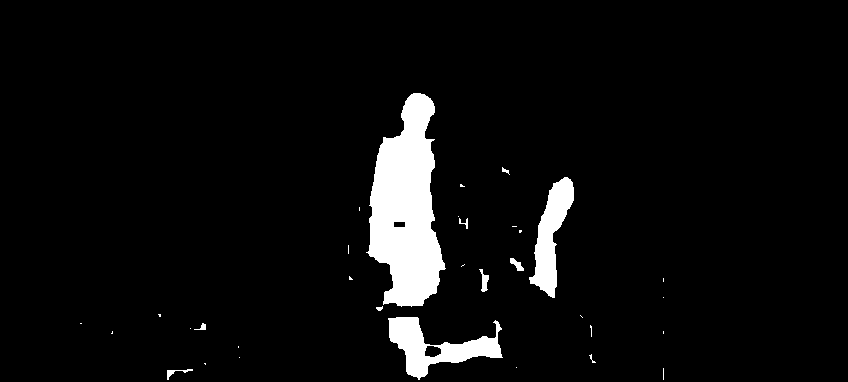

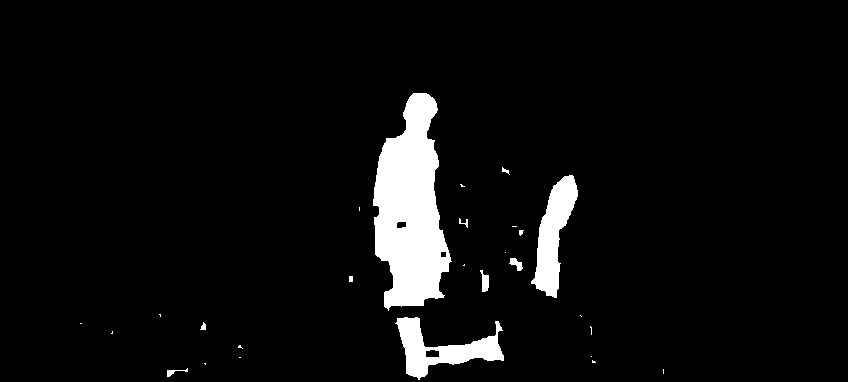

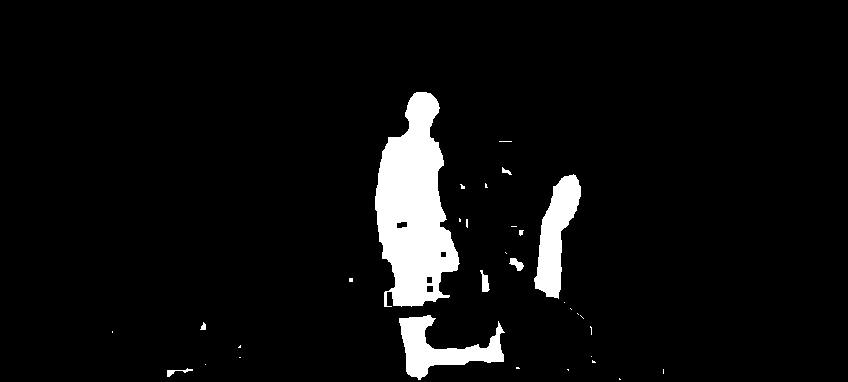

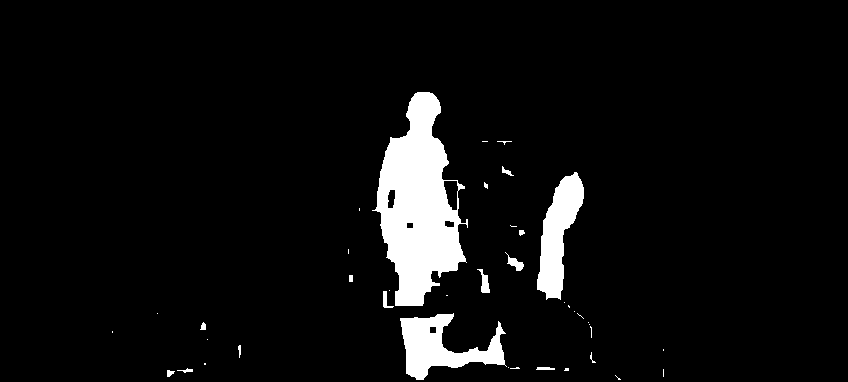

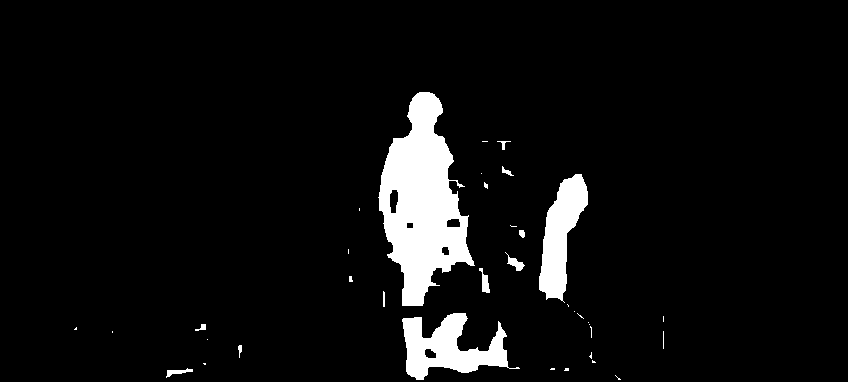

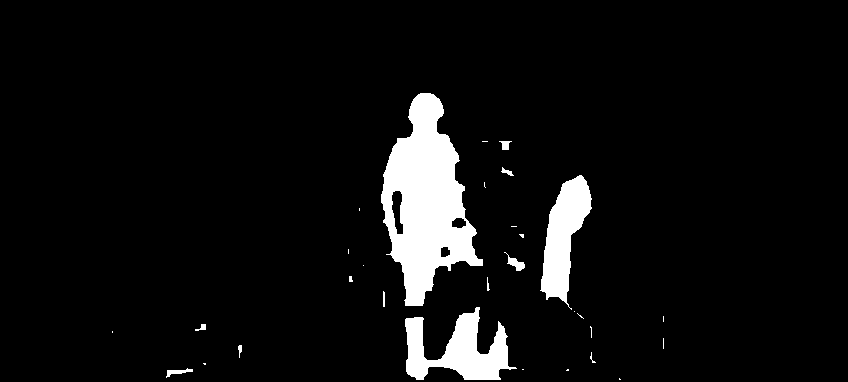

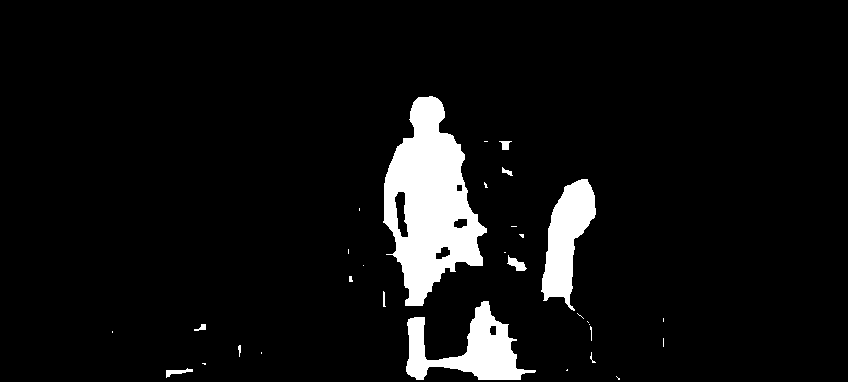

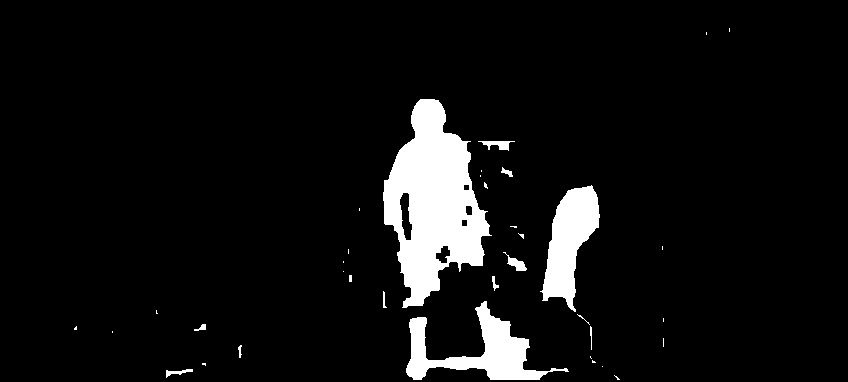

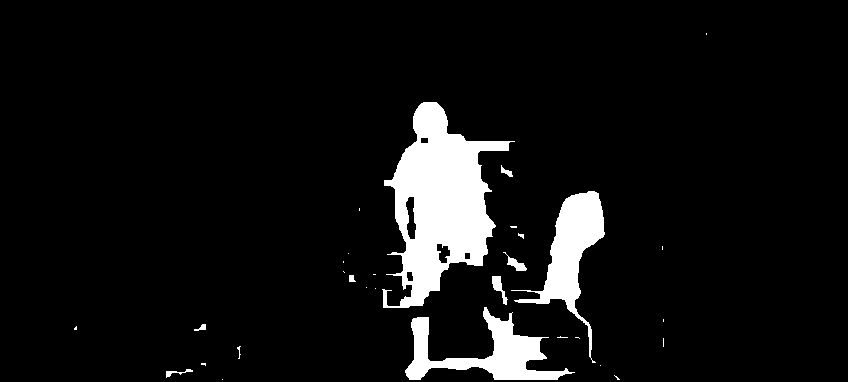

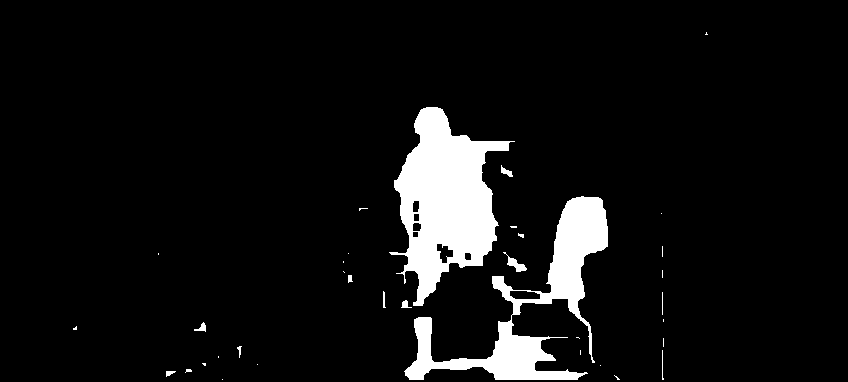

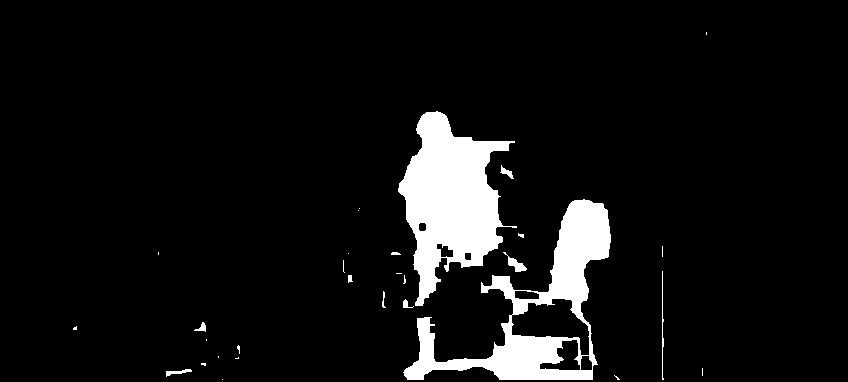

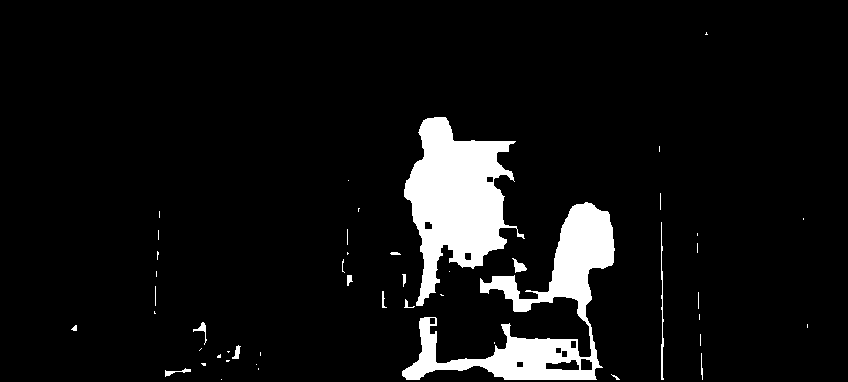

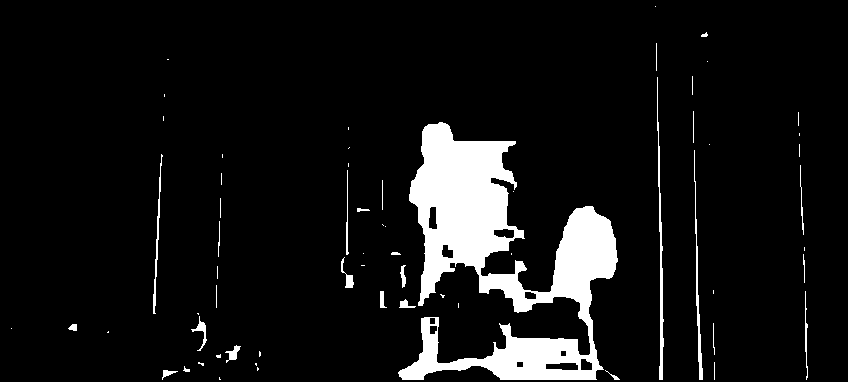

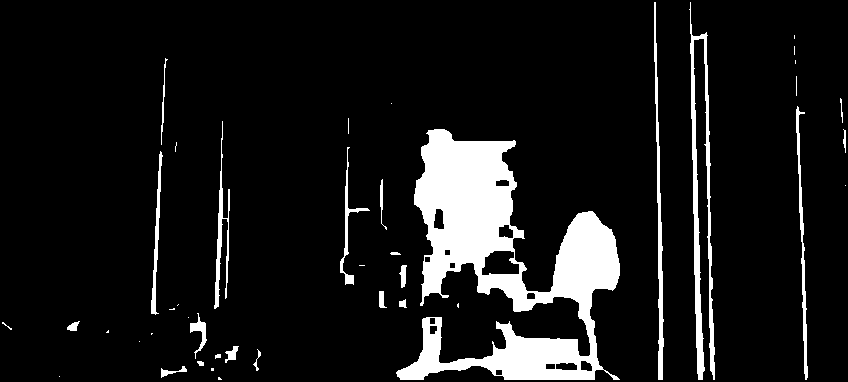

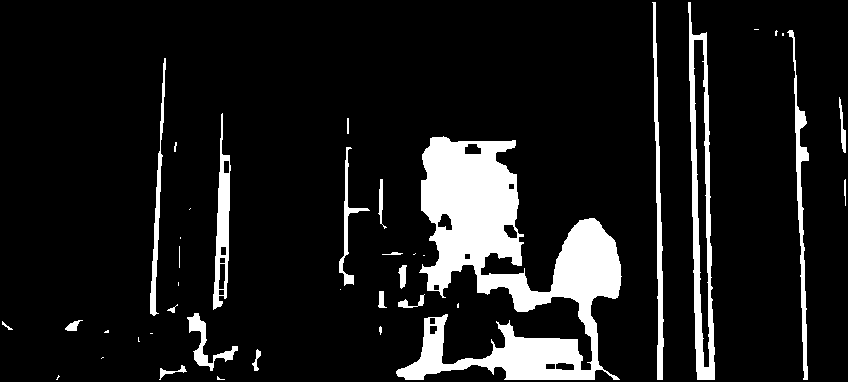

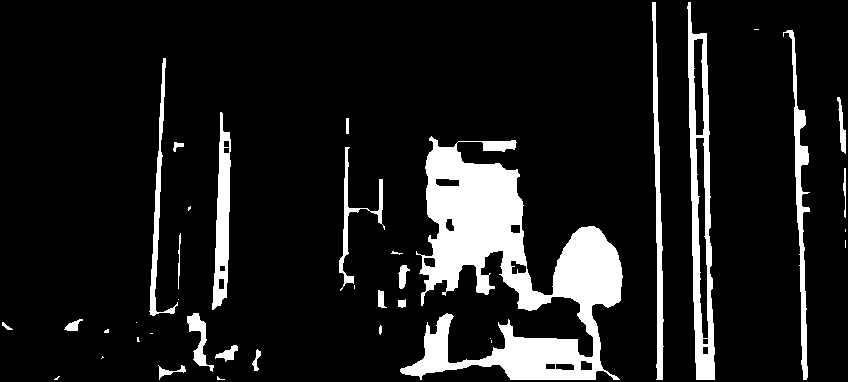

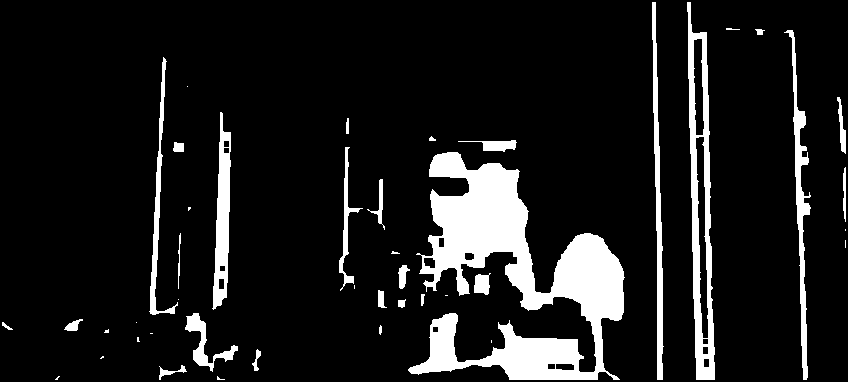

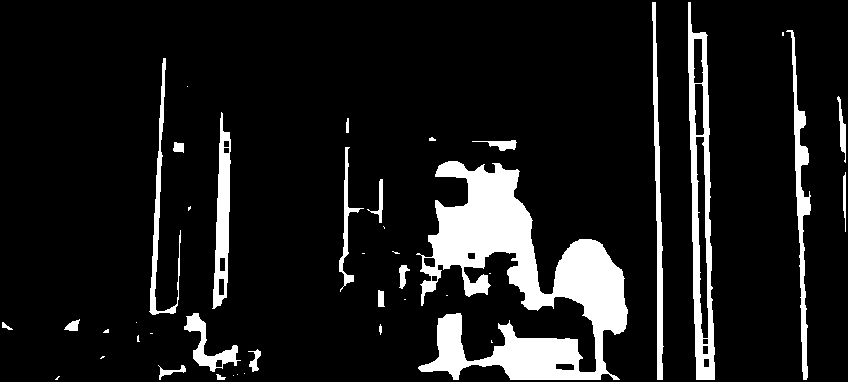

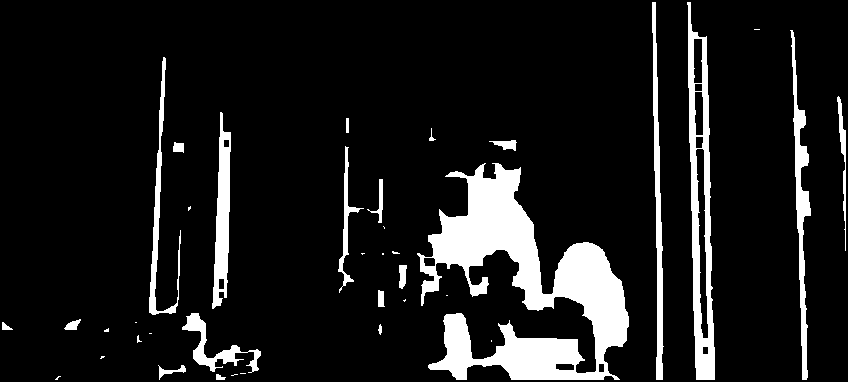

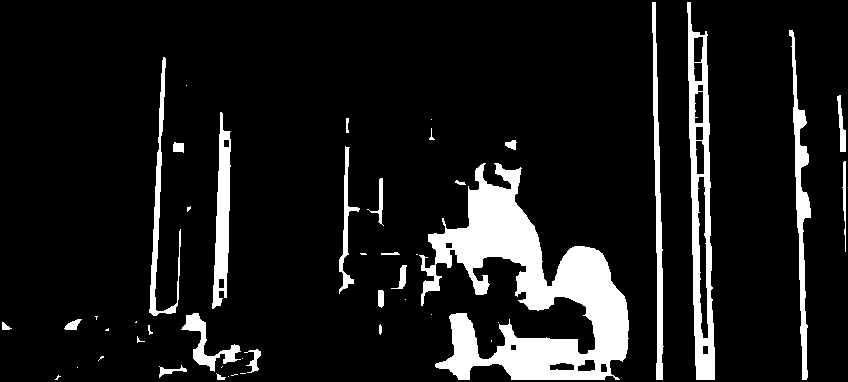

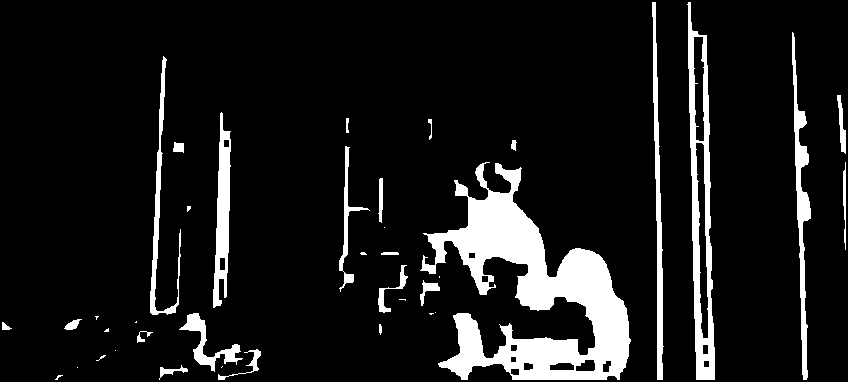

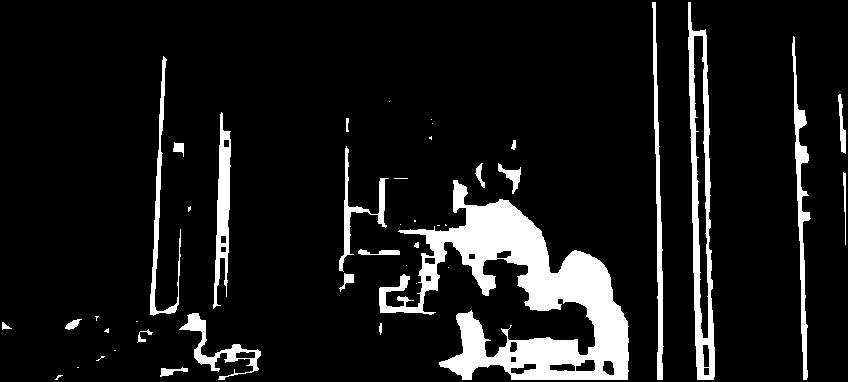

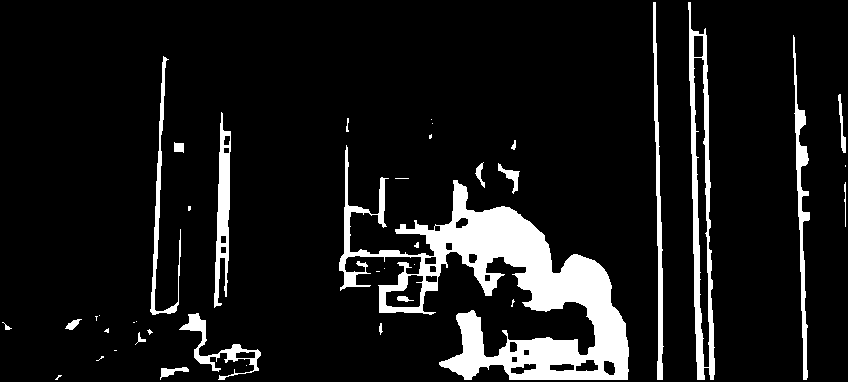

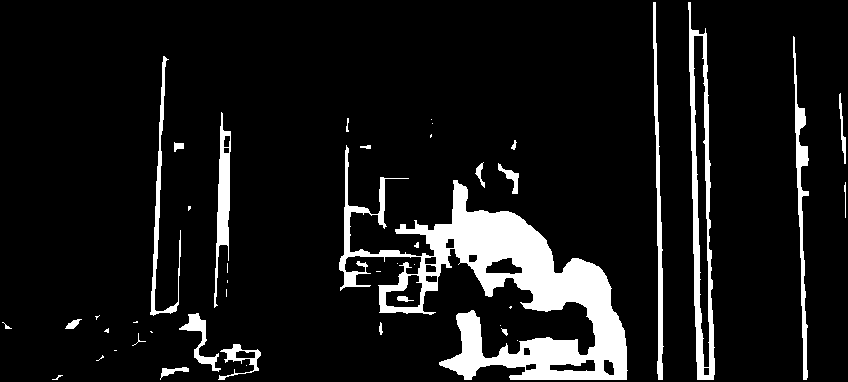

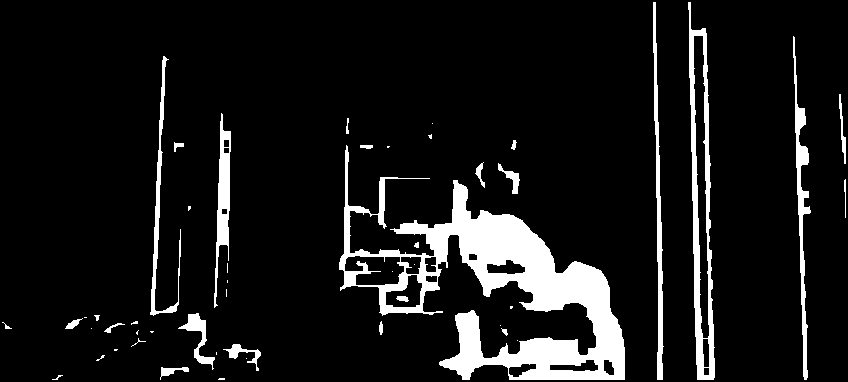

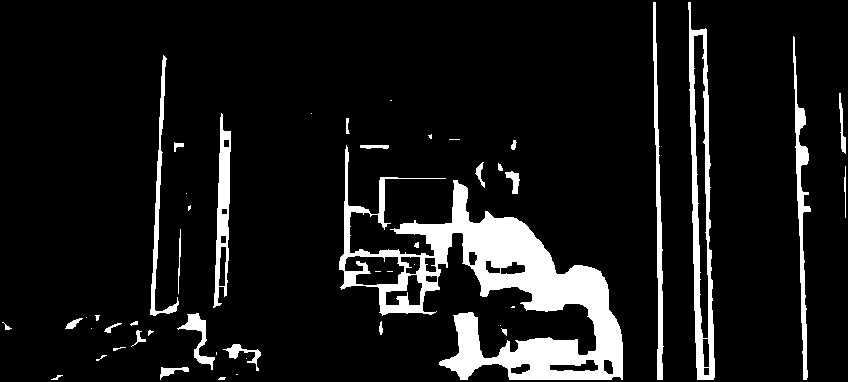

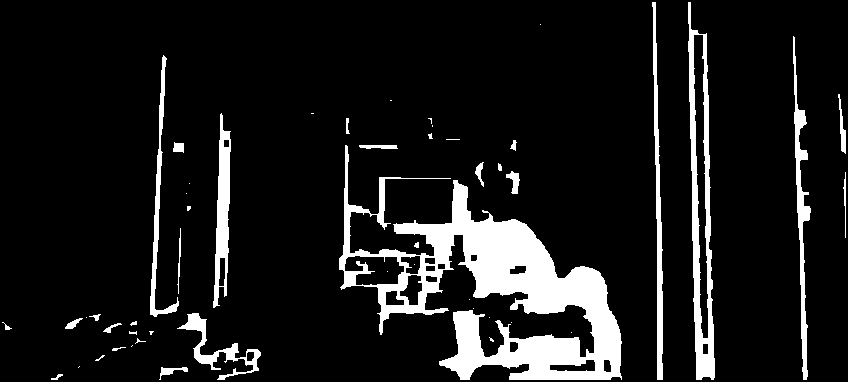

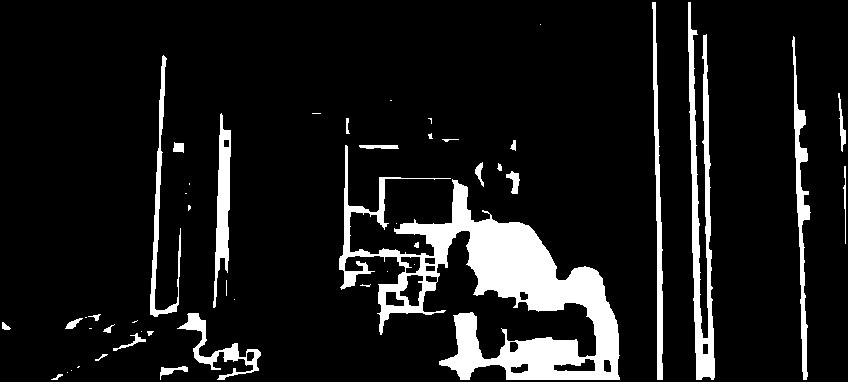

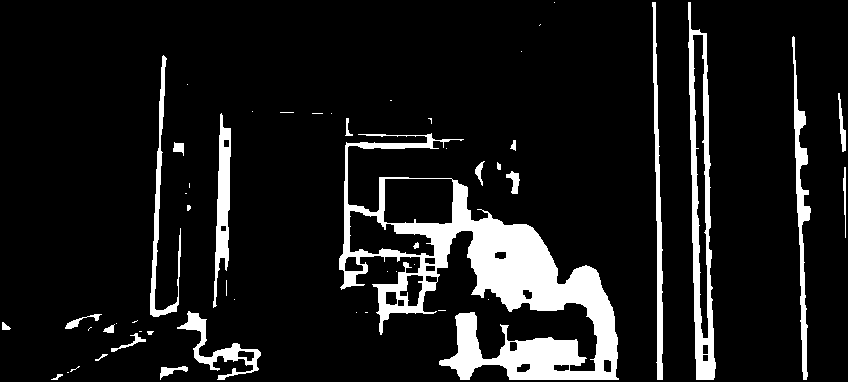

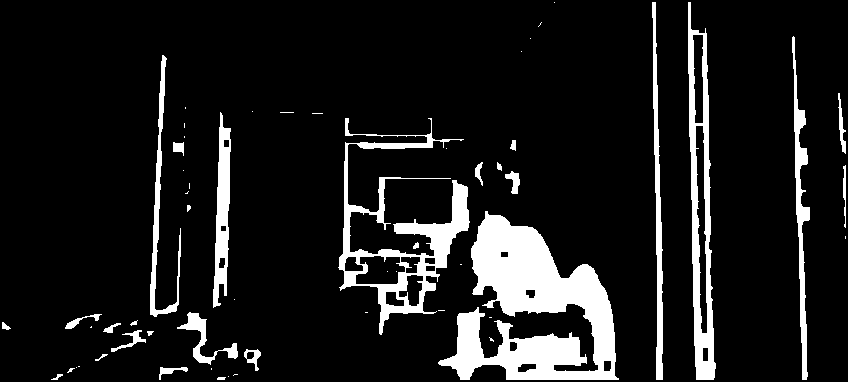

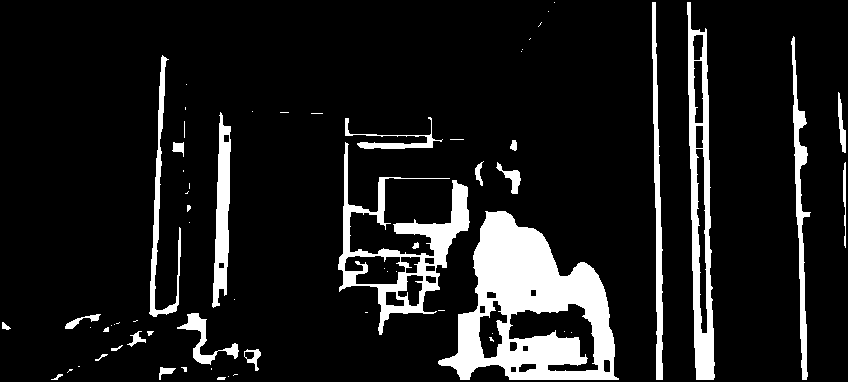

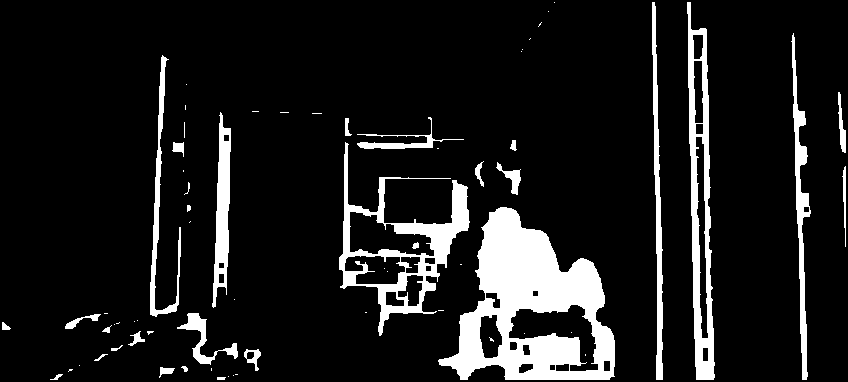

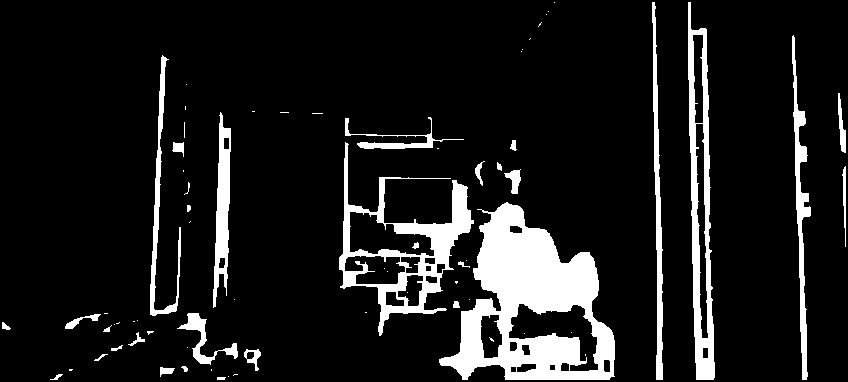

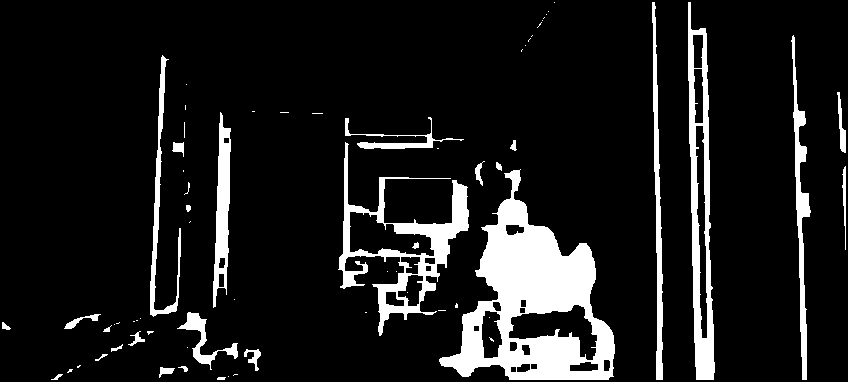

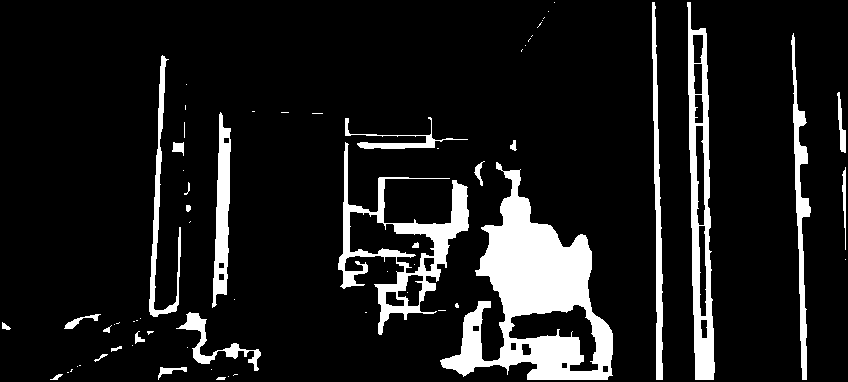

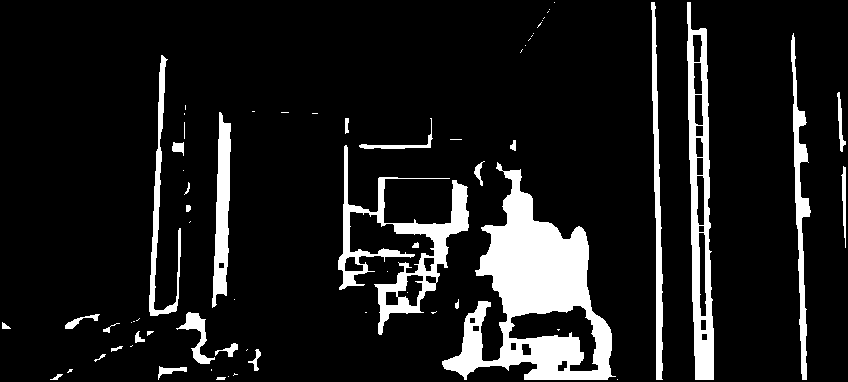

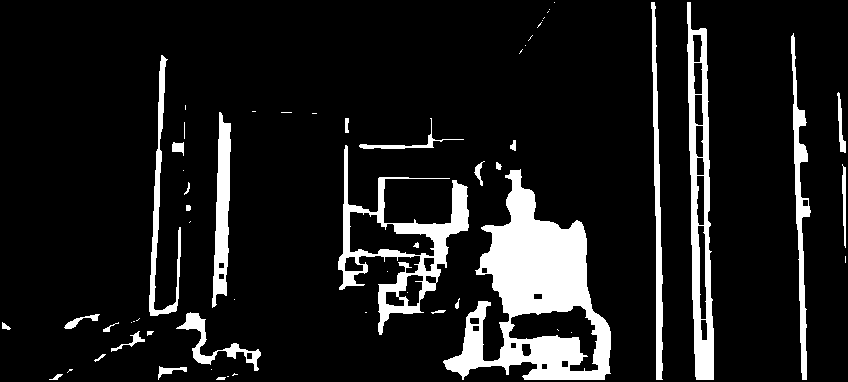

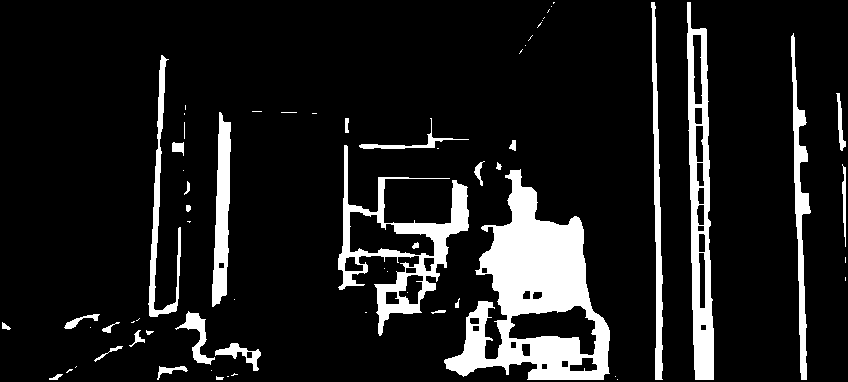

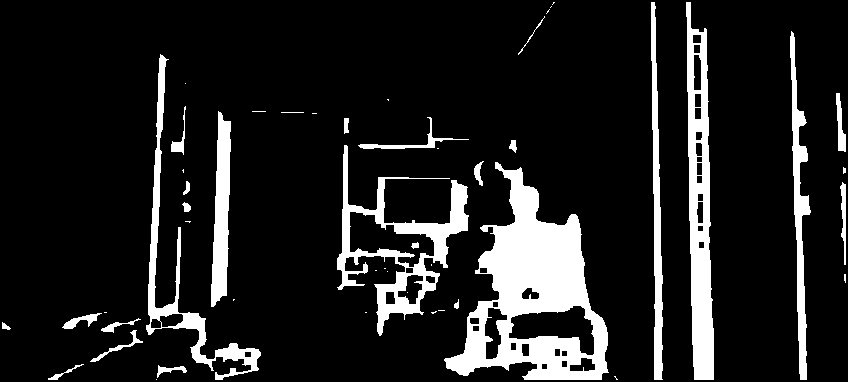

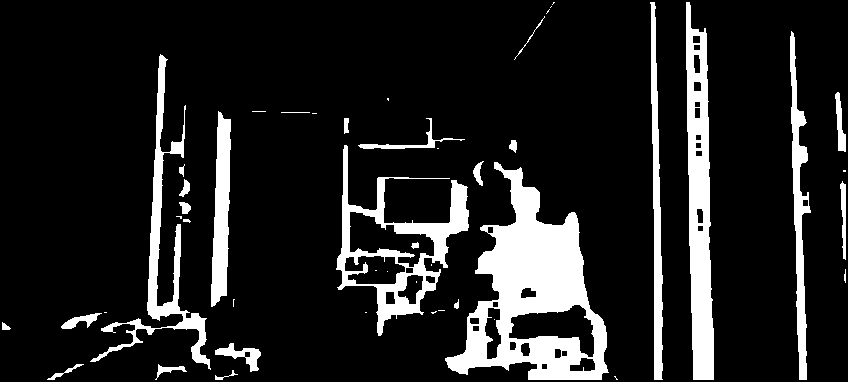

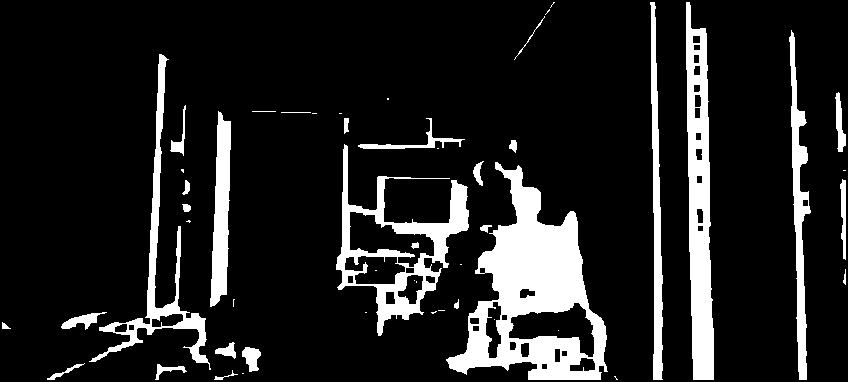

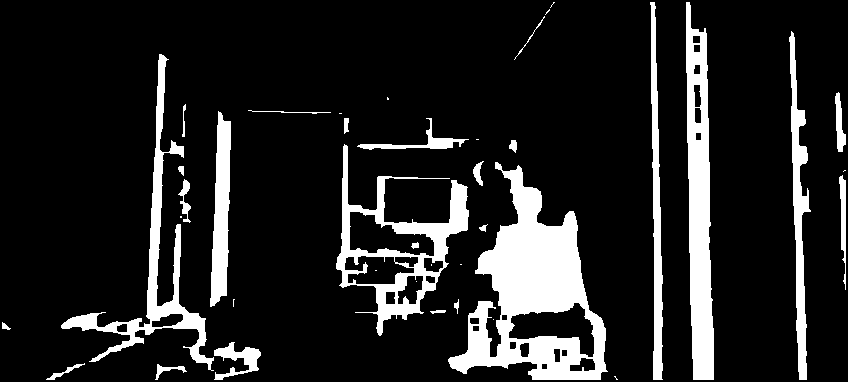

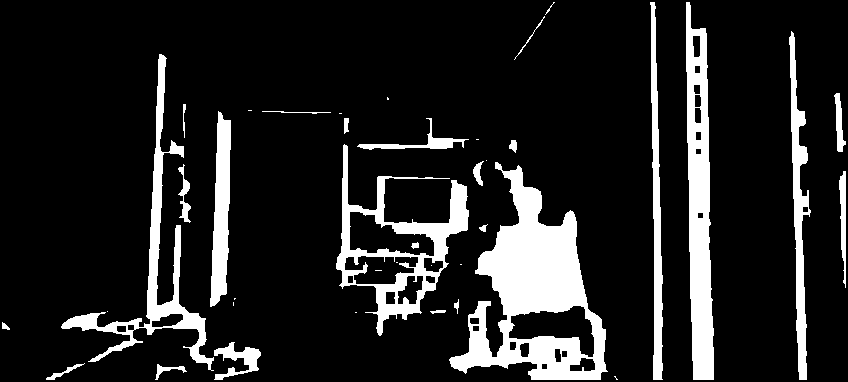

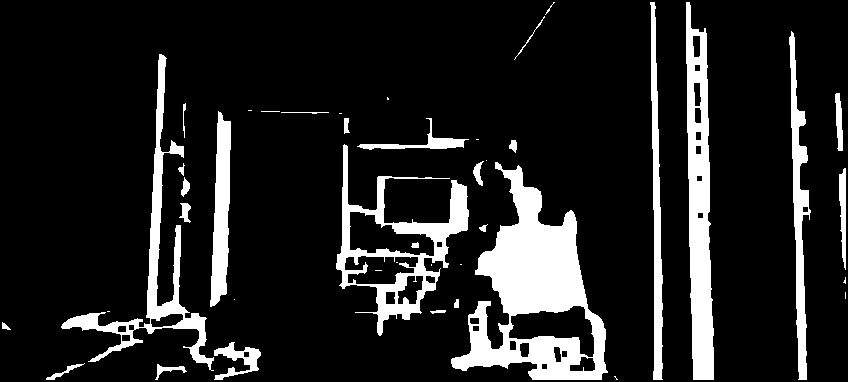

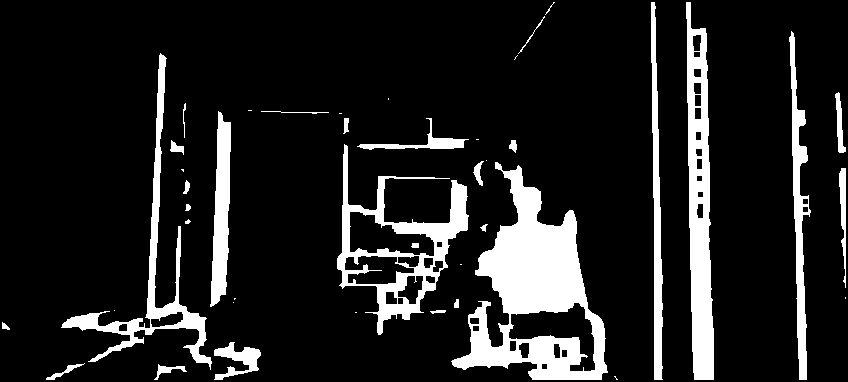

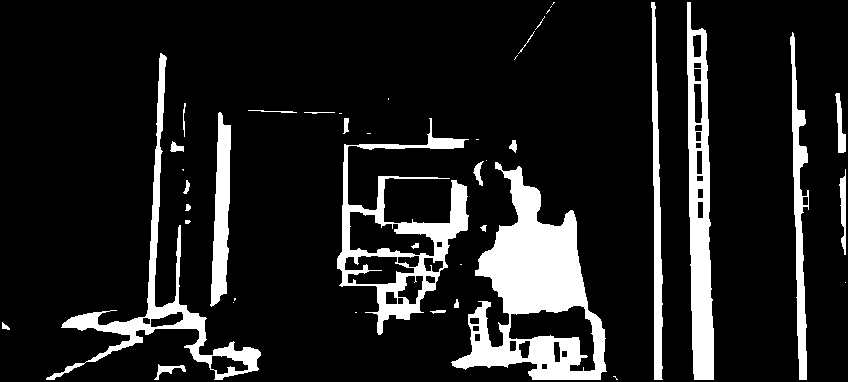

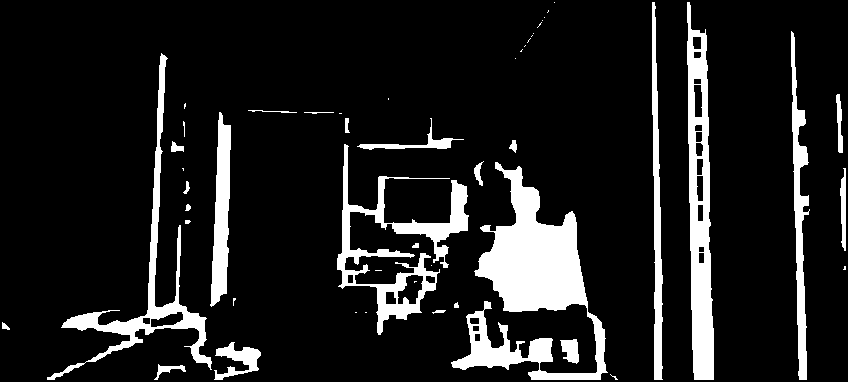

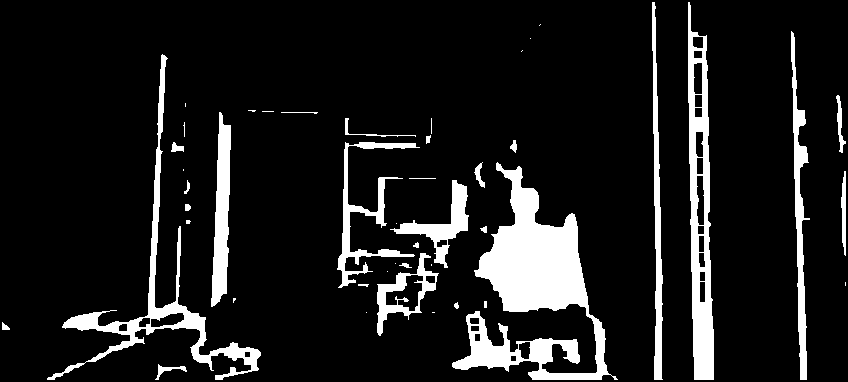

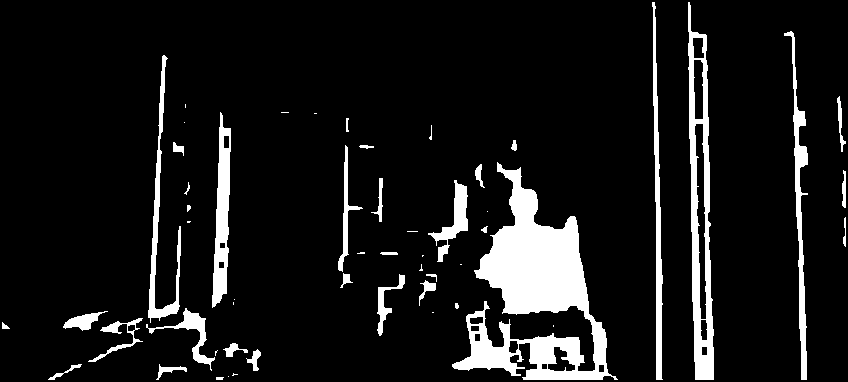

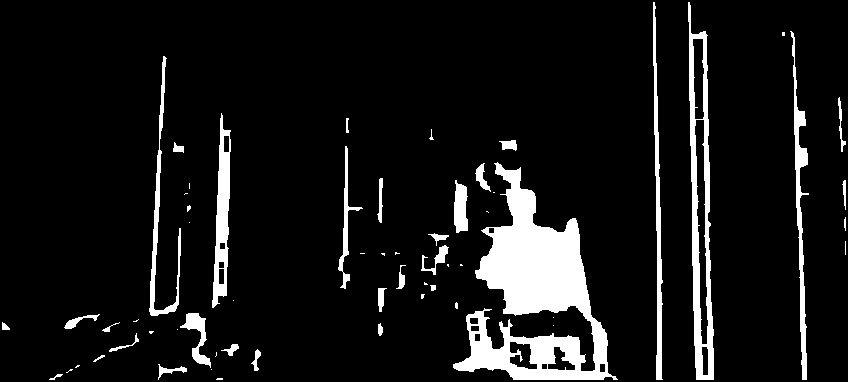

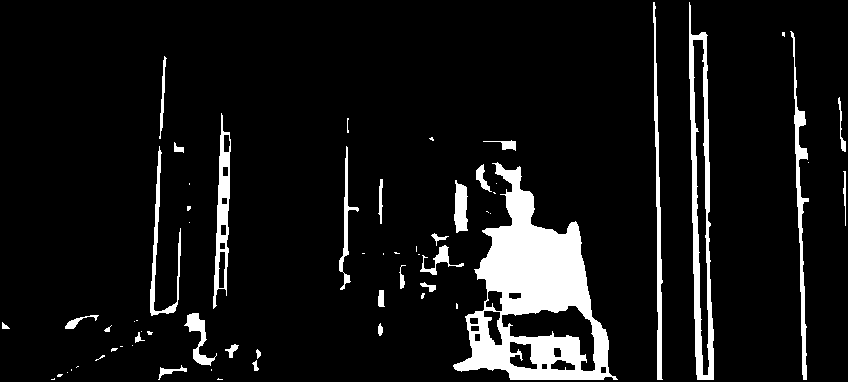

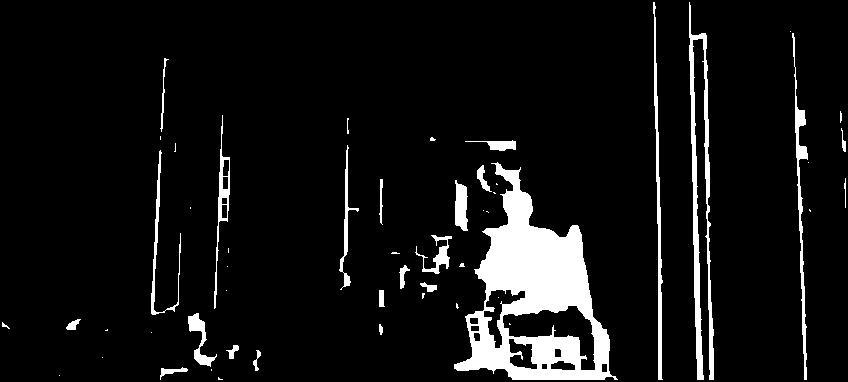

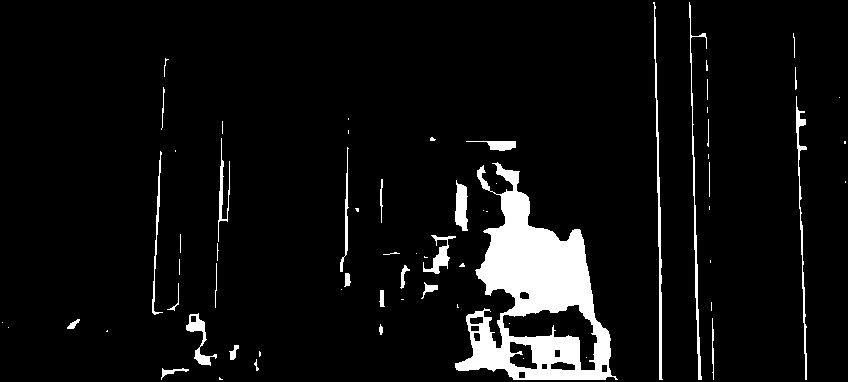

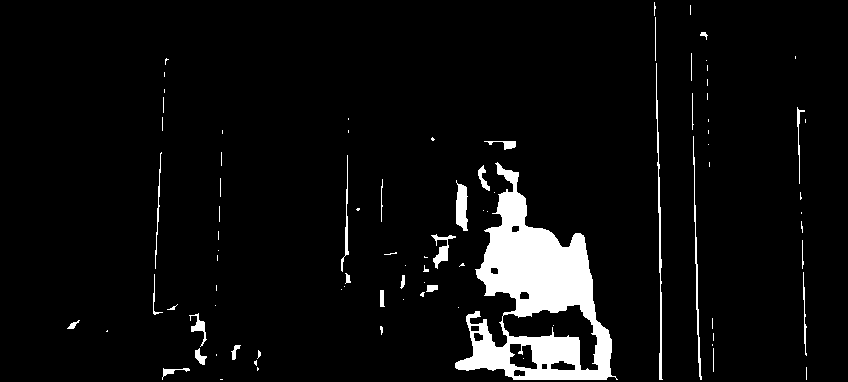

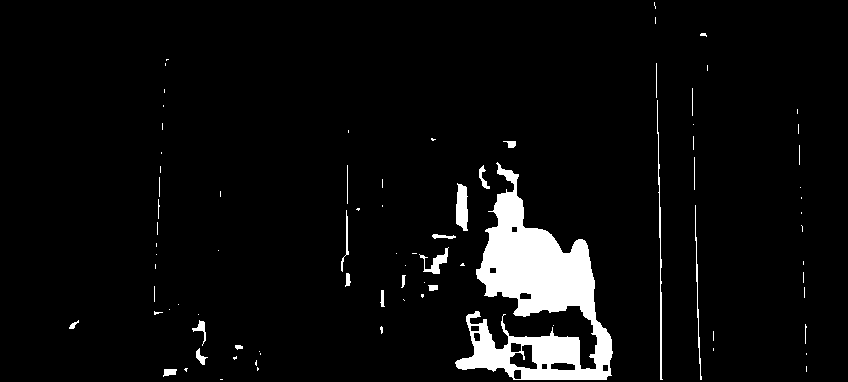

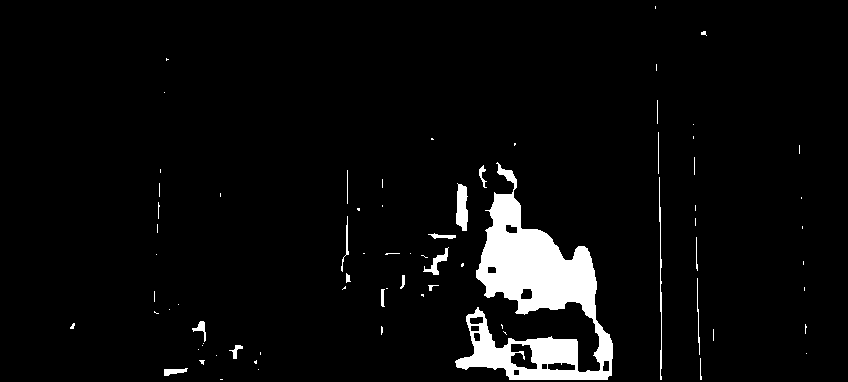

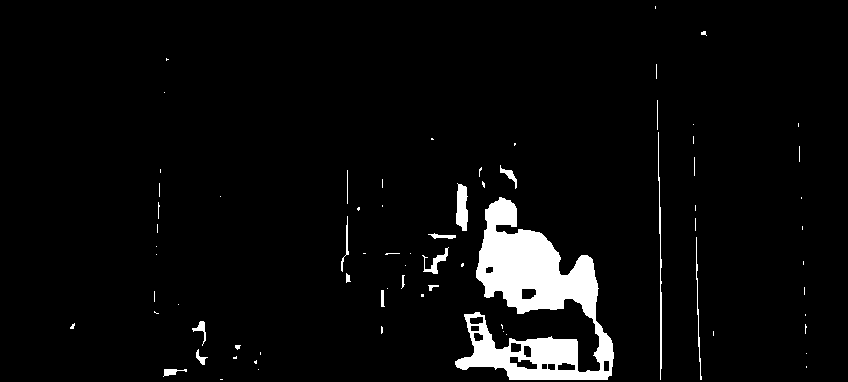

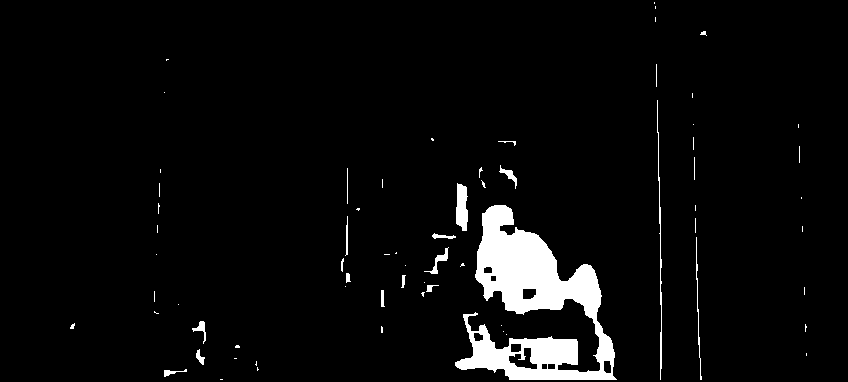

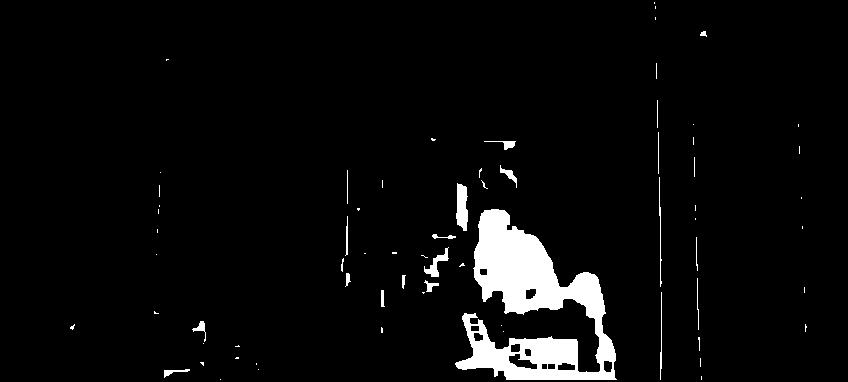

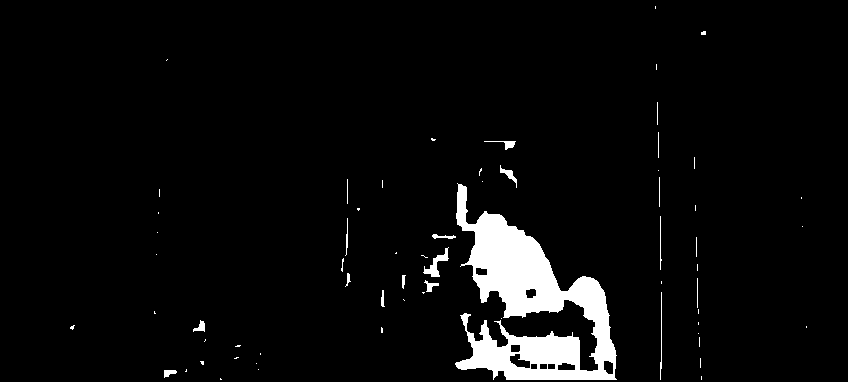

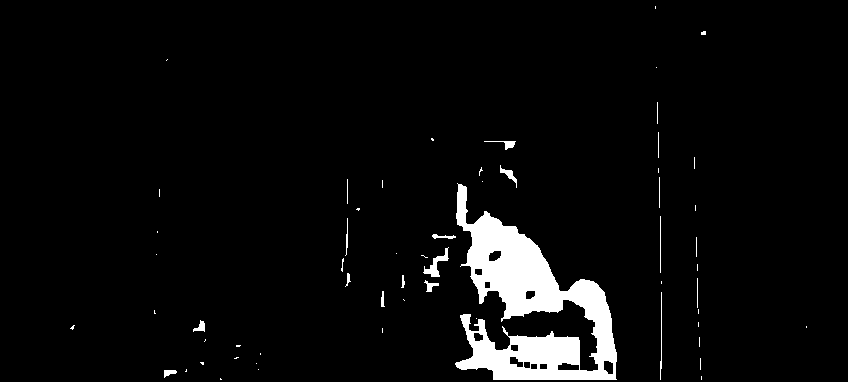

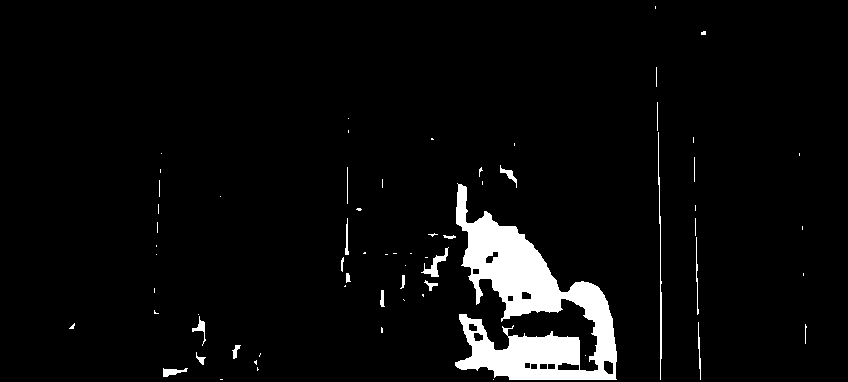

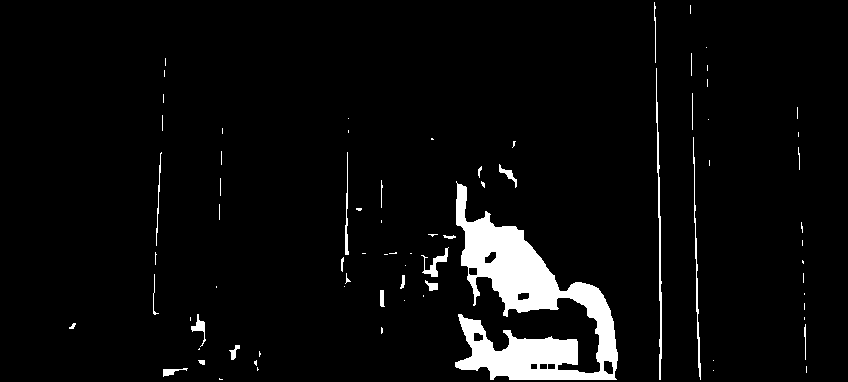

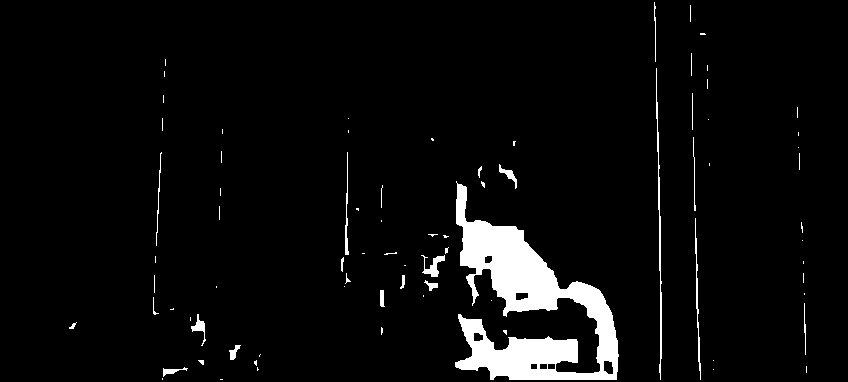

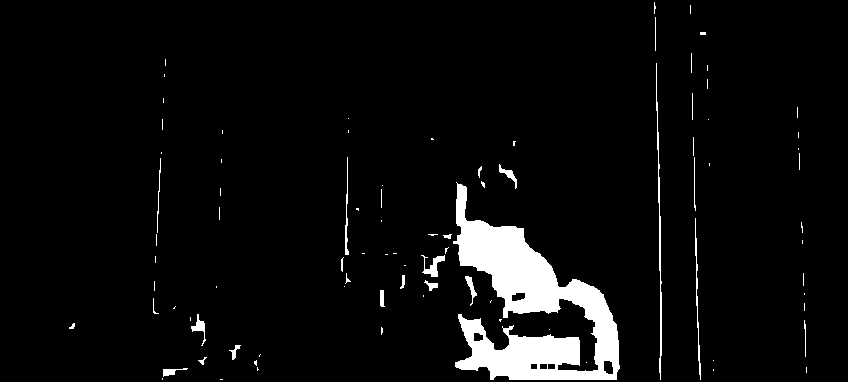

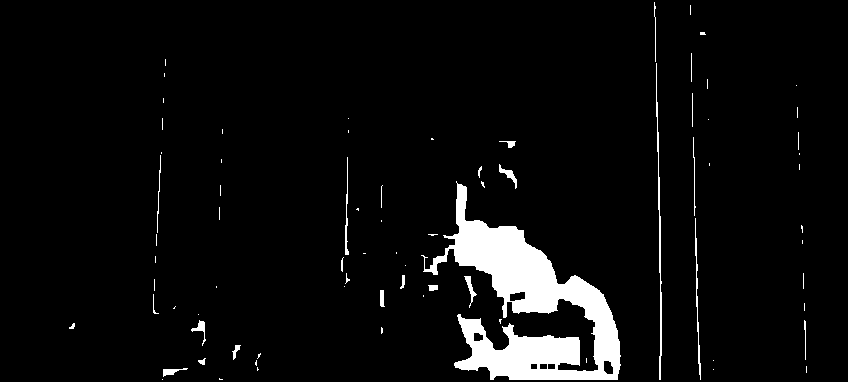

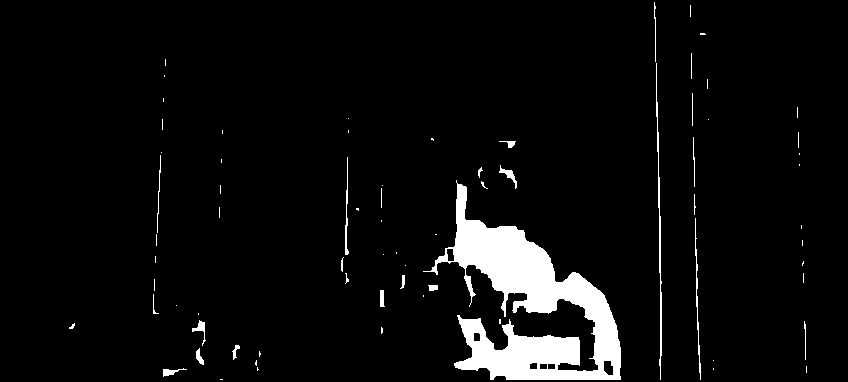

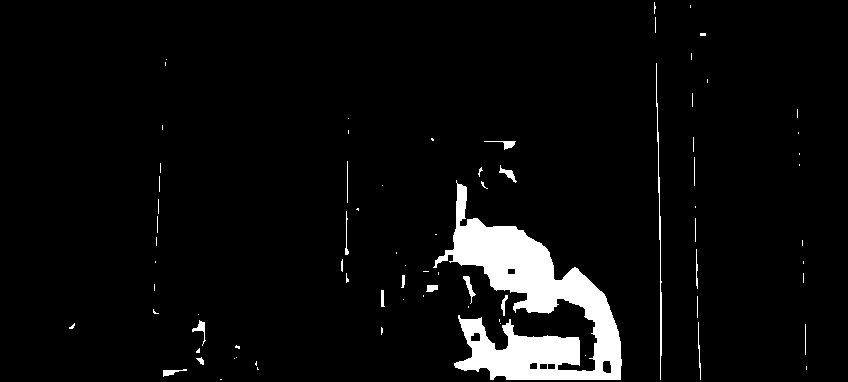

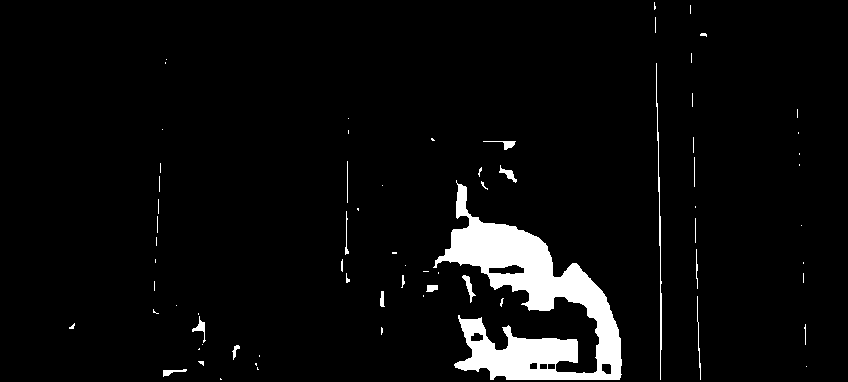

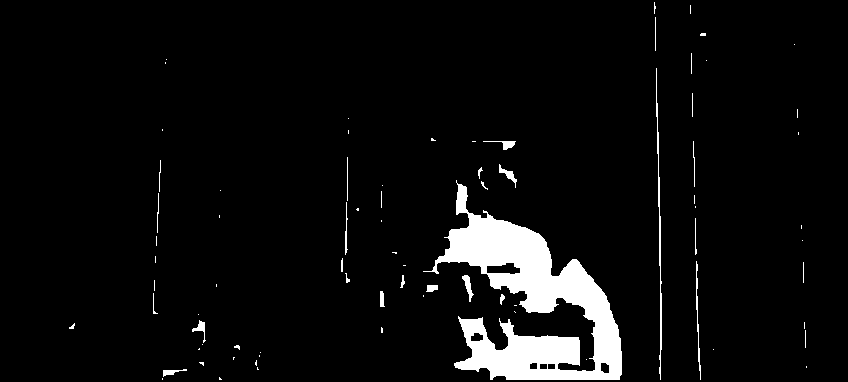

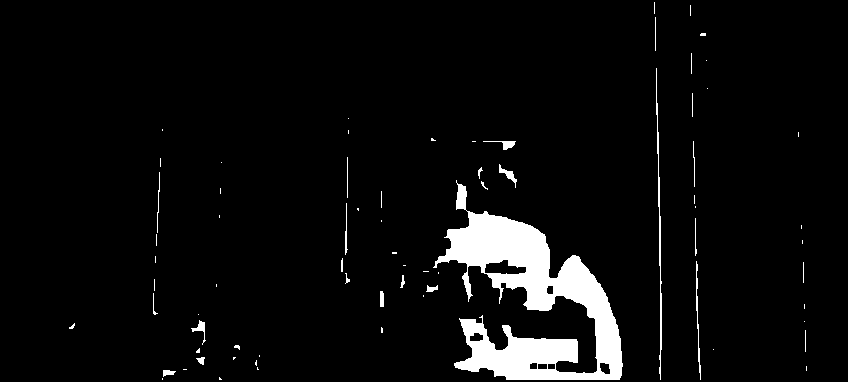

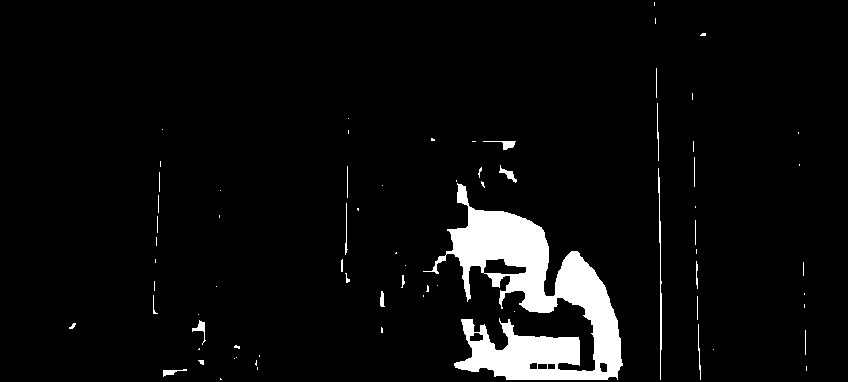

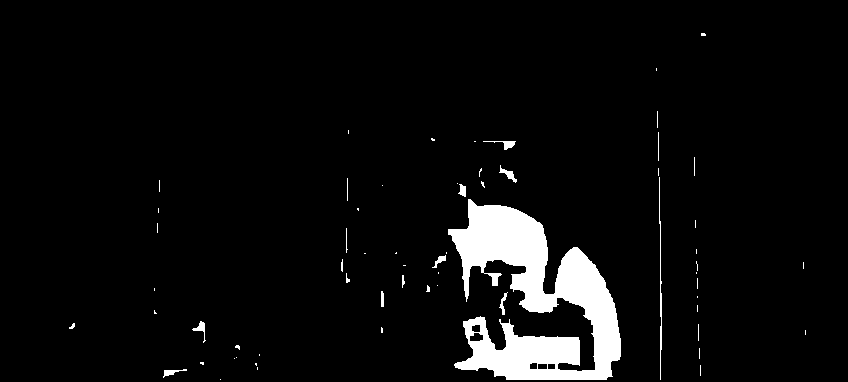

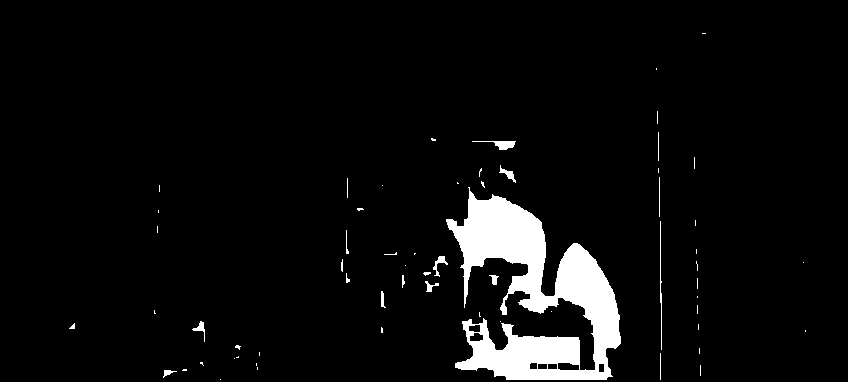

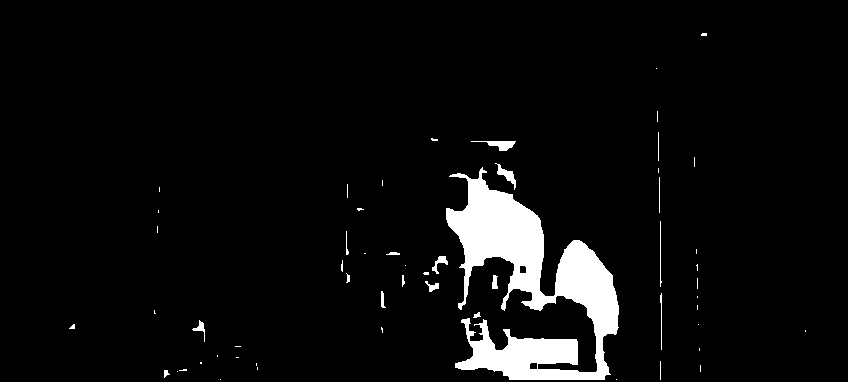

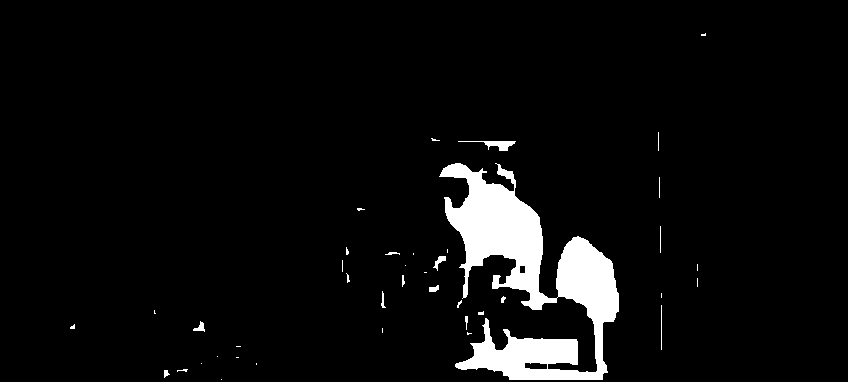

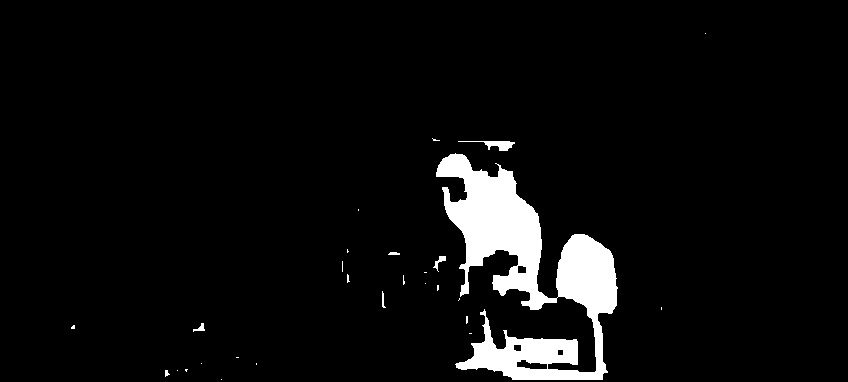

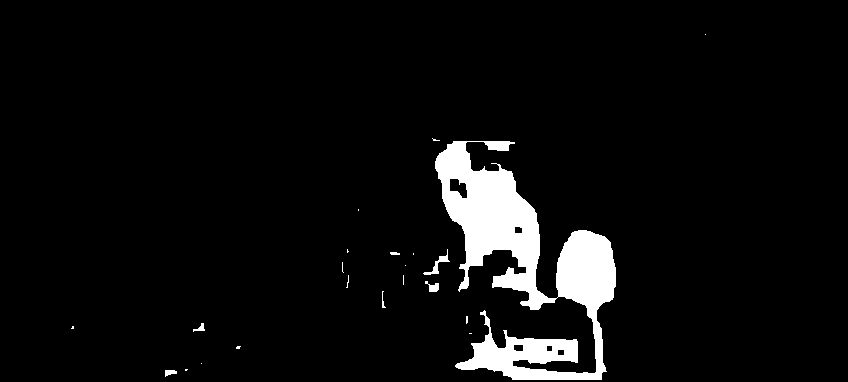

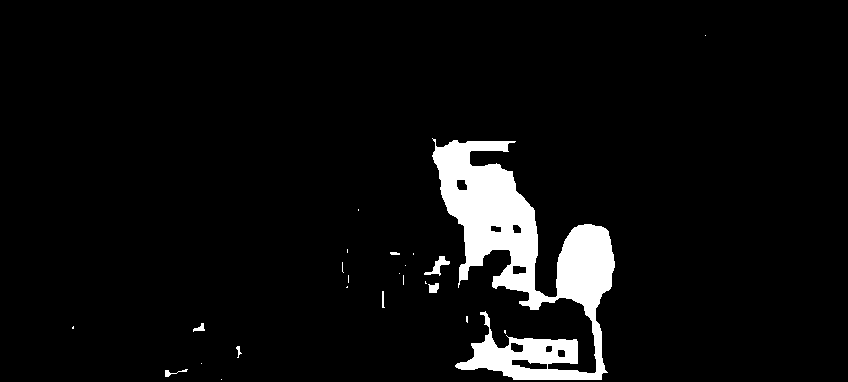

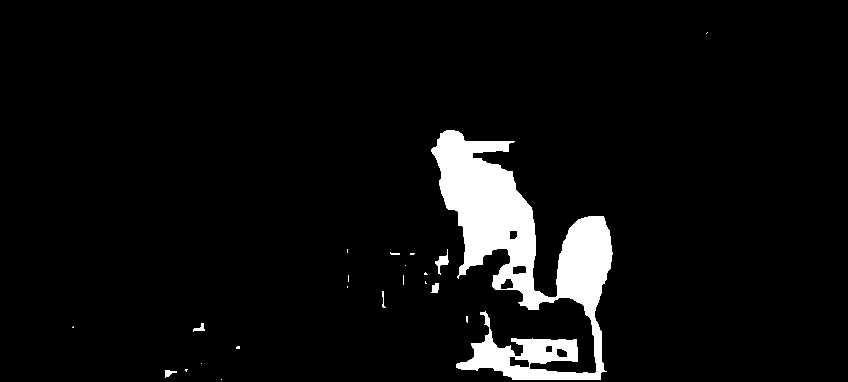

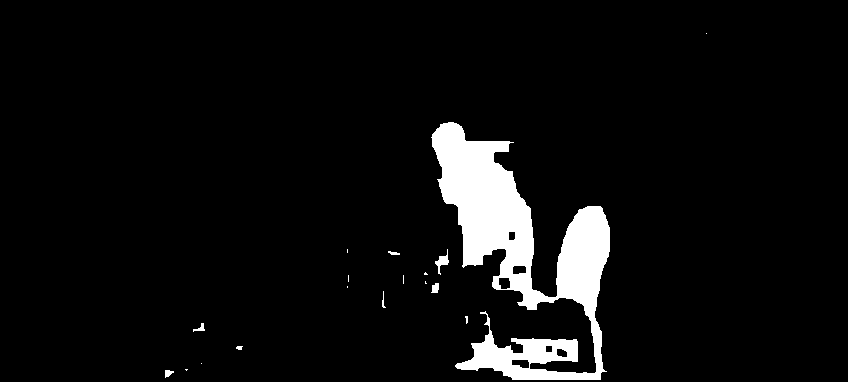

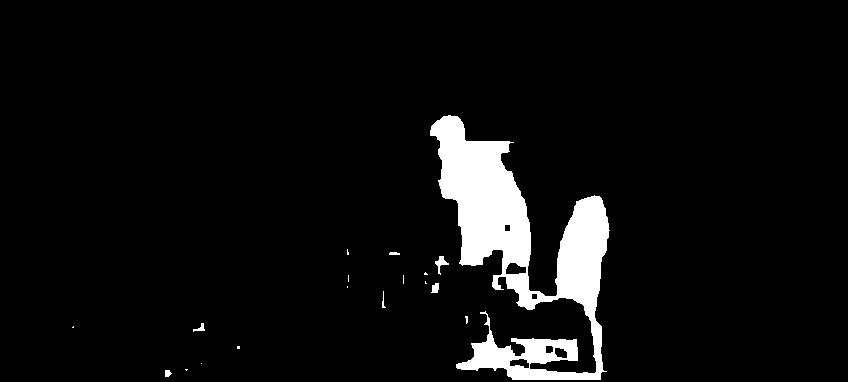

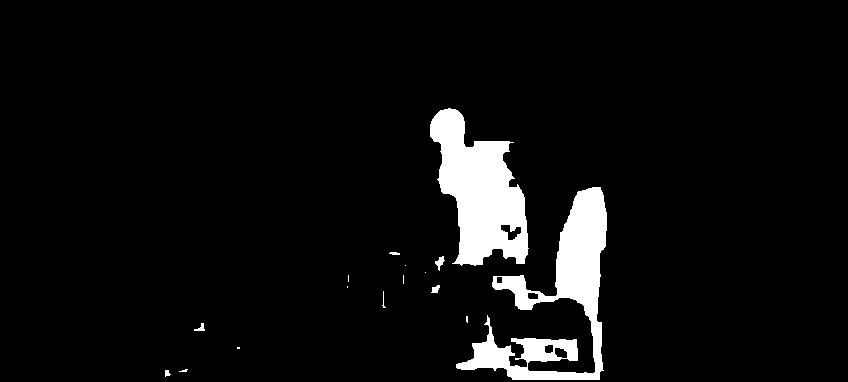

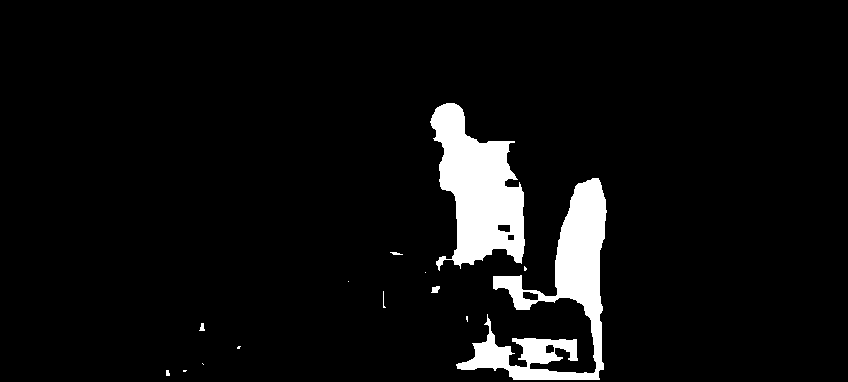

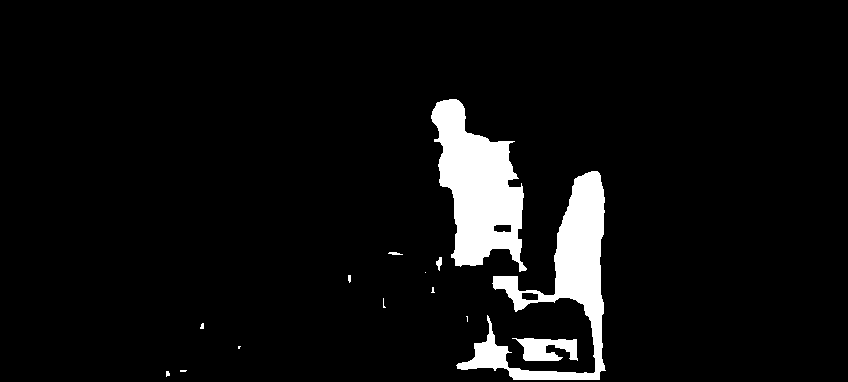

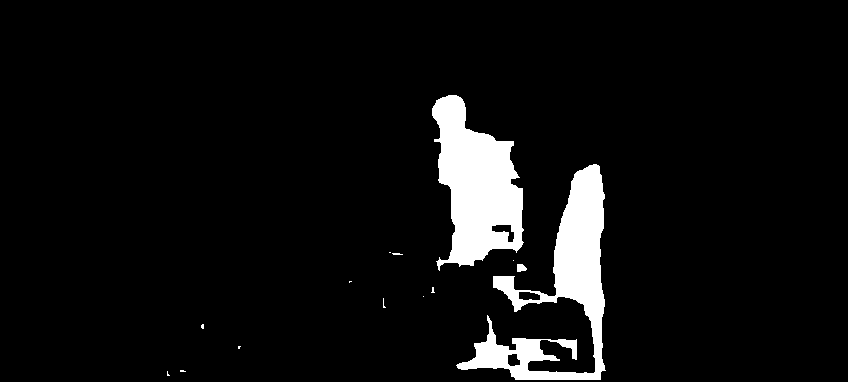

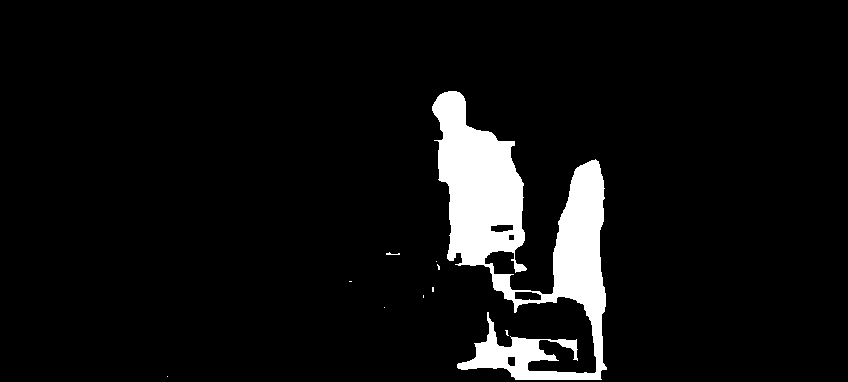

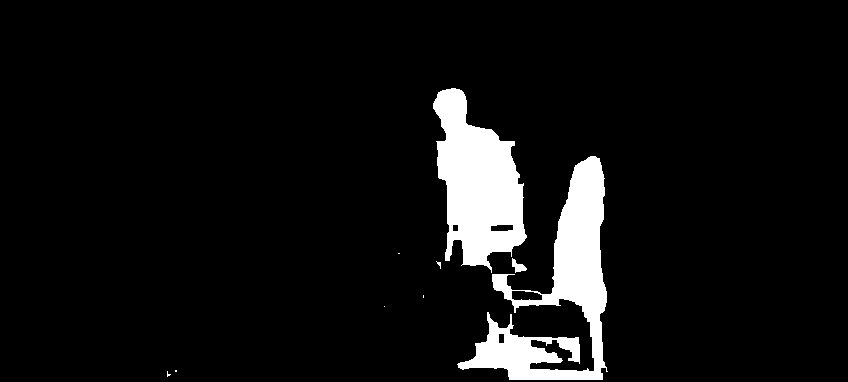

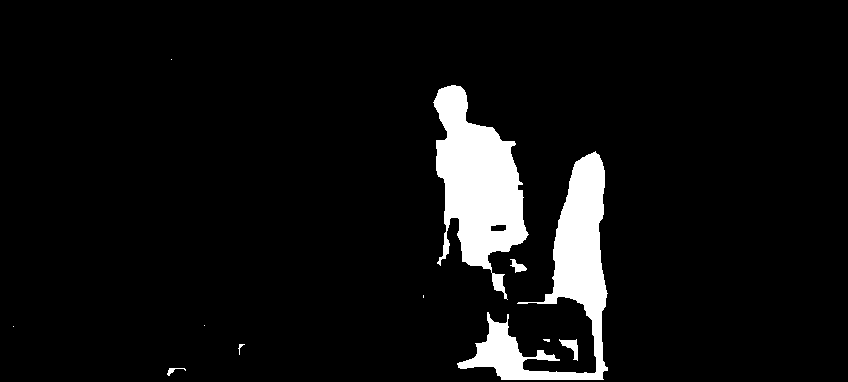

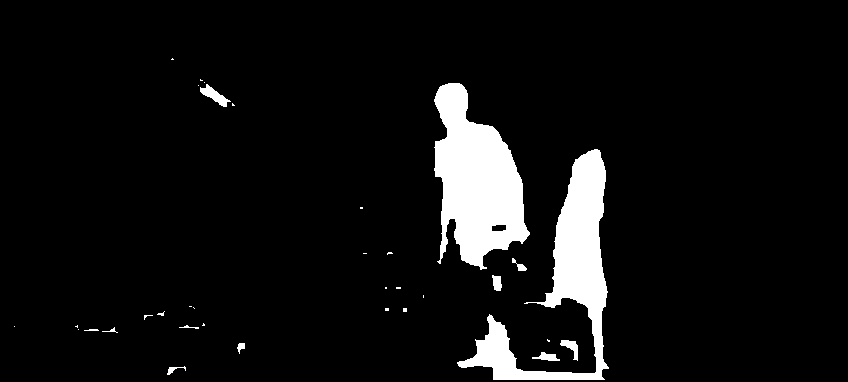

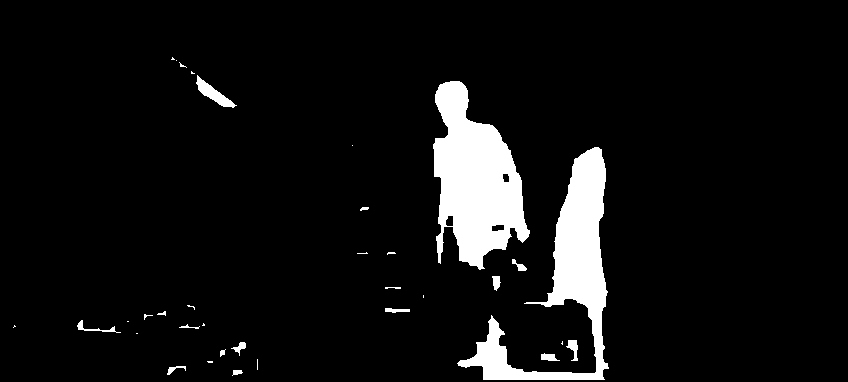

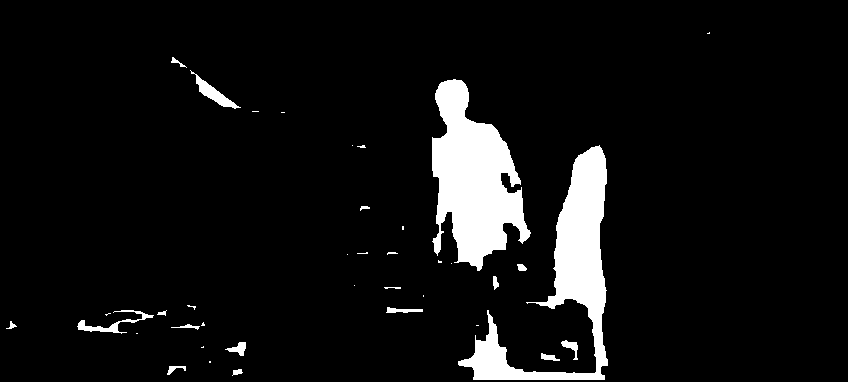

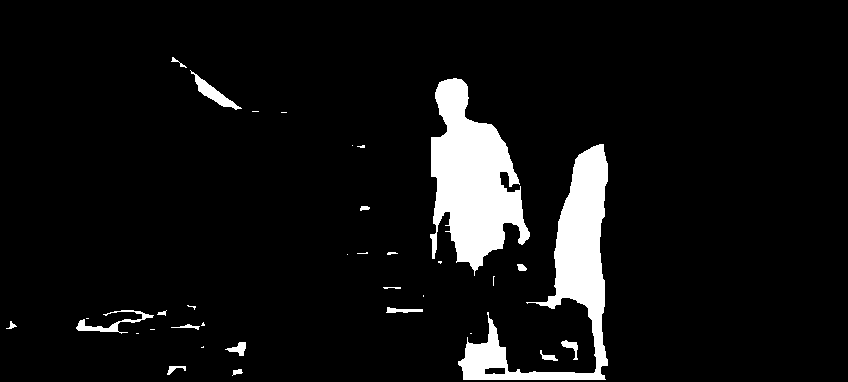

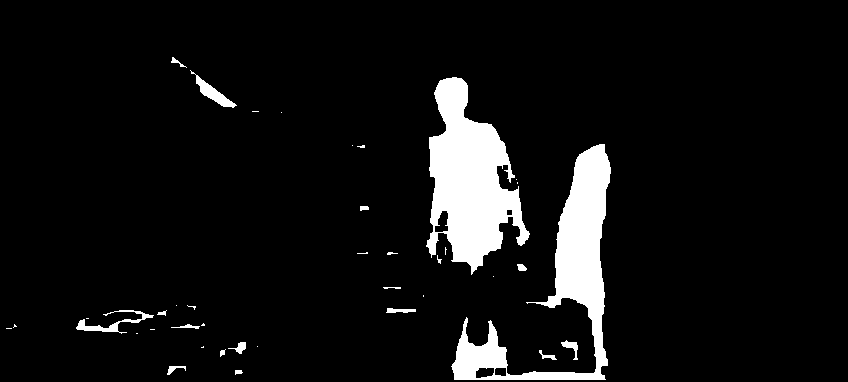

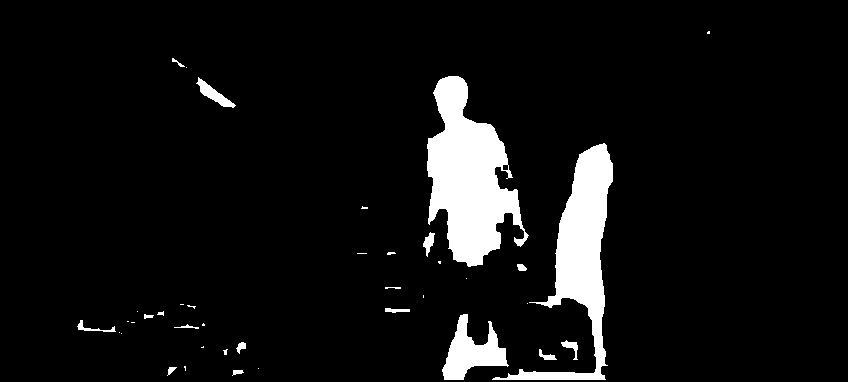

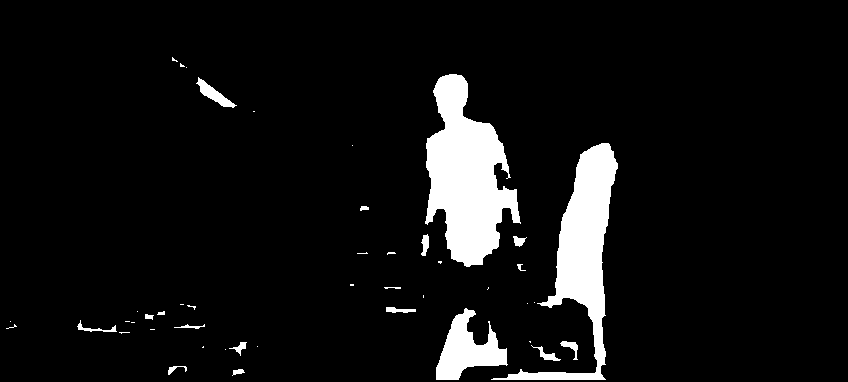

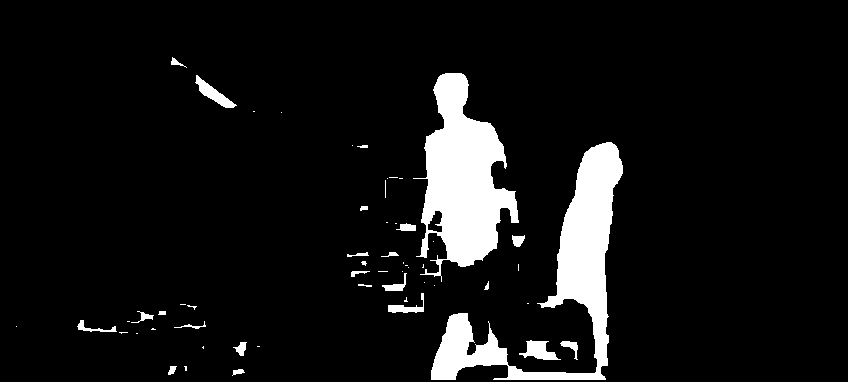

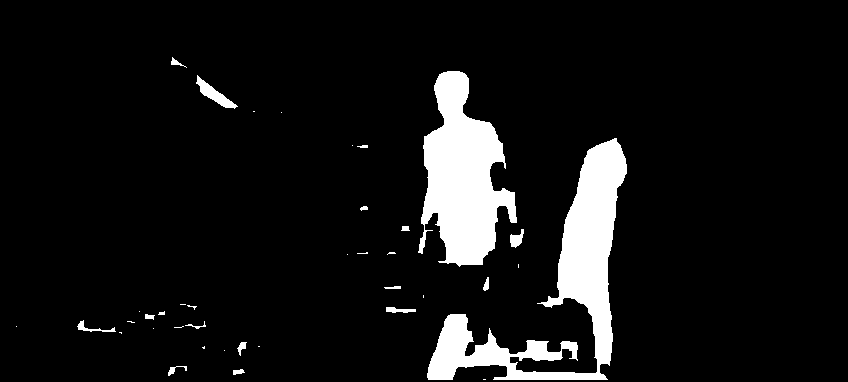

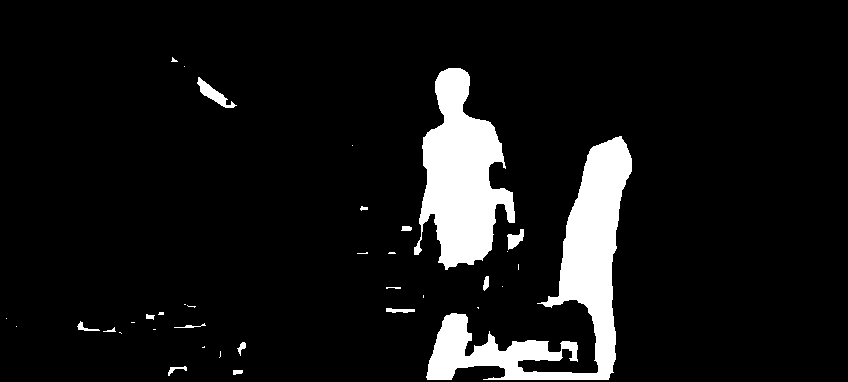

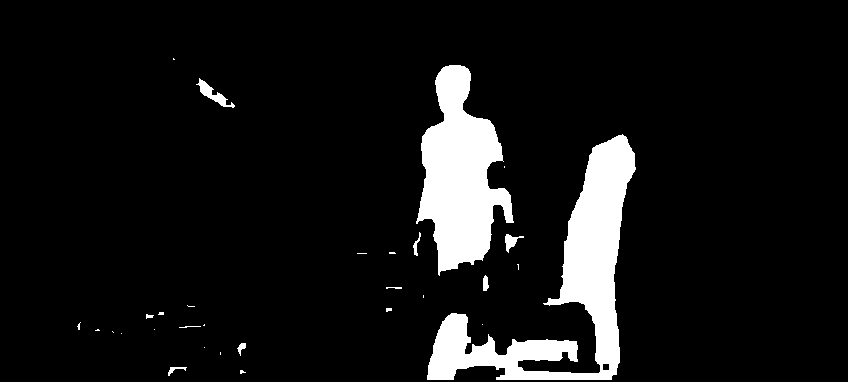

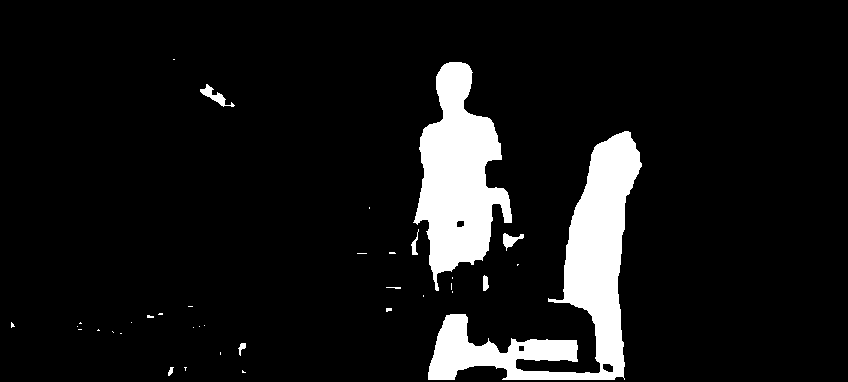

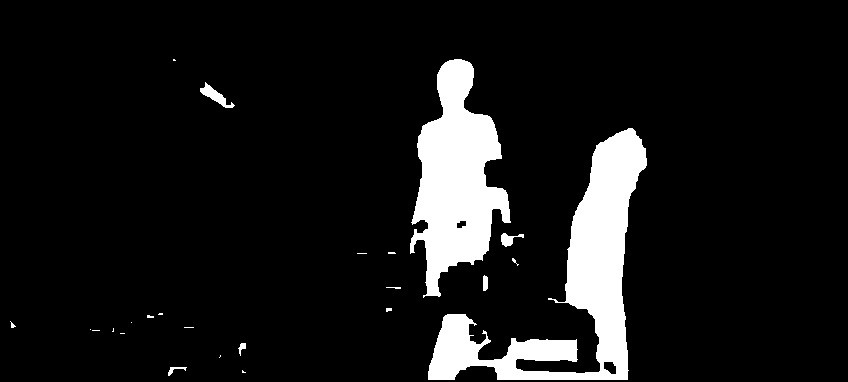

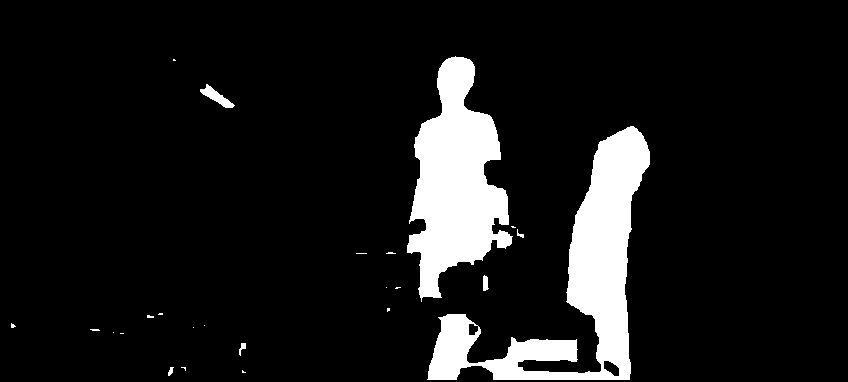

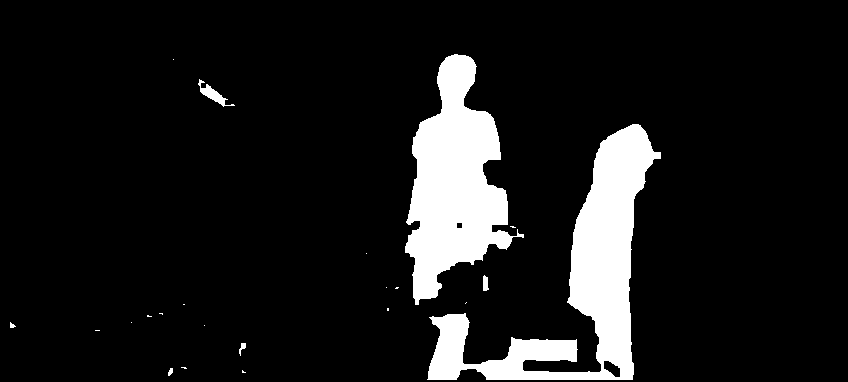

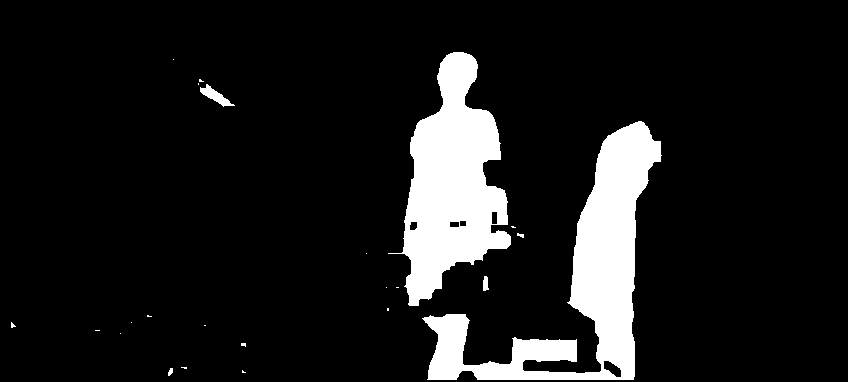

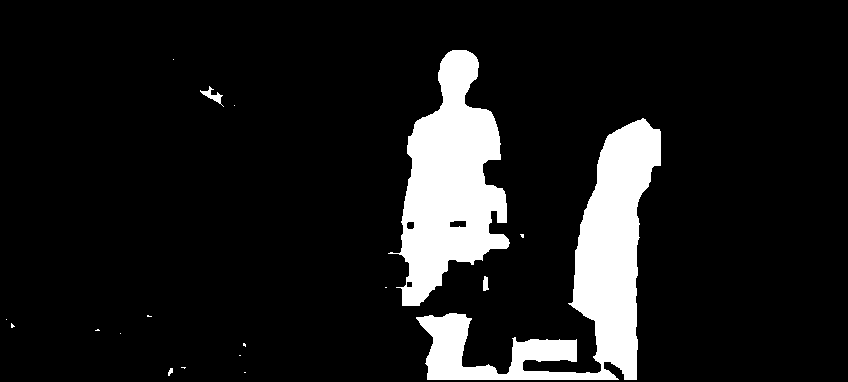

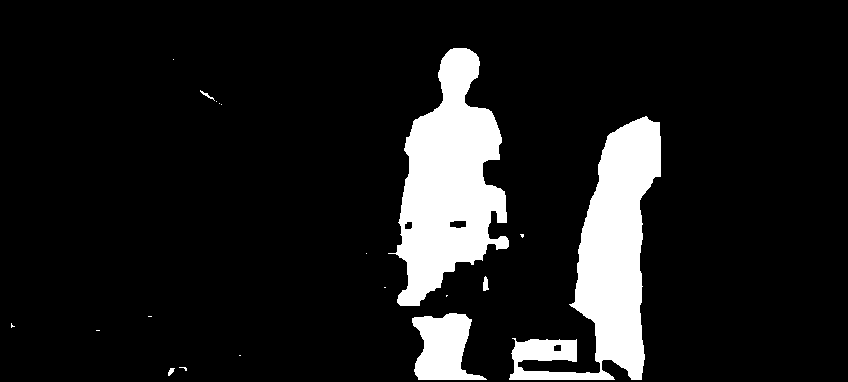

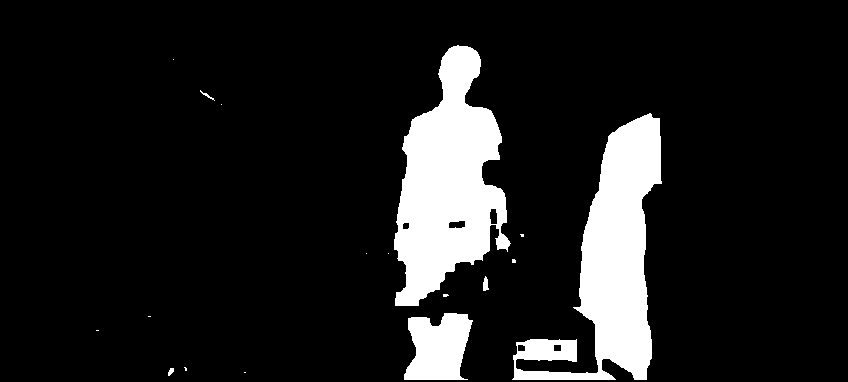

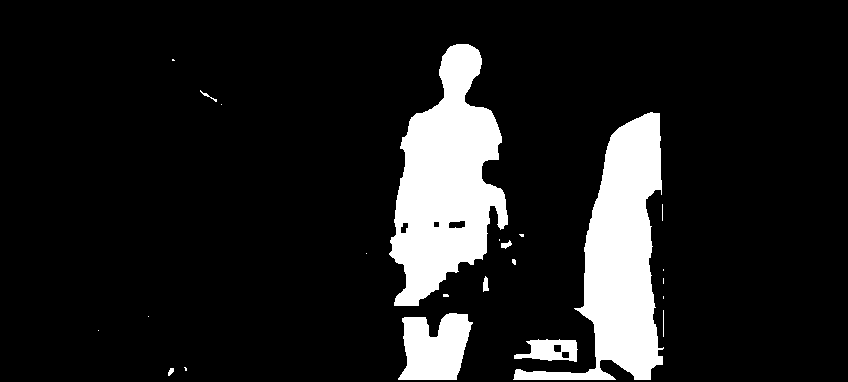

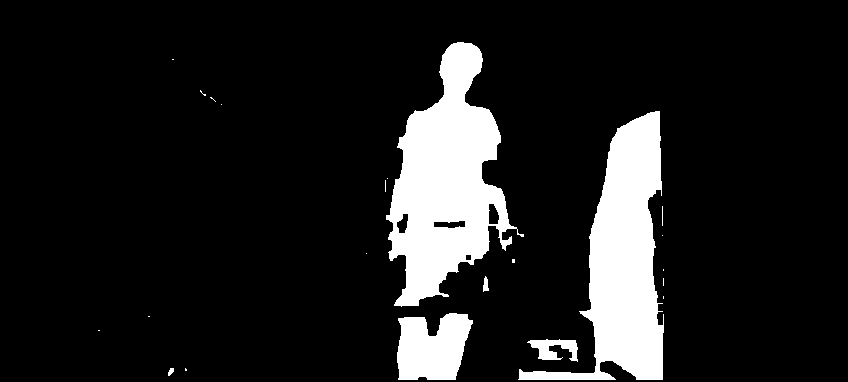

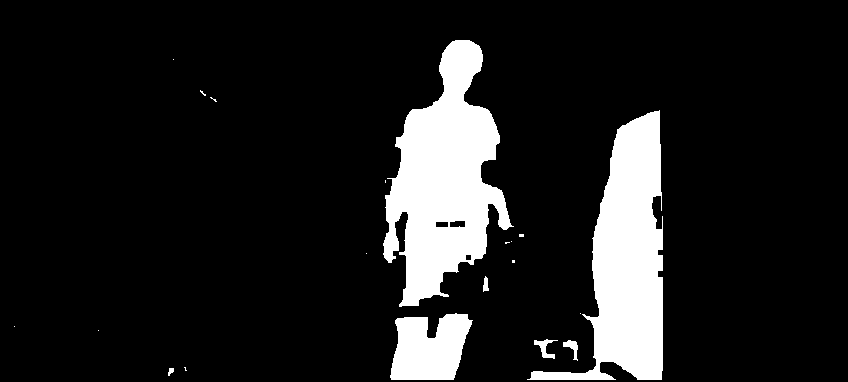

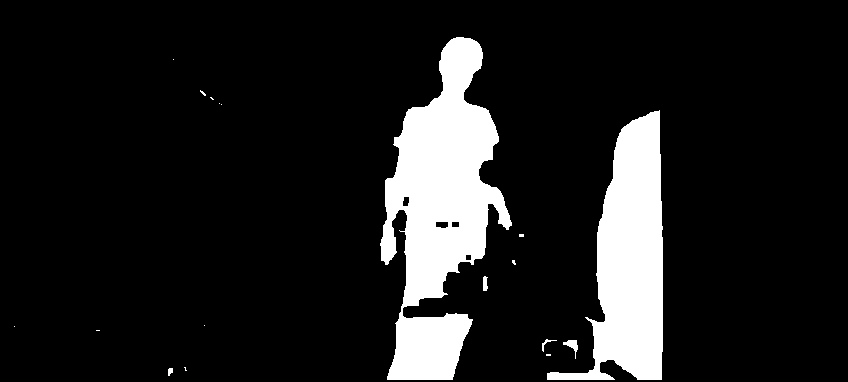

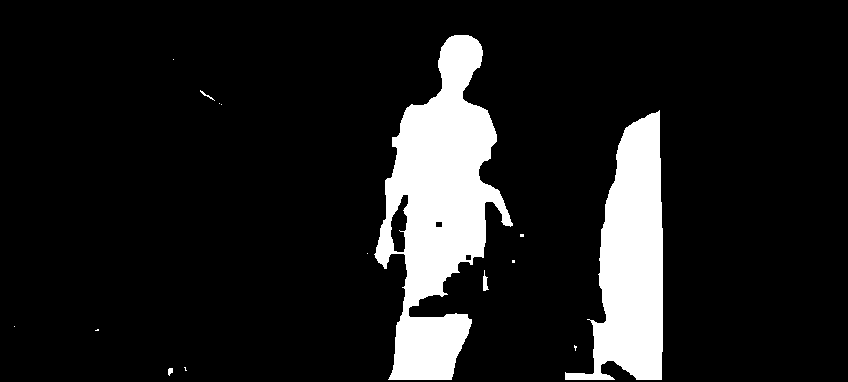

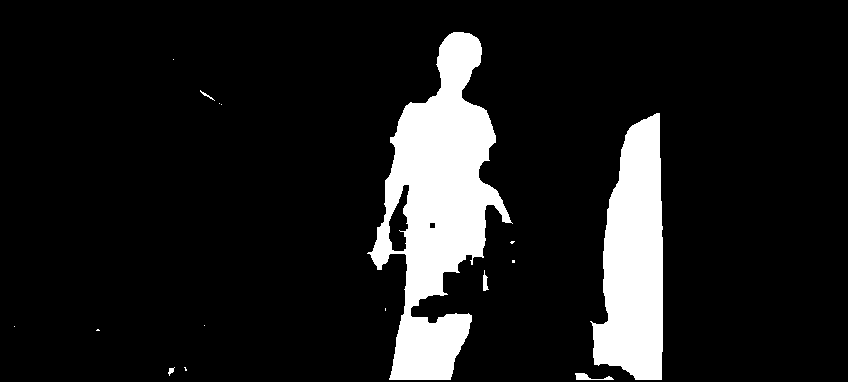

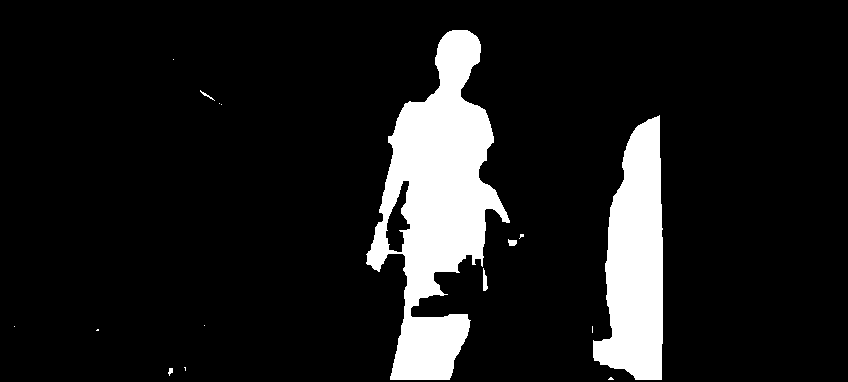

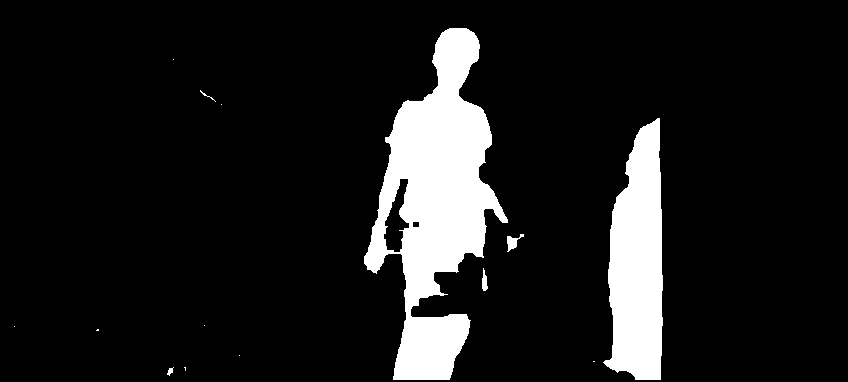

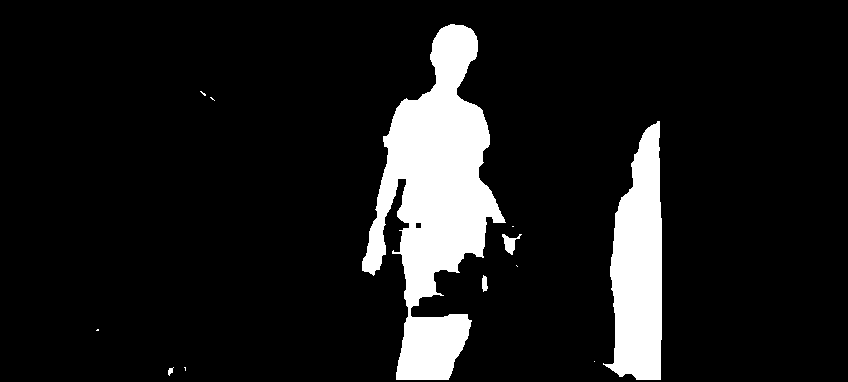

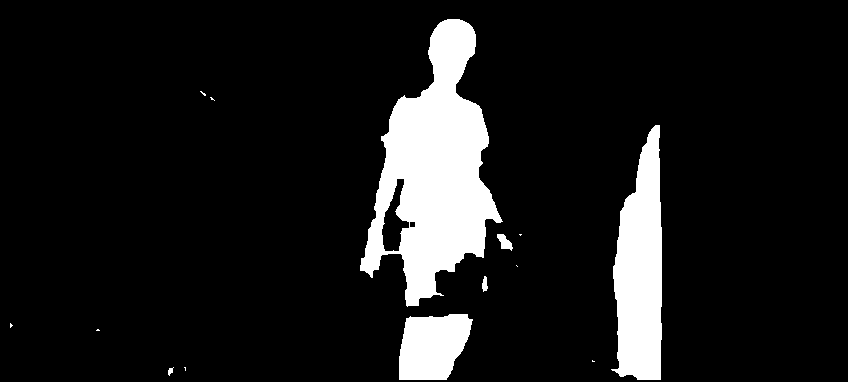

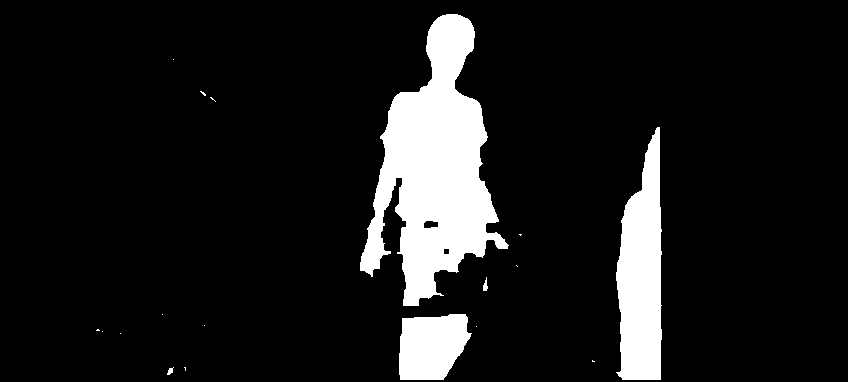

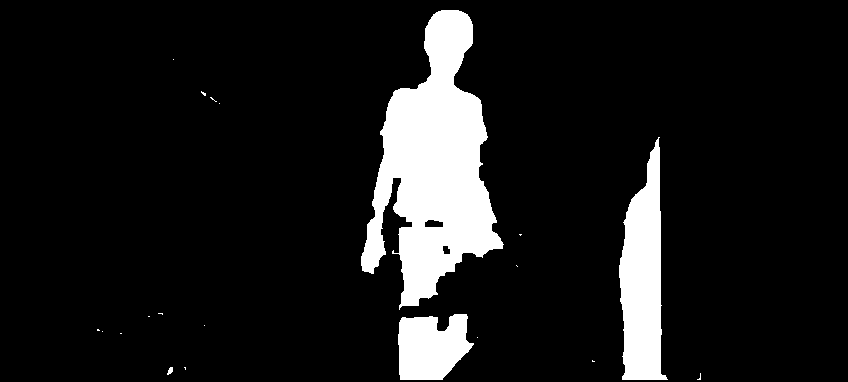

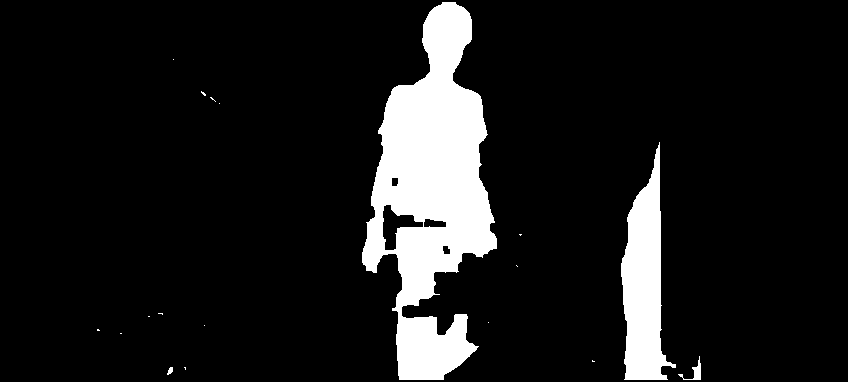

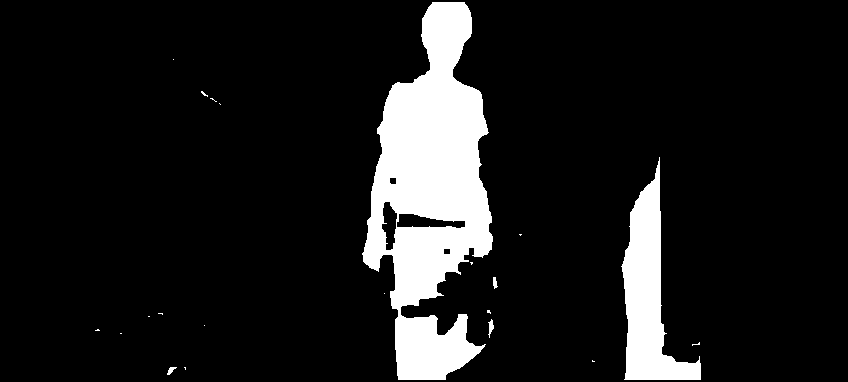

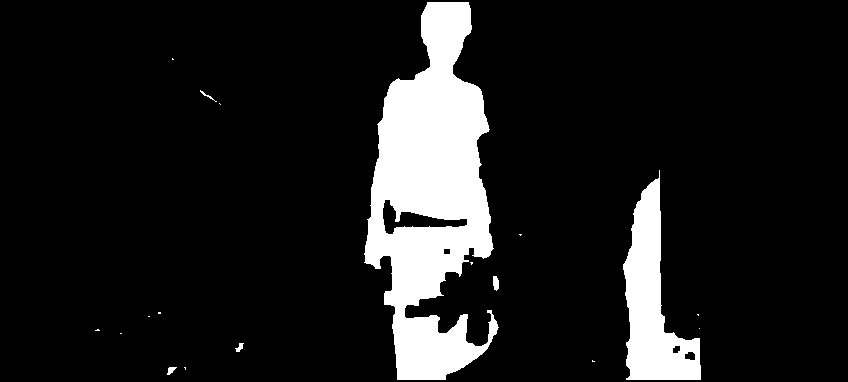

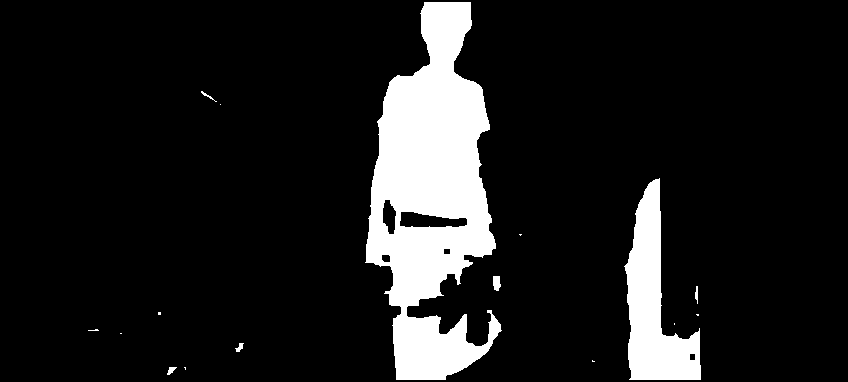

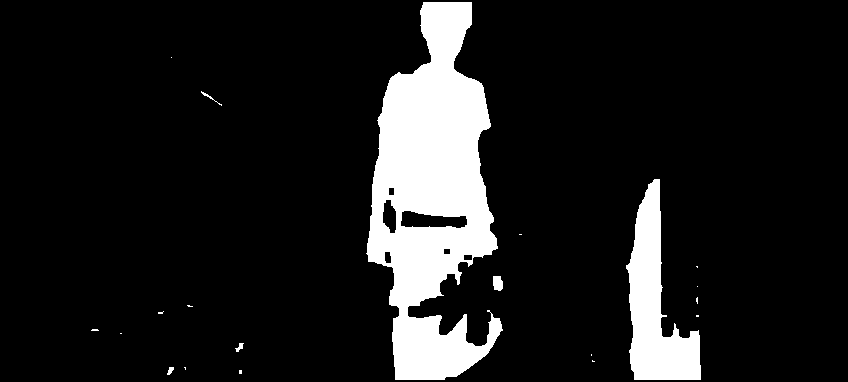

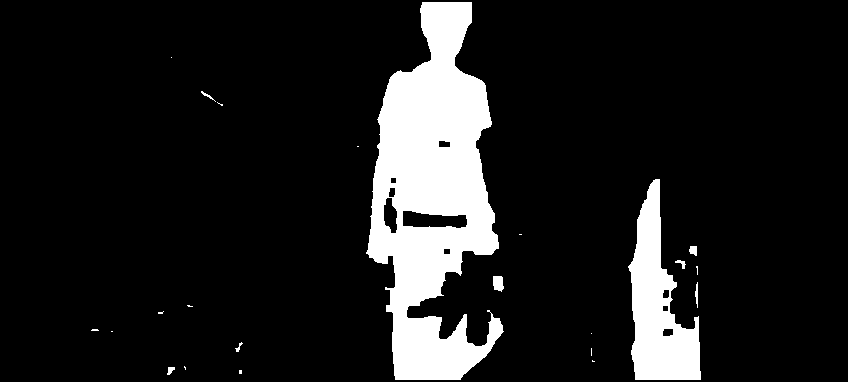

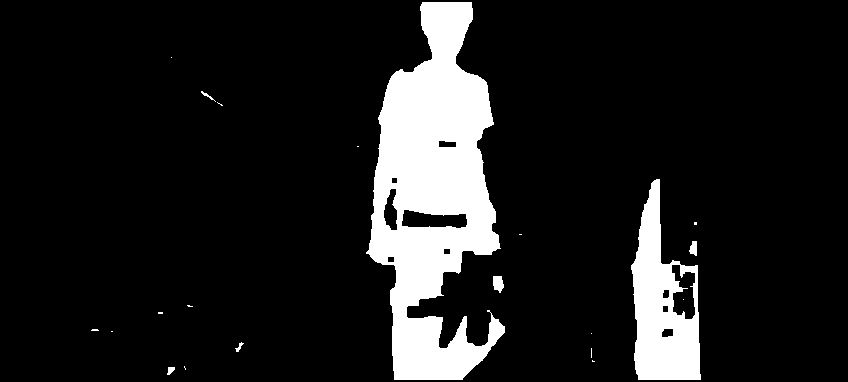

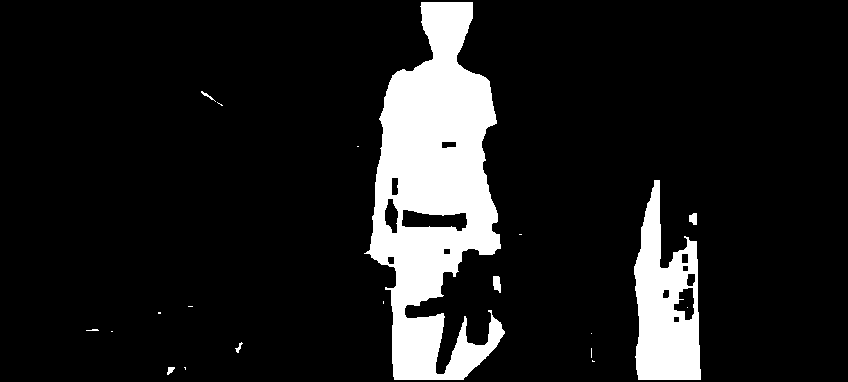

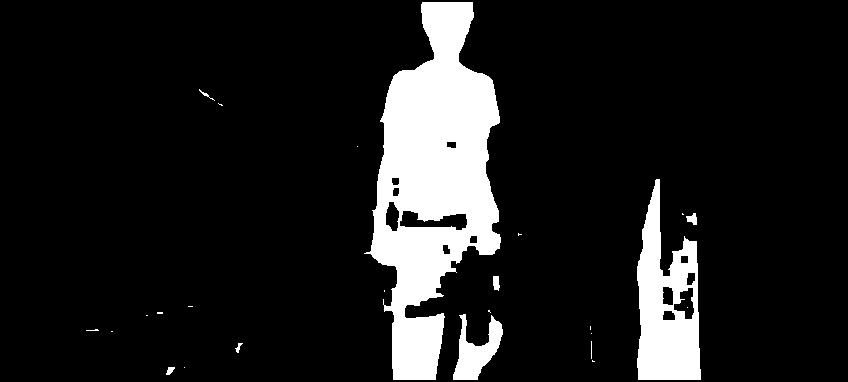

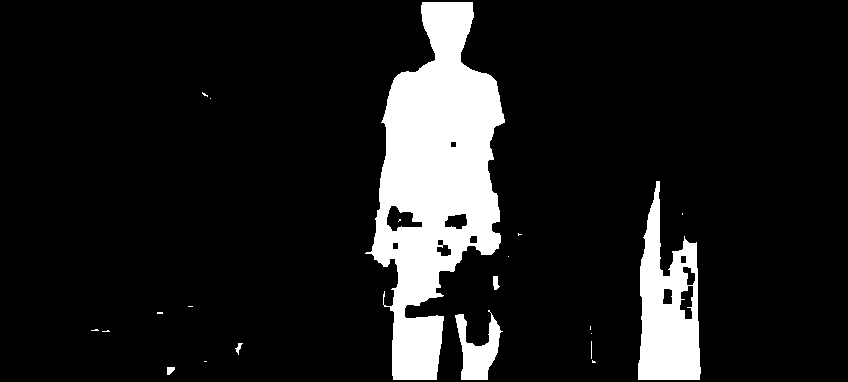

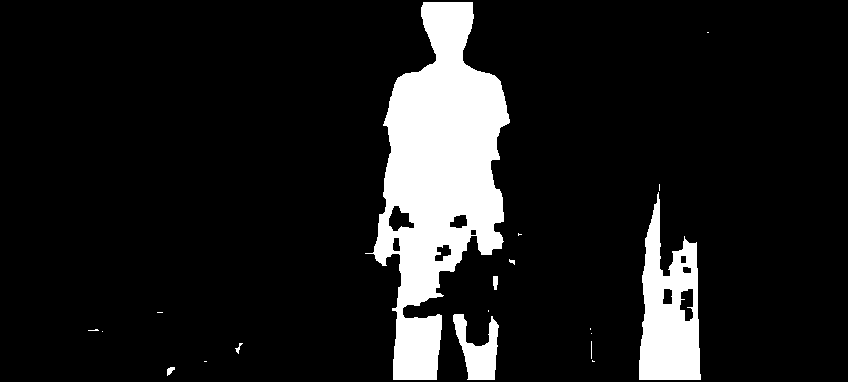

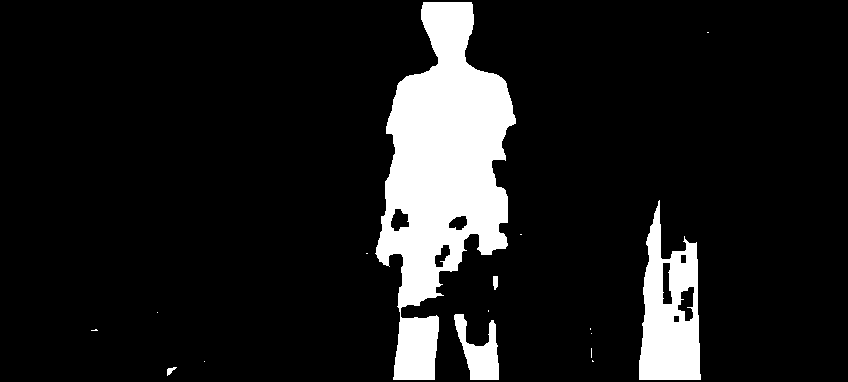

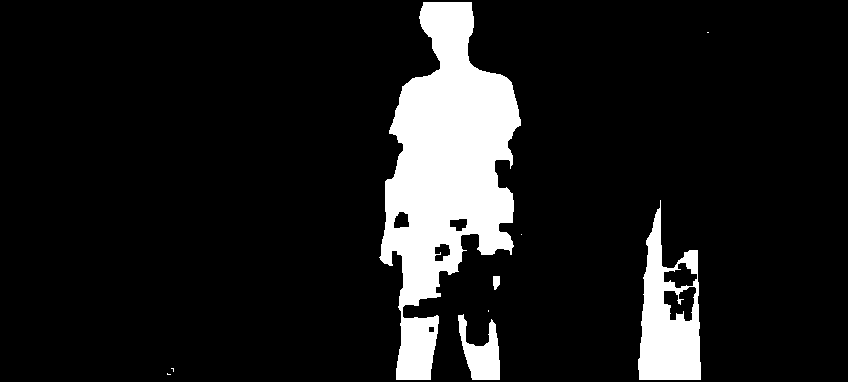

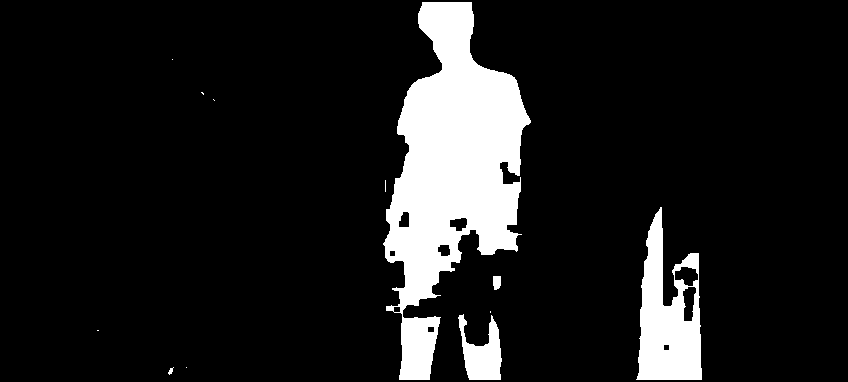

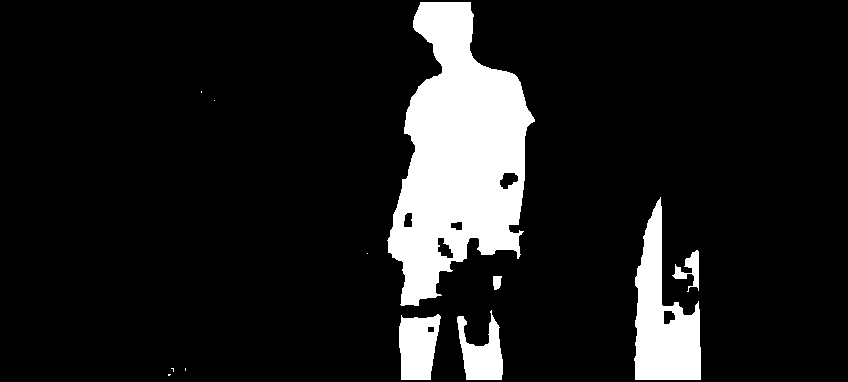

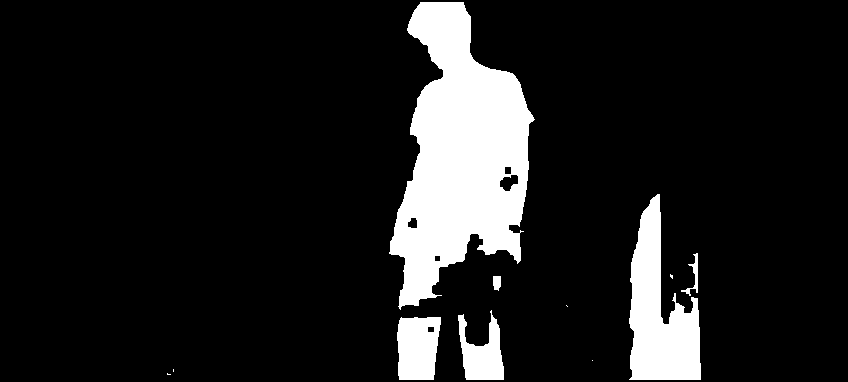

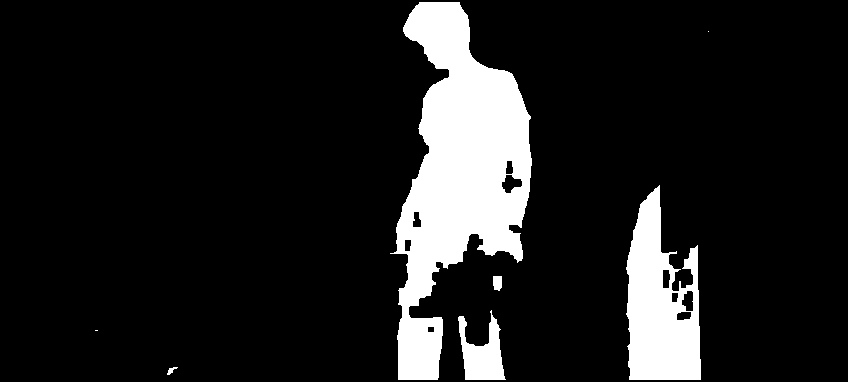

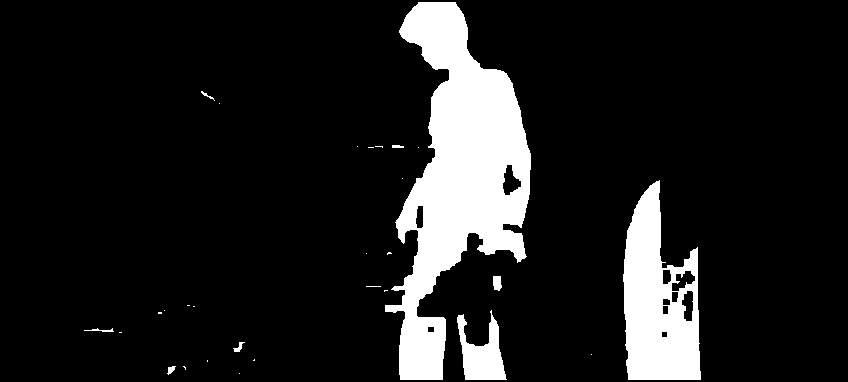

In [2]:
#Drawingcontours

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def preprocess_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video")
        return

    # Create a background subtractor object
    bg_subtractor = cv2.createBackgroundSubtractorKNN()

    # Loop through each frame in the video
    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        # Check if the frame was read successfully
        if not ret:
            break

        # Apply smoothening operations to reduce noise
        frame = cv2.GaussianBlur(frame, (5, 5), 0)

        # Apply background subtraction
        fg_mask = bg_subtractor.apply(frame)

        # Threshold the foreground mask
        _, fg_mask = cv2.threshold(fg_mask, 100, 255, cv2.THRESH_BINARY)

        # Further smoothen the foreground mask with dilation and erosion
        kernel = np.ones((5, 5), np.uint8)
        fg_mask = cv2.dilate(fg_mask, kernel, iterations=1)
        fg_mask = cv2.erode(fg_mask, kernel, iterations=1)

        # Further remove salt noise using closing operation
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, np.ones((5,5),np.uint8))

        # Apply bitwise AND operation to the original frame to remove background
        fg_frame = cv2.bitwise_and(frame, frame, mask=fg_mask)

        # Find contours in the foreground mask
        contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        # Draw contours on the original framea
        cv2.drawContours(fg_mask, contours, -1, (0, 255, 0), 2)

        # Display the processed frame
        cv2_imshow(fg_mask)

        # Check for key press to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Release the video capture object and close all windows
    cap.release()
    cv2.destroyAllWindows()

# Example usage
if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/CV Project/input_vid2.mp4"  # Replace with the path to your video file
    preprocess_video(video_path)
